In [1]:
!pip install scikit-optimize

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Functions

In [4]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [5]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    sns.scatterplot(test_label, predicted_dv, color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [6]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [7]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [8]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

# Unhashing

In [9]:
genre_mapping = {'0ef0aa70-f86c-4141-8054-8b39af97867d': 'Biography',
                '287a1485-7a88-4c2f-bc94-ca418b6c47a1': 'Cartoons',
                '66fad8c3-d84f-458d-a8bf-5b4f154969e0': 'Show',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Theater',
                '9fa28b61-a257-4a3e-945b-a9ef76a146d6': 'Fantasy',
                'b0836a1d-635f-4d89-bcc5-25d10ba56642': 'Anime',
                'd7214feb-8c11-4aea-aabb-ac98a8d56fd5': 'History',
                'dc65dbc8-34ba-4df1-b32c-4f895e10bff8': 'Shorts',
                'eb001d27-5be3-4d42-9d88-90d593f2627d': 'War_movies',
                '364fdc2e-bdfe-40be-b2c5-d30f43ec432e': 'Crime'}

In [10]:
types_mapping = {'1f22ccf1-288a-4e6e-b39a-7502799e7125': 'Лекции',
    '6d640e04-be3a-4c8c-852e-4e9b12449d5d': 'Концерты',
    '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Театр',
    '2f7908cc-e2fd-43cf-b626-ec1aef436160': 'Курсы' }

In [11]:
import pickle

with open('./RATINGS_OKKO_item_coldstart_dataset.pkl', 'rb') as f:
    df = pickle.load(f, encoding='utf-8')

In [12]:
df.shape

(9323, 20)

In [13]:
all_genres = []

for item_genres in df['genre']:
    all_genres.extend(item_genres)

In [14]:
all_unique_genres = set(all_genres)

In [15]:
len(all_unique_genres)

32

In [16]:
all_unique_genres

{'0ef0aa70-f86c-4141-8054-8b39af97867d',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 '287a1485-7a88-4c2f-bc94-ca418b6c47a1',
 '364fdc2e-bdfe-40be-b2c5-d30f43ec432e',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 '66fad8c3-d84f-458d-a8bf-5b4f154969e0',
 '6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 '7b7c97f6-1adb-4b43-bfe8-9455812fac0b',
 '9fa28b61-a257-4a3e-945b-a9ef76a146d6',
 'Action',
 'Adventure',
 'ArtHouse',
 'Comedy',
 'Detective',
 'Documentary',
 'Drama',
 'Family',
 'ForKids',
 'Horror',
 'Humor',
 'Melodrama',
 'Music',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Travel',
 'b0836a1d-635f-4d89-bcc5-25d10ba56642',
 'd7214feb-8c11-4aea-aabb-ac98a8d56fd5',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'dc65dbc8-34ba-4df1-b32c-4f895e10bff8',
 'eb001d27-5be3-4d42-9d88-90d593f2627d'}

In [17]:
decoded_genres = [genre_mapping.get(genre, genre) for genre in all_unique_genres]

In [18]:
decoded_genres

['ForKids',
 'Cartoons',
 'Theater',
 'Travel',
 'Music',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 'Thriller',
 'ArtHouse',
 'Action',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'Sci-Fi',
 '6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 'Comedy',
 'Detective',
 'Horror',
 'Melodrama',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 'Biography',
 'Shorts',
 'Fantasy',
 'Adventure',
 'Documentary',
 'History',
 'Crime',
 'Anime',
 'War_movies',
 'Drama',
 'Sport',
 'Show',
 'Family',
 'Humor',
 '5c403894-146a-47a4-ae75-9f1956a30dbb']

In [19]:
all_genres = []

for col in ['actor', 'country', 'genre', 'director']:
    print(f'======{col}======')
    all_values = []
    for i, item_values in enumerate(df[col]):
        try:
            all_values.extend(item_values)
        except:
            print(i, item_values)
    all_values = set(all_values)
    print('Len:', len(all_values))
    # print(all_values)

======actor======
Len: 28834
======country======
Len: 102
======genre======
Len: 32
======director======
Len: 6889


# Preprocessing

1. Multiple value categorical features: tops' tf-idf
    * actor: top 5
    * country: 1st
    * genre: top 3
    * director: 1st 
2. Just categorical 
    * type: ohe
    * release year: periods: 1918-1969, 1970-1979, 1980-1989, ... с 2000 по годам
3. Numeric and categorical ordered
    * age_access: scale
    * avg_rating: knn-imputer, scale
    * duration: scale
4. textual
    * name: catboost.text
5. target:
    * log
    
## Multiple value categorical features: tops' tf-idf

### ohe

In [20]:
def add_topN_feature(df, col, n: int):
    items = []
    
    for i in df[col]:
        items.extend(i)

    topN = [x[0] for x in Counter(items).most_common()][:n]
    df[f'top{n}{col}'] = df[col].apply(lambda x: [int(item in x) for item in topN])
    df.drop(col, axis=1, inplace=True)
    return topN, f'top{n}{col}'

def ohe_topN_features(df, topN, cat):
    for i in range(len(topN)):
#         df[f'{cat}_{topN[i]}'] = [item[i] for item in df[cat]]
        df[f'{topN[i]}'] = [item[i] for item in df[cat]]
    df.drop(cat, axis=1, inplace=True)
    return df

In [21]:
df.dropna(subset=['availability'], inplace=True)

In [22]:
avail, name = add_topN_feature(df, 'availability', len(df['availability']))
prep_df = ohe_topN_features(df, avail, name)

### filter by year

In [23]:
prep_df = prep_df[prep_df['release_year'] >= 2000]

In [24]:
prep_df.shape

(7719, 24)

In [25]:
prep_df.drop('FVOD', axis=1, inplace=True)

In [26]:
mltpl_cat_features = ['actor', 'country', 'genre', 'director']
num_features = ['average_rating', 'duration']
cat_features = ['age_access_type']
skewed_num_features = ['duration']
mltpl_cat_n_top = {'actor': 5, 'country': 1, 'genre': 3, 'director': 1}

In [27]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
# from spacy.tokenizer import Tokenizer
# from spacy.lang.en import English
# nlp = English()
import pandas as pd

class Preprocesser:
    def __init__(self, 
                mulpiple_cat_features: list,
                skewed_num_features: list,
               # text_features: list,
               # release_year_feature: str,
                mltpl_cat_n_top: dict):
        self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
        #self.text_features = text_features
        self.mltpl_cat_n_top = mltpl_cat_n_top
       # self.release_year_feature = release_year_feature
        # self.tokenizer = Tokenizer(nlp.vocab)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[col] = df_pr[col].apply(lambda x: self.tokenizer(x))
        return df_pr
            
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
        df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        # df_pr = self.__preprocess_text_features(df_pr)
        
        return df_pr
        

In [28]:
preprocesser = Preprocesser(mltpl_cat_features,
            skewed_num_features,
            #text_features,
            mltpl_cat_n_top)

In [30]:
df_pr = preprocesser.preprocess(prep_df)

In [31]:
df_pr.isnull().sum()

age_access_type          0
average_rating         460
duration                 0
type                     0
name                     0
release_year             0
element_uid              0
subscription_only        0
av_rate_x                0
av_rate_y                0
users_number_x           0
users_number_y           0
user_count_3months       0
av_ratings_3months       0
min_ts                   0
SUBSCRIPTION             0
DTO                      0
RENT                     0
AVOD                     0
actor_0                  0
actor_1                340
actor_2                451
actor_3                609
actor_4               2597
country_0                0
genre_0                  0
genre_1               2208
genre_2               4915
director_0               0
dtype: int64

In [32]:
df_pr.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'country_0',
       'genre_0', 'genre_1', 'genre_2', 'director_0'],
      dtype='object')

In [33]:
cat_features = ['age_access_type', 'type',
                'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'country_0',
                'genre_0', 'genre_1', 'genre_2', 'director_0']

In [34]:
df_pr[cat_features] = df_pr[cat_features].replace(np.nan, 'Na')

In [35]:
df_pr['average_rating'] =df_pr['average_rating'].astype(float)
# df_pr['age_access_type'] =df_pr['age_access_type'].astype(int)

### target destrib

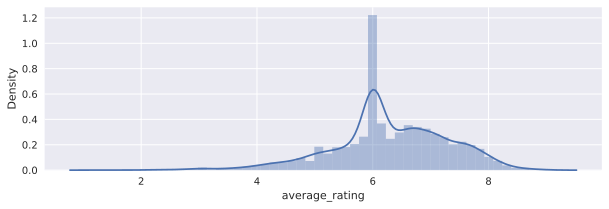

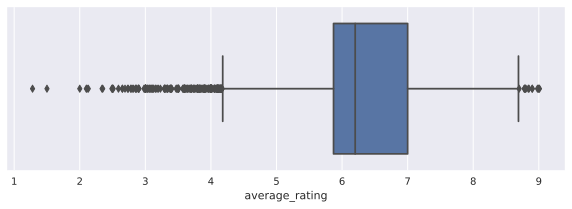

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

plt.figure(figsize=(10, 3))
sns.distplot(df_pr['average_rating'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['average_rating'], orient='h')
plt.show()

In [37]:
df_pr.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'country_0',
       'genre_0', 'genre_1', 'genre_2', 'director_0'],
      dtype='object')

In [38]:
cols = ['age_access_type', 'average_rating', 'duration', 'type', 
        'subscription_only', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'country_0',
       'genre_0', 'genre_1', 'genre_2', 'director_0']

In [39]:
cat_features = ['age_access_type', 'type',
                'actor_0', 'actor_1', 'actor_2',
               'actor_3', 'actor_4', 'country_0', 'genre_0', 'genre_1', 'genre_2',
               'director_0']

In [40]:
df_pr = df_pr[cols]

In [41]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7719 entries, 0 to 9322
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_access_type    7719 non-null   int64  
 1   average_rating     7259 non-null   float64
 2   duration           7719 non-null   float64
 3   type               7719 non-null   object 
 4   subscription_only  7719 non-null   object 
 5   SUBSCRIPTION       7719 non-null   int64  
 6   DTO                7719 non-null   int64  
 7   RENT               7719 non-null   int64  
 8   AVOD               7719 non-null   int64  
 9   actor_0            7719 non-null   object 
 10  actor_1            7719 non-null   object 
 11  actor_2            7719 non-null   object 
 12  actor_3            7719 non-null   object 
 13  actor_4            7719 non-null   object 
 14  country_0          7719 non-null   object 
 15  genre_0            7719 non-null   object 
 16  genre_1            7719 

In [42]:
df_pr.dropna(inplace=True)

## Split

In [43]:
X, y = df_pr.drop('average_rating', axis=1), df_pr['average_rating']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)

In [46]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((5879, 18), (654, 18), (726, 18), (5879,), (654,), (726,))

### Model

In [47]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [48]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.067248
0:	learn: 0.7679439	test: 0.7540382	best: 0.7540382 (0)	total: 87.7ms	remaining: 1m 27s
100:	learn: 0.5768160	test: 0.6086912	best: 0.6086912 (100)	total: 3s	remaining: 26.8s
200:	learn: 0.5526707	test: 0.5975486	best: 0.5973942 (198)	total: 5.68s	remaining: 22.6s
300:	learn: 0.5371064	test: 0.5922434	best: 0.5922324 (299)	total: 8.61s	remaining: 20s
400:	learn: 0.5240881	test: 0.5896756	best: 0.5895105 (399)	total: 11.2s	remaining: 16.8s
500:	learn: 0.5113098	test: 0.5887954	best: 0.5887954 (500)	total: 14s	remaining: 13.9s
600:	learn: 0.5005995	test: 0.5863924	best: 0.5860791 (575)	total: 16.9s	remaining: 11.2s
700:	learn: 0.4909078	test: 0.5861967	best: 0.5860591 (650)	total: 19.6s	remaining: 8.35s
800:	learn: 0.4810377	test: 0.5860478	best: 0.5854811 (712)	total: 22.2s	remaining: 5.53s
900:	learn: 0.4709554	test: 0.5885798	best: 0.5854811 (712)	total: 25.2s	remaining: 2.77s
999:	learn: 0.4617429	test: 0.5884886	best: 0.5854811 (712)	total: 27.9s	remain

In [49]:
y_pred = cat_model.predict(test_dataset)

In [52]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.5699231265946259
RMSE:  0.7549325311540269
R2:    0.4107483801202726
MAE:   0.575391089642383
MedAE: 0.46572871584528475
------------------------------


In [53]:
cat_model.save_model('cat_reg_kinop_ratings_pred')

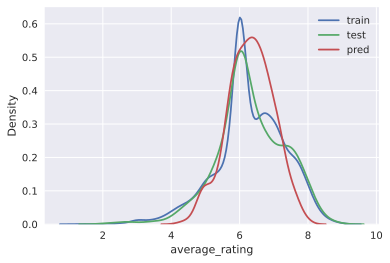

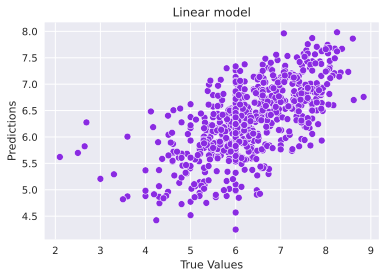

In [54]:
target_distr_linear(y_train, y_test, y_pred)   

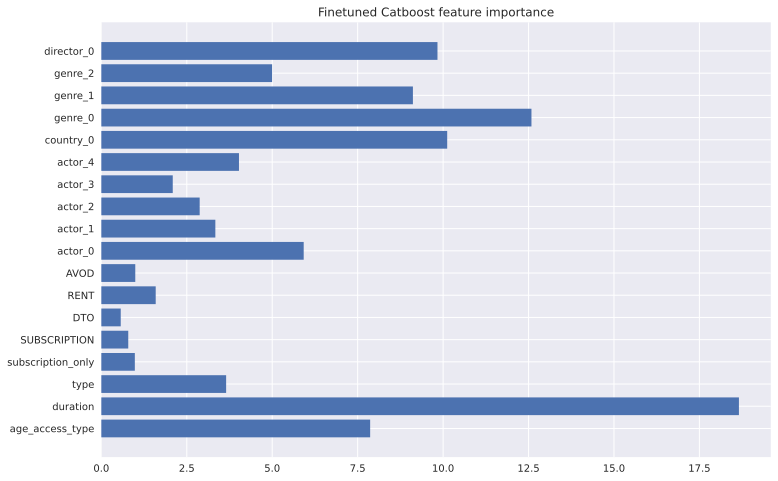

In [55]:
get_feature_imp(cat_model, train_dataset)

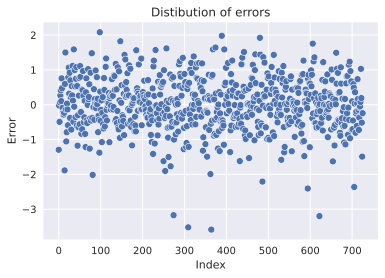

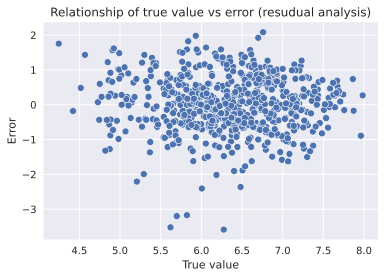

In [56]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

# Tuning

In [57]:
train_dataset = cat.Pool(X_train, 
                         y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(X_test, 
                        y_test,
                        cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [58]:
parameters_distr = {'depth': randint(3, 7),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [100, 1000, 5000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5,
#                           n_jobs=-1, 
                          verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_ratings_kinop', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.7723946	total: 15.5ms	remaining: 1.54s
1:	learn: 0.7673751	total: 35.3ms	remaining: 1.73s
2:	learn: 0.7622191	total: 47.1ms	remaining: 1.52s
3:	learn: 0.7580728	total: 55.1ms	remaining: 1.32s
4:	learn: 0.7529491	total: 65.3ms	remaining: 1.24s
5:	learn: 0.7479323	total: 72.7ms	remaining: 1.14s
6:	learn: 0.7436027	total: 81.2ms	remaining: 1.08s
7:	learn: 0.7396448	total: 91.4ms	remaining: 1.05s
8:	learn: 0.7353486	total: 121ms	remaining: 1.22s
9:	learn: 0.7317294	total: 132ms	remaining: 1.19s
10:	learn: 0.7272886	total: 143ms	remaining: 1.16s
11:	learn: 0.7230138	total: 161ms	remaining: 1.18s
12:	learn: 0.7189628	total: 175ms	remaining: 1.17s
13:	learn: 0.7153641	total: 182ms	remaining: 1.12s
14:	learn: 0.7115935	total: 194ms	remaining: 1.1s
15:	learn: 0.7083278	total: 210ms	remaining: 1.1s
16:	learn: 0.7049270	total: 223ms	remaining: 1.09s
17:	learn: 0.7017273	total: 230ms	remaining: 1.04s
18:	learn: 0.6986613	tota

63:	learn: 0.6353743	total: 844ms	remaining: 475ms
64:	learn: 0.6345760	total: 862ms	remaining: 464ms
65:	learn: 0.6336184	total: 868ms	remaining: 447ms
66:	learn: 0.6329729	total: 874ms	remaining: 430ms
67:	learn: 0.6321119	total: 880ms	remaining: 414ms
68:	learn: 0.6315242	total: 888ms	remaining: 399ms
69:	learn: 0.6307444	total: 914ms	remaining: 392ms
70:	learn: 0.6299118	total: 917ms	remaining: 375ms
71:	learn: 0.6293145	total: 922ms	remaining: 359ms
72:	learn: 0.6288376	total: 931ms	remaining: 344ms
73:	learn: 0.6280774	total: 937ms	remaining: 329ms
74:	learn: 0.6275511	total: 961ms	remaining: 320ms
75:	learn: 0.6268244	total: 970ms	remaining: 306ms
76:	learn: 0.6262623	total: 975ms	remaining: 291ms
77:	learn: 0.6257445	total: 984ms	remaining: 278ms
78:	learn: 0.6250314	total: 996ms	remaining: 265ms
79:	learn: 0.6243455	total: 1.02s	remaining: 254ms
80:	learn: 0.6238729	total: 1.02s	remaining: 240ms
81:	learn: 0.6231388	total: 1.03s	remaining: 226ms
82:	learn: 0.6227310	total: 1.0

33:	learn: 0.6663327	total: 443ms	remaining: 859ms
34:	learn: 0.6648931	total: 451ms	remaining: 838ms
35:	learn: 0.6632340	total: 468ms	remaining: 832ms
36:	learn: 0.6620819	total: 489ms	remaining: 832ms
37:	learn: 0.6605207	total: 497ms	remaining: 811ms
38:	learn: 0.6591373	total: 509ms	remaining: 796ms
39:	learn: 0.6577511	total: 532ms	remaining: 799ms
40:	learn: 0.6564761	total: 548ms	remaining: 788ms
41:	learn: 0.6554354	total: 555ms	remaining: 767ms
42:	learn: 0.6542956	total: 571ms	remaining: 757ms
43:	learn: 0.6532474	total: 581ms	remaining: 740ms
44:	learn: 0.6522451	total: 608ms	remaining: 743ms
45:	learn: 0.6511194	total: 620ms	remaining: 728ms
46:	learn: 0.6497722	total: 637ms	remaining: 718ms
47:	learn: 0.6486383	total: 650ms	remaining: 705ms
48:	learn: 0.6475048	total: 664ms	remaining: 692ms
49:	learn: 0.6466668	total: 671ms	remaining: 671ms
50:	learn: 0.6457231	total: 682ms	remaining: 655ms
51:	learn: 0.6448309	total: 686ms	remaining: 633ms
52:	learn: 0.6438879	total: 692

0:	learn: 0.7612203	total: 20.2ms	remaining: 2s
1:	learn: 0.7467348	total: 31.8ms	remaining: 1.56s
2:	learn: 0.7327288	total: 44.5ms	remaining: 1.44s
3:	learn: 0.7212529	total: 57.1ms	remaining: 1.37s
4:	learn: 0.7087190	total: 71.3ms	remaining: 1.35s
5:	learn: 0.6996064	total: 81.4ms	remaining: 1.27s
6:	learn: 0.6905393	total: 107ms	remaining: 1.42s
7:	learn: 0.6831841	total: 114ms	remaining: 1.31s
8:	learn: 0.6765851	total: 127ms	remaining: 1.28s
9:	learn: 0.6705821	total: 133ms	remaining: 1.2s
10:	learn: 0.6657882	total: 152ms	remaining: 1.23s
11:	learn: 0.6609441	total: 162ms	remaining: 1.19s
12:	learn: 0.6569946	total: 175ms	remaining: 1.17s
13:	learn: 0.6526606	total: 184ms	remaining: 1.13s
14:	learn: 0.6493214	total: 204ms	remaining: 1.16s
15:	learn: 0.6443921	total: 214ms	remaining: 1.12s
16:	learn: 0.6410257	total: 227ms	remaining: 1.11s
17:	learn: 0.6375845	total: 241ms	remaining: 1.09s
18:	learn: 0.6351404	total: 254ms	remaining: 1.08s
19:	learn: 0.6319261	total: 264ms	remai

70:	learn: 0.5841523	total: 891ms	remaining: 364ms
71:	learn: 0.5834315	total: 903ms	remaining: 351ms
72:	learn: 0.5830492	total: 912ms	remaining: 337ms
73:	learn: 0.5823374	total: 917ms	remaining: 322ms
74:	learn: 0.5820620	total: 925ms	remaining: 308ms
75:	learn: 0.5809988	total: 932ms	remaining: 294ms
76:	learn: 0.5802273	total: 938ms	remaining: 280ms
77:	learn: 0.5793940	total: 948ms	remaining: 267ms
78:	learn: 0.5791192	total: 970ms	remaining: 258ms
79:	learn: 0.5790591	total: 975ms	remaining: 244ms
80:	learn: 0.5789003	total: 988ms	remaining: 232ms
81:	learn: 0.5785916	total: 998ms	remaining: 219ms
82:	learn: 0.5781320	total: 1.01s	remaining: 208ms
83:	learn: 0.5777005	total: 1.03s	remaining: 197ms
84:	learn: 0.5771328	total: 1.05s	remaining: 185ms
85:	learn: 0.5769100	total: 1.06s	remaining: 172ms
86:	learn: 0.5764269	total: 1.06s	remaining: 159ms
87:	learn: 0.5762196	total: 1.08s	remaining: 148ms
88:	learn: 0.5755980	total: 1.1s	remaining: 136ms
89:	learn: 0.5752336	total: 1.11

27:	learn: 0.6195753	total: 433ms	remaining: 1.11s
28:	learn: 0.6185178	total: 441ms	remaining: 1.08s
29:	learn: 0.6173940	total: 453ms	remaining: 1.06s
30:	learn: 0.6165961	total: 473ms	remaining: 1.05s
31:	learn: 0.6150096	total: 486ms	remaining: 1.03s
32:	learn: 0.6142246	total: 494ms	remaining: 1s
33:	learn: 0.6130158	total: 512ms	remaining: 994ms
34:	learn: 0.6120183	total: 522ms	remaining: 970ms
35:	learn: 0.6109127	total: 536ms	remaining: 953ms
36:	learn: 0.6095434	total: 544ms	remaining: 926ms
37:	learn: 0.6082733	total: 551ms	remaining: 900ms
38:	learn: 0.6072215	total: 569ms	remaining: 890ms
39:	learn: 0.6063208	total: 587ms	remaining: 881ms
40:	learn: 0.6058119	total: 592ms	remaining: 852ms
41:	learn: 0.6051650	total: 603ms	remaining: 832ms
42:	learn: 0.6044664	total: 621ms	remaining: 824ms
43:	learn: 0.6032836	total: 631ms	remaining: 804ms
44:	learn: 0.6029601	total: 653ms	remaining: 798ms
45:	learn: 0.6017079	total: 661ms	remaining: 776ms
46:	learn: 0.6011141	total: 668ms	

92:	learn: 0.5722842	total: 1.3s	remaining: 98.2ms
93:	learn: 0.5718672	total: 1.31s	remaining: 83.9ms
94:	learn: 0.5714038	total: 1.32s	remaining: 69.7ms
95:	learn: 0.5709617	total: 1.34s	remaining: 55.8ms
96:	learn: 0.5706644	total: 1.35s	remaining: 41.8ms
97:	learn: 0.5701503	total: 1.36s	remaining: 27.8ms
98:	learn: 0.5701338	total: 1.37s	remaining: 13.9ms
99:	learn: 0.5700959	total: 1.39s	remaining: 0us
[CV 5/5] END depth=6, iterations=100, learning_rate=0.09603699651662265;, score=0.403 total time=   1.5s
0:	learn: 0.7704816	total: 37.9ms	remaining: 37.9s
1:	learn: 0.7628777	total: 72.2ms	remaining: 36s
2:	learn: 0.7558372	total: 100ms	remaining: 33.2s
3:	learn: 0.7492231	total: 130ms	remaining: 32.3s
4:	learn: 0.7428917	total: 161ms	remaining: 32.1s
5:	learn: 0.7364803	total: 186ms	remaining: 30.8s
6:	learn: 0.7306629	total: 214ms	remaining: 30.4s
7:	learn: 0.7242446	total: 242ms	remaining: 30s
8:	learn: 0.7191717	total: 259ms	remaining: 28.6s
9:	learn: 0.7143481	total: 285ms	re

157:	learn: 0.5738619	total: 3.38s	remaining: 18s
158:	learn: 0.5736701	total: 3.4s	remaining: 18s
159:	learn: 0.5735260	total: 3.42s	remaining: 18s
160:	learn: 0.5734019	total: 3.44s	remaining: 17.9s
161:	learn: 0.5732521	total: 3.46s	remaining: 17.9s
162:	learn: 0.5730002	total: 3.48s	remaining: 17.9s
163:	learn: 0.5728410	total: 3.5s	remaining: 17.8s
164:	learn: 0.5725759	total: 3.52s	remaining: 17.8s
165:	learn: 0.5723478	total: 3.55s	remaining: 17.8s
166:	learn: 0.5721930	total: 3.57s	remaining: 17.8s
167:	learn: 0.5720552	total: 3.6s	remaining: 17.8s
168:	learn: 0.5718045	total: 3.61s	remaining: 17.8s
169:	learn: 0.5716827	total: 3.63s	remaining: 17.7s
170:	learn: 0.5714263	total: 3.67s	remaining: 17.8s
171:	learn: 0.5712294	total: 3.69s	remaining: 17.8s
172:	learn: 0.5710403	total: 3.7s	remaining: 17.7s
173:	learn: 0.5707522	total: 3.74s	remaining: 17.8s
174:	learn: 0.5703505	total: 3.76s	remaining: 17.7s
175:	learn: 0.5700963	total: 3.78s	remaining: 17.7s
176:	learn: 0.5698976	

325:	learn: 0.5457984	total: 7.17s	remaining: 14.8s
326:	learn: 0.5457311	total: 7.19s	remaining: 14.8s
327:	learn: 0.5454951	total: 7.22s	remaining: 14.8s
328:	learn: 0.5453650	total: 7.24s	remaining: 14.8s
329:	learn: 0.5452227	total: 7.26s	remaining: 14.7s
330:	learn: 0.5449901	total: 7.27s	remaining: 14.7s
331:	learn: 0.5448314	total: 7.3s	remaining: 14.7s
332:	learn: 0.5447240	total: 7.32s	remaining: 14.7s
333:	learn: 0.5446889	total: 7.34s	remaining: 14.6s
334:	learn: 0.5446127	total: 7.37s	remaining: 14.6s
335:	learn: 0.5444615	total: 7.39s	remaining: 14.6s
336:	learn: 0.5443252	total: 7.42s	remaining: 14.6s
337:	learn: 0.5441080	total: 7.44s	remaining: 14.6s
338:	learn: 0.5439132	total: 7.47s	remaining: 14.6s
339:	learn: 0.5437367	total: 7.5s	remaining: 14.6s
340:	learn: 0.5436747	total: 7.54s	remaining: 14.6s
341:	learn: 0.5435658	total: 7.56s	remaining: 14.6s
342:	learn: 0.5433541	total: 7.6s	remaining: 14.6s
343:	learn: 0.5433444	total: 7.62s	remaining: 14.5s
344:	learn: 0.5

485:	learn: 0.5275076	total: 11s	remaining: 11.6s
486:	learn: 0.5274371	total: 11s	remaining: 11.6s
487:	learn: 0.5272366	total: 11s	remaining: 11.6s
488:	learn: 0.5271853	total: 11.1s	remaining: 11.6s
489:	learn: 0.5270605	total: 11.1s	remaining: 11.5s
490:	learn: 0.5268218	total: 11.1s	remaining: 11.5s
491:	learn: 0.5266872	total: 11.1s	remaining: 11.5s
492:	learn: 0.5265964	total: 11.1s	remaining: 11.5s
493:	learn: 0.5265131	total: 11.2s	remaining: 11.4s
494:	learn: 0.5264876	total: 11.2s	remaining: 11.4s
495:	learn: 0.5263197	total: 11.2s	remaining: 11.4s
496:	learn: 0.5262262	total: 11.2s	remaining: 11.4s
497:	learn: 0.5262028	total: 11.3s	remaining: 11.4s
498:	learn: 0.5261625	total: 11.3s	remaining: 11.3s
499:	learn: 0.5261042	total: 11.3s	remaining: 11.3s
500:	learn: 0.5260185	total: 11.3s	remaining: 11.3s
501:	learn: 0.5259629	total: 11.4s	remaining: 11.3s
502:	learn: 0.5258993	total: 11.4s	remaining: 11.2s
503:	learn: 0.5257138	total: 11.4s	remaining: 11.2s
504:	learn: 0.5256

647:	learn: 0.5136532	total: 14.6s	remaining: 7.94s
648:	learn: 0.5135548	total: 14.6s	remaining: 7.92s
649:	learn: 0.5134689	total: 14.7s	remaining: 7.9s
650:	learn: 0.5134464	total: 14.7s	remaining: 7.88s
651:	learn: 0.5134285	total: 14.7s	remaining: 7.85s
652:	learn: 0.5132906	total: 14.7s	remaining: 7.83s
653:	learn: 0.5132786	total: 14.8s	remaining: 7.81s
654:	learn: 0.5132559	total: 14.8s	remaining: 7.79s
655:	learn: 0.5132232	total: 14.8s	remaining: 7.76s
656:	learn: 0.5131925	total: 14.8s	remaining: 7.74s
657:	learn: 0.5131482	total: 14.8s	remaining: 7.72s
658:	learn: 0.5130280	total: 14.9s	remaining: 7.7s
659:	learn: 0.5128835	total: 14.9s	remaining: 7.68s
660:	learn: 0.5128264	total: 14.9s	remaining: 7.66s
661:	learn: 0.5127402	total: 15s	remaining: 7.63s
662:	learn: 0.5126615	total: 15s	remaining: 7.62s
663:	learn: 0.5125644	total: 15s	remaining: 7.59s
664:	learn: 0.5123859	total: 15s	remaining: 7.57s
665:	learn: 0.5122184	total: 15s	remaining: 7.54s
666:	learn: 0.5121475	to

806:	learn: 0.5008721	total: 18.2s	remaining: 4.35s
807:	learn: 0.5007159	total: 18.2s	remaining: 4.33s
808:	learn: 0.5006920	total: 18.3s	remaining: 4.31s
809:	learn: 0.5005862	total: 18.3s	remaining: 4.29s
810:	learn: 0.5005597	total: 18.3s	remaining: 4.26s
811:	learn: 0.5004968	total: 18.3s	remaining: 4.24s
812:	learn: 0.5004224	total: 18.4s	remaining: 4.22s
813:	learn: 0.5004067	total: 18.4s	remaining: 4.2s
814:	learn: 0.5003955	total: 18.4s	remaining: 4.18s
815:	learn: 0.5003588	total: 18.4s	remaining: 4.15s
816:	learn: 0.5003089	total: 18.4s	remaining: 4.13s
817:	learn: 0.5002754	total: 18.5s	remaining: 4.11s
818:	learn: 0.5002505	total: 18.5s	remaining: 4.08s
819:	learn: 0.5001776	total: 18.5s	remaining: 4.06s
820:	learn: 0.5001601	total: 18.5s	remaining: 4.04s
821:	learn: 0.4999960	total: 18.6s	remaining: 4.02s
822:	learn: 0.4999349	total: 18.6s	remaining: 4s
823:	learn: 0.4997361	total: 18.6s	remaining: 3.98s
824:	learn: 0.4995551	total: 18.6s	remaining: 3.96s
825:	learn: 0.49

968:	learn: 0.4887800	total: 22s	remaining: 704ms
969:	learn: 0.4887224	total: 22s	remaining: 681ms
970:	learn: 0.4885943	total: 22s	remaining: 658ms
971:	learn: 0.4884332	total: 22.1s	remaining: 636ms
972:	learn: 0.4884193	total: 22.1s	remaining: 613ms
973:	learn: 0.4883949	total: 22.1s	remaining: 590ms
974:	learn: 0.4883603	total: 22.1s	remaining: 567ms
975:	learn: 0.4882756	total: 22.2s	remaining: 545ms
976:	learn: 0.4881992	total: 22.2s	remaining: 522ms
977:	learn: 0.4880687	total: 22.2s	remaining: 499ms
978:	learn: 0.4879535	total: 22.2s	remaining: 476ms
979:	learn: 0.4878797	total: 22.2s	remaining: 454ms
980:	learn: 0.4877401	total: 22.3s	remaining: 431ms
981:	learn: 0.4876914	total: 22.3s	remaining: 408ms
982:	learn: 0.4875567	total: 22.3s	remaining: 386ms
983:	learn: 0.4874202	total: 22.3s	remaining: 363ms
984:	learn: 0.4874002	total: 22.3s	remaining: 340ms
985:	learn: 0.4873768	total: 22.4s	remaining: 318ms
986:	learn: 0.4873164	total: 22.4s	remaining: 295ms
987:	learn: 0.4872

130:	learn: 0.5894710	total: 3.02s	remaining: 20.1s
131:	learn: 0.5892957	total: 3.05s	remaining: 20s
132:	learn: 0.5890648	total: 3.06s	remaining: 20s
133:	learn: 0.5889381	total: 3.09s	remaining: 20s
134:	learn: 0.5886057	total: 3.12s	remaining: 20s
135:	learn: 0.5883439	total: 3.14s	remaining: 19.9s
136:	learn: 0.5880847	total: 3.17s	remaining: 19.9s
137:	learn: 0.5879509	total: 3.17s	remaining: 19.8s
138:	learn: 0.5876694	total: 3.19s	remaining: 19.8s
139:	learn: 0.5874616	total: 3.21s	remaining: 19.7s
140:	learn: 0.5871816	total: 3.23s	remaining: 19.7s
141:	learn: 0.5869968	total: 3.26s	remaining: 19.7s
142:	learn: 0.5866830	total: 3.28s	remaining: 19.6s
143:	learn: 0.5865878	total: 3.29s	remaining: 19.6s
144:	learn: 0.5863934	total: 3.32s	remaining: 19.6s
145:	learn: 0.5860880	total: 3.34s	remaining: 19.5s
146:	learn: 0.5858938	total: 3.36s	remaining: 19.5s
147:	learn: 0.5858249	total: 3.36s	remaining: 19.4s
148:	learn: 0.5855869	total: 3.39s	remaining: 19.3s
149:	learn: 0.585485

291:	learn: 0.5581308	total: 6.62s	remaining: 16.1s
292:	learn: 0.5579790	total: 6.65s	remaining: 16s
293:	learn: 0.5578646	total: 6.67s	remaining: 16s
294:	learn: 0.5577639	total: 6.7s	remaining: 16s
295:	learn: 0.5576090	total: 6.72s	remaining: 16s
296:	learn: 0.5575801	total: 6.75s	remaining: 16s
297:	learn: 0.5574011	total: 6.76s	remaining: 15.9s
298:	learn: 0.5572177	total: 6.78s	remaining: 15.9s
299:	learn: 0.5570251	total: 6.8s	remaining: 15.9s
300:	learn: 0.5569759	total: 6.82s	remaining: 15.8s
301:	learn: 0.5568846	total: 6.84s	remaining: 15.8s
302:	learn: 0.5566486	total: 6.87s	remaining: 15.8s
303:	learn: 0.5565362	total: 6.89s	remaining: 15.8s
304:	learn: 0.5564803	total: 6.9s	remaining: 15.7s
305:	learn: 0.5562557	total: 6.92s	remaining: 15.7s
306:	learn: 0.5561635	total: 6.94s	remaining: 15.7s
307:	learn: 0.5561100	total: 6.97s	remaining: 15.7s
308:	learn: 0.5559826	total: 7.01s	remaining: 15.7s
309:	learn: 0.5557744	total: 7.04s	remaining: 15.7s
310:	learn: 0.5556560	tot

456:	learn: 0.5381018	total: 10.5s	remaining: 12.5s
457:	learn: 0.5379792	total: 10.5s	remaining: 12.4s
458:	learn: 0.5379278	total: 10.5s	remaining: 12.4s
459:	learn: 0.5377514	total: 10.6s	remaining: 12.4s
460:	learn: 0.5375771	total: 10.6s	remaining: 12.4s
461:	learn: 0.5374299	total: 10.6s	remaining: 12.4s
462:	learn: 0.5373735	total: 10.6s	remaining: 12.3s
463:	learn: 0.5371964	total: 10.6s	remaining: 12.3s
464:	learn: 0.5371878	total: 10.7s	remaining: 12.3s
465:	learn: 0.5371336	total: 10.7s	remaining: 12.3s
466:	learn: 0.5370155	total: 10.7s	remaining: 12.2s
467:	learn: 0.5369272	total: 10.7s	remaining: 12.2s
468:	learn: 0.5366590	total: 10.8s	remaining: 12.2s
469:	learn: 0.5364967	total: 10.8s	remaining: 12.2s
470:	learn: 0.5363770	total: 10.8s	remaining: 12.1s
471:	learn: 0.5363260	total: 10.8s	remaining: 12.1s
472:	learn: 0.5361856	total: 10.8s	remaining: 12.1s
473:	learn: 0.5360604	total: 10.9s	remaining: 12.1s
474:	learn: 0.5359537	total: 10.9s	remaining: 12s
475:	learn: 0.

619:	learn: 0.5224119	total: 14.3s	remaining: 8.76s
620:	learn: 0.5223142	total: 14.3s	remaining: 8.74s
621:	learn: 0.5222789	total: 14.4s	remaining: 8.72s
622:	learn: 0.5221506	total: 14.4s	remaining: 8.7s
623:	learn: 0.5220742	total: 14.4s	remaining: 8.69s
624:	learn: 0.5219968	total: 14.4s	remaining: 8.66s
625:	learn: 0.5218789	total: 14.5s	remaining: 8.64s
626:	learn: 0.5217891	total: 14.5s	remaining: 8.62s
627:	learn: 0.5216624	total: 14.5s	remaining: 8.6s
628:	learn: 0.5215794	total: 14.5s	remaining: 8.58s
629:	learn: 0.5215259	total: 14.6s	remaining: 8.56s
630:	learn: 0.5214392	total: 14.6s	remaining: 8.53s
631:	learn: 0.5213383	total: 14.6s	remaining: 8.51s
632:	learn: 0.5212070	total: 14.6s	remaining: 8.49s
633:	learn: 0.5211600	total: 14.7s	remaining: 8.46s
634:	learn: 0.5210671	total: 14.7s	remaining: 8.44s
635:	learn: 0.5209845	total: 14.7s	remaining: 8.42s
636:	learn: 0.5208998	total: 14.7s	remaining: 8.39s
637:	learn: 0.5208869	total: 14.8s	remaining: 8.37s
638:	learn: 0.

779:	learn: 0.5089115	total: 18.1s	remaining: 5.09s
780:	learn: 0.5087609	total: 18.1s	remaining: 5.07s
781:	learn: 0.5087478	total: 18.1s	remaining: 5.04s
782:	learn: 0.5086002	total: 18.1s	remaining: 5.02s
783:	learn: 0.5084791	total: 18.1s	remaining: 5s
784:	learn: 0.5084500	total: 18.2s	remaining: 4.97s
785:	learn: 0.5083938	total: 18.2s	remaining: 4.95s
786:	learn: 0.5083748	total: 18.2s	remaining: 4.93s
787:	learn: 0.5083589	total: 18.2s	remaining: 4.91s
788:	learn: 0.5082648	total: 18.3s	remaining: 4.88s
789:	learn: 0.5082266	total: 18.3s	remaining: 4.86s
790:	learn: 0.5081400	total: 18.3s	remaining: 4.84s
791:	learn: 0.5080924	total: 18.3s	remaining: 4.81s
792:	learn: 0.5080217	total: 18.4s	remaining: 4.79s
793:	learn: 0.5079105	total: 18.4s	remaining: 4.77s
794:	learn: 0.5078837	total: 18.4s	remaining: 4.75s
795:	learn: 0.5078289	total: 18.4s	remaining: 4.72s
796:	learn: 0.5077449	total: 18.5s	remaining: 4.7s
797:	learn: 0.5076948	total: 18.5s	remaining: 4.68s
798:	learn: 0.50

946:	learn: 0.4966754	total: 22.1s	remaining: 1.23s
947:	learn: 0.4966580	total: 22.1s	remaining: 1.21s
948:	learn: 0.4965463	total: 22.1s	remaining: 1.19s
949:	learn: 0.4964613	total: 22.1s	remaining: 1.16s
950:	learn: 0.4963758	total: 22.1s	remaining: 1.14s
951:	learn: 0.4963124	total: 22.1s	remaining: 1.12s
952:	learn: 0.4962371	total: 22.2s	remaining: 1.09s
953:	learn: 0.4961962	total: 22.2s	remaining: 1.07s
954:	learn: 0.4961559	total: 22.2s	remaining: 1.05s
955:	learn: 0.4960604	total: 22.3s	remaining: 1.02s
956:	learn: 0.4959848	total: 22.3s	remaining: 1s
957:	learn: 0.4959641	total: 22.3s	remaining: 977ms
958:	learn: 0.4958711	total: 22.3s	remaining: 954ms
959:	learn: 0.4957170	total: 22.3s	remaining: 931ms
960:	learn: 0.4956733	total: 22.4s	remaining: 908ms
961:	learn: 0.4956419	total: 22.4s	remaining: 884ms
962:	learn: 0.4955853	total: 22.4s	remaining: 861ms
963:	learn: 0.4953850	total: 22.4s	remaining: 838ms
964:	learn: 0.4952606	total: 22.4s	remaining: 814ms
965:	learn: 0.4

106:	learn: 0.5916822	total: 2.4s	remaining: 20s
107:	learn: 0.5914326	total: 2.43s	remaining: 20.1s
108:	learn: 0.5911281	total: 2.45s	remaining: 20.1s
109:	learn: 0.5906902	total: 2.5s	remaining: 20.2s
110:	learn: 0.5902640	total: 2.52s	remaining: 20.2s
111:	learn: 0.5898343	total: 2.55s	remaining: 20.2s
112:	learn: 0.5893855	total: 2.58s	remaining: 20.2s
113:	learn: 0.5888940	total: 2.6s	remaining: 20.2s
114:	learn: 0.5885548	total: 2.62s	remaining: 20.2s
115:	learn: 0.5884023	total: 2.65s	remaining: 20.2s
116:	learn: 0.5880867	total: 2.67s	remaining: 20.2s
117:	learn: 0.5878642	total: 2.69s	remaining: 20.1s
118:	learn: 0.5875364	total: 2.71s	remaining: 20s
119:	learn: 0.5870355	total: 2.73s	remaining: 20s
120:	learn: 0.5867003	total: 2.75s	remaining: 20s
121:	learn: 0.5864135	total: 2.77s	remaining: 20s
122:	learn: 0.5861271	total: 2.8s	remaining: 19.9s
123:	learn: 0.5858783	total: 2.81s	remaining: 19.9s
124:	learn: 0.5855943	total: 2.84s	remaining: 19.9s
125:	learn: 0.5852681	tota

271:	learn: 0.5536397	total: 6.17s	remaining: 16.5s
272:	learn: 0.5535182	total: 6.2s	remaining: 16.5s
273:	learn: 0.5534514	total: 6.22s	remaining: 16.5s
274:	learn: 0.5531827	total: 6.24s	remaining: 16.5s
275:	learn: 0.5529986	total: 6.28s	remaining: 16.5s
276:	learn: 0.5528397	total: 6.3s	remaining: 16.5s
277:	learn: 0.5526963	total: 6.33s	remaining: 16.4s
278:	learn: 0.5525423	total: 6.35s	remaining: 16.4s
279:	learn: 0.5525036	total: 6.39s	remaining: 16.4s
280:	learn: 0.5524717	total: 6.41s	remaining: 16.4s
281:	learn: 0.5523212	total: 6.43s	remaining: 16.4s
282:	learn: 0.5522610	total: 6.45s	remaining: 16.3s
283:	learn: 0.5521322	total: 6.47s	remaining: 16.3s
284:	learn: 0.5518542	total: 6.49s	remaining: 16.3s
285:	learn: 0.5517349	total: 6.5s	remaining: 16.2s
286:	learn: 0.5517189	total: 6.53s	remaining: 16.2s
287:	learn: 0.5516583	total: 6.55s	remaining: 16.2s
288:	learn: 0.5515340	total: 6.57s	remaining: 16.2s
289:	learn: 0.5514887	total: 6.59s	remaining: 16.1s
290:	learn: 0.5

434:	learn: 0.5335714	total: 9.81s	remaining: 12.7s
435:	learn: 0.5333962	total: 9.83s	remaining: 12.7s
436:	learn: 0.5333058	total: 9.86s	remaining: 12.7s
437:	learn: 0.5332337	total: 9.88s	remaining: 12.7s
438:	learn: 0.5331586	total: 9.9s	remaining: 12.7s
439:	learn: 0.5330237	total: 9.92s	remaining: 12.6s
440:	learn: 0.5328773	total: 9.95s	remaining: 12.6s
441:	learn: 0.5328398	total: 9.97s	remaining: 12.6s
442:	learn: 0.5327487	total: 9.99s	remaining: 12.6s
443:	learn: 0.5326233	total: 10s	remaining: 12.5s
444:	learn: 0.5324709	total: 10s	remaining: 12.5s
445:	learn: 0.5323561	total: 10.1s	remaining: 12.5s
446:	learn: 0.5323467	total: 10.1s	remaining: 12.5s
447:	learn: 0.5322916	total: 10.1s	remaining: 12.4s
448:	learn: 0.5322106	total: 10.1s	remaining: 12.4s
449:	learn: 0.5321595	total: 10.1s	remaining: 12.4s
450:	learn: 0.5320663	total: 10.2s	remaining: 12.4s
451:	learn: 0.5320244	total: 10.2s	remaining: 12.3s
452:	learn: 0.5318987	total: 10.2s	remaining: 12.3s
453:	learn: 0.531

597:	learn: 0.5178622	total: 13.4s	remaining: 9.02s
598:	learn: 0.5177648	total: 13.4s	remaining: 9s
599:	learn: 0.5177148	total: 13.5s	remaining: 8.97s
600:	learn: 0.5175587	total: 13.5s	remaining: 8.95s
601:	learn: 0.5174352	total: 13.5s	remaining: 8.92s
602:	learn: 0.5174336	total: 13.5s	remaining: 8.89s
603:	learn: 0.5173834	total: 13.5s	remaining: 8.87s
604:	learn: 0.5172011	total: 13.6s	remaining: 8.85s
605:	learn: 0.5171068	total: 13.6s	remaining: 8.83s
606:	learn: 0.5169834	total: 13.6s	remaining: 8.81s
607:	learn: 0.5169198	total: 13.6s	remaining: 8.79s
608:	learn: 0.5168074	total: 13.7s	remaining: 8.77s
609:	learn: 0.5166621	total: 13.7s	remaining: 8.74s
610:	learn: 0.5166273	total: 13.7s	remaining: 8.72s
611:	learn: 0.5165205	total: 13.7s	remaining: 8.7s
612:	learn: 0.5165160	total: 13.7s	remaining: 8.68s
613:	learn: 0.5164156	total: 13.8s	remaining: 8.65s
614:	learn: 0.5161409	total: 13.8s	remaining: 8.63s
615:	learn: 0.5159876	total: 13.8s	remaining: 8.6s
616:	learn: 0.515

761:	learn: 0.5039026	total: 17.3s	remaining: 5.4s
762:	learn: 0.5038325	total: 17.3s	remaining: 5.38s
763:	learn: 0.5037337	total: 17.3s	remaining: 5.36s
764:	learn: 0.5036891	total: 17.4s	remaining: 5.33s
765:	learn: 0.5036366	total: 17.4s	remaining: 5.31s
766:	learn: 0.5035284	total: 17.4s	remaining: 5.29s
767:	learn: 0.5033483	total: 17.4s	remaining: 5.27s
768:	learn: 0.5032649	total: 17.5s	remaining: 5.25s
769:	learn: 0.5031521	total: 17.5s	remaining: 5.22s
770:	learn: 0.5031465	total: 17.5s	remaining: 5.2s
771:	learn: 0.5029885	total: 17.5s	remaining: 5.18s
772:	learn: 0.5028589	total: 17.6s	remaining: 5.16s
773:	learn: 0.5027466	total: 17.6s	remaining: 5.13s
774:	learn: 0.5026719	total: 17.6s	remaining: 5.11s
775:	learn: 0.5025874	total: 17.6s	remaining: 5.09s
776:	learn: 0.5025173	total: 17.6s	remaining: 5.06s
777:	learn: 0.5024683	total: 17.7s	remaining: 5.04s
778:	learn: 0.5023759	total: 17.7s	remaining: 5.02s
779:	learn: 0.5022037	total: 17.7s	remaining: 5s
780:	learn: 0.502

921:	learn: 0.4893977	total: 21.1s	remaining: 1.78s
922:	learn: 0.4893311	total: 21.1s	remaining: 1.76s
923:	learn: 0.4891971	total: 21.1s	remaining: 1.74s
924:	learn: 0.4891852	total: 21.2s	remaining: 1.72s
925:	learn: 0.4891204	total: 21.2s	remaining: 1.69s
926:	learn: 0.4890677	total: 21.2s	remaining: 1.67s
927:	learn: 0.4890063	total: 21.2s	remaining: 1.65s
928:	learn: 0.4889553	total: 21.3s	remaining: 1.62s
929:	learn: 0.4889023	total: 21.3s	remaining: 1.6s
930:	learn: 0.4888192	total: 21.3s	remaining: 1.58s
931:	learn: 0.4887399	total: 21.3s	remaining: 1.56s
932:	learn: 0.4886597	total: 21.4s	remaining: 1.53s
933:	learn: 0.4886262	total: 21.4s	remaining: 1.51s
934:	learn: 0.4885573	total: 21.4s	remaining: 1.49s
935:	learn: 0.4885149	total: 21.4s	remaining: 1.47s
936:	learn: 0.4884496	total: 21.4s	remaining: 1.44s
937:	learn: 0.4883668	total: 21.5s	remaining: 1.42s
938:	learn: 0.4883388	total: 21.5s	remaining: 1.4s
939:	learn: 0.4882777	total: 21.5s	remaining: 1.37s
940:	learn: 0.

82:	learn: 0.6058603	total: 1.95s	remaining: 21.6s
83:	learn: 0.6054869	total: 1.97s	remaining: 21.5s
84:	learn: 0.6049542	total: 1.99s	remaining: 21.4s
85:	learn: 0.6044856	total: 2s	remaining: 21.3s
86:	learn: 0.6040768	total: 2.02s	remaining: 21.2s
87:	learn: 0.6038500	total: 2.04s	remaining: 21.1s
88:	learn: 0.6033063	total: 2.05s	remaining: 21s
89:	learn: 0.6029438	total: 2.06s	remaining: 20.9s
90:	learn: 0.6024779	total: 2.08s	remaining: 20.8s
91:	learn: 0.6021487	total: 2.1s	remaining: 20.8s
92:	learn: 0.6019198	total: 2.12s	remaining: 20.7s
93:	learn: 0.6015645	total: 2.14s	remaining: 20.6s
94:	learn: 0.6010985	total: 2.16s	remaining: 20.6s
95:	learn: 0.6007001	total: 2.18s	remaining: 20.6s
96:	learn: 0.6003857	total: 2.2s	remaining: 20.5s
97:	learn: 0.5996484	total: 2.22s	remaining: 20.4s
98:	learn: 0.5993995	total: 2.24s	remaining: 20.4s
99:	learn: 0.5990634	total: 2.26s	remaining: 20.3s
100:	learn: 0.5984348	total: 2.28s	remaining: 20.3s
101:	learn: 0.5981450	total: 2.3s	rem

243:	learn: 0.5624165	total: 5.35s	remaining: 16.6s
244:	learn: 0.5621639	total: 5.38s	remaining: 16.6s
245:	learn: 0.5620440	total: 5.39s	remaining: 16.5s
246:	learn: 0.5619059	total: 5.42s	remaining: 16.5s
247:	learn: 0.5618108	total: 5.45s	remaining: 16.5s
248:	learn: 0.5616369	total: 5.47s	remaining: 16.5s
249:	learn: 0.5615473	total: 5.48s	remaining: 16.5s
250:	learn: 0.5614695	total: 5.5s	remaining: 16.4s
251:	learn: 0.5613340	total: 5.53s	remaining: 16.4s
252:	learn: 0.5611485	total: 5.55s	remaining: 16.4s
253:	learn: 0.5610140	total: 5.57s	remaining: 16.4s
254:	learn: 0.5608660	total: 5.58s	remaining: 16.3s
255:	learn: 0.5606038	total: 5.61s	remaining: 16.3s
256:	learn: 0.5605479	total: 5.63s	remaining: 16.3s
257:	learn: 0.5603771	total: 5.65s	remaining: 16.3s
258:	learn: 0.5602960	total: 5.67s	remaining: 16.2s
259:	learn: 0.5601903	total: 5.7s	remaining: 16.2s
260:	learn: 0.5600623	total: 5.72s	remaining: 16.2s
261:	learn: 0.5599589	total: 5.75s	remaining: 16.2s
262:	learn: 0.

407:	learn: 0.5387044	total: 8.96s	remaining: 13s
408:	learn: 0.5385656	total: 8.98s	remaining: 13s
409:	learn: 0.5383916	total: 9s	remaining: 12.9s
410:	learn: 0.5383267	total: 9.02s	remaining: 12.9s
411:	learn: 0.5382340	total: 9.05s	remaining: 12.9s
412:	learn: 0.5381561	total: 9.07s	remaining: 12.9s
413:	learn: 0.5380805	total: 9.1s	remaining: 12.9s
414:	learn: 0.5379978	total: 9.12s	remaining: 12.9s
415:	learn: 0.5376296	total: 9.15s	remaining: 12.8s
416:	learn: 0.5375475	total: 9.17s	remaining: 12.8s
417:	learn: 0.5375167	total: 9.19s	remaining: 12.8s
418:	learn: 0.5374375	total: 9.22s	remaining: 12.8s
419:	learn: 0.5372635	total: 9.24s	remaining: 12.8s
420:	learn: 0.5371968	total: 9.27s	remaining: 12.8s
421:	learn: 0.5371579	total: 9.29s	remaining: 12.7s
422:	learn: 0.5370595	total: 9.31s	remaining: 12.7s
423:	learn: 0.5369783	total: 9.33s	remaining: 12.7s
424:	learn: 0.5369040	total: 9.35s	remaining: 12.6s
425:	learn: 0.5367958	total: 9.36s	remaining: 12.6s
426:	learn: 0.536716

569:	learn: 0.5216873	total: 12.5s	remaining: 9.44s
570:	learn: 0.5216180	total: 12.5s	remaining: 9.42s
571:	learn: 0.5215660	total: 12.6s	remaining: 9.4s
572:	learn: 0.5215286	total: 12.6s	remaining: 9.38s
573:	learn: 0.5214979	total: 12.6s	remaining: 9.35s
574:	learn: 0.5213812	total: 12.6s	remaining: 9.33s
575:	learn: 0.5212214	total: 12.6s	remaining: 9.31s
576:	learn: 0.5211262	total: 12.7s	remaining: 9.29s
577:	learn: 0.5210114	total: 12.7s	remaining: 9.27s
578:	learn: 0.5209207	total: 12.7s	remaining: 9.25s
579:	learn: 0.5208534	total: 12.7s	remaining: 9.22s
580:	learn: 0.5206803	total: 12.8s	remaining: 9.2s
581:	learn: 0.5205811	total: 12.8s	remaining: 9.18s
582:	learn: 0.5205362	total: 12.8s	remaining: 9.16s
583:	learn: 0.5204360	total: 12.8s	remaining: 9.14s
584:	learn: 0.5203419	total: 12.9s	remaining: 9.12s
585:	learn: 0.5202420	total: 12.9s	remaining: 9.1s
586:	learn: 0.5201998	total: 12.9s	remaining: 9.07s
587:	learn: 0.5201651	total: 12.9s	remaining: 9.05s
588:	learn: 0.5

731:	learn: 0.5077520	total: 16.3s	remaining: 5.97s
732:	learn: 0.5077010	total: 16.3s	remaining: 5.95s
733:	learn: 0.5076322	total: 16.4s	remaining: 5.93s
734:	learn: 0.5075819	total: 16.4s	remaining: 5.91s
735:	learn: 0.5075017	total: 16.4s	remaining: 5.88s
736:	learn: 0.5074086	total: 16.4s	remaining: 5.87s
737:	learn: 0.5073474	total: 16.5s	remaining: 5.84s
738:	learn: 0.5072489	total: 16.5s	remaining: 5.82s
739:	learn: 0.5071752	total: 16.5s	remaining: 5.8s
740:	learn: 0.5071119	total: 16.5s	remaining: 5.78s
741:	learn: 0.5070846	total: 16.6s	remaining: 5.76s
742:	learn: 0.5070484	total: 16.6s	remaining: 5.74s
743:	learn: 0.5069842	total: 16.6s	remaining: 5.72s
744:	learn: 0.5069566	total: 16.6s	remaining: 5.7s
745:	learn: 0.5067588	total: 16.7s	remaining: 5.67s
746:	learn: 0.5067269	total: 16.7s	remaining: 5.65s
747:	learn: 0.5066643	total: 16.7s	remaining: 5.63s
748:	learn: 0.5066303	total: 16.7s	remaining: 5.61s
749:	learn: 0.5065327	total: 16.7s	remaining: 5.58s
750:	learn: 0.

892:	learn: 0.4943396	total: 20.1s	remaining: 2.41s
893:	learn: 0.4942431	total: 20.1s	remaining: 2.39s
894:	learn: 0.4941560	total: 20.2s	remaining: 2.37s
895:	learn: 0.4941018	total: 20.2s	remaining: 2.34s
896:	learn: 0.4940622	total: 20.2s	remaining: 2.32s
897:	learn: 0.4940144	total: 20.2s	remaining: 2.3s
898:	learn: 0.4939635	total: 20.2s	remaining: 2.27s
899:	learn: 0.4938271	total: 20.3s	remaining: 2.25s
900:	learn: 0.4937024	total: 20.3s	remaining: 2.23s
901:	learn: 0.4936361	total: 20.3s	remaining: 2.21s
902:	learn: 0.4935412	total: 20.4s	remaining: 2.19s
903:	learn: 0.4935186	total: 20.4s	remaining: 2.16s
904:	learn: 0.4934380	total: 20.4s	remaining: 2.14s
905:	learn: 0.4933555	total: 20.4s	remaining: 2.12s
906:	learn: 0.4933459	total: 20.4s	remaining: 2.1s
907:	learn: 0.4933047	total: 20.5s	remaining: 2.07s
908:	learn: 0.4932435	total: 20.5s	remaining: 2.05s
909:	learn: 0.4931391	total: 20.5s	remaining: 2.03s
910:	learn: 0.4930483	total: 20.5s	remaining: 2.01s
911:	learn: 0.

50:	learn: 0.6302187	total: 1.2s	remaining: 22.4s
51:	learn: 0.6286423	total: 1.23s	remaining: 22.4s
52:	learn: 0.6276006	total: 1.25s	remaining: 22.4s
53:	learn: 0.6263573	total: 1.28s	remaining: 22.4s
54:	learn: 0.6251855	total: 1.31s	remaining: 22.5s
55:	learn: 0.6240571	total: 1.34s	remaining: 22.6s
56:	learn: 0.6229690	total: 1.36s	remaining: 22.6s
57:	learn: 0.6221233	total: 1.39s	remaining: 22.5s
58:	learn: 0.6213320	total: 1.41s	remaining: 22.5s
59:	learn: 0.6202453	total: 1.43s	remaining: 22.4s
60:	learn: 0.6194136	total: 1.45s	remaining: 22.3s
61:	learn: 0.6183756	total: 1.47s	remaining: 22.2s
62:	learn: 0.6176417	total: 1.49s	remaining: 22.2s
63:	learn: 0.6168566	total: 1.51s	remaining: 22.1s
64:	learn: 0.6161264	total: 1.54s	remaining: 22.2s
65:	learn: 0.6151805	total: 1.56s	remaining: 22.1s
66:	learn: 0.6143836	total: 1.58s	remaining: 22s
67:	learn: 0.6136969	total: 1.61s	remaining: 22.1s
68:	learn: 0.6130574	total: 1.64s	remaining: 22.1s
69:	learn: 0.6124146	total: 1.66s	

219:	learn: 0.5686741	total: 4.97s	remaining: 17.6s
220:	learn: 0.5683592	total: 4.99s	remaining: 17.6s
221:	learn: 0.5682563	total: 5.01s	remaining: 17.6s
222:	learn: 0.5681521	total: 5.04s	remaining: 17.6s
223:	learn: 0.5679354	total: 5.06s	remaining: 17.5s
224:	learn: 0.5676800	total: 5.08s	remaining: 17.5s
225:	learn: 0.5675824	total: 5.1s	remaining: 17.5s
226:	learn: 0.5674541	total: 5.13s	remaining: 17.5s
227:	learn: 0.5673381	total: 5.14s	remaining: 17.4s
228:	learn: 0.5671725	total: 5.17s	remaining: 17.4s
229:	learn: 0.5669178	total: 5.18s	remaining: 17.4s
230:	learn: 0.5667630	total: 5.2s	remaining: 17.3s
231:	learn: 0.5667618	total: 5.21s	remaining: 17.3s
232:	learn: 0.5667348	total: 5.23s	remaining: 17.2s
233:	learn: 0.5666966	total: 5.25s	remaining: 17.2s
234:	learn: 0.5662993	total: 5.26s	remaining: 17.1s
235:	learn: 0.5659185	total: 5.28s	remaining: 17.1s
236:	learn: 0.5656228	total: 5.29s	remaining: 17s
237:	learn: 0.5655067	total: 5.32s	remaining: 17s
238:	learn: 0.5652

386:	learn: 0.5476353	total: 8.37s	remaining: 13.3s
387:	learn: 0.5476193	total: 8.38s	remaining: 13.2s
388:	learn: 0.5474268	total: 8.4s	remaining: 13.2s
389:	learn: 0.5473136	total: 8.43s	remaining: 13.2s
390:	learn: 0.5469517	total: 8.44s	remaining: 13.2s
391:	learn: 0.5469365	total: 8.46s	remaining: 13.1s
392:	learn: 0.5467766	total: 8.49s	remaining: 13.1s
393:	learn: 0.5466570	total: 8.51s	remaining: 13.1s
394:	learn: 0.5465200	total: 8.53s	remaining: 13.1s
395:	learn: 0.5464501	total: 8.55s	remaining: 13s
396:	learn: 0.5463361	total: 8.57s	remaining: 13s
397:	learn: 0.5463246	total: 8.59s	remaining: 13s
398:	learn: 0.5460610	total: 8.61s	remaining: 13s
399:	learn: 0.5459102	total: 8.63s	remaining: 12.9s
400:	learn: 0.5458191	total: 8.64s	remaining: 12.9s
401:	learn: 0.5458175	total: 8.66s	remaining: 12.9s
402:	learn: 0.5458176	total: 8.67s	remaining: 12.8s
403:	learn: 0.5458082	total: 8.69s	remaining: 12.8s
404:	learn: 0.5456068	total: 8.72s	remaining: 12.8s
405:	learn: 0.5455191

548:	learn: 0.5309685	total: 12s	remaining: 9.84s
549:	learn: 0.5309168	total: 12s	remaining: 9.82s
550:	learn: 0.5308142	total: 12s	remaining: 9.81s
551:	learn: 0.5307528	total: 12.1s	remaining: 9.8s
552:	learn: 0.5306996	total: 12.1s	remaining: 9.78s
553:	learn: 0.5306922	total: 12.1s	remaining: 9.76s
554:	learn: 0.5306269	total: 12.1s	remaining: 9.73s
555:	learn: 0.5305589	total: 12.2s	remaining: 9.71s
556:	learn: 0.5305202	total: 12.2s	remaining: 9.69s
557:	learn: 0.5302936	total: 12.2s	remaining: 9.67s
558:	learn: 0.5301867	total: 12.2s	remaining: 9.66s
559:	learn: 0.5300888	total: 12.3s	remaining: 9.64s
560:	learn: 0.5298796	total: 12.3s	remaining: 9.62s
561:	learn: 0.5297953	total: 12.3s	remaining: 9.6s
562:	learn: 0.5297179	total: 12.3s	remaining: 9.58s
563:	learn: 0.5295039	total: 12.4s	remaining: 9.55s
564:	learn: 0.5294192	total: 12.4s	remaining: 9.53s
565:	learn: 0.5293228	total: 12.4s	remaining: 9.52s
566:	learn: 0.5292163	total: 12.4s	remaining: 9.5s
567:	learn: 0.5291647

707:	learn: 0.5161047	total: 15.6s	remaining: 6.44s
708:	learn: 0.5159992	total: 15.6s	remaining: 6.42s
709:	learn: 0.5158223	total: 15.7s	remaining: 6.39s
710:	learn: 0.5157388	total: 15.7s	remaining: 6.37s
711:	learn: 0.5157356	total: 15.7s	remaining: 6.35s
712:	learn: 0.5156640	total: 15.7s	remaining: 6.33s
713:	learn: 0.5155094	total: 15.7s	remaining: 6.31s
714:	learn: 0.5153931	total: 15.8s	remaining: 6.29s
715:	learn: 0.5152471	total: 15.8s	remaining: 6.26s
716:	learn: 0.5152112	total: 15.8s	remaining: 6.24s
717:	learn: 0.5151068	total: 15.8s	remaining: 6.22s
718:	learn: 0.5149864	total: 15.9s	remaining: 6.2s
719:	learn: 0.5146931	total: 15.9s	remaining: 6.18s
720:	learn: 0.5146254	total: 15.9s	remaining: 6.16s
721:	learn: 0.5145389	total: 15.9s	remaining: 6.14s
722:	learn: 0.5145315	total: 16s	remaining: 6.12s
723:	learn: 0.5144547	total: 16s	remaining: 6.09s
724:	learn: 0.5144187	total: 16s	remaining: 6.07s
725:	learn: 0.5144095	total: 16s	remaining: 6.05s
726:	learn: 0.5144074

870:	learn: 0.5036838	total: 19.4s	remaining: 2.88s
871:	learn: 0.5035654	total: 19.4s	remaining: 2.85s
872:	learn: 0.5035230	total: 19.5s	remaining: 2.83s
873:	learn: 0.5034847	total: 19.5s	remaining: 2.81s
874:	learn: 0.5033406	total: 19.5s	remaining: 2.79s
875:	learn: 0.5031409	total: 19.5s	remaining: 2.77s
876:	learn: 0.5029331	total: 19.6s	remaining: 2.74s
877:	learn: 0.5028349	total: 19.6s	remaining: 2.72s
878:	learn: 0.5027874	total: 19.6s	remaining: 2.7s
879:	learn: 0.5026876	total: 19.6s	remaining: 2.68s
880:	learn: 0.5025771	total: 19.7s	remaining: 2.65s
881:	learn: 0.5025197	total: 19.7s	remaining: 2.63s
882:	learn: 0.5023808	total: 19.7s	remaining: 2.61s
883:	learn: 0.5022608	total: 19.7s	remaining: 2.59s
884:	learn: 0.5022128	total: 19.8s	remaining: 2.57s
885:	learn: 0.5021454	total: 19.8s	remaining: 2.54s
886:	learn: 0.5020871	total: 19.8s	remaining: 2.52s
887:	learn: 0.5020724	total: 19.8s	remaining: 2.5s
888:	learn: 0.5020162	total: 19.8s	remaining: 2.48s
889:	learn: 0.

33:	learn: 0.6437261	total: 662ms	remaining: 18.8s
34:	learn: 0.6417444	total: 676ms	remaining: 18.6s
35:	learn: 0.6397529	total: 696ms	remaining: 18.6s
36:	learn: 0.6381246	total: 715ms	remaining: 18.6s
37:	learn: 0.6369511	total: 729ms	remaining: 18.5s
38:	learn: 0.6354119	total: 742ms	remaining: 18.3s
39:	learn: 0.6337830	total: 765ms	remaining: 18.4s
40:	learn: 0.6325600	total: 787ms	remaining: 18.4s
41:	learn: 0.6312352	total: 805ms	remaining: 18.4s
42:	learn: 0.6299950	total: 822ms	remaining: 18.3s
43:	learn: 0.6286952	total: 841ms	remaining: 18.3s
44:	learn: 0.6274805	total: 860ms	remaining: 18.2s
45:	learn: 0.6262648	total: 878ms	remaining: 18.2s
46:	learn: 0.6251883	total: 897ms	remaining: 18.2s
47:	learn: 0.6244841	total: 908ms	remaining: 18s
48:	learn: 0.6234750	total: 917ms	remaining: 17.8s
49:	learn: 0.6226570	total: 934ms	remaining: 17.7s
50:	learn: 0.6214614	total: 950ms	remaining: 17.7s
51:	learn: 0.6204658	total: 973ms	remaining: 17.7s
52:	learn: 0.6195496	total: 992ms

201:	learn: 0.5725580	total: 3.59s	remaining: 14.2s
202:	learn: 0.5724653	total: 3.62s	remaining: 14.2s
203:	learn: 0.5722000	total: 3.63s	remaining: 14.2s
204:	learn: 0.5720860	total: 3.66s	remaining: 14.2s
205:	learn: 0.5720754	total: 3.67s	remaining: 14.2s
206:	learn: 0.5718172	total: 3.69s	remaining: 14.1s
207:	learn: 0.5716109	total: 3.7s	remaining: 14.1s
208:	learn: 0.5714610	total: 3.72s	remaining: 14.1s
209:	learn: 0.5712861	total: 3.73s	remaining: 14s
210:	learn: 0.5711393	total: 3.75s	remaining: 14s
211:	learn: 0.5709657	total: 3.77s	remaining: 14s
212:	learn: 0.5708835	total: 3.79s	remaining: 14s
213:	learn: 0.5707865	total: 3.82s	remaining: 14s
214:	learn: 0.5704809	total: 3.84s	remaining: 14s
215:	learn: 0.5702906	total: 3.85s	remaining: 14s
216:	learn: 0.5701360	total: 3.87s	remaining: 14s
217:	learn: 0.5699342	total: 3.89s	remaining: 13.9s
218:	learn: 0.5698455	total: 3.91s	remaining: 14s
219:	learn: 0.5697211	total: 3.93s	remaining: 13.9s
220:	learn: 0.5695460	total: 3.

363:	learn: 0.5534555	total: 6.36s	remaining: 11.1s
364:	learn: 0.5533208	total: 6.38s	remaining: 11.1s
365:	learn: 0.5532376	total: 6.39s	remaining: 11.1s
366:	learn: 0.5531527	total: 6.41s	remaining: 11.1s
367:	learn: 0.5531099	total: 6.43s	remaining: 11s
368:	learn: 0.5530112	total: 6.45s	remaining: 11s
369:	learn: 0.5528581	total: 6.47s	remaining: 11s
370:	learn: 0.5527371	total: 6.49s	remaining: 11s
371:	learn: 0.5527066	total: 6.51s	remaining: 11s
372:	learn: 0.5526621	total: 6.53s	remaining: 11s
373:	learn: 0.5524886	total: 6.54s	remaining: 11s
374:	learn: 0.5523369	total: 6.56s	remaining: 10.9s
375:	learn: 0.5522794	total: 6.58s	remaining: 10.9s
376:	learn: 0.5520784	total: 6.6s	remaining: 10.9s
377:	learn: 0.5520150	total: 6.62s	remaining: 10.9s
378:	learn: 0.5519071	total: 6.64s	remaining: 10.9s
379:	learn: 0.5518119	total: 6.66s	remaining: 10.9s
380:	learn: 0.5517381	total: 6.67s	remaining: 10.8s
381:	learn: 0.5516323	total: 6.69s	remaining: 10.8s
382:	learn: 0.5515470	total

524:	learn: 0.5395210	total: 9.28s	remaining: 8.4s
525:	learn: 0.5394872	total: 9.3s	remaining: 8.38s
526:	learn: 0.5394615	total: 9.31s	remaining: 8.36s
527:	learn: 0.5394355	total: 9.33s	remaining: 8.34s
528:	learn: 0.5393830	total: 9.35s	remaining: 8.32s
529:	learn: 0.5393337	total: 9.37s	remaining: 8.31s
530:	learn: 0.5392102	total: 9.39s	remaining: 8.29s
531:	learn: 0.5391172	total: 9.41s	remaining: 8.28s
532:	learn: 0.5390624	total: 9.43s	remaining: 8.26s
533:	learn: 0.5389916	total: 9.44s	remaining: 8.23s
534:	learn: 0.5388786	total: 9.46s	remaining: 8.22s
535:	learn: 0.5387990	total: 9.48s	remaining: 8.21s
536:	learn: 0.5387699	total: 9.5s	remaining: 8.19s
537:	learn: 0.5387215	total: 9.52s	remaining: 8.17s
538:	learn: 0.5386630	total: 9.54s	remaining: 8.16s
539:	learn: 0.5384013	total: 9.56s	remaining: 8.15s
540:	learn: 0.5383190	total: 9.59s	remaining: 8.13s
541:	learn: 0.5382259	total: 9.61s	remaining: 8.12s
542:	learn: 0.5381879	total: 9.63s	remaining: 8.1s
543:	learn: 0.53

689:	learn: 0.5283523	total: 12.2s	remaining: 5.47s
690:	learn: 0.5282799	total: 12.2s	remaining: 5.46s
691:	learn: 0.5282067	total: 12.2s	remaining: 5.45s
692:	learn: 0.5280705	total: 12.3s	remaining: 5.43s
693:	learn: 0.5279637	total: 12.3s	remaining: 5.41s
694:	learn: 0.5279106	total: 12.3s	remaining: 5.39s
695:	learn: 0.5278516	total: 12.3s	remaining: 5.38s
696:	learn: 0.5277265	total: 12.3s	remaining: 5.36s
697:	learn: 0.5277268	total: 12.3s	remaining: 5.34s
698:	learn: 0.5275575	total: 12.4s	remaining: 5.33s
699:	learn: 0.5274887	total: 12.4s	remaining: 5.31s
700:	learn: 0.5274510	total: 12.4s	remaining: 5.29s
701:	learn: 0.5273251	total: 12.4s	remaining: 5.28s
702:	learn: 0.5272269	total: 12.5s	remaining: 5.26s
703:	learn: 0.5271254	total: 12.5s	remaining: 5.24s
704:	learn: 0.5270193	total: 12.5s	remaining: 5.22s
705:	learn: 0.5269578	total: 12.5s	remaining: 5.21s
706:	learn: 0.5269233	total: 12.5s	remaining: 5.19s
707:	learn: 0.5268415	total: 12.5s	remaining: 5.17s
708:	learn: 

850:	learn: 0.5173993	total: 15.3s	remaining: 2.68s
851:	learn: 0.5173518	total: 15.3s	remaining: 2.66s
852:	learn: 0.5173280	total: 15.4s	remaining: 2.65s
853:	learn: 0.5172395	total: 15.4s	remaining: 2.63s
854:	learn: 0.5172322	total: 15.4s	remaining: 2.61s
855:	learn: 0.5171785	total: 15.4s	remaining: 2.59s
856:	learn: 0.5171090	total: 15.4s	remaining: 2.58s
857:	learn: 0.5170372	total: 15.5s	remaining: 2.56s
858:	learn: 0.5170329	total: 15.5s	remaining: 2.54s
859:	learn: 0.5170079	total: 15.5s	remaining: 2.52s
860:	learn: 0.5169564	total: 15.5s	remaining: 2.5s
861:	learn: 0.5168651	total: 15.5s	remaining: 2.49s
862:	learn: 0.5168226	total: 15.6s	remaining: 2.47s
863:	learn: 0.5167269	total: 15.6s	remaining: 2.45s
864:	learn: 0.5166624	total: 15.6s	remaining: 2.43s
865:	learn: 0.5166510	total: 15.6s	remaining: 2.42s
866:	learn: 0.5165918	total: 15.6s	remaining: 2.4s
867:	learn: 0.5165597	total: 15.7s	remaining: 2.38s
868:	learn: 0.5165285	total: 15.7s	remaining: 2.36s
869:	learn: 0.

11:	learn: 0.7013181	total: 223ms	remaining: 18.4s
12:	learn: 0.6970462	total: 240ms	remaining: 18.2s
13:	learn: 0.6927825	total: 258ms	remaining: 18.2s
14:	learn: 0.6886939	total: 273ms	remaining: 17.9s
15:	learn: 0.6849630	total: 290ms	remaining: 17.9s
16:	learn: 0.6819088	total: 311ms	remaining: 18s
17:	learn: 0.6788020	total: 326ms	remaining: 17.8s
18:	learn: 0.6764572	total: 346ms	remaining: 17.8s
19:	learn: 0.6732527	total: 362ms	remaining: 17.7s
20:	learn: 0.6707979	total: 384ms	remaining: 17.9s
21:	learn: 0.6686082	total: 410ms	remaining: 18.2s
22:	learn: 0.6663415	total: 425ms	remaining: 18s
23:	learn: 0.6648016	total: 457ms	remaining: 18.6s
24:	learn: 0.6629422	total: 473ms	remaining: 18.5s
25:	learn: 0.6608339	total: 491ms	remaining: 18.4s
26:	learn: 0.6592462	total: 515ms	remaining: 18.5s
27:	learn: 0.6575405	total: 543ms	remaining: 18.9s
28:	learn: 0.6554849	total: 565ms	remaining: 18.9s
29:	learn: 0.6534273	total: 581ms	remaining: 18.8s
30:	learn: 0.6517371	total: 602ms	r

181:	learn: 0.5853064	total: 3.15s	remaining: 14.2s
182:	learn: 0.5849600	total: 3.16s	remaining: 14.1s
183:	learn: 0.5846716	total: 3.18s	remaining: 14.1s
184:	learn: 0.5846277	total: 3.21s	remaining: 14.2s
185:	learn: 0.5844381	total: 3.23s	remaining: 14.1s
186:	learn: 0.5843701	total: 3.24s	remaining: 14.1s
187:	learn: 0.5841516	total: 3.26s	remaining: 14.1s
188:	learn: 0.5839417	total: 3.27s	remaining: 14.1s
189:	learn: 0.5838095	total: 3.29s	remaining: 14s
190:	learn: 0.5836933	total: 3.31s	remaining: 14s
191:	learn: 0.5836182	total: 3.32s	remaining: 14s
192:	learn: 0.5835759	total: 3.33s	remaining: 13.9s
193:	learn: 0.5833213	total: 3.34s	remaining: 13.9s
194:	learn: 0.5831722	total: 3.35s	remaining: 13.8s
195:	learn: 0.5829505	total: 3.37s	remaining: 13.8s
196:	learn: 0.5826772	total: 3.38s	remaining: 13.8s
197:	learn: 0.5825421	total: 3.4s	remaining: 13.8s
198:	learn: 0.5824386	total: 3.42s	remaining: 13.8s
199:	learn: 0.5823522	total: 3.43s	remaining: 13.7s
200:	learn: 0.58220

346:	learn: 0.5635885	total: 6.11s	remaining: 11.5s
347:	learn: 0.5634819	total: 6.13s	remaining: 11.5s
348:	learn: 0.5633689	total: 6.15s	remaining: 11.5s
349:	learn: 0.5632551	total: 6.17s	remaining: 11.5s
350:	learn: 0.5630586	total: 6.19s	remaining: 11.4s
351:	learn: 0.5630088	total: 6.21s	remaining: 11.4s
352:	learn: 0.5629588	total: 6.23s	remaining: 11.4s
353:	learn: 0.5629156	total: 6.24s	remaining: 11.4s
354:	learn: 0.5627673	total: 6.26s	remaining: 11.4s
355:	learn: 0.5627303	total: 6.28s	remaining: 11.4s
356:	learn: 0.5626780	total: 6.3s	remaining: 11.3s
357:	learn: 0.5625345	total: 6.32s	remaining: 11.3s
358:	learn: 0.5623898	total: 6.34s	remaining: 11.3s
359:	learn: 0.5623088	total: 6.36s	remaining: 11.3s
360:	learn: 0.5620687	total: 6.38s	remaining: 11.3s
361:	learn: 0.5620221	total: 6.39s	remaining: 11.3s
362:	learn: 0.5619908	total: 6.41s	remaining: 11.2s
363:	learn: 0.5618736	total: 6.42s	remaining: 11.2s
364:	learn: 0.5617983	total: 6.44s	remaining: 11.2s
365:	learn: 0

513:	learn: 0.5480132	total: 9.02s	remaining: 8.53s
514:	learn: 0.5479670	total: 9.04s	remaining: 8.51s
515:	learn: 0.5479496	total: 9.06s	remaining: 8.49s
516:	learn: 0.5479315	total: 9.07s	remaining: 8.47s
517:	learn: 0.5478487	total: 9.09s	remaining: 8.46s
518:	learn: 0.5476799	total: 9.1s	remaining: 8.43s
519:	learn: 0.5476278	total: 9.12s	remaining: 8.42s
520:	learn: 0.5474815	total: 9.13s	remaining: 8.4s
521:	learn: 0.5474241	total: 9.15s	remaining: 8.38s
522:	learn: 0.5473434	total: 9.16s	remaining: 8.36s
523:	learn: 0.5472329	total: 9.18s	remaining: 8.34s
524:	learn: 0.5472308	total: 9.2s	remaining: 8.32s
525:	learn: 0.5471394	total: 9.21s	remaining: 8.3s
526:	learn: 0.5469784	total: 9.23s	remaining: 8.28s
527:	learn: 0.5468275	total: 9.25s	remaining: 8.27s
528:	learn: 0.5467440	total: 9.27s	remaining: 8.25s
529:	learn: 0.5467412	total: 9.28s	remaining: 8.23s
530:	learn: 0.5467188	total: 9.29s	remaining: 8.21s
531:	learn: 0.5465977	total: 9.31s	remaining: 8.19s
532:	learn: 0.54

677:	learn: 0.5353515	total: 12s	remaining: 5.68s
678:	learn: 0.5352755	total: 12s	remaining: 5.67s
679:	learn: 0.5352054	total: 12s	remaining: 5.65s
680:	learn: 0.5351711	total: 12s	remaining: 5.64s
681:	learn: 0.5351693	total: 12.1s	remaining: 5.62s
682:	learn: 0.5350301	total: 12.1s	remaining: 5.6s
683:	learn: 0.5349569	total: 12.1s	remaining: 5.58s
684:	learn: 0.5348827	total: 12.1s	remaining: 5.57s
685:	learn: 0.5348286	total: 12.1s	remaining: 5.55s
686:	learn: 0.5347358	total: 12.1s	remaining: 5.53s
687:	learn: 0.5346663	total: 12.2s	remaining: 5.52s
688:	learn: 0.5346434	total: 12.2s	remaining: 5.5s
689:	learn: 0.5345766	total: 12.2s	remaining: 5.48s
690:	learn: 0.5344034	total: 12.2s	remaining: 5.46s
691:	learn: 0.5342486	total: 12.2s	remaining: 5.45s
692:	learn: 0.5341312	total: 12.3s	remaining: 5.43s
693:	learn: 0.5341212	total: 12.3s	remaining: 5.42s
694:	learn: 0.5340642	total: 12.3s	remaining: 5.4s
695:	learn: 0.5339795	total: 12.3s	remaining: 5.38s
696:	learn: 0.5339405	t

837:	learn: 0.5254934	total: 14.9s	remaining: 2.88s
838:	learn: 0.5254131	total: 14.9s	remaining: 2.86s
839:	learn: 0.5253005	total: 14.9s	remaining: 2.84s
840:	learn: 0.5252610	total: 14.9s	remaining: 2.83s
841:	learn: 0.5252204	total: 15s	remaining: 2.81s
842:	learn: 0.5250836	total: 15s	remaining: 2.79s
843:	learn: 0.5250044	total: 15s	remaining: 2.77s
844:	learn: 0.5249292	total: 15s	remaining: 2.76s
845:	learn: 0.5249193	total: 15s	remaining: 2.74s
846:	learn: 0.5248954	total: 15.1s	remaining: 2.72s
847:	learn: 0.5248052	total: 15.1s	remaining: 2.71s
848:	learn: 0.5247424	total: 15.1s	remaining: 2.69s
849:	learn: 0.5247040	total: 15.1s	remaining: 2.67s
850:	learn: 0.5246493	total: 15.1s	remaining: 2.65s
851:	learn: 0.5245261	total: 15.2s	remaining: 2.63s
852:	learn: 0.5244944	total: 15.2s	remaining: 2.61s
853:	learn: 0.5244786	total: 15.2s	remaining: 2.6s
854:	learn: 0.5244684	total: 15.2s	remaining: 2.58s
855:	learn: 0.5244508	total: 15.2s	remaining: 2.56s
856:	learn: 0.5244149	t

0:	learn: 0.7790993	total: 31.1ms	remaining: 31s
1:	learn: 0.7707357	total: 49.8ms	remaining: 24.8s
2:	learn: 0.7626561	total: 64.7ms	remaining: 21.5s
3:	learn: 0.7543967	total: 85.8ms	remaining: 21.4s
4:	learn: 0.7468446	total: 100ms	remaining: 19.9s
5:	learn: 0.7395891	total: 123ms	remaining: 20.4s
6:	learn: 0.7332038	total: 141ms	remaining: 19.9s
7:	learn: 0.7269431	total: 153ms	remaining: 19s
8:	learn: 0.7210409	total: 168ms	remaining: 18.5s
9:	learn: 0.7148038	total: 180ms	remaining: 17.8s
10:	learn: 0.7098188	total: 194ms	remaining: 17.5s
11:	learn: 0.7048678	total: 208ms	remaining: 17.1s
12:	learn: 0.6998713	total: 226ms	remaining: 17.2s
13:	learn: 0.6955388	total: 242ms	remaining: 17s
14:	learn: 0.6918508	total: 257ms	remaining: 16.9s
15:	learn: 0.6883644	total: 269ms	remaining: 16.5s
16:	learn: 0.6846777	total: 286ms	remaining: 16.5s
17:	learn: 0.6818205	total: 300ms	remaining: 16.4s
18:	learn: 0.6789115	total: 310ms	remaining: 16s
19:	learn: 0.6759313	total: 325ms	remaining: 

168:	learn: 0.5796923	total: 2.75s	remaining: 13.5s
169:	learn: 0.5794232	total: 2.76s	remaining: 13.5s
170:	learn: 0.5792327	total: 2.78s	remaining: 13.5s
171:	learn: 0.5789374	total: 2.8s	remaining: 13.5s
172:	learn: 0.5786309	total: 2.81s	remaining: 13.5s
173:	learn: 0.5783601	total: 2.83s	remaining: 13.4s
174:	learn: 0.5782727	total: 2.85s	remaining: 13.4s
175:	learn: 0.5781650	total: 2.88s	remaining: 13.5s
176:	learn: 0.5781616	total: 2.88s	remaining: 13.4s
177:	learn: 0.5778766	total: 2.9s	remaining: 13.4s
178:	learn: 0.5777736	total: 2.92s	remaining: 13.4s
179:	learn: 0.5776919	total: 2.93s	remaining: 13.3s
180:	learn: 0.5774435	total: 2.94s	remaining: 13.3s
181:	learn: 0.5772643	total: 2.96s	remaining: 13.3s
182:	learn: 0.5769516	total: 2.98s	remaining: 13.3s
183:	learn: 0.5768755	total: 2.99s	remaining: 13.3s
184:	learn: 0.5767766	total: 3.01s	remaining: 13.2s
185:	learn: 0.5765690	total: 3.02s	remaining: 13.2s
186:	learn: 0.5764165	total: 3.04s	remaining: 13.2s
187:	learn: 0.

327:	learn: 0.5574573	total: 5.47s	remaining: 11.2s
328:	learn: 0.5573117	total: 5.49s	remaining: 11.2s
329:	learn: 0.5570104	total: 5.5s	remaining: 11.2s
330:	learn: 0.5569721	total: 5.52s	remaining: 11.2s
331:	learn: 0.5568795	total: 5.54s	remaining: 11.1s
332:	learn: 0.5567499	total: 5.56s	remaining: 11.1s
333:	learn: 0.5567085	total: 5.59s	remaining: 11.1s
334:	learn: 0.5565878	total: 5.61s	remaining: 11.1s
335:	learn: 0.5564359	total: 5.62s	remaining: 11.1s
336:	learn: 0.5563490	total: 5.64s	remaining: 11.1s
337:	learn: 0.5563137	total: 5.66s	remaining: 11.1s
338:	learn: 0.5561848	total: 5.67s	remaining: 11.1s
339:	learn: 0.5559252	total: 5.69s	remaining: 11.1s
340:	learn: 0.5557575	total: 5.71s	remaining: 11s
341:	learn: 0.5557455	total: 5.74s	remaining: 11s
342:	learn: 0.5556464	total: 5.76s	remaining: 11s
343:	learn: 0.5555575	total: 5.77s	remaining: 11s
344:	learn: 0.5554174	total: 5.79s	remaining: 11s
345:	learn: 0.5551716	total: 5.81s	remaining: 11s
346:	learn: 0.5551236	tot

486:	learn: 0.5436657	total: 8.41s	remaining: 8.85s
487:	learn: 0.5435638	total: 8.42s	remaining: 8.84s
488:	learn: 0.5434905	total: 8.45s	remaining: 8.83s
489:	learn: 0.5434289	total: 8.46s	remaining: 8.81s
490:	learn: 0.5433782	total: 8.48s	remaining: 8.79s
491:	learn: 0.5432113	total: 8.49s	remaining: 8.77s
492:	learn: 0.5431498	total: 8.51s	remaining: 8.76s
493:	learn: 0.5430865	total: 8.53s	remaining: 8.74s
494:	learn: 0.5429930	total: 8.56s	remaining: 8.73s
495:	learn: 0.5428791	total: 8.58s	remaining: 8.72s
496:	learn: 0.5426911	total: 8.61s	remaining: 8.71s
497:	learn: 0.5426479	total: 8.62s	remaining: 8.69s
498:	learn: 0.5425332	total: 8.63s	remaining: 8.67s
499:	learn: 0.5424916	total: 8.65s	remaining: 8.65s
500:	learn: 0.5424287	total: 8.66s	remaining: 8.63s
501:	learn: 0.5423577	total: 8.68s	remaining: 8.61s
502:	learn: 0.5423174	total: 8.7s	remaining: 8.59s
503:	learn: 0.5422469	total: 8.71s	remaining: 8.57s
504:	learn: 0.5422465	total: 8.72s	remaining: 8.55s
505:	learn: 0

655:	learn: 0.5303894	total: 11.5s	remaining: 6.05s
656:	learn: 0.5303576	total: 11.6s	remaining: 6.03s
657:	learn: 0.5301825	total: 11.6s	remaining: 6.01s
658:	learn: 0.5301283	total: 11.6s	remaining: 5.99s
659:	learn: 0.5301182	total: 11.6s	remaining: 5.97s
660:	learn: 0.5301023	total: 11.6s	remaining: 5.95s
661:	learn: 0.5299775	total: 11.6s	remaining: 5.93s
662:	learn: 0.5299505	total: 11.6s	remaining: 5.91s
663:	learn: 0.5299074	total: 11.6s	remaining: 5.89s
664:	learn: 0.5298571	total: 11.7s	remaining: 5.87s
665:	learn: 0.5297845	total: 11.7s	remaining: 5.86s
666:	learn: 0.5297595	total: 11.7s	remaining: 5.84s
667:	learn: 0.5297131	total: 11.7s	remaining: 5.82s
668:	learn: 0.5296706	total: 11.7s	remaining: 5.8s
669:	learn: 0.5295946	total: 11.8s	remaining: 5.79s
670:	learn: 0.5295392	total: 11.8s	remaining: 5.77s
671:	learn: 0.5294944	total: 11.8s	remaining: 5.75s
672:	learn: 0.5294521	total: 11.8s	remaining: 5.74s
673:	learn: 0.5293759	total: 11.8s	remaining: 5.72s
674:	learn: 0

814:	learn: 0.5195705	total: 14.5s	remaining: 3.29s
815:	learn: 0.5194978	total: 14.5s	remaining: 3.27s
816:	learn: 0.5194325	total: 14.5s	remaining: 3.26s
817:	learn: 0.5193735	total: 14.6s	remaining: 3.24s
818:	learn: 0.5193107	total: 14.6s	remaining: 3.22s
819:	learn: 0.5192824	total: 14.6s	remaining: 3.2s
820:	learn: 0.5192225	total: 14.6s	remaining: 3.19s
821:	learn: 0.5191088	total: 14.6s	remaining: 3.17s
822:	learn: 0.5190762	total: 14.7s	remaining: 3.15s
823:	learn: 0.5190319	total: 14.7s	remaining: 3.13s
824:	learn: 0.5189872	total: 14.7s	remaining: 3.12s
825:	learn: 0.5189491	total: 14.7s	remaining: 3.1s
826:	learn: 0.5188765	total: 14.8s	remaining: 3.09s
827:	learn: 0.5187396	total: 14.8s	remaining: 3.07s
828:	learn: 0.5186846	total: 14.8s	remaining: 3.05s
829:	learn: 0.5186393	total: 14.8s	remaining: 3.04s
830:	learn: 0.5185038	total: 14.8s	remaining: 3.02s
831:	learn: 0.5184321	total: 14.9s	remaining: 3s
832:	learn: 0.5184261	total: 14.9s	remaining: 2.98s
833:	learn: 0.518

976:	learn: 0.5099782	total: 17.7s	remaining: 416ms
977:	learn: 0.5098402	total: 17.7s	remaining: 398ms
978:	learn: 0.5098022	total: 17.7s	remaining: 380ms
979:	learn: 0.5097269	total: 17.7s	remaining: 361ms
980:	learn: 0.5096495	total: 17.7s	remaining: 343ms
981:	learn: 0.5096220	total: 17.7s	remaining: 325ms
982:	learn: 0.5095670	total: 17.8s	remaining: 307ms
983:	learn: 0.5094564	total: 17.8s	remaining: 289ms
984:	learn: 0.5094449	total: 17.8s	remaining: 271ms
985:	learn: 0.5093408	total: 17.8s	remaining: 253ms
986:	learn: 0.5093089	total: 17.9s	remaining: 235ms
987:	learn: 0.5092236	total: 17.9s	remaining: 217ms
988:	learn: 0.5092092	total: 17.9s	remaining: 199ms
989:	learn: 0.5091667	total: 17.9s	remaining: 181ms
990:	learn: 0.5090937	total: 17.9s	remaining: 163ms
991:	learn: 0.5090225	total: 18s	remaining: 145ms
992:	learn: 0.5089648	total: 18s	remaining: 127ms
993:	learn: 0.5089516	total: 18s	remaining: 109ms
994:	learn: 0.5088896	total: 18s	remaining: 90.5ms
995:	learn: 0.50875

144:	learn: 0.5904019	total: 2.56s	remaining: 15.1s
145:	learn: 0.5900493	total: 2.58s	remaining: 15.1s
146:	learn: 0.5897040	total: 2.6s	remaining: 15.1s
147:	learn: 0.5894655	total: 2.61s	remaining: 15s
148:	learn: 0.5891008	total: 2.64s	remaining: 15.1s
149:	learn: 0.5890351	total: 2.65s	remaining: 15s
150:	learn: 0.5889357	total: 2.67s	remaining: 15s
151:	learn: 0.5886615	total: 2.68s	remaining: 15s
152:	learn: 0.5885699	total: 2.7s	remaining: 14.9s
153:	learn: 0.5882447	total: 2.72s	remaining: 14.9s
154:	learn: 0.5880996	total: 2.74s	remaining: 14.9s
155:	learn: 0.5878246	total: 2.75s	remaining: 14.9s
156:	learn: 0.5874912	total: 2.77s	remaining: 14.9s
157:	learn: 0.5872252	total: 2.78s	remaining: 14.8s
158:	learn: 0.5868839	total: 2.79s	remaining: 14.8s
159:	learn: 0.5867406	total: 2.81s	remaining: 14.7s
160:	learn: 0.5864674	total: 2.82s	remaining: 14.7s
161:	learn: 0.5862177	total: 2.84s	remaining: 14.7s
162:	learn: 0.5860765	total: 2.87s	remaining: 14.7s
163:	learn: 0.5860402	

311:	learn: 0.5637044	total: 5.5s	remaining: 12.1s
312:	learn: 0.5635838	total: 5.52s	remaining: 12.1s
313:	learn: 0.5635009	total: 5.54s	remaining: 12.1s
314:	learn: 0.5634838	total: 5.55s	remaining: 12.1s
315:	learn: 0.5633463	total: 5.58s	remaining: 12.1s
316:	learn: 0.5632635	total: 5.59s	remaining: 12.1s
317:	learn: 0.5632385	total: 5.62s	remaining: 12s
318:	learn: 0.5631959	total: 5.63s	remaining: 12s
319:	learn: 0.5630591	total: 5.66s	remaining: 12s
320:	learn: 0.5629402	total: 5.68s	remaining: 12s
321:	learn: 0.5627824	total: 5.7s	remaining: 12s
322:	learn: 0.5625883	total: 5.72s	remaining: 12s
323:	learn: 0.5625069	total: 5.74s	remaining: 12s
324:	learn: 0.5624294	total: 5.76s	remaining: 12s
325:	learn: 0.5622931	total: 5.79s	remaining: 12s
326:	learn: 0.5621753	total: 5.81s	remaining: 12s
327:	learn: 0.5620826	total: 5.83s	remaining: 11.9s
328:	learn: 0.5619528	total: 5.85s	remaining: 11.9s
329:	learn: 0.5618737	total: 5.87s	remaining: 11.9s
330:	learn: 0.5617223	total: 5.89s

480:	learn: 0.5479189	total: 8.65s	remaining: 9.34s
481:	learn: 0.5477292	total: 8.67s	remaining: 9.32s
482:	learn: 0.5475885	total: 8.69s	remaining: 9.3s
483:	learn: 0.5475773	total: 8.71s	remaining: 9.28s
484:	learn: 0.5474265	total: 8.73s	remaining: 9.27s
485:	learn: 0.5473160	total: 8.75s	remaining: 9.26s
486:	learn: 0.5472444	total: 8.77s	remaining: 9.24s
487:	learn: 0.5471960	total: 8.79s	remaining: 9.22s
488:	learn: 0.5470514	total: 8.8s	remaining: 9.2s
489:	learn: 0.5470326	total: 8.82s	remaining: 9.18s
490:	learn: 0.5469910	total: 8.84s	remaining: 9.16s
491:	learn: 0.5469076	total: 8.85s	remaining: 9.13s
492:	learn: 0.5467520	total: 8.86s	remaining: 9.11s
493:	learn: 0.5466309	total: 8.87s	remaining: 9.09s
494:	learn: 0.5465028	total: 8.89s	remaining: 9.07s
495:	learn: 0.5464806	total: 8.91s	remaining: 9.05s
496:	learn: 0.5464210	total: 8.92s	remaining: 9.03s
497:	learn: 0.5463124	total: 8.94s	remaining: 9.01s
498:	learn: 0.5462103	total: 8.95s	remaining: 8.99s
499:	learn: 0.5

647:	learn: 0.5343215	total: 11.8s	remaining: 6.42s
648:	learn: 0.5342296	total: 11.8s	remaining: 6.4s
649:	learn: 0.5342217	total: 11.8s	remaining: 6.38s
650:	learn: 0.5341793	total: 11.9s	remaining: 6.36s
651:	learn: 0.5341516	total: 11.9s	remaining: 6.34s
652:	learn: 0.5341357	total: 11.9s	remaining: 6.32s
653:	learn: 0.5340902	total: 11.9s	remaining: 6.3s
654:	learn: 0.5339984	total: 11.9s	remaining: 6.28s
655:	learn: 0.5338913	total: 11.9s	remaining: 6.26s
656:	learn: 0.5338252	total: 12s	remaining: 6.25s
657:	learn: 0.5337723	total: 12s	remaining: 6.23s
658:	learn: 0.5337580	total: 12s	remaining: 6.21s
659:	learn: 0.5336165	total: 12s	remaining: 6.19s
660:	learn: 0.5335393	total: 12s	remaining: 6.17s
661:	learn: 0.5335045	total: 12.1s	remaining: 6.15s
662:	learn: 0.5333635	total: 12.1s	remaining: 6.13s
663:	learn: 0.5332696	total: 12.1s	remaining: 6.11s
664:	learn: 0.5331702	total: 12.1s	remaining: 6.09s
665:	learn: 0.5330723	total: 12.1s	remaining: 6.08s
666:	learn: 0.5329429	to

816:	learn: 0.5231608	total: 15s	remaining: 3.35s
817:	learn: 0.5231515	total: 15s	remaining: 3.33s
818:	learn: 0.5230631	total: 15s	remaining: 3.31s
819:	learn: 0.5230407	total: 15s	remaining: 3.29s
820:	learn: 0.5229885	total: 15s	remaining: 3.28s
821:	learn: 0.5229192	total: 15s	remaining: 3.26s
822:	learn: 0.5229084	total: 15.1s	remaining: 3.24s
823:	learn: 0.5228683	total: 15.1s	remaining: 3.22s
824:	learn: 0.5228431	total: 15.1s	remaining: 3.21s
825:	learn: 0.5227971	total: 15.1s	remaining: 3.19s
826:	learn: 0.5227787	total: 15.2s	remaining: 3.17s
827:	learn: 0.5227629	total: 15.2s	remaining: 3.15s
828:	learn: 0.5227091	total: 15.2s	remaining: 3.14s
829:	learn: 0.5226619	total: 15.2s	remaining: 3.12s
830:	learn: 0.5225508	total: 15.3s	remaining: 3.1s
831:	learn: 0.5224743	total: 15.3s	remaining: 3.08s
832:	learn: 0.5224742	total: 15.3s	remaining: 3.06s
833:	learn: 0.5224605	total: 15.3s	remaining: 3.05s
834:	learn: 0.5224362	total: 15.3s	remaining: 3.03s
835:	learn: 0.5223537	tot

978:	learn: 0.5133908	total: 17.9s	remaining: 384ms
979:	learn: 0.5133222	total: 17.9s	remaining: 365ms
980:	learn: 0.5132358	total: 17.9s	remaining: 347ms
981:	learn: 0.5132127	total: 17.9s	remaining: 329ms
982:	learn: 0.5131695	total: 17.9s	remaining: 310ms
983:	learn: 0.5131202	total: 18s	remaining: 292ms
984:	learn: 0.5131035	total: 18s	remaining: 274ms
985:	learn: 0.5130793	total: 18s	remaining: 255ms
986:	learn: 0.5129788	total: 18s	remaining: 237ms
987:	learn: 0.5129741	total: 18s	remaining: 219ms
988:	learn: 0.5129544	total: 18s	remaining: 200ms
989:	learn: 0.5129393	total: 18s	remaining: 182ms
990:	learn: 0.5129094	total: 18.1s	remaining: 164ms
991:	learn: 0.5128512	total: 18.1s	remaining: 146ms
992:	learn: 0.5127668	total: 18.1s	remaining: 127ms
993:	learn: 0.5126452	total: 18.1s	remaining: 109ms
994:	learn: 0.5126127	total: 18.1s	remaining: 90.9ms
995:	learn: 0.5125529	total: 18.1s	remaining: 72.7ms
996:	learn: 0.5125547	total: 18.1s	remaining: 54.5ms
997:	learn: 0.5125191	t

146:	learn: 0.5932568	total: 2.55s	remaining: 14.8s
147:	learn: 0.5930146	total: 2.57s	remaining: 14.8s
148:	learn: 0.5927706	total: 2.58s	remaining: 14.7s
149:	learn: 0.5927482	total: 2.59s	remaining: 14.7s
150:	learn: 0.5925587	total: 2.61s	remaining: 14.7s
151:	learn: 0.5921731	total: 2.63s	remaining: 14.7s
152:	learn: 0.5917349	total: 2.64s	remaining: 14.6s
153:	learn: 0.5913097	total: 2.66s	remaining: 14.6s
154:	learn: 0.5909324	total: 2.68s	remaining: 14.6s
155:	learn: 0.5906419	total: 2.69s	remaining: 14.6s
156:	learn: 0.5904325	total: 2.71s	remaining: 14.6s
157:	learn: 0.5902002	total: 2.73s	remaining: 14.5s
158:	learn: 0.5901687	total: 2.75s	remaining: 14.5s
159:	learn: 0.5898898	total: 2.76s	remaining: 14.5s
160:	learn: 0.5895768	total: 2.78s	remaining: 14.5s
161:	learn: 0.5895169	total: 2.8s	remaining: 14.5s
162:	learn: 0.5891396	total: 2.81s	remaining: 14.4s
163:	learn: 0.5889509	total: 2.83s	remaining: 14.4s
164:	learn: 0.5887936	total: 2.85s	remaining: 14.4s
165:	learn: 0

312:	learn: 0.5679194	total: 5.5s	remaining: 12.1s
313:	learn: 0.5678473	total: 5.52s	remaining: 12.1s
314:	learn: 0.5677669	total: 5.54s	remaining: 12s
315:	learn: 0.5676791	total: 5.55s	remaining: 12s
316:	learn: 0.5674772	total: 5.57s	remaining: 12s
317:	learn: 0.5674723	total: 5.58s	remaining: 12s
318:	learn: 0.5673505	total: 5.6s	remaining: 12s
319:	learn: 0.5670248	total: 5.62s	remaining: 11.9s
320:	learn: 0.5668904	total: 5.63s	remaining: 11.9s
321:	learn: 0.5668284	total: 5.65s	remaining: 11.9s
322:	learn: 0.5667540	total: 5.66s	remaining: 11.9s
323:	learn: 0.5667454	total: 5.67s	remaining: 11.8s
324:	learn: 0.5666525	total: 5.68s	remaining: 11.8s
325:	learn: 0.5665726	total: 5.71s	remaining: 11.8s
326:	learn: 0.5665741	total: 5.72s	remaining: 11.8s
327:	learn: 0.5663647	total: 5.74s	remaining: 11.8s
328:	learn: 0.5662957	total: 5.76s	remaining: 11.7s
329:	learn: 0.5661226	total: 5.77s	remaining: 11.7s
330:	learn: 0.5661209	total: 5.79s	remaining: 11.7s
331:	learn: 0.5660969	to

471:	learn: 0.5538966	total: 8.39s	remaining: 9.39s
472:	learn: 0.5537917	total: 8.4s	remaining: 9.37s
473:	learn: 0.5537154	total: 8.42s	remaining: 9.35s
474:	learn: 0.5536096	total: 8.45s	remaining: 9.34s
475:	learn: 0.5535453	total: 8.47s	remaining: 9.33s
476:	learn: 0.5534476	total: 8.49s	remaining: 9.3s
477:	learn: 0.5533677	total: 8.51s	remaining: 9.29s
478:	learn: 0.5533409	total: 8.52s	remaining: 9.27s
479:	learn: 0.5532474	total: 8.54s	remaining: 9.25s
480:	learn: 0.5532472	total: 8.56s	remaining: 9.24s
481:	learn: 0.5532398	total: 8.57s	remaining: 9.21s
482:	learn: 0.5531504	total: 8.59s	remaining: 9.2s
483:	learn: 0.5531236	total: 8.61s	remaining: 9.18s
484:	learn: 0.5529628	total: 8.63s	remaining: 9.16s
485:	learn: 0.5529210	total: 8.65s	remaining: 9.15s
486:	learn: 0.5528120	total: 8.68s	remaining: 9.14s
487:	learn: 0.5527236	total: 8.69s	remaining: 9.12s
488:	learn: 0.5525420	total: 8.7s	remaining: 9.1s
489:	learn: 0.5525079	total: 8.72s	remaining: 9.07s
490:	learn: 0.552

634:	learn: 0.5419027	total: 11.3s	remaining: 6.52s
635:	learn: 0.5417514	total: 11.4s	remaining: 6.51s
636:	learn: 0.5417277	total: 11.4s	remaining: 6.49s
637:	learn: 0.5416106	total: 11.4s	remaining: 6.47s
638:	learn: 0.5416032	total: 11.4s	remaining: 6.46s
639:	learn: 0.5415301	total: 11.4s	remaining: 6.44s
640:	learn: 0.5413659	total: 11.5s	remaining: 6.42s
641:	learn: 0.5412778	total: 11.5s	remaining: 6.4s
642:	learn: 0.5412595	total: 11.5s	remaining: 6.38s
643:	learn: 0.5411150	total: 11.5s	remaining: 6.37s
644:	learn: 0.5411019	total: 11.5s	remaining: 6.35s
645:	learn: 0.5410708	total: 11.6s	remaining: 6.33s
646:	learn: 0.5410461	total: 11.6s	remaining: 6.31s
647:	learn: 0.5409769	total: 11.6s	remaining: 6.3s
648:	learn: 0.5409397	total: 11.6s	remaining: 6.28s
649:	learn: 0.5408882	total: 11.6s	remaining: 6.26s
650:	learn: 0.5408208	total: 11.6s	remaining: 6.24s
651:	learn: 0.5407353	total: 11.7s	remaining: 6.23s
652:	learn: 0.5406773	total: 11.7s	remaining: 6.21s
653:	learn: 0.

797:	learn: 0.5304125	total: 14.3s	remaining: 3.61s
798:	learn: 0.5304056	total: 14.3s	remaining: 3.6s
799:	learn: 0.5303401	total: 14.3s	remaining: 3.58s
800:	learn: 0.5303177	total: 14.3s	remaining: 3.56s
801:	learn: 0.5302777	total: 14.3s	remaining: 3.54s
802:	learn: 0.5302329	total: 14.4s	remaining: 3.52s
803:	learn: 0.5301793	total: 14.4s	remaining: 3.51s
804:	learn: 0.5301687	total: 14.4s	remaining: 3.49s
805:	learn: 0.5300823	total: 14.4s	remaining: 3.47s
806:	learn: 0.5300293	total: 14.5s	remaining: 3.46s
807:	learn: 0.5300025	total: 14.5s	remaining: 3.44s
808:	learn: 0.5299515	total: 14.5s	remaining: 3.42s
809:	learn: 0.5299111	total: 14.5s	remaining: 3.4s
810:	learn: 0.5298996	total: 14.5s	remaining: 3.39s
811:	learn: 0.5298837	total: 14.6s	remaining: 3.37s
812:	learn: 0.5298597	total: 14.6s	remaining: 3.35s
813:	learn: 0.5298423	total: 14.6s	remaining: 3.34s
814:	learn: 0.5297651	total: 14.6s	remaining: 3.32s
815:	learn: 0.5297071	total: 14.6s	remaining: 3.3s
816:	learn: 0.5

962:	learn: 0.5210825	total: 17.4s	remaining: 669ms
963:	learn: 0.5210704	total: 17.4s	remaining: 651ms
964:	learn: 0.5210507	total: 17.5s	remaining: 633ms
965:	learn: 0.5210377	total: 17.5s	remaining: 615ms
966:	learn: 0.5208605	total: 17.5s	remaining: 597ms
967:	learn: 0.5206858	total: 17.5s	remaining: 579ms
968:	learn: 0.5206452	total: 17.5s	remaining: 561ms
969:	learn: 0.5205294	total: 17.5s	remaining: 543ms
970:	learn: 0.5204612	total: 17.6s	remaining: 525ms
971:	learn: 0.5204336	total: 17.6s	remaining: 507ms
972:	learn: 0.5204015	total: 17.6s	remaining: 489ms
973:	learn: 0.5203687	total: 17.6s	remaining: 470ms
974:	learn: 0.5203142	total: 17.7s	remaining: 453ms
975:	learn: 0.5203107	total: 17.7s	remaining: 435ms
976:	learn: 0.5202332	total: 17.7s	remaining: 417ms
977:	learn: 0.5201883	total: 17.7s	remaining: 399ms
978:	learn: 0.5201401	total: 17.8s	remaining: 381ms
979:	learn: 0.5201116	total: 17.8s	remaining: 363ms
980:	learn: 0.5200216	total: 17.8s	remaining: 345ms
981:	learn: 

126:	learn: 0.5862401	total: 2.06s	remaining: 14.1s
127:	learn: 0.5861205	total: 2.07s	remaining: 14.1s
128:	learn: 0.5859483	total: 2.09s	remaining: 14.1s
129:	learn: 0.5856951	total: 2.11s	remaining: 14.1s
130:	learn: 0.5855667	total: 2.12s	remaining: 14s
131:	learn: 0.5851849	total: 2.13s	remaining: 14s
132:	learn: 0.5849902	total: 2.15s	remaining: 14s
133:	learn: 0.5847467	total: 2.17s	remaining: 14s
134:	learn: 0.5844838	total: 2.19s	remaining: 14s
135:	learn: 0.5843013	total: 2.2s	remaining: 14s
136:	learn: 0.5839488	total: 2.22s	remaining: 14s
137:	learn: 0.5837335	total: 2.23s	remaining: 13.9s
138:	learn: 0.5834295	total: 2.24s	remaining: 13.9s
139:	learn: 0.5833440	total: 2.26s	remaining: 13.9s
140:	learn: 0.5830524	total: 2.28s	remaining: 13.9s
141:	learn: 0.5827464	total: 2.29s	remaining: 13.9s
142:	learn: 0.5825107	total: 2.31s	remaining: 13.8s
143:	learn: 0.5823132	total: 2.32s	remaining: 13.8s
144:	learn: 0.5821177	total: 2.34s	remaining: 13.8s
145:	learn: 0.5818840	total

295:	learn: 0.5555448	total: 4.96s	remaining: 11.8s
296:	learn: 0.5555116	total: 4.97s	remaining: 11.8s
297:	learn: 0.5554166	total: 4.99s	remaining: 11.8s
298:	learn: 0.5553110	total: 5.01s	remaining: 11.7s
299:	learn: 0.5552815	total: 5.03s	remaining: 11.7s
300:	learn: 0.5551130	total: 5.05s	remaining: 11.7s
301:	learn: 0.5549752	total: 5.07s	remaining: 11.7s
302:	learn: 0.5548808	total: 5.08s	remaining: 11.7s
303:	learn: 0.5547690	total: 5.11s	remaining: 11.7s
304:	learn: 0.5546090	total: 5.13s	remaining: 11.7s
305:	learn: 0.5545391	total: 5.14s	remaining: 11.7s
306:	learn: 0.5544917	total: 5.16s	remaining: 11.6s
307:	learn: 0.5541416	total: 5.18s	remaining: 11.6s
308:	learn: 0.5540484	total: 5.19s	remaining: 11.6s
309:	learn: 0.5539994	total: 5.21s	remaining: 11.6s
310:	learn: 0.5538936	total: 5.22s	remaining: 11.6s
311:	learn: 0.5538831	total: 5.24s	remaining: 11.6s
312:	learn: 0.5537178	total: 5.25s	remaining: 11.5s
313:	learn: 0.5536400	total: 5.28s	remaining: 11.5s
314:	learn: 

457:	learn: 0.5390918	total: 7.89s	remaining: 9.34s
458:	learn: 0.5390685	total: 7.91s	remaining: 9.32s
459:	learn: 0.5390645	total: 7.92s	remaining: 9.3s
460:	learn: 0.5389952	total: 7.94s	remaining: 9.28s
461:	learn: 0.5389496	total: 7.96s	remaining: 9.27s
462:	learn: 0.5389430	total: 7.97s	remaining: 9.25s
463:	learn: 0.5389187	total: 7.99s	remaining: 9.23s
464:	learn: 0.5388338	total: 8.01s	remaining: 9.22s
465:	learn: 0.5387821	total: 8.03s	remaining: 9.2s
466:	learn: 0.5387724	total: 8.05s	remaining: 9.18s
467:	learn: 0.5386575	total: 8.06s	remaining: 9.17s
468:	learn: 0.5385631	total: 8.09s	remaining: 9.16s
469:	learn: 0.5385167	total: 8.11s	remaining: 9.14s
470:	learn: 0.5385168	total: 8.13s	remaining: 9.13s
471:	learn: 0.5383815	total: 8.15s	remaining: 9.11s
472:	learn: 0.5383210	total: 8.16s	remaining: 9.09s
473:	learn: 0.5382636	total: 8.18s	remaining: 9.07s
474:	learn: 0.5381100	total: 8.2s	remaining: 9.06s
475:	learn: 0.5380923	total: 8.21s	remaining: 9.04s
476:	learn: 0.5

623:	learn: 0.5251219	total: 11s	remaining: 6.66s
624:	learn: 0.5250318	total: 11.1s	remaining: 6.64s
625:	learn: 0.5249373	total: 11.1s	remaining: 6.62s
626:	learn: 0.5246923	total: 11.1s	remaining: 6.61s
627:	learn: 0.5246094	total: 11.1s	remaining: 6.59s
628:	learn: 0.5245580	total: 11.1s	remaining: 6.57s
629:	learn: 0.5245402	total: 11.2s	remaining: 6.56s
630:	learn: 0.5244046	total: 11.2s	remaining: 6.54s
631:	learn: 0.5243588	total: 11.2s	remaining: 6.52s
632:	learn: 0.5243003	total: 11.2s	remaining: 6.5s
633:	learn: 0.5241957	total: 11.2s	remaining: 6.49s
634:	learn: 0.5240017	total: 11.3s	remaining: 6.47s
635:	learn: 0.5238478	total: 11.3s	remaining: 6.46s
636:	learn: 0.5237610	total: 11.3s	remaining: 6.44s
637:	learn: 0.5237337	total: 11.3s	remaining: 6.42s
638:	learn: 0.5237027	total: 11.3s	remaining: 6.4s
639:	learn: 0.5236705	total: 11.3s	remaining: 6.38s
640:	learn: 0.5234745	total: 11.4s	remaining: 6.37s
641:	learn: 0.5233525	total: 11.4s	remaining: 6.34s
642:	learn: 0.52

787:	learn: 0.5136501	total: 14s	remaining: 3.76s
788:	learn: 0.5135709	total: 14s	remaining: 3.74s
789:	learn: 0.5135634	total: 14s	remaining: 3.72s
790:	learn: 0.5134363	total: 14s	remaining: 3.7s
791:	learn: 0.5134031	total: 14s	remaining: 3.69s
792:	learn: 0.5133813	total: 14.1s	remaining: 3.67s
793:	learn: 0.5133425	total: 14.1s	remaining: 3.65s
794:	learn: 0.5132867	total: 14.1s	remaining: 3.63s
795:	learn: 0.5132847	total: 14.1s	remaining: 3.62s
796:	learn: 0.5132109	total: 14.2s	remaining: 3.6s
797:	learn: 0.5131622	total: 14.2s	remaining: 3.59s
798:	learn: 0.5129893	total: 14.2s	remaining: 3.57s
799:	learn: 0.5129536	total: 14.2s	remaining: 3.55s
800:	learn: 0.5129140	total: 14.2s	remaining: 3.53s
801:	learn: 0.5129071	total: 14.2s	remaining: 3.52s
802:	learn: 0.5129125	total: 14.3s	remaining: 3.5s
803:	learn: 0.5127998	total: 14.3s	remaining: 3.48s
804:	learn: 0.5127343	total: 14.3s	remaining: 3.46s
805:	learn: 0.5126796	total: 14.3s	remaining: 3.45s
806:	learn: 0.5126651	tot

952:	learn: 0.5033377	total: 17.1s	remaining: 843ms
953:	learn: 0.5032940	total: 17.1s	remaining: 825ms
954:	learn: 0.5032845	total: 17.1s	remaining: 807ms
955:	learn: 0.5032658	total: 17.2s	remaining: 790ms
956:	learn: 0.5032585	total: 17.2s	remaining: 772ms
957:	learn: 0.5032166	total: 17.2s	remaining: 754ms
958:	learn: 0.5031461	total: 17.2s	remaining: 736ms
959:	learn: 0.5031089	total: 17.2s	remaining: 719ms
960:	learn: 0.5030784	total: 17.3s	remaining: 701ms
961:	learn: 0.5029974	total: 17.3s	remaining: 683ms
962:	learn: 0.5028975	total: 17.3s	remaining: 665ms
963:	learn: 0.5028901	total: 17.3s	remaining: 647ms
964:	learn: 0.5028295	total: 17.4s	remaining: 629ms
965:	learn: 0.5027906	total: 17.4s	remaining: 611ms
966:	learn: 0.5026851	total: 17.4s	remaining: 594ms
967:	learn: 0.5025546	total: 17.4s	remaining: 576ms
968:	learn: 0.5024975	total: 17.4s	remaining: 557ms
969:	learn: 0.5023645	total: 17.4s	remaining: 539ms
970:	learn: 0.5023576	total: 17.5s	remaining: 521ms
971:	learn: 

114:	learn: 0.5935245	total: 1.89s	remaining: 14.5s
115:	learn: 0.5931825	total: 1.9s	remaining: 14.5s
116:	learn: 0.5929571	total: 1.92s	remaining: 14.5s
117:	learn: 0.5926286	total: 1.93s	remaining: 14.5s
118:	learn: 0.5924285	total: 1.95s	remaining: 14.4s
119:	learn: 0.5922685	total: 1.97s	remaining: 14.4s
120:	learn: 0.5920421	total: 1.98s	remaining: 14.4s
121:	learn: 0.5916814	total: 1.99s	remaining: 14.3s
122:	learn: 0.5915173	total: 2.01s	remaining: 14.3s
123:	learn: 0.5913387	total: 2.02s	remaining: 14.3s
124:	learn: 0.5912122	total: 2.04s	remaining: 14.3s
125:	learn: 0.5910074	total: 2.06s	remaining: 14.3s
126:	learn: 0.5908743	total: 2.09s	remaining: 14.3s
127:	learn: 0.5907487	total: 2.1s	remaining: 14.3s
128:	learn: 0.5904992	total: 2.13s	remaining: 14.4s
129:	learn: 0.5902277	total: 2.14s	remaining: 14.4s
130:	learn: 0.5899663	total: 2.16s	remaining: 14.4s
131:	learn: 0.5897924	total: 2.18s	remaining: 14.3s
132:	learn: 0.5893897	total: 2.19s	remaining: 14.3s
133:	learn: 0.

286:	learn: 0.5628078	total: 4.63s	remaining: 11.5s
287:	learn: 0.5626666	total: 4.65s	remaining: 11.5s
288:	learn: 0.5625363	total: 4.67s	remaining: 11.5s
289:	learn: 0.5624775	total: 4.69s	remaining: 11.5s
290:	learn: 0.5625128	total: 4.71s	remaining: 11.5s
291:	learn: 0.5624666	total: 4.72s	remaining: 11.5s
292:	learn: 0.5623257	total: 4.75s	remaining: 11.5s
293:	learn: 0.5622320	total: 4.77s	remaining: 11.4s
294:	learn: 0.5621967	total: 4.79s	remaining: 11.4s
295:	learn: 0.5619962	total: 4.8s	remaining: 11.4s
296:	learn: 0.5618725	total: 4.82s	remaining: 11.4s
297:	learn: 0.5618062	total: 4.84s	remaining: 11.4s
298:	learn: 0.5616898	total: 4.85s	remaining: 11.4s
299:	learn: 0.5614207	total: 4.87s	remaining: 11.4s
300:	learn: 0.5613536	total: 4.88s	remaining: 11.3s
301:	learn: 0.5610587	total: 4.89s	remaining: 11.3s
302:	learn: 0.5609951	total: 4.91s	remaining: 11.3s
303:	learn: 0.5608448	total: 4.92s	remaining: 11.3s
304:	learn: 0.5607451	total: 4.93s	remaining: 11.2s
305:	learn: 0

453:	learn: 0.5463905	total: 7.57s	remaining: 9.1s
454:	learn: 0.5463179	total: 7.58s	remaining: 9.09s
455:	learn: 0.5462358	total: 7.61s	remaining: 9.07s
456:	learn: 0.5461179	total: 7.62s	remaining: 9.06s
457:	learn: 0.5459716	total: 7.64s	remaining: 9.04s
458:	learn: 0.5457858	total: 7.66s	remaining: 9.03s
459:	learn: 0.5456024	total: 7.68s	remaining: 9.01s
460:	learn: 0.5455601	total: 7.69s	remaining: 8.99s
461:	learn: 0.5455284	total: 7.7s	remaining: 8.97s
462:	learn: 0.5454251	total: 7.72s	remaining: 8.96s
463:	learn: 0.5453421	total: 7.74s	remaining: 8.94s
464:	learn: 0.5452538	total: 7.75s	remaining: 8.92s
465:	learn: 0.5450870	total: 7.77s	remaining: 8.9s
466:	learn: 0.5449745	total: 7.79s	remaining: 8.89s
467:	learn: 0.5448941	total: 7.81s	remaining: 8.88s
468:	learn: 0.5446769	total: 7.82s	remaining: 8.86s
469:	learn: 0.5446454	total: 7.84s	remaining: 8.84s
470:	learn: 0.5445585	total: 7.86s	remaining: 8.83s
471:	learn: 0.5444764	total: 7.88s	remaining: 8.82s
472:	learn: 0.5

619:	learn: 0.5327318	total: 10.5s	remaining: 6.45s
620:	learn: 0.5326585	total: 10.5s	remaining: 6.43s
621:	learn: 0.5325574	total: 10.6s	remaining: 6.41s
622:	learn: 0.5324258	total: 10.6s	remaining: 6.4s
623:	learn: 0.5324144	total: 10.6s	remaining: 6.38s
624:	learn: 0.5322813	total: 10.6s	remaining: 6.37s
625:	learn: 0.5322397	total: 10.6s	remaining: 6.35s
626:	learn: 0.5321059	total: 10.6s	remaining: 6.33s
627:	learn: 0.5320544	total: 10.7s	remaining: 6.32s
628:	learn: 0.5319003	total: 10.7s	remaining: 6.3s
629:	learn: 0.5318038	total: 10.7s	remaining: 6.28s
630:	learn: 0.5315927	total: 10.7s	remaining: 6.27s
631:	learn: 0.5314260	total: 10.7s	remaining: 6.25s
632:	learn: 0.5314103	total: 10.8s	remaining: 6.23s
633:	learn: 0.5313014	total: 10.8s	remaining: 6.22s
634:	learn: 0.5312287	total: 10.8s	remaining: 6.21s
635:	learn: 0.5310989	total: 10.8s	remaining: 6.19s
636:	learn: 0.5310548	total: 10.8s	remaining: 6.17s
637:	learn: 0.5310420	total: 10.9s	remaining: 6.16s
638:	learn: 0.

780:	learn: 0.5204137	total: 13.6s	remaining: 3.82s
781:	learn: 0.5204037	total: 13.7s	remaining: 3.81s
782:	learn: 0.5203288	total: 13.7s	remaining: 3.79s
783:	learn: 0.5202997	total: 13.7s	remaining: 3.77s
784:	learn: 0.5202825	total: 13.7s	remaining: 3.75s
785:	learn: 0.5201926	total: 13.7s	remaining: 3.74s
786:	learn: 0.5201717	total: 13.7s	remaining: 3.72s
787:	learn: 0.5201241	total: 13.8s	remaining: 3.7s
788:	learn: 0.5201053	total: 13.8s	remaining: 3.69s
789:	learn: 0.5200276	total: 13.8s	remaining: 3.67s
790:	learn: 0.5198557	total: 13.8s	remaining: 3.65s
791:	learn: 0.5198045	total: 13.8s	remaining: 3.63s
792:	learn: 0.5197659	total: 13.9s	remaining: 3.62s
793:	learn: 0.5197155	total: 13.9s	remaining: 3.6s
794:	learn: 0.5196450	total: 13.9s	remaining: 3.58s
795:	learn: 0.5195412	total: 13.9s	remaining: 3.57s
796:	learn: 0.5195104	total: 13.9s	remaining: 3.55s
797:	learn: 0.5193628	total: 13.9s	remaining: 3.53s
798:	learn: 0.5193005	total: 14s	remaining: 3.52s
799:	learn: 0.51

950:	learn: 0.5098441	total: 16.8s	remaining: 866ms
951:	learn: 0.5097881	total: 16.8s	remaining: 848ms
952:	learn: 0.5097492	total: 16.8s	remaining: 830ms
953:	learn: 0.5097051	total: 16.9s	remaining: 813ms
954:	learn: 0.5096653	total: 16.9s	remaining: 795ms
955:	learn: 0.5096389	total: 16.9s	remaining: 777ms
956:	learn: 0.5095886	total: 16.9s	remaining: 760ms
957:	learn: 0.5095515	total: 16.9s	remaining: 742ms
958:	learn: 0.5094947	total: 16.9s	remaining: 724ms
959:	learn: 0.5093769	total: 16.9s	remaining: 706ms
960:	learn: 0.5093453	total: 17s	remaining: 689ms
961:	learn: 0.5093173	total: 17s	remaining: 671ms
962:	learn: 0.5092800	total: 17s	remaining: 653ms
963:	learn: 0.5092049	total: 17s	remaining: 635ms
964:	learn: 0.5090362	total: 17s	remaining: 617ms
965:	learn: 0.5089889	total: 17s	remaining: 600ms
966:	learn: 0.5089697	total: 17s	remaining: 582ms
967:	learn: 0.5089301	total: 17.1s	remaining: 564ms
968:	learn: 0.5088785	total: 17.1s	remaining: 546ms
969:	learn: 0.5088336	tota

119:	learn: 0.5854600	total: 2.13s	remaining: 15.6s
120:	learn: 0.5852988	total: 2.15s	remaining: 15.6s
121:	learn: 0.5849768	total: 2.16s	remaining: 15.5s
122:	learn: 0.5846928	total: 2.18s	remaining: 15.5s
123:	learn: 0.5844915	total: 2.19s	remaining: 15.5s
124:	learn: 0.5843447	total: 2.22s	remaining: 15.6s
125:	learn: 0.5840699	total: 2.25s	remaining: 15.6s
126:	learn: 0.5837827	total: 2.26s	remaining: 15.6s
127:	learn: 0.5833522	total: 2.28s	remaining: 15.5s
128:	learn: 0.5830497	total: 2.29s	remaining: 15.5s
129:	learn: 0.5828743	total: 2.31s	remaining: 15.5s
130:	learn: 0.5827220	total: 2.33s	remaining: 15.5s
131:	learn: 0.5823507	total: 2.35s	remaining: 15.4s
132:	learn: 0.5820909	total: 2.36s	remaining: 15.4s
133:	learn: 0.5816414	total: 2.38s	remaining: 15.4s
134:	learn: 0.5814922	total: 2.39s	remaining: 15.3s
135:	learn: 0.5812032	total: 2.41s	remaining: 15.3s
136:	learn: 0.5808988	total: 2.44s	remaining: 15.3s
137:	learn: 0.5806060	total: 2.45s	remaining: 15.3s
138:	learn: 

286:	learn: 0.5557267	total: 5.08s	remaining: 12.6s
287:	learn: 0.5556467	total: 5.09s	remaining: 12.6s
288:	learn: 0.5555633	total: 5.11s	remaining: 12.6s
289:	learn: 0.5554339	total: 5.12s	remaining: 12.5s
290:	learn: 0.5552362	total: 5.14s	remaining: 12.5s
291:	learn: 0.5551392	total: 5.16s	remaining: 12.5s
292:	learn: 0.5550578	total: 5.17s	remaining: 12.5s
293:	learn: 0.5548108	total: 5.19s	remaining: 12.5s
294:	learn: 0.5548056	total: 5.21s	remaining: 12.4s
295:	learn: 0.5547016	total: 5.23s	remaining: 12.4s
296:	learn: 0.5546961	total: 5.24s	remaining: 12.4s
297:	learn: 0.5546651	total: 5.25s	remaining: 12.4s
298:	learn: 0.5545750	total: 5.26s	remaining: 12.3s
299:	learn: 0.5543333	total: 5.28s	remaining: 12.3s
300:	learn: 0.5540669	total: 5.29s	remaining: 12.3s
301:	learn: 0.5538635	total: 5.3s	remaining: 12.3s
302:	learn: 0.5535223	total: 5.32s	remaining: 12.2s
303:	learn: 0.5535076	total: 5.32s	remaining: 12.2s
304:	learn: 0.5533770	total: 5.34s	remaining: 12.2s
305:	learn: 0

450:	learn: 0.5383578	total: 7.8s	remaining: 9.49s
451:	learn: 0.5383271	total: 7.83s	remaining: 9.49s
452:	learn: 0.5381485	total: 7.85s	remaining: 9.48s
453:	learn: 0.5380857	total: 7.87s	remaining: 9.46s
454:	learn: 0.5378641	total: 7.89s	remaining: 9.45s
455:	learn: 0.5377554	total: 7.91s	remaining: 9.44s
456:	learn: 0.5375860	total: 7.93s	remaining: 9.42s
457:	learn: 0.5375461	total: 7.96s	remaining: 9.42s
458:	learn: 0.5375057	total: 7.98s	remaining: 9.41s
459:	learn: 0.5374188	total: 8s	remaining: 9.39s
460:	learn: 0.5374000	total: 8.02s	remaining: 9.37s
461:	learn: 0.5372693	total: 8.03s	remaining: 9.36s
462:	learn: 0.5371767	total: 8.05s	remaining: 9.34s
463:	learn: 0.5371294	total: 8.07s	remaining: 9.33s
464:	learn: 0.5370638	total: 8.1s	remaining: 9.31s
465:	learn: 0.5369957	total: 8.12s	remaining: 9.3s
466:	learn: 0.5368818	total: 8.14s	remaining: 9.29s
467:	learn: 0.5368223	total: 8.16s	remaining: 9.28s
468:	learn: 0.5367873	total: 8.18s	remaining: 9.26s
469:	learn: 0.5367

616:	learn: 0.5259639	total: 10.9s	remaining: 6.78s
617:	learn: 0.5258881	total: 10.9s	remaining: 6.76s
618:	learn: 0.5258334	total: 11s	remaining: 6.74s
619:	learn: 0.5257561	total: 11s	remaining: 6.73s
620:	learn: 0.5256905	total: 11s	remaining: 6.71s
621:	learn: 0.5255698	total: 11s	remaining: 6.69s
622:	learn: 0.5255115	total: 11s	remaining: 6.68s
623:	learn: 0.5254325	total: 11.1s	remaining: 6.66s
624:	learn: 0.5253742	total: 11.1s	remaining: 6.64s
625:	learn: 0.5252304	total: 11.1s	remaining: 6.63s
626:	learn: 0.5251565	total: 11.1s	remaining: 6.61s
627:	learn: 0.5250244	total: 11.1s	remaining: 6.59s
628:	learn: 0.5249944	total: 11.2s	remaining: 6.58s
629:	learn: 0.5249467	total: 11.2s	remaining: 6.56s
630:	learn: 0.5248889	total: 11.2s	remaining: 6.54s
631:	learn: 0.5248416	total: 11.2s	remaining: 6.53s
632:	learn: 0.5247710	total: 11.2s	remaining: 6.51s
633:	learn: 0.5246746	total: 11.3s	remaining: 6.5s
634:	learn: 0.5246215	total: 11.3s	remaining: 6.48s
635:	learn: 0.5246163	t

779:	learn: 0.5137664	total: 14s	remaining: 3.96s
780:	learn: 0.5136848	total: 14.1s	remaining: 3.94s
781:	learn: 0.5134658	total: 14.1s	remaining: 3.92s
782:	learn: 0.5132923	total: 14.1s	remaining: 3.91s
783:	learn: 0.5131448	total: 14.1s	remaining: 3.89s
784:	learn: 0.5130969	total: 14.1s	remaining: 3.87s
785:	learn: 0.5129918	total: 14.2s	remaining: 3.86s
786:	learn: 0.5129771	total: 14.2s	remaining: 3.84s
787:	learn: 0.5129722	total: 14.2s	remaining: 3.82s
788:	learn: 0.5129330	total: 14.2s	remaining: 3.81s
789:	learn: 0.5129269	total: 14.2s	remaining: 3.79s
790:	learn: 0.5127835	total: 14.3s	remaining: 3.77s
791:	learn: 0.5126064	total: 14.3s	remaining: 3.75s
792:	learn: 0.5125704	total: 14.3s	remaining: 3.73s
793:	learn: 0.5124931	total: 14.3s	remaining: 3.72s
794:	learn: 0.5123235	total: 14.3s	remaining: 3.7s
795:	learn: 0.5121877	total: 14.4s	remaining: 3.68s
796:	learn: 0.5120841	total: 14.4s	remaining: 3.66s
797:	learn: 0.5120374	total: 14.4s	remaining: 3.64s
798:	learn: 0.5

939:	learn: 0.5022451	total: 17s	remaining: 1.08s
940:	learn: 0.5022383	total: 17s	remaining: 1.07s
941:	learn: 0.5021746	total: 17s	remaining: 1.05s
942:	learn: 0.5021578	total: 17s	remaining: 1.03s
943:	learn: 0.5021437	total: 17.1s	remaining: 1.01s
944:	learn: 0.5021063	total: 17.1s	remaining: 994ms
945:	learn: 0.5019972	total: 17.1s	remaining: 976ms
946:	learn: 0.5019138	total: 17.1s	remaining: 958ms
947:	learn: 0.5018138	total: 17.1s	remaining: 939ms
948:	learn: 0.5018041	total: 17.2s	remaining: 922ms
949:	learn: 0.5017579	total: 17.2s	remaining: 905ms
950:	learn: 0.5016630	total: 17.2s	remaining: 887ms
951:	learn: 0.5016169	total: 17.2s	remaining: 869ms
952:	learn: 0.5015015	total: 17.3s	remaining: 851ms
953:	learn: 0.5014763	total: 17.3s	remaining: 833ms
954:	learn: 0.5013793	total: 17.3s	remaining: 815ms
955:	learn: 0.5012426	total: 17.3s	remaining: 797ms
956:	learn: 0.5011402	total: 17.3s	remaining: 778ms
957:	learn: 0.5010960	total: 17.3s	remaining: 760ms
958:	learn: 0.500956

107:	learn: 0.5938723	total: 1.94s	remaining: 16.1s
108:	learn: 0.5935469	total: 1.96s	remaining: 16s
109:	learn: 0.5932998	total: 1.98s	remaining: 16s
110:	learn: 0.5931664	total: 1.99s	remaining: 16s
111:	learn: 0.5928803	total: 2.01s	remaining: 15.9s
112:	learn: 0.5925202	total: 2.02s	remaining: 15.9s
113:	learn: 0.5922065	total: 2.04s	remaining: 15.9s
114:	learn: 0.5918068	total: 2.06s	remaining: 15.9s
115:	learn: 0.5914955	total: 2.08s	remaining: 15.9s
116:	learn: 0.5912600	total: 2.1s	remaining: 15.8s
117:	learn: 0.5910221	total: 2.12s	remaining: 15.8s
118:	learn: 0.5908807	total: 2.13s	remaining: 15.8s
119:	learn: 0.5907450	total: 2.15s	remaining: 15.8s
120:	learn: 0.5904317	total: 2.17s	remaining: 15.7s
121:	learn: 0.5902016	total: 2.18s	remaining: 15.7s
122:	learn: 0.5899486	total: 2.2s	remaining: 15.7s
123:	learn: 0.5895567	total: 2.22s	remaining: 15.7s
124:	learn: 0.5893949	total: 2.23s	remaining: 15.6s
125:	learn: 0.5889507	total: 2.24s	remaining: 15.6s
126:	learn: 0.588650

266:	learn: 0.5630231	total: 4.63s	remaining: 12.7s
267:	learn: 0.5629481	total: 4.64s	remaining: 12.7s
268:	learn: 0.5628979	total: 4.67s	remaining: 12.7s
269:	learn: 0.5627362	total: 4.68s	remaining: 12.7s
270:	learn: 0.5626229	total: 4.7s	remaining: 12.6s
271:	learn: 0.5625355	total: 4.72s	remaining: 12.6s
272:	learn: 0.5624748	total: 4.74s	remaining: 12.6s
273:	learn: 0.5622669	total: 4.75s	remaining: 12.6s
274:	learn: 0.5621718	total: 4.77s	remaining: 12.6s
275:	learn: 0.5620336	total: 4.79s	remaining: 12.6s
276:	learn: 0.5618325	total: 4.81s	remaining: 12.6s
277:	learn: 0.5618089	total: 4.83s	remaining: 12.5s
278:	learn: 0.5616870	total: 4.84s	remaining: 12.5s
279:	learn: 0.5615062	total: 4.86s	remaining: 12.5s
280:	learn: 0.5614166	total: 4.88s	remaining: 12.5s
281:	learn: 0.5612620	total: 4.9s	remaining: 12.5s
282:	learn: 0.5611027	total: 4.92s	remaining: 12.5s
283:	learn: 0.5609905	total: 4.93s	remaining: 12.4s
284:	learn: 0.5607661	total: 4.95s	remaining: 12.4s
285:	learn: 0.

430:	learn: 0.5453046	total: 7.62s	remaining: 10.1s
431:	learn: 0.5452721	total: 7.63s	remaining: 10s
432:	learn: 0.5451901	total: 7.65s	remaining: 10s
433:	learn: 0.5451411	total: 7.67s	remaining: 10s
434:	learn: 0.5450664	total: 7.69s	remaining: 9.99s
435:	learn: 0.5449386	total: 7.71s	remaining: 9.97s
436:	learn: 0.5447976	total: 7.72s	remaining: 9.95s
437:	learn: 0.5447644	total: 7.74s	remaining: 9.94s
438:	learn: 0.5447291	total: 7.76s	remaining: 9.92s
439:	learn: 0.5446425	total: 7.78s	remaining: 9.9s
440:	learn: 0.5445721	total: 7.79s	remaining: 9.88s
441:	learn: 0.5443931	total: 7.81s	remaining: 9.86s
442:	learn: 0.5443371	total: 7.83s	remaining: 9.85s
443:	learn: 0.5441714	total: 7.85s	remaining: 9.83s
444:	learn: 0.5440274	total: 7.87s	remaining: 9.81s
445:	learn: 0.5440221	total: 7.88s	remaining: 9.79s
446:	learn: 0.5440122	total: 7.9s	remaining: 9.77s
447:	learn: 0.5439742	total: 7.91s	remaining: 9.75s
448:	learn: 0.5439070	total: 7.93s	remaining: 9.73s
449:	learn: 0.543780

591:	learn: 0.5306803	total: 10.6s	remaining: 7.27s
592:	learn: 0.5306594	total: 10.6s	remaining: 7.25s
593:	learn: 0.5305635	total: 10.6s	remaining: 7.24s
594:	learn: 0.5305419	total: 10.6s	remaining: 7.22s
595:	learn: 0.5305211	total: 10.6s	remaining: 7.2s
596:	learn: 0.5304835	total: 10.6s	remaining: 7.18s
597:	learn: 0.5303983	total: 10.7s	remaining: 7.16s
598:	learn: 0.5302624	total: 10.7s	remaining: 7.14s
599:	learn: 0.5302669	total: 10.7s	remaining: 7.12s
600:	learn: 0.5301341	total: 10.7s	remaining: 7.11s
601:	learn: 0.5300413	total: 10.7s	remaining: 7.09s
602:	learn: 0.5300167	total: 10.7s	remaining: 7.07s
603:	learn: 0.5299610	total: 10.8s	remaining: 7.05s
604:	learn: 0.5299583	total: 10.8s	remaining: 7.04s
605:	learn: 0.5299011	total: 10.8s	remaining: 7.02s
606:	learn: 0.5298104	total: 10.8s	remaining: 7s
607:	learn: 0.5296576	total: 10.8s	remaining: 6.99s
608:	learn: 0.5296146	total: 10.9s	remaining: 6.97s
609:	learn: 0.5295239	total: 10.9s	remaining: 6.95s
610:	learn: 0.52

757:	learn: 0.5173044	total: 13.7s	remaining: 4.37s
758:	learn: 0.5172288	total: 13.7s	remaining: 4.36s
759:	learn: 0.5171260	total: 13.7s	remaining: 4.34s
760:	learn: 0.5170099	total: 13.8s	remaining: 4.32s
761:	learn: 0.5169319	total: 13.8s	remaining: 4.3s
762:	learn: 0.5168574	total: 13.8s	remaining: 4.29s
763:	learn: 0.5168123	total: 13.8s	remaining: 4.27s
764:	learn: 0.5165982	total: 13.8s	remaining: 4.25s
765:	learn: 0.5165012	total: 13.9s	remaining: 4.23s
766:	learn: 0.5164610	total: 13.9s	remaining: 4.22s
767:	learn: 0.5163213	total: 13.9s	remaining: 4.2s
768:	learn: 0.5162686	total: 13.9s	remaining: 4.18s
769:	learn: 0.5161280	total: 13.9s	remaining: 4.16s
770:	learn: 0.5160073	total: 14s	remaining: 4.14s
771:	learn: 0.5159191	total: 14s	remaining: 4.13s
772:	learn: 0.5158048	total: 14s	remaining: 4.11s
773:	learn: 0.5157716	total: 14s	remaining: 4.09s
774:	learn: 0.5157192	total: 14s	remaining: 4.07s
775:	learn: 0.5156736	total: 14s	remaining: 4.05s
776:	learn: 0.5156220	tota

922:	learn: 0.5062188	total: 16.9s	remaining: 1.41s
923:	learn: 0.5060996	total: 16.9s	remaining: 1.39s
924:	learn: 0.5059716	total: 16.9s	remaining: 1.37s
925:	learn: 0.5059538	total: 16.9s	remaining: 1.35s
926:	learn: 0.5058891	total: 17s	remaining: 1.33s
927:	learn: 0.5057730	total: 17s	remaining: 1.32s
928:	learn: 0.5056046	total: 17s	remaining: 1.3s
929:	learn: 0.5054836	total: 17s	remaining: 1.28s
930:	learn: 0.5054348	total: 17s	remaining: 1.26s
931:	learn: 0.5053374	total: 17.1s	remaining: 1.25s
932:	learn: 0.5053237	total: 17.1s	remaining: 1.23s
933:	learn: 0.5053066	total: 17.1s	remaining: 1.21s
934:	learn: 0.5052779	total: 17.1s	remaining: 1.19s
935:	learn: 0.5052641	total: 17.1s	remaining: 1.17s
936:	learn: 0.5052273	total: 17.2s	remaining: 1.15s
937:	learn: 0.5051963	total: 17.2s	remaining: 1.14s
938:	learn: 0.5051875	total: 17.2s	remaining: 1.12s
939:	learn: 0.5051000	total: 17.2s	remaining: 1.1s
940:	learn: 0.5050528	total: 17.2s	remaining: 1.08s
941:	learn: 0.5050062	to

85:	learn: 0.6025233	total: 1.46s	remaining: 15.5s
86:	learn: 0.6022347	total: 1.46s	remaining: 15.4s
87:	learn: 0.6018143	total: 1.48s	remaining: 15.3s
88:	learn: 0.6016020	total: 1.49s	remaining: 15.3s
89:	learn: 0.6013337	total: 1.51s	remaining: 15.3s
90:	learn: 0.6011102	total: 1.52s	remaining: 15.2s
91:	learn: 0.6008115	total: 1.54s	remaining: 15.2s
92:	learn: 0.6005537	total: 1.56s	remaining: 15.2s
93:	learn: 0.6001779	total: 1.57s	remaining: 15.2s
94:	learn: 0.5999548	total: 1.58s	remaining: 15.1s
95:	learn: 0.5996785	total: 1.6s	remaining: 15.1s
96:	learn: 0.5990836	total: 1.62s	remaining: 15.1s
97:	learn: 0.5987809	total: 1.64s	remaining: 15.1s
98:	learn: 0.5985445	total: 1.66s	remaining: 15.1s
99:	learn: 0.5983114	total: 1.68s	remaining: 15.1s
100:	learn: 0.5979969	total: 1.7s	remaining: 15.1s
101:	learn: 0.5977417	total: 1.71s	remaining: 15.1s
102:	learn: 0.5974410	total: 1.73s	remaining: 15.1s
103:	learn: 0.5970907	total: 1.74s	remaining: 15s
104:	learn: 0.5965666	total: 1.

246:	learn: 0.5702794	total: 4.16s	remaining: 12.7s
247:	learn: 0.5700999	total: 4.17s	remaining: 12.7s
248:	learn: 0.5699704	total: 4.19s	remaining: 12.6s
249:	learn: 0.5696838	total: 4.21s	remaining: 12.6s
250:	learn: 0.5695442	total: 4.23s	remaining: 12.6s
251:	learn: 0.5694720	total: 4.25s	remaining: 12.6s
252:	learn: 0.5691546	total: 4.26s	remaining: 12.6s
253:	learn: 0.5691499	total: 4.27s	remaining: 12.6s
254:	learn: 0.5689569	total: 4.29s	remaining: 12.5s
255:	learn: 0.5689296	total: 4.31s	remaining: 12.5s
256:	learn: 0.5689285	total: 4.33s	remaining: 12.5s
257:	learn: 0.5688773	total: 4.34s	remaining: 12.5s
258:	learn: 0.5688662	total: 4.36s	remaining: 12.5s
259:	learn: 0.5686387	total: 4.38s	remaining: 12.5s
260:	learn: 0.5685658	total: 4.4s	remaining: 12.5s
261:	learn: 0.5684620	total: 4.42s	remaining: 12.5s
262:	learn: 0.5683292	total: 4.44s	remaining: 12.4s
263:	learn: 0.5682005	total: 4.46s	remaining: 12.4s
264:	learn: 0.5681982	total: 4.48s	remaining: 12.4s
265:	learn: 0

416:	learn: 0.5506487	total: 7.28s	remaining: 10.2s
417:	learn: 0.5505558	total: 7.3s	remaining: 10.2s
418:	learn: 0.5503412	total: 7.31s	remaining: 10.1s
419:	learn: 0.5502600	total: 7.33s	remaining: 10.1s
420:	learn: 0.5501819	total: 7.35s	remaining: 10.1s
421:	learn: 0.5501157	total: 7.37s	remaining: 10.1s
422:	learn: 0.5499835	total: 7.39s	remaining: 10.1s
423:	learn: 0.5498708	total: 7.4s	remaining: 10.1s
424:	learn: 0.5496959	total: 7.42s	remaining: 10s
425:	learn: 0.5496709	total: 7.44s	remaining: 10s
426:	learn: 0.5495882	total: 7.46s	remaining: 10s
427:	learn: 0.5495860	total: 7.48s	remaining: 10s
428:	learn: 0.5494968	total: 7.5s	remaining: 9.98s
429:	learn: 0.5493951	total: 7.52s	remaining: 9.97s
430:	learn: 0.5493843	total: 7.54s	remaining: 9.95s
431:	learn: 0.5493359	total: 7.56s	remaining: 9.94s
432:	learn: 0.5492119	total: 7.57s	remaining: 9.91s
433:	learn: 0.5490849	total: 7.59s	remaining: 9.89s
434:	learn: 0.5488656	total: 7.6s	remaining: 9.88s
435:	learn: 0.5487951	to

578:	learn: 0.5357421	total: 10.3s	remaining: 7.46s
579:	learn: 0.5357240	total: 10.3s	remaining: 7.44s
580:	learn: 0.5355601	total: 10.3s	remaining: 7.42s
581:	learn: 0.5354139	total: 10.3s	remaining: 7.4s
582:	learn: 0.5351200	total: 10.3s	remaining: 7.39s
583:	learn: 0.5350270	total: 10.4s	remaining: 7.37s
584:	learn: 0.5349996	total: 10.4s	remaining: 7.36s
585:	learn: 0.5348896	total: 10.4s	remaining: 7.34s
586:	learn: 0.5348748	total: 10.4s	remaining: 7.32s
587:	learn: 0.5347858	total: 10.4s	remaining: 7.3s
588:	learn: 0.5347241	total: 10.4s	remaining: 7.29s
589:	learn: 0.5346442	total: 10.5s	remaining: 7.27s
590:	learn: 0.5345975	total: 10.5s	remaining: 7.26s
591:	learn: 0.5345895	total: 10.5s	remaining: 7.24s
592:	learn: 0.5345416	total: 10.5s	remaining: 7.22s
593:	learn: 0.5344944	total: 10.5s	remaining: 7.21s
594:	learn: 0.5344252	total: 10.6s	remaining: 7.19s
595:	learn: 0.5344223	total: 10.6s	remaining: 7.17s
596:	learn: 0.5343319	total: 10.6s	remaining: 7.16s
597:	learn: 0.

742:	learn: 0.5240104	total: 13.4s	remaining: 4.63s
743:	learn: 0.5239827	total: 13.4s	remaining: 4.61s
744:	learn: 0.5239770	total: 13.4s	remaining: 4.6s
745:	learn: 0.5239116	total: 13.4s	remaining: 4.58s
746:	learn: 0.5238238	total: 13.5s	remaining: 4.56s
747:	learn: 0.5237980	total: 13.5s	remaining: 4.54s
748:	learn: 0.5236769	total: 13.5s	remaining: 4.53s
749:	learn: 0.5235835	total: 13.5s	remaining: 4.51s
750:	learn: 0.5235083	total: 13.6s	remaining: 4.49s
751:	learn: 0.5234339	total: 13.6s	remaining: 4.48s
752:	learn: 0.5233531	total: 13.6s	remaining: 4.46s
753:	learn: 0.5232619	total: 13.6s	remaining: 4.44s
754:	learn: 0.5232106	total: 13.6s	remaining: 4.42s
755:	learn: 0.5232159	total: 13.7s	remaining: 4.41s
756:	learn: 0.5230936	total: 13.7s	remaining: 4.39s
757:	learn: 0.5229717	total: 13.7s	remaining: 4.37s
758:	learn: 0.5228759	total: 13.7s	remaining: 4.36s
759:	learn: 0.5227879	total: 13.7s	remaining: 4.33s
760:	learn: 0.5226618	total: 13.8s	remaining: 4.32s
761:	learn: 0

906:	learn: 0.5128121	total: 16.5s	remaining: 1.69s
907:	learn: 0.5127003	total: 16.6s	remaining: 1.68s
908:	learn: 0.5126036	total: 16.6s	remaining: 1.66s
909:	learn: 0.5125327	total: 16.6s	remaining: 1.64s
910:	learn: 0.5124863	total: 16.6s	remaining: 1.62s
911:	learn: 0.5124254	total: 16.6s	remaining: 1.6s
912:	learn: 0.5123522	total: 16.6s	remaining: 1.58s
913:	learn: 0.5122997	total: 16.7s	remaining: 1.57s
914:	learn: 0.5122071	total: 16.7s	remaining: 1.55s
915:	learn: 0.5121199	total: 16.7s	remaining: 1.53s
916:	learn: 0.5120536	total: 16.7s	remaining: 1.51s
917:	learn: 0.5119203	total: 16.7s	remaining: 1.49s
918:	learn: 0.5118720	total: 16.8s	remaining: 1.48s
919:	learn: 0.5117280	total: 16.8s	remaining: 1.46s
920:	learn: 0.5116379	total: 16.8s	remaining: 1.44s
921:	learn: 0.5115455	total: 16.8s	remaining: 1.42s
922:	learn: 0.5115329	total: 16.8s	remaining: 1.4s
923:	learn: 0.5115142	total: 16.9s	remaining: 1.39s
924:	learn: 0.5113890	total: 16.9s	remaining: 1.37s
925:	learn: 0.

74:	learn: 0.6076478	total: 1.1s	remaining: 13.6s
75:	learn: 0.6073162	total: 1.12s	remaining: 13.7s
76:	learn: 0.6070248	total: 1.14s	remaining: 13.6s
77:	learn: 0.6066771	total: 1.15s	remaining: 13.6s
78:	learn: 0.6063287	total: 1.17s	remaining: 13.6s
79:	learn: 0.6057497	total: 1.18s	remaining: 13.6s
80:	learn: 0.6052307	total: 1.19s	remaining: 13.5s
81:	learn: 0.6045578	total: 1.2s	remaining: 13.5s
82:	learn: 0.6042800	total: 1.22s	remaining: 13.5s
83:	learn: 0.6038124	total: 1.24s	remaining: 13.5s
84:	learn: 0.6037625	total: 1.24s	remaining: 13.4s
85:	learn: 0.6032738	total: 1.25s	remaining: 13.3s
86:	learn: 0.6027243	total: 1.27s	remaining: 13.3s
87:	learn: 0.6023913	total: 1.28s	remaining: 13.3s
88:	learn: 0.6021622	total: 1.3s	remaining: 13.3s
89:	learn: 0.6017240	total: 1.31s	remaining: 13.3s
90:	learn: 0.6014094	total: 1.32s	remaining: 13.2s
91:	learn: 0.6011361	total: 1.33s	remaining: 13.2s
92:	learn: 0.6009769	total: 1.34s	remaining: 13.1s
93:	learn: 0.6007108	total: 1.36s	

238:	learn: 0.5734168	total: 3.4s	remaining: 10.8s
239:	learn: 0.5734030	total: 3.42s	remaining: 10.8s
240:	learn: 0.5733802	total: 3.43s	remaining: 10.8s
241:	learn: 0.5731954	total: 3.44s	remaining: 10.8s
242:	learn: 0.5731790	total: 3.46s	remaining: 10.8s
243:	learn: 0.5730475	total: 3.47s	remaining: 10.8s
244:	learn: 0.5729576	total: 3.49s	remaining: 10.8s
245:	learn: 0.5727851	total: 3.5s	remaining: 10.7s
246:	learn: 0.5727338	total: 3.52s	remaining: 10.7s
247:	learn: 0.5726407	total: 3.54s	remaining: 10.7s
248:	learn: 0.5726331	total: 3.55s	remaining: 10.7s
249:	learn: 0.5726263	total: 3.56s	remaining: 10.7s
250:	learn: 0.5726263	total: 3.58s	remaining: 10.7s
251:	learn: 0.5725338	total: 3.59s	remaining: 10.7s
252:	learn: 0.5723508	total: 3.61s	remaining: 10.7s
253:	learn: 0.5721147	total: 3.62s	remaining: 10.6s
254:	learn: 0.5721057	total: 3.63s	remaining: 10.6s
255:	learn: 0.5720784	total: 3.64s	remaining: 10.6s
256:	learn: 0.5719978	total: 3.65s	remaining: 10.6s
257:	learn: 0.

402:	learn: 0.5588062	total: 5.67s	remaining: 8.4s
403:	learn: 0.5587531	total: 5.68s	remaining: 8.38s
404:	learn: 0.5587194	total: 5.69s	remaining: 8.36s
405:	learn: 0.5586536	total: 5.7s	remaining: 8.35s
406:	learn: 0.5585491	total: 5.72s	remaining: 8.33s
407:	learn: 0.5584949	total: 5.73s	remaining: 8.31s
408:	learn: 0.5584876	total: 5.74s	remaining: 8.3s
409:	learn: 0.5584423	total: 5.75s	remaining: 8.28s
410:	learn: 0.5583486	total: 5.77s	remaining: 8.27s
411:	learn: 0.5583051	total: 5.79s	remaining: 8.26s
412:	learn: 0.5582470	total: 5.8s	remaining: 8.24s
413:	learn: 0.5581044	total: 5.81s	remaining: 8.22s
414:	learn: 0.5580081	total: 5.82s	remaining: 8.21s
415:	learn: 0.5578761	total: 5.83s	remaining: 8.19s
416:	learn: 0.5578588	total: 5.85s	remaining: 8.18s
417:	learn: 0.5578567	total: 5.85s	remaining: 8.15s
418:	learn: 0.5577082	total: 5.87s	remaining: 8.14s
419:	learn: 0.5575850	total: 5.88s	remaining: 8.12s
420:	learn: 0.5575313	total: 5.9s	remaining: 8.11s
421:	learn: 0.557

563:	learn: 0.5492414	total: 7.92s	remaining: 6.13s
564:	learn: 0.5490967	total: 7.93s	remaining: 6.11s
565:	learn: 0.5490033	total: 7.94s	remaining: 6.09s
566:	learn: 0.5489613	total: 7.96s	remaining: 6.08s
567:	learn: 0.5488755	total: 7.96s	remaining: 6.06s
568:	learn: 0.5488777	total: 7.98s	remaining: 6.04s
569:	learn: 0.5488447	total: 7.99s	remaining: 6.03s
570:	learn: 0.5485700	total: 8.01s	remaining: 6.01s
571:	learn: 0.5485659	total: 8.01s	remaining: 6s
572:	learn: 0.5485483	total: 8.03s	remaining: 5.98s
573:	learn: 0.5485100	total: 8.04s	remaining: 5.96s
574:	learn: 0.5484705	total: 8.05s	remaining: 5.95s
575:	learn: 0.5484341	total: 8.06s	remaining: 5.94s
576:	learn: 0.5484325	total: 8.08s	remaining: 5.92s
577:	learn: 0.5483946	total: 8.1s	remaining: 5.91s
578:	learn: 0.5483425	total: 8.11s	remaining: 5.9s
579:	learn: 0.5483282	total: 8.13s	remaining: 5.89s
580:	learn: 0.5482922	total: 8.14s	remaining: 5.87s
581:	learn: 0.5482312	total: 8.15s	remaining: 5.85s
582:	learn: 0.548

735:	learn: 0.5399330	total: 10.4s	remaining: 3.73s
736:	learn: 0.5398968	total: 10.4s	remaining: 3.71s
737:	learn: 0.5398227	total: 10.4s	remaining: 3.7s
738:	learn: 0.5397370	total: 10.4s	remaining: 3.69s
739:	learn: 0.5397263	total: 10.5s	remaining: 3.67s
740:	learn: 0.5397094	total: 10.5s	remaining: 3.66s
741:	learn: 0.5396745	total: 10.5s	remaining: 3.65s
742:	learn: 0.5396389	total: 10.5s	remaining: 3.63s
743:	learn: 0.5396308	total: 10.5s	remaining: 3.62s
744:	learn: 0.5395775	total: 10.5s	remaining: 3.6s
745:	learn: 0.5395790	total: 10.5s	remaining: 3.59s
746:	learn: 0.5395490	total: 10.6s	remaining: 3.58s
747:	learn: 0.5394635	total: 10.6s	remaining: 3.56s
748:	learn: 0.5394114	total: 10.6s	remaining: 3.55s
749:	learn: 0.5393482	total: 10.6s	remaining: 3.53s
750:	learn: 0.5393345	total: 10.6s	remaining: 3.52s
751:	learn: 0.5393139	total: 10.6s	remaining: 3.51s
752:	learn: 0.5392723	total: 10.7s	remaining: 3.49s
753:	learn: 0.5392401	total: 10.7s	remaining: 3.48s
754:	learn: 0.

907:	learn: 0.5315040	total: 12.9s	remaining: 1.31s
908:	learn: 0.5314550	total: 12.9s	remaining: 1.29s
909:	learn: 0.5313429	total: 12.9s	remaining: 1.28s
910:	learn: 0.5313155	total: 13s	remaining: 1.26s
911:	learn: 0.5312035	total: 13s	remaining: 1.25s
912:	learn: 0.5311849	total: 13s	remaining: 1.24s
913:	learn: 0.5311773	total: 13s	remaining: 1.22s
914:	learn: 0.5311113	total: 13s	remaining: 1.21s
915:	learn: 0.5310828	total: 13s	remaining: 1.19s
916:	learn: 0.5310648	total: 13s	remaining: 1.18s
917:	learn: 0.5310524	total: 13.1s	remaining: 1.17s
918:	learn: 0.5310306	total: 13.1s	remaining: 1.15s
919:	learn: 0.5309605	total: 13.1s	remaining: 1.14s
920:	learn: 0.5309390	total: 13.1s	remaining: 1.12s
921:	learn: 0.5308823	total: 13.1s	remaining: 1.11s
922:	learn: 0.5307557	total: 13.1s	remaining: 1.09s
923:	learn: 0.5306901	total: 13.1s	remaining: 1.08s
924:	learn: 0.5305835	total: 13.2s	remaining: 1.07s
925:	learn: 0.5305152	total: 13.2s	remaining: 1.05s
926:	learn: 0.5304683	tota

65:	learn: 0.6200963	total: 990ms	remaining: 14s
66:	learn: 0.6194693	total: 1.01s	remaining: 14s
67:	learn: 0.6191019	total: 1.02s	remaining: 13.9s
68:	learn: 0.6186058	total: 1.03s	remaining: 13.9s
69:	learn: 0.6179363	total: 1.04s	remaining: 13.8s
70:	learn: 0.6175000	total: 1.06s	remaining: 13.9s
71:	learn: 0.6166893	total: 1.08s	remaining: 13.9s
72:	learn: 0.6162953	total: 1.09s	remaining: 13.9s
73:	learn: 0.6157442	total: 1.11s	remaining: 13.9s
74:	learn: 0.6151693	total: 1.13s	remaining: 13.9s
75:	learn: 0.6147385	total: 1.14s	remaining: 13.8s
76:	learn: 0.6142765	total: 1.15s	remaining: 13.8s
77:	learn: 0.6141124	total: 1.17s	remaining: 13.9s
78:	learn: 0.6135481	total: 1.19s	remaining: 13.8s
79:	learn: 0.6128935	total: 1.2s	remaining: 13.8s
80:	learn: 0.6124713	total: 1.21s	remaining: 13.7s
81:	learn: 0.6119589	total: 1.23s	remaining: 13.7s
82:	learn: 0.6113719	total: 1.24s	remaining: 13.7s
83:	learn: 0.6109487	total: 1.25s	remaining: 13.7s
84:	learn: 0.6103389	total: 1.26s	re

238:	learn: 0.5826473	total: 3.25s	remaining: 10.4s
239:	learn: 0.5825403	total: 3.27s	remaining: 10.3s
240:	learn: 0.5824922	total: 3.28s	remaining: 10.3s
241:	learn: 0.5822510	total: 3.3s	remaining: 10.3s
242:	learn: 0.5821398	total: 3.31s	remaining: 10.3s
243:	learn: 0.5821077	total: 3.33s	remaining: 10.3s
244:	learn: 0.5820674	total: 3.34s	remaining: 10.3s
245:	learn: 0.5820097	total: 3.35s	remaining: 10.3s
246:	learn: 0.5817097	total: 3.37s	remaining: 10.3s
247:	learn: 0.5815011	total: 3.38s	remaining: 10.3s
248:	learn: 0.5812258	total: 3.4s	remaining: 10.2s
249:	learn: 0.5810516	total: 3.41s	remaining: 10.2s
250:	learn: 0.5810445	total: 3.43s	remaining: 10.2s
251:	learn: 0.5808227	total: 3.44s	remaining: 10.2s
252:	learn: 0.5807477	total: 3.46s	remaining: 10.2s
253:	learn: 0.5805911	total: 3.47s	remaining: 10.2s
254:	learn: 0.5805189	total: 3.48s	remaining: 10.2s
255:	learn: 0.5805060	total: 3.5s	remaining: 10.2s
256:	learn: 0.5804598	total: 3.51s	remaining: 10.2s
257:	learn: 0.5

399:	learn: 0.5663473	total: 5.32s	remaining: 7.98s
400:	learn: 0.5663411	total: 5.33s	remaining: 7.96s
401:	learn: 0.5662477	total: 5.34s	remaining: 7.95s
402:	learn: 0.5661916	total: 5.35s	remaining: 7.93s
403:	learn: 0.5661368	total: 5.37s	remaining: 7.92s
404:	learn: 0.5660861	total: 5.38s	remaining: 7.9s
405:	learn: 0.5660416	total: 5.39s	remaining: 7.89s
406:	learn: 0.5660188	total: 5.41s	remaining: 7.88s
407:	learn: 0.5658978	total: 5.42s	remaining: 7.86s
408:	learn: 0.5658637	total: 5.45s	remaining: 7.88s
409:	learn: 0.5658512	total: 5.47s	remaining: 7.87s
410:	learn: 0.5657283	total: 5.48s	remaining: 7.85s
411:	learn: 0.5656532	total: 5.49s	remaining: 7.83s
412:	learn: 0.5655328	total: 5.5s	remaining: 7.82s
413:	learn: 0.5654931	total: 5.52s	remaining: 7.82s
414:	learn: 0.5654754	total: 5.54s	remaining: 7.81s
415:	learn: 0.5652816	total: 5.56s	remaining: 7.8s
416:	learn: 0.5652203	total: 5.57s	remaining: 7.79s
417:	learn: 0.5651996	total: 5.58s	remaining: 7.77s
418:	learn: 0.5

565:	learn: 0.5559804	total: 7.58s	remaining: 5.82s
566:	learn: 0.5559356	total: 7.6s	remaining: 5.8s
567:	learn: 0.5557743	total: 7.61s	remaining: 5.79s
568:	learn: 0.5557385	total: 7.62s	remaining: 5.78s
569:	learn: 0.5556424	total: 7.64s	remaining: 5.76s
570:	learn: 0.5555433	total: 7.65s	remaining: 5.75s
571:	learn: 0.5555389	total: 7.66s	remaining: 5.73s
572:	learn: 0.5555293	total: 7.69s	remaining: 5.73s
573:	learn: 0.5554779	total: 7.7s	remaining: 5.71s
574:	learn: 0.5553877	total: 7.72s	remaining: 5.7s
575:	learn: 0.5552993	total: 7.73s	remaining: 5.69s
576:	learn: 0.5552228	total: 7.75s	remaining: 5.68s
577:	learn: 0.5551231	total: 7.76s	remaining: 5.67s
578:	learn: 0.5550574	total: 7.78s	remaining: 5.65s
579:	learn: 0.5550276	total: 7.79s	remaining: 5.64s
580:	learn: 0.5550056	total: 7.8s	remaining: 5.63s
581:	learn: 0.5548662	total: 7.82s	remaining: 5.62s
582:	learn: 0.5548471	total: 7.83s	remaining: 5.6s
583:	learn: 0.5547712	total: 7.84s	remaining: 5.59s
584:	learn: 0.5546

731:	learn: 0.5471476	total: 10.1s	remaining: 3.69s
732:	learn: 0.5471474	total: 10.1s	remaining: 3.67s
733:	learn: 0.5471357	total: 10.1s	remaining: 3.66s
734:	learn: 0.5471238	total: 10.1s	remaining: 3.65s
735:	learn: 0.5470840	total: 10.1s	remaining: 3.63s
736:	learn: 0.5470602	total: 10.1s	remaining: 3.62s
737:	learn: 0.5470154	total: 10.1s	remaining: 3.6s
738:	learn: 0.5469636	total: 10.2s	remaining: 3.59s
739:	learn: 0.5469632	total: 10.2s	remaining: 3.57s
740:	learn: 0.5468877	total: 10.2s	remaining: 3.56s
741:	learn: 0.5468414	total: 10.2s	remaining: 3.55s
742:	learn: 0.5468172	total: 10.2s	remaining: 3.53s
743:	learn: 0.5467514	total: 10.2s	remaining: 3.52s
744:	learn: 0.5467093	total: 10.2s	remaining: 3.51s
745:	learn: 0.5466220	total: 10.3s	remaining: 3.49s
746:	learn: 0.5465306	total: 10.3s	remaining: 3.48s
747:	learn: 0.5464806	total: 10.3s	remaining: 3.47s
748:	learn: 0.5464249	total: 10.3s	remaining: 3.45s
749:	learn: 0.5463533	total: 10.3s	remaining: 3.44s
750:	learn: 0

894:	learn: 0.5396646	total: 12.3s	remaining: 1.45s
895:	learn: 0.5395396	total: 12.4s	remaining: 1.44s
896:	learn: 0.5394906	total: 12.4s	remaining: 1.42s
897:	learn: 0.5394373	total: 12.4s	remaining: 1.41s
898:	learn: 0.5394430	total: 12.4s	remaining: 1.4s
899:	learn: 0.5394109	total: 12.4s	remaining: 1.38s
900:	learn: 0.5393189	total: 12.5s	remaining: 1.37s
901:	learn: 0.5392969	total: 12.5s	remaining: 1.36s
902:	learn: 0.5392549	total: 12.5s	remaining: 1.34s
903:	learn: 0.5391825	total: 12.5s	remaining: 1.33s
904:	learn: 0.5391311	total: 12.5s	remaining: 1.32s
905:	learn: 0.5391180	total: 12.6s	remaining: 1.3s
906:	learn: 0.5390140	total: 12.6s	remaining: 1.29s
907:	learn: 0.5389915	total: 12.6s	remaining: 1.28s
908:	learn: 0.5389778	total: 12.6s	remaining: 1.26s
909:	learn: 0.5389551	total: 12.6s	remaining: 1.25s
910:	learn: 0.5388500	total: 12.7s	remaining: 1.24s
911:	learn: 0.5388371	total: 12.7s	remaining: 1.22s
912:	learn: 0.5386711	total: 12.7s	remaining: 1.21s
913:	learn: 0.

64:	learn: 0.6169404	total: 871ms	remaining: 12.5s
65:	learn: 0.6161627	total: 886ms	remaining: 12.5s
66:	learn: 0.6156918	total: 898ms	remaining: 12.5s
67:	learn: 0.6151798	total: 911ms	remaining: 12.5s
68:	learn: 0.6143495	total: 925ms	remaining: 12.5s
69:	learn: 0.6138731	total: 935ms	remaining: 12.4s
70:	learn: 0.6130823	total: 944ms	remaining: 12.4s
71:	learn: 0.6125506	total: 956ms	remaining: 12.3s
72:	learn: 0.6121430	total: 970ms	remaining: 12.3s
73:	learn: 0.6115179	total: 986ms	remaining: 12.3s
74:	learn: 0.6108280	total: 997ms	remaining: 12.3s
75:	learn: 0.6100384	total: 1.01s	remaining: 12.3s
76:	learn: 0.6095717	total: 1.03s	remaining: 12.3s
77:	learn: 0.6091129	total: 1.04s	remaining: 12.3s
78:	learn: 0.6085468	total: 1.06s	remaining: 12.3s
79:	learn: 0.6081382	total: 1.08s	remaining: 12.4s
80:	learn: 0.6078717	total: 1.09s	remaining: 12.3s
81:	learn: 0.6074200	total: 1.1s	remaining: 12.3s
82:	learn: 0.6071028	total: 1.11s	remaining: 12.3s
83:	learn: 0.6064898	total: 1.12

235:	learn: 0.5746577	total: 3.15s	remaining: 10.2s
236:	learn: 0.5745877	total: 3.15s	remaining: 10.2s
237:	learn: 0.5744279	total: 3.17s	remaining: 10.2s
238:	learn: 0.5743426	total: 3.19s	remaining: 10.2s
239:	learn: 0.5741912	total: 3.2s	remaining: 10.1s
240:	learn: 0.5740562	total: 3.21s	remaining: 10.1s
241:	learn: 0.5740421	total: 3.22s	remaining: 10.1s
242:	learn: 0.5737692	total: 3.23s	remaining: 10.1s
243:	learn: 0.5737417	total: 3.24s	remaining: 10s
244:	learn: 0.5736884	total: 3.25s	remaining: 10s
245:	learn: 0.5734644	total: 3.27s	remaining: 10s
246:	learn: 0.5734507	total: 3.28s	remaining: 10s
247:	learn: 0.5730842	total: 3.29s	remaining: 9.98s
248:	learn: 0.5730358	total: 3.31s	remaining: 9.98s
249:	learn: 0.5727706	total: 3.33s	remaining: 9.98s
250:	learn: 0.5726849	total: 3.34s	remaining: 9.97s
251:	learn: 0.5725780	total: 3.36s	remaining: 9.97s
252:	learn: 0.5723475	total: 3.39s	remaining: 10s
253:	learn: 0.5720942	total: 3.4s	remaining: 9.99s
254:	learn: 0.5720721	to

403:	learn: 0.5581181	total: 5.41s	remaining: 7.98s
404:	learn: 0.5581153	total: 5.43s	remaining: 7.97s
405:	learn: 0.5581031	total: 5.44s	remaining: 7.96s
406:	learn: 0.5580579	total: 5.46s	remaining: 7.95s
407:	learn: 0.5580402	total: 5.47s	remaining: 7.94s
408:	learn: 0.5580267	total: 5.49s	remaining: 7.92s
409:	learn: 0.5579893	total: 5.5s	remaining: 7.91s
410:	learn: 0.5579843	total: 5.51s	remaining: 7.9s
411:	learn: 0.5578980	total: 5.53s	remaining: 7.89s
412:	learn: 0.5578970	total: 5.54s	remaining: 7.88s
413:	learn: 0.5577924	total: 5.55s	remaining: 7.86s
414:	learn: 0.5577300	total: 5.57s	remaining: 7.85s
415:	learn: 0.5576247	total: 5.58s	remaining: 7.84s
416:	learn: 0.5576219	total: 5.6s	remaining: 7.83s
417:	learn: 0.5575870	total: 5.61s	remaining: 7.81s
418:	learn: 0.5575529	total: 5.63s	remaining: 7.8s
419:	learn: 0.5573824	total: 5.64s	remaining: 7.79s
420:	learn: 0.5573817	total: 5.66s	remaining: 7.78s
421:	learn: 0.5573516	total: 5.67s	remaining: 7.76s
422:	learn: 0.55

568:	learn: 0.5485398	total: 7.91s	remaining: 5.99s
569:	learn: 0.5485217	total: 7.92s	remaining: 5.97s
570:	learn: 0.5484508	total: 7.94s	remaining: 5.96s
571:	learn: 0.5484113	total: 7.95s	remaining: 5.95s
572:	learn: 0.5483955	total: 7.96s	remaining: 5.93s
573:	learn: 0.5483768	total: 7.97s	remaining: 5.92s
574:	learn: 0.5483612	total: 7.99s	remaining: 5.91s
575:	learn: 0.5482986	total: 8.03s	remaining: 5.91s
576:	learn: 0.5482120	total: 8.04s	remaining: 5.9s
577:	learn: 0.5480955	total: 8.05s	remaining: 5.88s
578:	learn: 0.5480257	total: 8.07s	remaining: 5.87s
579:	learn: 0.5480012	total: 8.09s	remaining: 5.86s
580:	learn: 0.5479279	total: 8.1s	remaining: 5.84s
581:	learn: 0.5477571	total: 8.12s	remaining: 5.83s
582:	learn: 0.5476769	total: 8.14s	remaining: 5.82s
583:	learn: 0.5476771	total: 8.15s	remaining: 5.8s
584:	learn: 0.5476386	total: 8.17s	remaining: 5.8s
585:	learn: 0.5475981	total: 8.18s	remaining: 5.78s
586:	learn: 0.5475949	total: 8.2s	remaining: 5.77s
587:	learn: 0.547

732:	learn: 0.5389046	total: 10.4s	remaining: 3.78s
733:	learn: 0.5388549	total: 10.4s	remaining: 3.77s
734:	learn: 0.5388224	total: 10.4s	remaining: 3.75s
735:	learn: 0.5387989	total: 10.4s	remaining: 3.74s
736:	learn: 0.5387526	total: 10.4s	remaining: 3.72s
737:	learn: 0.5386761	total: 10.4s	remaining: 3.71s
738:	learn: 0.5385829	total: 10.5s	remaining: 3.69s
739:	learn: 0.5385505	total: 10.5s	remaining: 3.68s
740:	learn: 0.5384338	total: 10.5s	remaining: 3.67s
741:	learn: 0.5383554	total: 10.5s	remaining: 3.65s
742:	learn: 0.5383027	total: 10.5s	remaining: 3.64s
743:	learn: 0.5382921	total: 10.5s	remaining: 3.62s
744:	learn: 0.5381848	total: 10.5s	remaining: 3.61s
745:	learn: 0.5381651	total: 10.6s	remaining: 3.6s
746:	learn: 0.5380976	total: 10.6s	remaining: 3.58s
747:	learn: 0.5379600	total: 10.6s	remaining: 3.57s
748:	learn: 0.5379523	total: 10.6s	remaining: 3.56s
749:	learn: 0.5378433	total: 10.6s	remaining: 3.54s
750:	learn: 0.5378081	total: 10.7s	remaining: 3.53s
751:	learn: 0

902:	learn: 0.5296840	total: 12.6s	remaining: 1.36s
903:	learn: 0.5296752	total: 12.7s	remaining: 1.34s
904:	learn: 0.5296683	total: 12.7s	remaining: 1.33s
905:	learn: 0.5296617	total: 12.7s	remaining: 1.32s
906:	learn: 0.5295244	total: 12.7s	remaining: 1.3s
907:	learn: 0.5294849	total: 12.7s	remaining: 1.29s
908:	learn: 0.5294818	total: 12.7s	remaining: 1.27s
909:	learn: 0.5294245	total: 12.8s	remaining: 1.26s
910:	learn: 0.5293513	total: 12.8s	remaining: 1.25s
911:	learn: 0.5292893	total: 12.8s	remaining: 1.23s
912:	learn: 0.5291606	total: 12.8s	remaining: 1.22s
913:	learn: 0.5291524	total: 12.8s	remaining: 1.21s
914:	learn: 0.5291241	total: 12.8s	remaining: 1.19s
915:	learn: 0.5290839	total: 12.8s	remaining: 1.18s
916:	learn: 0.5289787	total: 12.8s	remaining: 1.16s
917:	learn: 0.5289172	total: 12.8s	remaining: 1.15s
918:	learn: 0.5288958	total: 12.9s	remaining: 1.13s
919:	learn: 0.5288580	total: 12.9s	remaining: 1.12s
920:	learn: 0.5288343	total: 12.9s	remaining: 1.1s
921:	learn: 0.

64:	learn: 0.6195191	total: 868ms	remaining: 12.5s
65:	learn: 0.6185067	total: 882ms	remaining: 12.5s
66:	learn: 0.6180056	total: 896ms	remaining: 12.5s
67:	learn: 0.6175557	total: 912ms	remaining: 12.5s
68:	learn: 0.6173534	total: 923ms	remaining: 12.5s
69:	learn: 0.6168328	total: 933ms	remaining: 12.4s
70:	learn: 0.6163995	total: 947ms	remaining: 12.4s
71:	learn: 0.6160465	total: 962ms	remaining: 12.4s
72:	learn: 0.6153275	total: 978ms	remaining: 12.4s
73:	learn: 0.6148858	total: 991ms	remaining: 12.4s
74:	learn: 0.6144137	total: 1s	remaining: 12.4s
75:	learn: 0.6139427	total: 1.01s	remaining: 12.3s
76:	learn: 0.6134473	total: 1.03s	remaining: 12.3s
77:	learn: 0.6130025	total: 1.04s	remaining: 12.3s
78:	learn: 0.6126867	total: 1.05s	remaining: 12.3s
79:	learn: 0.6122575	total: 1.06s	remaining: 12.2s
80:	learn: 0.6117492	total: 1.08s	remaining: 12.2s
81:	learn: 0.6112374	total: 1.09s	remaining: 12.2s
82:	learn: 0.6108715	total: 1.1s	remaining: 12.2s
83:	learn: 0.6105157	total: 1.12s	r

227:	learn: 0.5807180	total: 2.94s	remaining: 9.97s
228:	learn: 0.5805574	total: 2.96s	remaining: 9.97s
229:	learn: 0.5803782	total: 2.97s	remaining: 9.95s
230:	learn: 0.5802799	total: 2.98s	remaining: 9.93s
231:	learn: 0.5800348	total: 3s	remaining: 9.93s
232:	learn: 0.5799992	total: 3.01s	remaining: 9.91s
233:	learn: 0.5797817	total: 3.02s	remaining: 9.89s
234:	learn: 0.5797386	total: 3.03s	remaining: 9.87s
235:	learn: 0.5797082	total: 3.05s	remaining: 9.87s
236:	learn: 0.5796878	total: 3.06s	remaining: 9.85s
237:	learn: 0.5794409	total: 3.07s	remaining: 9.83s
238:	learn: 0.5793392	total: 3.09s	remaining: 9.83s
239:	learn: 0.5791388	total: 3.1s	remaining: 9.83s
240:	learn: 0.5787896	total: 3.12s	remaining: 9.83s
241:	learn: 0.5786326	total: 3.13s	remaining: 9.82s
242:	learn: 0.5784063	total: 3.15s	remaining: 9.81s
243:	learn: 0.5781228	total: 3.17s	remaining: 9.81s
244:	learn: 0.5781224	total: 3.18s	remaining: 9.8s
245:	learn: 0.5780844	total: 3.2s	remaining: 9.8s
246:	learn: 0.57769

391:	learn: 0.5637683	total: 5.22s	remaining: 8.1s
392:	learn: 0.5637326	total: 5.24s	remaining: 8.09s
393:	learn: 0.5636737	total: 5.25s	remaining: 8.07s
394:	learn: 0.5636621	total: 5.26s	remaining: 8.06s
395:	learn: 0.5635801	total: 5.28s	remaining: 8.05s
396:	learn: 0.5635109	total: 5.29s	remaining: 8.04s
397:	learn: 0.5634321	total: 5.31s	remaining: 8.03s
398:	learn: 0.5633243	total: 5.32s	remaining: 8.02s
399:	learn: 0.5632509	total: 5.33s	remaining: 8s
400:	learn: 0.5631954	total: 5.35s	remaining: 7.99s
401:	learn: 0.5631831	total: 5.36s	remaining: 7.98s
402:	learn: 0.5631082	total: 5.38s	remaining: 7.96s
403:	learn: 0.5630648	total: 5.39s	remaining: 7.95s
404:	learn: 0.5630356	total: 5.41s	remaining: 7.94s
405:	learn: 0.5629948	total: 5.42s	remaining: 7.93s
406:	learn: 0.5629088	total: 5.43s	remaining: 7.91s
407:	learn: 0.5628844	total: 5.45s	remaining: 7.9s
408:	learn: 0.5628167	total: 5.46s	remaining: 7.89s
409:	learn: 0.5627680	total: 5.47s	remaining: 7.87s
410:	learn: 0.562

553:	learn: 0.5532763	total: 7.51s	remaining: 6.04s
554:	learn: 0.5532078	total: 7.52s	remaining: 6.03s
555:	learn: 0.5531795	total: 7.53s	remaining: 6.01s
556:	learn: 0.5530877	total: 7.54s	remaining: 6s
557:	learn: 0.5529986	total: 7.57s	remaining: 5.99s
558:	learn: 0.5529558	total: 7.58s	remaining: 5.98s
559:	learn: 0.5528920	total: 7.6s	remaining: 5.97s
560:	learn: 0.5528579	total: 7.61s	remaining: 5.95s
561:	learn: 0.5528225	total: 7.62s	remaining: 5.94s
562:	learn: 0.5527709	total: 7.63s	remaining: 5.92s
563:	learn: 0.5526893	total: 7.64s	remaining: 5.91s
564:	learn: 0.5526633	total: 7.66s	remaining: 5.9s
565:	learn: 0.5526390	total: 7.68s	remaining: 5.89s
566:	learn: 0.5525531	total: 7.69s	remaining: 5.87s
567:	learn: 0.5525129	total: 7.71s	remaining: 5.86s
568:	learn: 0.5524235	total: 7.72s	remaining: 5.85s
569:	learn: 0.5523435	total: 7.75s	remaining: 5.84s
570:	learn: 0.5523043	total: 7.76s	remaining: 5.83s
571:	learn: 0.5522469	total: 7.78s	remaining: 5.82s
572:	learn: 0.552

715:	learn: 0.5442007	total: 9.97s	remaining: 3.96s
716:	learn: 0.5441578	total: 9.99s	remaining: 3.94s
717:	learn: 0.5441004	total: 10s	remaining: 3.93s
718:	learn: 0.5440490	total: 10s	remaining: 3.92s
719:	learn: 0.5440440	total: 10s	remaining: 3.9s
720:	learn: 0.5440200	total: 10s	remaining: 3.89s
721:	learn: 0.5439962	total: 10.1s	remaining: 3.88s
722:	learn: 0.5438409	total: 10.1s	remaining: 3.86s
723:	learn: 0.5438357	total: 10.1s	remaining: 3.85s
724:	learn: 0.5438426	total: 10.1s	remaining: 3.83s
725:	learn: 0.5437943	total: 10.1s	remaining: 3.82s
726:	learn: 0.5436812	total: 10.1s	remaining: 3.8s
727:	learn: 0.5436778	total: 10.1s	remaining: 3.79s
728:	learn: 0.5436375	total: 10.2s	remaining: 3.77s
729:	learn: 0.5435765	total: 10.2s	remaining: 3.76s
730:	learn: 0.5435685	total: 10.2s	remaining: 3.75s
731:	learn: 0.5434737	total: 10.2s	remaining: 3.73s
732:	learn: 0.5434680	total: 10.2s	remaining: 3.72s
733:	learn: 0.5433814	total: 10.2s	remaining: 3.7s
734:	learn: 0.5433027	t

874:	learn: 0.5353199	total: 12s	remaining: 1.72s
875:	learn: 0.5351734	total: 12.1s	remaining: 1.71s
876:	learn: 0.5351665	total: 12.1s	remaining: 1.69s
877:	learn: 0.5350913	total: 12.1s	remaining: 1.68s
878:	learn: 0.5350758	total: 12.1s	remaining: 1.67s
879:	learn: 0.5349515	total: 12.1s	remaining: 1.65s
880:	learn: 0.5348922	total: 12.1s	remaining: 1.64s
881:	learn: 0.5348531	total: 12.2s	remaining: 1.63s
882:	learn: 0.5348482	total: 12.2s	remaining: 1.61s
883:	learn: 0.5347536	total: 12.2s	remaining: 1.6s
884:	learn: 0.5346794	total: 12.2s	remaining: 1.59s
885:	learn: 0.5346484	total: 12.2s	remaining: 1.57s
886:	learn: 0.5346325	total: 12.2s	remaining: 1.56s
887:	learn: 0.5346249	total: 12.3s	remaining: 1.55s
888:	learn: 0.5345633	total: 12.3s	remaining: 1.53s
889:	learn: 0.5344588	total: 12.3s	remaining: 1.52s
890:	learn: 0.5344571	total: 12.3s	remaining: 1.5s
891:	learn: 0.5344165	total: 12.3s	remaining: 1.49s
892:	learn: 0.5343610	total: 12.3s	remaining: 1.48s
893:	learn: 0.53

41:	learn: 0.6389953	total: 660ms	remaining: 15s
42:	learn: 0.6377223	total: 676ms	remaining: 15s
43:	learn: 0.6367410	total: 688ms	remaining: 14.9s
44:	learn: 0.6360382	total: 700ms	remaining: 14.9s
45:	learn: 0.6347053	total: 711ms	remaining: 14.7s
46:	learn: 0.6340326	total: 721ms	remaining: 14.6s
47:	learn: 0.6333215	total: 733ms	remaining: 14.5s
48:	learn: 0.6324958	total: 755ms	remaining: 14.7s
49:	learn: 0.6314952	total: 767ms	remaining: 14.6s
50:	learn: 0.6304580	total: 778ms	remaining: 14.5s
51:	learn: 0.6296300	total: 794ms	remaining: 14.5s
52:	learn: 0.6284606	total: 812ms	remaining: 14.5s
53:	learn: 0.6273773	total: 827ms	remaining: 14.5s
54:	learn: 0.6261280	total: 842ms	remaining: 14.5s
55:	learn: 0.6250916	total: 856ms	remaining: 14.4s
56:	learn: 0.6244266	total: 869ms	remaining: 14.4s
57:	learn: 0.6234830	total: 889ms	remaining: 14.4s
58:	learn: 0.6229986	total: 903ms	remaining: 14.4s
59:	learn: 0.6222335	total: 916ms	remaining: 14.4s
60:	learn: 0.6215713	total: 931ms	r

203:	learn: 0.5860779	total: 2.94s	remaining: 11.5s
204:	learn: 0.5858532	total: 2.95s	remaining: 11.4s
205:	learn: 0.5857786	total: 2.96s	remaining: 11.4s
206:	learn: 0.5857686	total: 2.98s	remaining: 11.4s
207:	learn: 0.5857673	total: 2.99s	remaining: 11.4s
208:	learn: 0.5856009	total: 3s	remaining: 11.4s
209:	learn: 0.5854055	total: 3.02s	remaining: 11.4s
210:	learn: 0.5852312	total: 3.03s	remaining: 11.3s
211:	learn: 0.5850142	total: 3.04s	remaining: 11.3s
212:	learn: 0.5850129	total: 3.05s	remaining: 11.3s
213:	learn: 0.5850053	total: 3.06s	remaining: 11.2s
214:	learn: 0.5849299	total: 3.07s	remaining: 11.2s
215:	learn: 0.5847448	total: 3.08s	remaining: 11.2s
216:	learn: 0.5846631	total: 3.1s	remaining: 11.2s
217:	learn: 0.5845857	total: 3.11s	remaining: 11.2s
218:	learn: 0.5845086	total: 3.12s	remaining: 11.1s
219:	learn: 0.5844260	total: 3.13s	remaining: 11.1s
220:	learn: 0.5844182	total: 3.15s	remaining: 11.1s
221:	learn: 0.5844154	total: 3.16s	remaining: 11.1s
222:	learn: 0.58

375:	learn: 0.5701358	total: 5.22s	remaining: 8.67s
376:	learn: 0.5700595	total: 5.23s	remaining: 8.65s
377:	learn: 0.5700021	total: 5.25s	remaining: 8.63s
378:	learn: 0.5698615	total: 5.26s	remaining: 8.62s
379:	learn: 0.5698144	total: 5.27s	remaining: 8.6s
380:	learn: 0.5696930	total: 5.29s	remaining: 8.59s
381:	learn: 0.5696601	total: 5.3s	remaining: 8.57s
382:	learn: 0.5696018	total: 5.32s	remaining: 8.57s
383:	learn: 0.5694981	total: 5.33s	remaining: 8.56s
384:	learn: 0.5693669	total: 5.35s	remaining: 8.55s
385:	learn: 0.5692646	total: 5.37s	remaining: 8.54s
386:	learn: 0.5692204	total: 5.38s	remaining: 8.52s
387:	learn: 0.5689050	total: 5.39s	remaining: 8.51s
388:	learn: 0.5689016	total: 5.41s	remaining: 8.49s
389:	learn: 0.5688740	total: 5.42s	remaining: 8.48s
390:	learn: 0.5687352	total: 5.44s	remaining: 8.47s
391:	learn: 0.5685951	total: 5.45s	remaining: 8.46s
392:	learn: 0.5685595	total: 5.47s	remaining: 8.45s
393:	learn: 0.5684424	total: 5.49s	remaining: 8.44s
394:	learn: 0.

538:	learn: 0.5587698	total: 7.5s	remaining: 6.41s
539:	learn: 0.5587442	total: 7.51s	remaining: 6.4s
540:	learn: 0.5586541	total: 7.53s	remaining: 6.39s
541:	learn: 0.5586412	total: 7.55s	remaining: 6.38s
542:	learn: 0.5585897	total: 7.56s	remaining: 6.37s
543:	learn: 0.5585285	total: 7.58s	remaining: 6.35s
544:	learn: 0.5584604	total: 7.59s	remaining: 6.34s
545:	learn: 0.5583798	total: 7.61s	remaining: 6.33s
546:	learn: 0.5583209	total: 7.63s	remaining: 6.32s
547:	learn: 0.5582752	total: 7.65s	remaining: 6.31s
548:	learn: 0.5582132	total: 7.66s	remaining: 6.29s
549:	learn: 0.5581520	total: 7.67s	remaining: 6.28s
550:	learn: 0.5581561	total: 7.69s	remaining: 6.27s
551:	learn: 0.5580539	total: 7.7s	remaining: 6.25s
552:	learn: 0.5580185	total: 7.72s	remaining: 6.24s
553:	learn: 0.5579205	total: 7.73s	remaining: 6.22s
554:	learn: 0.5578267	total: 7.74s	remaining: 6.21s
555:	learn: 0.5577501	total: 7.76s	remaining: 6.2s
556:	learn: 0.5576958	total: 7.77s	remaining: 6.18s
557:	learn: 0.55

708:	learn: 0.5489747	total: 10s	remaining: 4.11s
709:	learn: 0.5488971	total: 10s	remaining: 4.1s
710:	learn: 0.5488619	total: 10.1s	remaining: 4.08s
711:	learn: 0.5488285	total: 10.1s	remaining: 4.07s
712:	learn: 0.5487280	total: 10.1s	remaining: 4.06s
713:	learn: 0.5486320	total: 10.1s	remaining: 4.05s
714:	learn: 0.5485732	total: 10.1s	remaining: 4.03s
715:	learn: 0.5485443	total: 10.1s	remaining: 4.02s
716:	learn: 0.5485296	total: 10.1s	remaining: 4s
717:	learn: 0.5484509	total: 10.2s	remaining: 3.99s
718:	learn: 0.5484406	total: 10.2s	remaining: 3.98s
719:	learn: 0.5483927	total: 10.2s	remaining: 3.96s
720:	learn: 0.5483633	total: 10.2s	remaining: 3.95s
721:	learn: 0.5483609	total: 10.2s	remaining: 3.93s
722:	learn: 0.5482662	total: 10.2s	remaining: 3.92s
723:	learn: 0.5481405	total: 10.2s	remaining: 3.9s
724:	learn: 0.5480825	total: 10.3s	remaining: 3.89s
725:	learn: 0.5480700	total: 10.3s	remaining: 3.88s
726:	learn: 0.5480515	total: 10.3s	remaining: 3.86s
727:	learn: 0.5479550

877:	learn: 0.5402007	total: 12.5s	remaining: 1.74s
878:	learn: 0.5401021	total: 12.5s	remaining: 1.72s
879:	learn: 0.5400453	total: 12.5s	remaining: 1.71s
880:	learn: 0.5400262	total: 12.5s	remaining: 1.69s
881:	learn: 0.5400051	total: 12.6s	remaining: 1.68s
882:	learn: 0.5399336	total: 12.6s	remaining: 1.67s
883:	learn: 0.5398970	total: 12.6s	remaining: 1.65s
884:	learn: 0.5398748	total: 12.6s	remaining: 1.64s
885:	learn: 0.5398618	total: 12.6s	remaining: 1.62s
886:	learn: 0.5398337	total: 12.6s	remaining: 1.61s
887:	learn: 0.5397821	total: 12.7s	remaining: 1.59s
888:	learn: 0.5396870	total: 12.7s	remaining: 1.58s
889:	learn: 0.5396085	total: 12.7s	remaining: 1.57s
890:	learn: 0.5395264	total: 12.7s	remaining: 1.55s
891:	learn: 0.5394777	total: 12.7s	remaining: 1.54s
892:	learn: 0.5394352	total: 12.7s	remaining: 1.52s
893:	learn: 0.5393972	total: 12.7s	remaining: 1.51s
894:	learn: 0.5393368	total: 12.8s	remaining: 1.5s
895:	learn: 0.5392901	total: 12.8s	remaining: 1.48s
896:	learn: 0

39:	learn: 0.6230124	total: 562ms	remaining: 1m 9s
40:	learn: 0.6218694	total: 571ms	remaining: 1m 9s
41:	learn: 0.6209773	total: 589ms	remaining: 1m 9s
42:	learn: 0.6200563	total: 599ms	remaining: 1m 9s
43:	learn: 0.6192447	total: 607ms	remaining: 1m 8s
44:	learn: 0.6185421	total: 618ms	remaining: 1m 8s
45:	learn: 0.6180161	total: 627ms	remaining: 1m 7s
46:	learn: 0.6171005	total: 637ms	remaining: 1m 7s
47:	learn: 0.6163204	total: 647ms	remaining: 1m 6s
48:	learn: 0.6159516	total: 657ms	remaining: 1m 6s
49:	learn: 0.6154085	total: 667ms	remaining: 1m 6s
50:	learn: 0.6145558	total: 678ms	remaining: 1m 5s
51:	learn: 0.6134397	total: 687ms	remaining: 1m 5s
52:	learn: 0.6128929	total: 695ms	remaining: 1m 4s
53:	learn: 0.6120980	total: 707ms	remaining: 1m 4s
54:	learn: 0.6112208	total: 713ms	remaining: 1m 4s
55:	learn: 0.6102442	total: 720ms	remaining: 1m 3s
56:	learn: 0.6097253	total: 728ms	remaining: 1m 3s
57:	learn: 0.6092449	total: 738ms	remaining: 1m 2s
58:	learn: 0.6085475	total: 748

207:	learn: 0.5723731	total: 2.84s	remaining: 1m 5s
208:	learn: 0.5722987	total: 2.86s	remaining: 1m 5s
209:	learn: 0.5722578	total: 2.87s	remaining: 1m 5s
210:	learn: 0.5721340	total: 2.88s	remaining: 1m 5s
211:	learn: 0.5721202	total: 2.9s	remaining: 1m 5s
212:	learn: 0.5719267	total: 2.91s	remaining: 1m 5s
213:	learn: 0.5718659	total: 2.93s	remaining: 1m 5s
214:	learn: 0.5717800	total: 2.94s	remaining: 1m 5s
215:	learn: 0.5717667	total: 2.95s	remaining: 1m 5s
216:	learn: 0.5716655	total: 2.97s	remaining: 1m 5s
217:	learn: 0.5715339	total: 2.99s	remaining: 1m 5s
218:	learn: 0.5713590	total: 3.01s	remaining: 1m 5s
219:	learn: 0.5713314	total: 3.02s	remaining: 1m 5s
220:	learn: 0.5712982	total: 3.04s	remaining: 1m 5s
221:	learn: 0.5711934	total: 3.06s	remaining: 1m 5s
222:	learn: 0.5710772	total: 3.07s	remaining: 1m 5s
223:	learn: 0.5708820	total: 3.09s	remaining: 1m 5s
224:	learn: 0.5706404	total: 3.1s	remaining: 1m 5s
225:	learn: 0.5703749	total: 3.11s	remaining: 1m 5s
226:	learn: 0.

366:	learn: 0.5543263	total: 5.1s	remaining: 1m 4s
367:	learn: 0.5542573	total: 5.12s	remaining: 1m 4s
368:	learn: 0.5541597	total: 5.13s	remaining: 1m 4s
369:	learn: 0.5539413	total: 5.15s	remaining: 1m 4s
370:	learn: 0.5539384	total: 5.16s	remaining: 1m 4s
371:	learn: 0.5539264	total: 5.18s	remaining: 1m 4s
372:	learn: 0.5539172	total: 5.19s	remaining: 1m 4s
373:	learn: 0.5538138	total: 5.21s	remaining: 1m 4s
374:	learn: 0.5536369	total: 5.22s	remaining: 1m 4s
375:	learn: 0.5535495	total: 5.24s	remaining: 1m 4s
376:	learn: 0.5535199	total: 5.25s	remaining: 1m 4s
377:	learn: 0.5534677	total: 5.27s	remaining: 1m 4s
378:	learn: 0.5533979	total: 5.28s	remaining: 1m 4s
379:	learn: 0.5532654	total: 5.3s	remaining: 1m 4s
380:	learn: 0.5531802	total: 5.31s	remaining: 1m 4s
381:	learn: 0.5531102	total: 5.32s	remaining: 1m 4s
382:	learn: 0.5530336	total: 5.34s	remaining: 1m 4s
383:	learn: 0.5530015	total: 5.35s	remaining: 1m 4s
384:	learn: 0.5528844	total: 5.37s	remaining: 1m 4s
385:	learn: 0.

524:	learn: 0.5429357	total: 7.36s	remaining: 1m 2s
525:	learn: 0.5428886	total: 7.38s	remaining: 1m 2s
526:	learn: 0.5427662	total: 7.38s	remaining: 1m 2s
527:	learn: 0.5427644	total: 7.4s	remaining: 1m 2s
528:	learn: 0.5426111	total: 7.42s	remaining: 1m 2s
529:	learn: 0.5425770	total: 7.43s	remaining: 1m 2s
530:	learn: 0.5424961	total: 7.45s	remaining: 1m 2s
531:	learn: 0.5424713	total: 7.46s	remaining: 1m 2s
532:	learn: 0.5424429	total: 7.48s	remaining: 1m 2s
533:	learn: 0.5424229	total: 7.49s	remaining: 1m 2s
534:	learn: 0.5423721	total: 7.51s	remaining: 1m 2s
535:	learn: 0.5423565	total: 7.52s	remaining: 1m 2s
536:	learn: 0.5423129	total: 7.54s	remaining: 1m 2s
537:	learn: 0.5421859	total: 7.55s	remaining: 1m 2s
538:	learn: 0.5421299	total: 7.57s	remaining: 1m 2s
539:	learn: 0.5419209	total: 7.58s	remaining: 1m 2s
540:	learn: 0.5419240	total: 7.59s	remaining: 1m 2s
541:	learn: 0.5418419	total: 7.61s	remaining: 1m 2s
542:	learn: 0.5417171	total: 7.62s	remaining: 1m 2s
543:	learn: 0

690:	learn: 0.5332766	total: 9.84s	remaining: 1m 1s
691:	learn: 0.5332234	total: 9.86s	remaining: 1m 1s
692:	learn: 0.5331277	total: 9.87s	remaining: 1m 1s
693:	learn: 0.5330925	total: 9.88s	remaining: 1m 1s
694:	learn: 0.5330853	total: 9.9s	remaining: 1m 1s
695:	learn: 0.5330484	total: 9.91s	remaining: 1m 1s
696:	learn: 0.5329819	total: 9.94s	remaining: 1m 1s
697:	learn: 0.5328633	total: 9.96s	remaining: 1m 1s
698:	learn: 0.5328386	total: 9.97s	remaining: 1m 1s
699:	learn: 0.5327953	total: 9.98s	remaining: 1m 1s
700:	learn: 0.5327539	total: 10s	remaining: 1m 1s
701:	learn: 0.5327325	total: 10s	remaining: 1m 1s
702:	learn: 0.5326026	total: 10s	remaining: 1m 1s
703:	learn: 0.5324445	total: 10.1s	remaining: 1m 1s
704:	learn: 0.5323901	total: 10.1s	remaining: 1m 1s
705:	learn: 0.5323410	total: 10.1s	remaining: 1m 1s
706:	learn: 0.5322711	total: 10.1s	remaining: 1m 1s
707:	learn: 0.5322232	total: 10.1s	remaining: 1m 1s
708:	learn: 0.5322268	total: 10.1s	remaining: 1m 1s
709:	learn: 0.53217

854:	learn: 0.5234447	total: 12.1s	remaining: 58.9s
855:	learn: 0.5233995	total: 12.2s	remaining: 58.9s
856:	learn: 0.5233245	total: 12.2s	remaining: 58.8s
857:	learn: 0.5232115	total: 12.2s	remaining: 58.8s
858:	learn: 0.5231481	total: 12.2s	remaining: 58.8s
859:	learn: 0.5231192	total: 12.2s	remaining: 58.8s
860:	learn: 0.5230983	total: 12.2s	remaining: 58.8s
861:	learn: 0.5230570	total: 12.2s	remaining: 58.8s
862:	learn: 0.5230218	total: 12.3s	remaining: 58.8s
863:	learn: 0.5229807	total: 12.3s	remaining: 58.8s
864:	learn: 0.5229091	total: 12.3s	remaining: 58.8s
865:	learn: 0.5228931	total: 12.3s	remaining: 58.7s
866:	learn: 0.5228551	total: 12.3s	remaining: 58.7s
867:	learn: 0.5227225	total: 12.3s	remaining: 58.7s
868:	learn: 0.5226656	total: 12.3s	remaining: 58.7s
869:	learn: 0.5226262	total: 12.4s	remaining: 58.7s
870:	learn: 0.5225154	total: 12.4s	remaining: 58.7s
871:	learn: 0.5225011	total: 12.4s	remaining: 58.6s
872:	learn: 0.5223724	total: 12.4s	remaining: 58.6s
873:	learn: 

1016:	learn: 0.5146970	total: 14.6s	remaining: 57.2s
1017:	learn: 0.5146606	total: 14.6s	remaining: 57.2s
1018:	learn: 0.5145646	total: 14.6s	remaining: 57.2s
1019:	learn: 0.5145466	total: 14.6s	remaining: 57.1s
1020:	learn: 0.5144898	total: 14.7s	remaining: 57.1s
1021:	learn: 0.5144812	total: 14.7s	remaining: 57.1s
1022:	learn: 0.5143893	total: 14.7s	remaining: 57.1s
1023:	learn: 0.5143841	total: 14.7s	remaining: 57.1s
1024:	learn: 0.5142931	total: 14.7s	remaining: 57.1s
1025:	learn: 0.5142902	total: 14.7s	remaining: 57.1s
1026:	learn: 0.5142126	total: 14.8s	remaining: 57.1s
1027:	learn: 0.5142061	total: 14.8s	remaining: 57.1s
1028:	learn: 0.5141874	total: 14.8s	remaining: 57.1s
1029:	learn: 0.5140223	total: 14.8s	remaining: 57.1s
1030:	learn: 0.5140000	total: 14.8s	remaining: 57s
1031:	learn: 0.5139588	total: 14.8s	remaining: 57s
1032:	learn: 0.5138597	total: 14.8s	remaining: 57s
1033:	learn: 0.5138051	total: 14.9s	remaining: 57s
1034:	learn: 0.5137945	total: 14.9s	remaining: 57s
103

1179:	learn: 0.5063625	total: 17.1s	remaining: 55.3s
1180:	learn: 0.5062965	total: 17.1s	remaining: 55.3s
1181:	learn: 0.5062531	total: 17.1s	remaining: 55.3s
1182:	learn: 0.5062348	total: 17.1s	remaining: 55.3s
1183:	learn: 0.5061995	total: 17.1s	remaining: 55.3s
1184:	learn: 0.5061098	total: 17.2s	remaining: 55.2s
1185:	learn: 0.5059908	total: 17.2s	remaining: 55.2s
1186:	learn: 0.5059678	total: 17.2s	remaining: 55.2s
1187:	learn: 0.5059254	total: 17.2s	remaining: 55.2s
1188:	learn: 0.5059129	total: 17.2s	remaining: 55.2s
1189:	learn: 0.5059183	total: 17.2s	remaining: 55.1s
1190:	learn: 0.5058825	total: 17.2s	remaining: 55.1s
1191:	learn: 0.5058586	total: 17.3s	remaining: 55.1s
1192:	learn: 0.5058221	total: 17.3s	remaining: 55.1s
1193:	learn: 0.5058054	total: 17.3s	remaining: 55.1s
1194:	learn: 0.5057929	total: 17.3s	remaining: 55.1s
1195:	learn: 0.5057514	total: 17.3s	remaining: 55.1s
1196:	learn: 0.5057325	total: 17.3s	remaining: 55.1s
1197:	learn: 0.5057197	total: 17.3s	remaining:

1339:	learn: 0.4992618	total: 19.4s	remaining: 53s
1340:	learn: 0.4992406	total: 19.4s	remaining: 53s
1341:	learn: 0.4991636	total: 19.4s	remaining: 53s
1342:	learn: 0.4991311	total: 19.4s	remaining: 53s
1343:	learn: 0.4991191	total: 19.5s	remaining: 52.9s
1344:	learn: 0.4990363	total: 19.5s	remaining: 52.9s
1345:	learn: 0.4990061	total: 19.5s	remaining: 52.9s
1346:	learn: 0.4989944	total: 19.5s	remaining: 52.9s
1347:	learn: 0.4989622	total: 19.5s	remaining: 52.9s
1348:	learn: 0.4989229	total: 19.5s	remaining: 52.9s
1349:	learn: 0.4989195	total: 19.5s	remaining: 52.8s
1350:	learn: 0.4989341	total: 19.6s	remaining: 52.8s
1351:	learn: 0.4989055	total: 19.6s	remaining: 52.8s
1352:	learn: 0.4988661	total: 19.6s	remaining: 52.8s
1353:	learn: 0.4988509	total: 19.6s	remaining: 52.8s
1354:	learn: 0.4987972	total: 19.6s	remaining: 52.8s
1355:	learn: 0.4987728	total: 19.6s	remaining: 52.8s
1356:	learn: 0.4986919	total: 19.7s	remaining: 52.8s
1357:	learn: 0.4986794	total: 19.7s	remaining: 52.8s
1

1501:	learn: 0.4933313	total: 21.7s	remaining: 50.5s
1502:	learn: 0.4933261	total: 21.7s	remaining: 50.5s
1503:	learn: 0.4932319	total: 21.7s	remaining: 50.4s
1504:	learn: 0.4931726	total: 21.7s	remaining: 50.4s
1505:	learn: 0.4931237	total: 21.7s	remaining: 50.4s
1506:	learn: 0.4931095	total: 21.7s	remaining: 50.4s
1507:	learn: 0.4931022	total: 21.8s	remaining: 50.4s
1508:	learn: 0.4930833	total: 21.8s	remaining: 50.4s
1509:	learn: 0.4929892	total: 21.8s	remaining: 50.4s
1510:	learn: 0.4929753	total: 21.8s	remaining: 50.4s
1511:	learn: 0.4929400	total: 21.8s	remaining: 50.4s
1512:	learn: 0.4928816	total: 21.8s	remaining: 50.3s
1513:	learn: 0.4928584	total: 21.9s	remaining: 50.3s
1514:	learn: 0.4928212	total: 21.9s	remaining: 50.3s
1515:	learn: 0.4927963	total: 21.9s	remaining: 50.3s
1516:	learn: 0.4927958	total: 21.9s	remaining: 50.3s
1517:	learn: 0.4927213	total: 21.9s	remaining: 50.3s
1518:	learn: 0.4926411	total: 21.9s	remaining: 50.2s
1519:	learn: 0.4925010	total: 21.9s	remaining:

1661:	learn: 0.4871578	total: 24.2s	remaining: 48.5s
1662:	learn: 0.4871178	total: 24.2s	remaining: 48.5s
1663:	learn: 0.4870785	total: 24.2s	remaining: 48.5s
1664:	learn: 0.4870016	total: 24.2s	remaining: 48.5s
1665:	learn: 0.4869839	total: 24.2s	remaining: 48.4s
1666:	learn: 0.4869466	total: 24.2s	remaining: 48.4s
1667:	learn: 0.4869358	total: 24.2s	remaining: 48.4s
1668:	learn: 0.4868711	total: 24.2s	remaining: 48.4s
1669:	learn: 0.4868411	total: 24.3s	remaining: 48.4s
1670:	learn: 0.4867982	total: 24.3s	remaining: 48.4s
1671:	learn: 0.4867552	total: 24.3s	remaining: 48.3s
1672:	learn: 0.4866990	total: 24.3s	remaining: 48.3s
1673:	learn: 0.4866853	total: 24.3s	remaining: 48.3s
1674:	learn: 0.4866681	total: 24.3s	remaining: 48.3s
1675:	learn: 0.4866559	total: 24.4s	remaining: 48.3s
1676:	learn: 0.4866228	total: 24.4s	remaining: 48.3s
1677:	learn: 0.4866031	total: 24.4s	remaining: 48.3s
1678:	learn: 0.4865988	total: 24.4s	remaining: 48.2s
1679:	learn: 0.4865615	total: 24.4s	remaining:

1822:	learn: 0.4814489	total: 26.4s	remaining: 46s
1823:	learn: 0.4813823	total: 26.4s	remaining: 46s
1824:	learn: 0.4813448	total: 26.4s	remaining: 46s
1825:	learn: 0.4813284	total: 26.5s	remaining: 46s
1826:	learn: 0.4813031	total: 26.5s	remaining: 46s
1827:	learn: 0.4813016	total: 26.5s	remaining: 46s
1828:	learn: 0.4812915	total: 26.5s	remaining: 45.9s
1829:	learn: 0.4811888	total: 26.5s	remaining: 45.9s
1830:	learn: 0.4811871	total: 26.5s	remaining: 45.9s
1831:	learn: 0.4811085	total: 26.5s	remaining: 45.9s
1832:	learn: 0.4811052	total: 26.6s	remaining: 45.9s
1833:	learn: 0.4810646	total: 26.6s	remaining: 45.9s
1834:	learn: 0.4810485	total: 26.6s	remaining: 45.9s
1835:	learn: 0.4810395	total: 26.6s	remaining: 45.9s
1836:	learn: 0.4809973	total: 26.6s	remaining: 45.9s
1837:	learn: 0.4809929	total: 26.6s	remaining: 45.8s
1838:	learn: 0.4809891	total: 26.7s	remaining: 45.8s
1839:	learn: 0.4809420	total: 26.7s	remaining: 45.8s
1840:	learn: 0.4808894	total: 26.7s	remaining: 45.8s
1841:

1989:	learn: 0.4756783	total: 28.9s	remaining: 43.7s
1990:	learn: 0.4756353	total: 28.9s	remaining: 43.7s
1991:	learn: 0.4756183	total: 28.9s	remaining: 43.7s
1992:	learn: 0.4755964	total: 28.9s	remaining: 43.6s
1993:	learn: 0.4755878	total: 28.9s	remaining: 43.6s
1994:	learn: 0.4755585	total: 29s	remaining: 43.6s
1995:	learn: 0.4755184	total: 29s	remaining: 43.6s
1996:	learn: 0.4754730	total: 29s	remaining: 43.6s
1997:	learn: 0.4754375	total: 29s	remaining: 43.6s
1998:	learn: 0.4752753	total: 29s	remaining: 43.6s
1999:	learn: 0.4752467	total: 29s	remaining: 43.6s
2000:	learn: 0.4752161	total: 29.1s	remaining: 43.5s
2001:	learn: 0.4751970	total: 29.1s	remaining: 43.5s
2002:	learn: 0.4750594	total: 29.1s	remaining: 43.5s
2003:	learn: 0.4750466	total: 29.1s	remaining: 43.5s
2004:	learn: 0.4750327	total: 29.1s	remaining: 43.5s
2005:	learn: 0.4750173	total: 29.1s	remaining: 43.5s
2006:	learn: 0.4749182	total: 29.1s	remaining: 43.5s
2007:	learn: 0.4748519	total: 29.2s	remaining: 43.5s
2008:

2154:	learn: 0.4694604	total: 31.1s	remaining: 41.1s
2155:	learn: 0.4694237	total: 31.1s	remaining: 41.1s
2156:	learn: 0.4693565	total: 31.2s	remaining: 41.1s
2157:	learn: 0.4693480	total: 31.2s	remaining: 41.1s
2158:	learn: 0.4693464	total: 31.2s	remaining: 41s
2159:	learn: 0.4693166	total: 31.2s	remaining: 41s
2160:	learn: 0.4692341	total: 31.2s	remaining: 41s
2161:	learn: 0.4691974	total: 31.2s	remaining: 41s
2162:	learn: 0.4690974	total: 31.3s	remaining: 41s
2163:	learn: 0.4690872	total: 31.3s	remaining: 41s
2164:	learn: 0.4690437	total: 31.3s	remaining: 41s
2165:	learn: 0.4690168	total: 31.3s	remaining: 41s
2166:	learn: 0.4690226	total: 31.3s	remaining: 40.9s
2167:	learn: 0.4689632	total: 31.3s	remaining: 40.9s
2168:	learn: 0.4689361	total: 31.3s	remaining: 40.9s
2169:	learn: 0.4688778	total: 31.4s	remaining: 40.9s
2170:	learn: 0.4688790	total: 31.4s	remaining: 40.9s
2171:	learn: 0.4688430	total: 31.4s	remaining: 40.9s
2172:	learn: 0.4688238	total: 31.4s	remaining: 40.9s
2173:	lea

2313:	learn: 0.4638621	total: 33.6s	remaining: 39s
2314:	learn: 0.4638101	total: 33.7s	remaining: 39s
2315:	learn: 0.4637501	total: 33.7s	remaining: 39s
2316:	learn: 0.4636882	total: 33.7s	remaining: 39s
2317:	learn: 0.4636624	total: 33.7s	remaining: 39s
2318:	learn: 0.4636528	total: 33.7s	remaining: 39s
2319:	learn: 0.4636096	total: 33.7s	remaining: 38.9s
2320:	learn: 0.4635906	total: 33.7s	remaining: 38.9s
2321:	learn: 0.4635526	total: 33.7s	remaining: 38.9s
2322:	learn: 0.4635439	total: 33.8s	remaining: 38.9s
2323:	learn: 0.4635304	total: 33.8s	remaining: 38.9s
2324:	learn: 0.4635030	total: 33.8s	remaining: 38.9s
2325:	learn: 0.4634438	total: 33.8s	remaining: 38.9s
2326:	learn: 0.4634467	total: 33.8s	remaining: 38.8s
2327:	learn: 0.4634004	total: 33.8s	remaining: 38.8s
2328:	learn: 0.4633588	total: 33.8s	remaining: 38.8s
2329:	learn: 0.4633287	total: 33.9s	remaining: 38.8s
2330:	learn: 0.4633229	total: 33.9s	remaining: 38.8s
2331:	learn: 0.4633108	total: 33.9s	remaining: 38.8s
2332:

2477:	learn: 0.4585259	total: 36.1s	remaining: 36.8s
2478:	learn: 0.4585120	total: 36.1s	remaining: 36.7s
2479:	learn: 0.4584931	total: 36.1s	remaining: 36.7s
2480:	learn: 0.4584824	total: 36.1s	remaining: 36.7s
2481:	learn: 0.4584327	total: 36.2s	remaining: 36.7s
2482:	learn: 0.4583982	total: 36.2s	remaining: 36.7s
2483:	learn: 0.4583474	total: 36.2s	remaining: 36.6s
2484:	learn: 0.4582863	total: 36.2s	remaining: 36.6s
2485:	learn: 0.4582397	total: 36.2s	remaining: 36.6s
2486:	learn: 0.4582136	total: 36.2s	remaining: 36.6s
2487:	learn: 0.4581989	total: 36.2s	remaining: 36.6s
2488:	learn: 0.4581574	total: 36.2s	remaining: 36.5s
2489:	learn: 0.4581401	total: 36.2s	remaining: 36.5s
2490:	learn: 0.4581365	total: 36.2s	remaining: 36.5s
2491:	learn: 0.4581223	total: 36.2s	remaining: 36.5s
2492:	learn: 0.4581181	total: 36.3s	remaining: 36.5s
2493:	learn: 0.4580900	total: 36.3s	remaining: 36.4s
2494:	learn: 0.4580673	total: 36.3s	remaining: 36.4s
2495:	learn: 0.4579796	total: 36.3s	remaining:

2636:	learn: 0.4533129	total: 38.4s	remaining: 34.4s
2637:	learn: 0.4532927	total: 38.4s	remaining: 34.4s
2638:	learn: 0.4532562	total: 38.4s	remaining: 34.4s
2639:	learn: 0.4532228	total: 38.4s	remaining: 34.4s
2640:	learn: 0.4531300	total: 38.5s	remaining: 34.4s
2641:	learn: 0.4530926	total: 38.5s	remaining: 34.3s
2642:	learn: 0.4530832	total: 38.5s	remaining: 34.3s
2643:	learn: 0.4530716	total: 38.5s	remaining: 34.3s
2644:	learn: 0.4530387	total: 38.5s	remaining: 34.3s
2645:	learn: 0.4530278	total: 38.5s	remaining: 34.3s
2646:	learn: 0.4530021	total: 38.5s	remaining: 34.3s
2647:	learn: 0.4529959	total: 38.6s	remaining: 34.3s
2648:	learn: 0.4529469	total: 38.6s	remaining: 34.2s
2649:	learn: 0.4529008	total: 38.6s	remaining: 34.2s
2650:	learn: 0.4528573	total: 38.6s	remaining: 34.2s
2651:	learn: 0.4528443	total: 38.6s	remaining: 34.2s
2652:	learn: 0.4527866	total: 38.7s	remaining: 34.2s
2653:	learn: 0.4527670	total: 38.7s	remaining: 34.2s
2654:	learn: 0.4527459	total: 38.7s	remaining:

2802:	learn: 0.4481986	total: 40.9s	remaining: 32.1s
2803:	learn: 0.4481887	total: 40.9s	remaining: 32.1s
2804:	learn: 0.4481822	total: 41s	remaining: 32.1s
2805:	learn: 0.4481828	total: 41s	remaining: 32s
2806:	learn: 0.4481720	total: 41s	remaining: 32s
2807:	learn: 0.4481332	total: 41s	remaining: 32s
2808:	learn: 0.4480795	total: 41s	remaining: 32s
2809:	learn: 0.4480753	total: 41s	remaining: 32s
2810:	learn: 0.4479724	total: 41s	remaining: 32s
2811:	learn: 0.4479695	total: 41.1s	remaining: 31.9s
2812:	learn: 0.4479767	total: 41.1s	remaining: 31.9s
2813:	learn: 0.4479737	total: 41.1s	remaining: 31.9s
2814:	learn: 0.4479563	total: 41.1s	remaining: 31.9s
2815:	learn: 0.4479412	total: 41.1s	remaining: 31.9s
2816:	learn: 0.4479219	total: 41.1s	remaining: 31.9s
2817:	learn: 0.4479072	total: 41.2s	remaining: 31.9s
2818:	learn: 0.4478595	total: 41.2s	remaining: 31.9s
2819:	learn: 0.4478577	total: 41.2s	remaining: 31.8s
2820:	learn: 0.4478483	total: 41.2s	remaining: 31.8s
2821:	learn: 0.4477

2966:	learn: 0.4433590	total: 43.4s	remaining: 29.7s
2967:	learn: 0.4433466	total: 43.4s	remaining: 29.7s
2968:	learn: 0.4433464	total: 43.4s	remaining: 29.7s
2969:	learn: 0.4433406	total: 43.5s	remaining: 29.7s
2970:	learn: 0.4433399	total: 43.5s	remaining: 29.7s
2971:	learn: 0.4433303	total: 43.5s	remaining: 29.7s
2972:	learn: 0.4432991	total: 43.5s	remaining: 29.7s
2973:	learn: 0.4432826	total: 43.5s	remaining: 29.6s
2974:	learn: 0.4432474	total: 43.5s	remaining: 29.6s
2975:	learn: 0.4432301	total: 43.5s	remaining: 29.6s
2976:	learn: 0.4432087	total: 43.5s	remaining: 29.6s
2977:	learn: 0.4431661	total: 43.6s	remaining: 29.6s
2978:	learn: 0.4431518	total: 43.6s	remaining: 29.6s
2979:	learn: 0.4430788	total: 43.6s	remaining: 29.6s
2980:	learn: 0.4430647	total: 43.6s	remaining: 29.5s
2981:	learn: 0.4430526	total: 43.6s	remaining: 29.5s
2982:	learn: 0.4430028	total: 43.6s	remaining: 29.5s
2983:	learn: 0.4429834	total: 43.6s	remaining: 29.5s
2984:	learn: 0.4429079	total: 43.7s	remaining:

3127:	learn: 0.4384744	total: 45.9s	remaining: 27.5s
3128:	learn: 0.4384616	total: 45.9s	remaining: 27.5s
3129:	learn: 0.4384470	total: 45.9s	remaining: 27.4s
3130:	learn: 0.4384119	total: 45.9s	remaining: 27.4s
3131:	learn: 0.4383913	total: 46s	remaining: 27.4s
3132:	learn: 0.4383440	total: 46s	remaining: 27.4s
3133:	learn: 0.4383446	total: 46s	remaining: 27.4s
3134:	learn: 0.4382700	total: 46s	remaining: 27.4s
3135:	learn: 0.4382706	total: 46s	remaining: 27.4s
3136:	learn: 0.4382419	total: 46s	remaining: 27.3s
3137:	learn: 0.4382097	total: 46s	remaining: 27.3s
3138:	learn: 0.4381444	total: 46.1s	remaining: 27.3s
3139:	learn: 0.4380976	total: 46.1s	remaining: 27.3s
3140:	learn: 0.4380740	total: 46.1s	remaining: 27.3s
3141:	learn: 0.4380679	total: 46.1s	remaining: 27.3s
3142:	learn: 0.4380512	total: 46.1s	remaining: 27.2s
3143:	learn: 0.4380026	total: 46.1s	remaining: 27.2s
3144:	learn: 0.4379879	total: 46.1s	remaining: 27.2s
3145:	learn: 0.4379344	total: 46.2s	remaining: 27.2s
3146:	l

3302:	learn: 0.4335701	total: 48.2s	remaining: 24.7s
3303:	learn: 0.4335000	total: 48.2s	remaining: 24.7s
3304:	learn: 0.4334914	total: 48.2s	remaining: 24.7s
3305:	learn: 0.4334890	total: 48.2s	remaining: 24.7s
3306:	learn: 0.4334596	total: 48.2s	remaining: 24.7s
3307:	learn: 0.4334289	total: 48.2s	remaining: 24.7s
3308:	learn: 0.4334223	total: 48.2s	remaining: 24.6s
3309:	learn: 0.4333495	total: 48.2s	remaining: 24.6s
3310:	learn: 0.4333159	total: 48.2s	remaining: 24.6s
3311:	learn: 0.4333105	total: 48.2s	remaining: 24.6s
3312:	learn: 0.4332972	total: 48.3s	remaining: 24.6s
3313:	learn: 0.4332740	total: 48.3s	remaining: 24.6s
3314:	learn: 0.4332404	total: 48.3s	remaining: 24.5s
3315:	learn: 0.4332338	total: 48.3s	remaining: 24.5s
3316:	learn: 0.4331846	total: 48.3s	remaining: 24.5s
3317:	learn: 0.4331304	total: 48.3s	remaining: 24.5s
3318:	learn: 0.4330944	total: 48.3s	remaining: 24.5s
3319:	learn: 0.4330527	total: 48.3s	remaining: 24.5s
3320:	learn: 0.4330453	total: 48.3s	remaining:

3463:	learn: 0.4293330	total: 49.6s	remaining: 22s
3464:	learn: 0.4293107	total: 49.6s	remaining: 22s
3465:	learn: 0.4292810	total: 49.6s	remaining: 22s
3466:	learn: 0.4292801	total: 49.6s	remaining: 21.9s
3467:	learn: 0.4292460	total: 49.6s	remaining: 21.9s
3468:	learn: 0.4292275	total: 49.6s	remaining: 21.9s
3469:	learn: 0.4292205	total: 49.6s	remaining: 21.9s
3470:	learn: 0.4291936	total: 49.6s	remaining: 21.9s
3471:	learn: 0.4291722	total: 49.7s	remaining: 21.9s
3472:	learn: 0.4291373	total: 49.7s	remaining: 21.8s
3473:	learn: 0.4291207	total: 49.7s	remaining: 21.8s
3474:	learn: 0.4291129	total: 49.7s	remaining: 21.8s
3475:	learn: 0.4290660	total: 49.7s	remaining: 21.8s
3476:	learn: 0.4290510	total: 49.7s	remaining: 21.8s
3477:	learn: 0.4290446	total: 49.7s	remaining: 21.8s
3478:	learn: 0.4290389	total: 49.7s	remaining: 21.7s
3479:	learn: 0.4290244	total: 49.7s	remaining: 21.7s
3480:	learn: 0.4289933	total: 49.7s	remaining: 21.7s
3481:	learn: 0.4289766	total: 49.7s	remaining: 21.7s

3631:	learn: 0.4253840	total: 51s	remaining: 19.2s
3632:	learn: 0.4253676	total: 51s	remaining: 19.2s
3633:	learn: 0.4252482	total: 51s	remaining: 19.2s
3634:	learn: 0.4252287	total: 51s	remaining: 19.2s
3635:	learn: 0.4252249	total: 51s	remaining: 19.1s
3636:	learn: 0.4252042	total: 51.1s	remaining: 19.1s
3637:	learn: 0.4251811	total: 51.1s	remaining: 19.1s
3638:	learn: 0.4251729	total: 51.1s	remaining: 19.1s
3639:	learn: 0.4251667	total: 51.1s	remaining: 19.1s
3640:	learn: 0.4251138	total: 51.1s	remaining: 19.1s
3641:	learn: 0.4250988	total: 51.1s	remaining: 19.1s
3642:	learn: 0.4250913	total: 51.1s	remaining: 19s
3643:	learn: 0.4250551	total: 51.1s	remaining: 19s
3644:	learn: 0.4250157	total: 51.1s	remaining: 19s
3645:	learn: 0.4249892	total: 51.1s	remaining: 19s
3646:	learn: 0.4249958	total: 51.1s	remaining: 19s
3647:	learn: 0.4249358	total: 51.2s	remaining: 19s
3648:	learn: 0.4249088	total: 51.2s	remaining: 18.9s
3649:	learn: 0.4248592	total: 51.2s	remaining: 18.9s
3650:	learn: 0.

3797:	learn: 0.4211001	total: 52.4s	remaining: 16.6s
3798:	learn: 0.4210776	total: 52.4s	remaining: 16.6s
3799:	learn: 0.4210551	total: 52.5s	remaining: 16.6s
3800:	learn: 0.4210500	total: 52.5s	remaining: 16.5s
3801:	learn: 0.4210153	total: 52.5s	remaining: 16.5s
3802:	learn: 0.4209907	total: 52.5s	remaining: 16.5s
3803:	learn: 0.4209741	total: 52.5s	remaining: 16.5s
3804:	learn: 0.4209305	total: 52.5s	remaining: 16.5s
3805:	learn: 0.4209222	total: 52.5s	remaining: 16.5s
3806:	learn: 0.4209189	total: 52.5s	remaining: 16.5s
3807:	learn: 0.4209157	total: 52.5s	remaining: 16.4s
3808:	learn: 0.4208817	total: 52.5s	remaining: 16.4s
3809:	learn: 0.4208167	total: 52.5s	remaining: 16.4s
3810:	learn: 0.4207843	total: 52.5s	remaining: 16.4s
3811:	learn: 0.4207787	total: 52.6s	remaining: 16.4s
3812:	learn: 0.4207789	total: 52.6s	remaining: 16.4s
3813:	learn: 0.4207657	total: 52.6s	remaining: 16.3s
3814:	learn: 0.4207392	total: 52.6s	remaining: 16.3s
3815:	learn: 0.4207171	total: 52.6s	remaining:

3966:	learn: 0.4166307	total: 53.9s	remaining: 14s
3967:	learn: 0.4166024	total: 53.9s	remaining: 14s
3968:	learn: 0.4165800	total: 53.9s	remaining: 14s
3969:	learn: 0.4165479	total: 53.9s	remaining: 14s
3970:	learn: 0.4165049	total: 53.9s	remaining: 14s
3971:	learn: 0.4164615	total: 53.9s	remaining: 14s
3972:	learn: 0.4164419	total: 53.9s	remaining: 13.9s
3973:	learn: 0.4164386	total: 53.9s	remaining: 13.9s
3974:	learn: 0.4164228	total: 53.9s	remaining: 13.9s
3975:	learn: 0.4164091	total: 53.9s	remaining: 13.9s
3976:	learn: 0.4163956	total: 54s	remaining: 13.9s
3977:	learn: 0.4163922	total: 54s	remaining: 13.9s
3978:	learn: 0.4163637	total: 54s	remaining: 13.8s
3979:	learn: 0.4163275	total: 54s	remaining: 13.8s
3980:	learn: 0.4163175	total: 54s	remaining: 13.8s
3981:	learn: 0.4162932	total: 54s	remaining: 13.8s
3982:	learn: 0.4162442	total: 54s	remaining: 13.8s
3983:	learn: 0.4162182	total: 54s	remaining: 13.8s
3984:	learn: 0.4161944	total: 54s	remaining: 13.8s
3985:	learn: 0.4161702	

4130:	learn: 0.4127849	total: 55.3s	remaining: 11.6s
4131:	learn: 0.4127696	total: 55.3s	remaining: 11.6s
4132:	learn: 0.4127493	total: 55.3s	remaining: 11.6s
4133:	learn: 0.4127394	total: 55.3s	remaining: 11.6s
4134:	learn: 0.4126901	total: 55.3s	remaining: 11.6s
4135:	learn: 0.4126400	total: 55.3s	remaining: 11.6s
4136:	learn: 0.4126170	total: 55.3s	remaining: 11.5s
4137:	learn: 0.4125977	total: 55.4s	remaining: 11.5s
4138:	learn: 0.4125477	total: 55.4s	remaining: 11.5s
4139:	learn: 0.4125288	total: 55.4s	remaining: 11.5s
4140:	learn: 0.4124197	total: 55.4s	remaining: 11.5s
4141:	learn: 0.4123991	total: 55.4s	remaining: 11.5s
4142:	learn: 0.4123776	total: 55.4s	remaining: 11.5s
4143:	learn: 0.4123376	total: 55.4s	remaining: 11.4s
4144:	learn: 0.4122795	total: 55.4s	remaining: 11.4s
4145:	learn: 0.4122580	total: 55.4s	remaining: 11.4s
4146:	learn: 0.4122485	total: 55.4s	remaining: 11.4s
4147:	learn: 0.4122389	total: 55.4s	remaining: 11.4s
4148:	learn: 0.4121315	total: 55.4s	remaining:

4296:	learn: 0.4088079	total: 56.7s	remaining: 9.28s
4297:	learn: 0.4087997	total: 56.7s	remaining: 9.26s
4298:	learn: 0.4087945	total: 56.7s	remaining: 9.25s
4299:	learn: 0.4087751	total: 56.7s	remaining: 9.23s
4300:	learn: 0.4087536	total: 56.7s	remaining: 9.22s
4301:	learn: 0.4087376	total: 56.8s	remaining: 9.21s
4302:	learn: 0.4087133	total: 56.8s	remaining: 9.19s
4303:	learn: 0.4087059	total: 56.8s	remaining: 9.18s
4304:	learn: 0.4086887	total: 56.8s	remaining: 9.17s
4305:	learn: 0.4086517	total: 56.8s	remaining: 9.15s
4306:	learn: 0.4086403	total: 56.8s	remaining: 9.14s
4307:	learn: 0.4086133	total: 56.8s	remaining: 9.12s
4308:	learn: 0.4085685	total: 56.8s	remaining: 9.11s
4309:	learn: 0.4085294	total: 56.8s	remaining: 9.1s
4310:	learn: 0.4084799	total: 56.8s	remaining: 9.08s
4311:	learn: 0.4084797	total: 56.8s	remaining: 9.07s
4312:	learn: 0.4084719	total: 56.8s	remaining: 9.05s
4313:	learn: 0.4084643	total: 56.9s	remaining: 9.04s
4314:	learn: 0.4084597	total: 56.9s	remaining: 

4462:	learn: 0.4054867	total: 58.1s	remaining: 7s
4463:	learn: 0.4054880	total: 58.1s	remaining: 6.98s
4464:	learn: 0.4054735	total: 58.2s	remaining: 6.97s
4465:	learn: 0.4054524	total: 58.2s	remaining: 6.95s
4466:	learn: 0.4054360	total: 58.2s	remaining: 6.94s
4467:	learn: 0.4053998	total: 58.2s	remaining: 6.93s
4468:	learn: 0.4053752	total: 58.2s	remaining: 6.91s
4469:	learn: 0.4053550	total: 58.2s	remaining: 6.9s
4470:	learn: 0.4052872	total: 58.2s	remaining: 6.89s
4471:	learn: 0.4052734	total: 58.2s	remaining: 6.87s
4472:	learn: 0.4052318	total: 58.2s	remaining: 6.86s
4473:	learn: 0.4051332	total: 58.2s	remaining: 6.84s
4474:	learn: 0.4050359	total: 58.2s	remaining: 6.83s
4475:	learn: 0.4050215	total: 58.2s	remaining: 6.82s
4476:	learn: 0.4050054	total: 58.3s	remaining: 6.8s
4477:	learn: 0.4049741	total: 58.3s	remaining: 6.79s
4478:	learn: 0.4049388	total: 58.3s	remaining: 6.78s
4479:	learn: 0.4049223	total: 58.3s	remaining: 6.76s
4480:	learn: 0.4048900	total: 58.3s	remaining: 6.75

4626:	learn: 0.4013823	total: 59.6s	remaining: 4.8s
4627:	learn: 0.4013810	total: 59.6s	remaining: 4.79s
4628:	learn: 0.4013568	total: 59.6s	remaining: 4.77s
4629:	learn: 0.4013154	total: 59.6s	remaining: 4.76s
4630:	learn: 0.4012887	total: 59.6s	remaining: 4.75s
4631:	learn: 0.4012867	total: 59.6s	remaining: 4.73s
4632:	learn: 0.4012843	total: 59.6s	remaining: 4.72s
4633:	learn: 0.4012783	total: 59.6s	remaining: 4.71s
4634:	learn: 0.4012619	total: 59.6s	remaining: 4.7s
4635:	learn: 0.4012607	total: 59.6s	remaining: 4.68s
4636:	learn: 0.4012586	total: 59.6s	remaining: 4.67s
4637:	learn: 0.4012143	total: 59.6s	remaining: 4.66s
4638:	learn: 0.4012106	total: 59.7s	remaining: 4.64s
4639:	learn: 0.4011984	total: 59.7s	remaining: 4.63s
4640:	learn: 0.4011638	total: 59.7s	remaining: 4.62s
4641:	learn: 0.4011651	total: 59.7s	remaining: 4.6s
4642:	learn: 0.4011482	total: 59.7s	remaining: 4.59s
4643:	learn: 0.4011314	total: 59.7s	remaining: 4.58s
4644:	learn: 0.4011245	total: 59.7s	remaining: 4.

4790:	learn: 0.3982938	total: 1m	remaining: 2.66s
4791:	learn: 0.3982759	total: 1m 1s	remaining: 2.65s
4792:	learn: 0.3982547	total: 1m 1s	remaining: 2.63s
4793:	learn: 0.3982084	total: 1m 1s	remaining: 2.62s
4794:	learn: 0.3981738	total: 1m 1s	remaining: 2.61s
4795:	learn: 0.3981631	total: 1m 1s	remaining: 2.6s
4796:	learn: 0.3981590	total: 1m 1s	remaining: 2.58s
4797:	learn: 0.3981381	total: 1m 1s	remaining: 2.57s
4798:	learn: 0.3981173	total: 1m 1s	remaining: 2.56s
4799:	learn: 0.3981139	total: 1m 1s	remaining: 2.54s
4800:	learn: 0.3980757	total: 1m 1s	remaining: 2.53s
4801:	learn: 0.3980457	total: 1m 1s	remaining: 2.52s
4802:	learn: 0.3980078	total: 1m 1s	remaining: 2.51s
4803:	learn: 0.3979896	total: 1m 1s	remaining: 2.49s
4804:	learn: 0.3979663	total: 1m 1s	remaining: 2.48s
4805:	learn: 0.3979517	total: 1m 1s	remaining: 2.47s
4806:	learn: 0.3979260	total: 1m 1s	remaining: 2.46s
4807:	learn: 0.3979179	total: 1m 1s	remaining: 2.44s
4808:	learn: 0.3978991	total: 1m 1s	remaining: 2.4

4947:	learn: 0.3950127	total: 1m 2s	remaining: 656ms
4948:	learn: 0.3949996	total: 1m 2s	remaining: 643ms
4949:	learn: 0.3949941	total: 1m 2s	remaining: 631ms
4950:	learn: 0.3949437	total: 1m 2s	remaining: 618ms
4951:	learn: 0.3949145	total: 1m 2s	remaining: 605ms
4952:	learn: 0.3949016	total: 1m 2s	remaining: 593ms
4953:	learn: 0.3948000	total: 1m 2s	remaining: 580ms
4954:	learn: 0.3947859	total: 1m 2s	remaining: 568ms
4955:	learn: 0.3947494	total: 1m 2s	remaining: 555ms
4956:	learn: 0.3947411	total: 1m 2s	remaining: 542ms
4957:	learn: 0.3946794	total: 1m 2s	remaining: 530ms
4958:	learn: 0.3946655	total: 1m 2s	remaining: 517ms
4959:	learn: 0.3946395	total: 1m 2s	remaining: 504ms
4960:	learn: 0.3946006	total: 1m 2s	remaining: 492ms
4961:	learn: 0.3945876	total: 1m 2s	remaining: 479ms
4962:	learn: 0.3945784	total: 1m 2s	remaining: 466ms
4963:	learn: 0.3945398	total: 1m 2s	remaining: 454ms
4964:	learn: 0.3945230	total: 1m 2s	remaining: 441ms
4965:	learn: 0.3944765	total: 1m 2s	remaining:

107:	learn: 0.5981867	total: 821ms	remaining: 37.2s
108:	learn: 0.5979647	total: 829ms	remaining: 37.2s
109:	learn: 0.5977153	total: 838ms	remaining: 37.2s
110:	learn: 0.5976424	total: 846ms	remaining: 37.3s
111:	learn: 0.5973641	total: 853ms	remaining: 37.2s
112:	learn: 0.5972355	total: 861ms	remaining: 37.2s
113:	learn: 0.5970602	total: 869ms	remaining: 37.2s
114:	learn: 0.5969482	total: 875ms	remaining: 37.2s
115:	learn: 0.5966312	total: 881ms	remaining: 37.1s
116:	learn: 0.5965187	total: 888ms	remaining: 37.1s
117:	learn: 0.5963309	total: 896ms	remaining: 37.1s
118:	learn: 0.5961856	total: 905ms	remaining: 37.1s
119:	learn: 0.5959768	total: 914ms	remaining: 37.2s
120:	learn: 0.5955876	total: 921ms	remaining: 37.1s
121:	learn: 0.5954817	total: 929ms	remaining: 37.1s
122:	learn: 0.5953391	total: 934ms	remaining: 37s
123:	learn: 0.5952506	total: 942ms	remaining: 37s
124:	learn: 0.5952256	total: 948ms	remaining: 37s
125:	learn: 0.5950301	total: 955ms	remaining: 36.9s
126:	learn: 0.5948

291:	learn: 0.5704161	total: 2.25s	remaining: 36.3s
292:	learn: 0.5702844	total: 2.26s	remaining: 36.3s
293:	learn: 0.5702301	total: 2.27s	remaining: 36.3s
294:	learn: 0.5702025	total: 2.27s	remaining: 36.2s
295:	learn: 0.5700934	total: 2.28s	remaining: 36.3s
296:	learn: 0.5700762	total: 2.29s	remaining: 36.2s
297:	learn: 0.5699693	total: 2.29s	remaining: 36.2s
298:	learn: 0.5697579	total: 2.3s	remaining: 36.2s
299:	learn: 0.5695748	total: 2.31s	remaining: 36.3s
300:	learn: 0.5694639	total: 2.32s	remaining: 36.3s
301:	learn: 0.5693681	total: 2.33s	remaining: 36.2s
302:	learn: 0.5693513	total: 2.34s	remaining: 36.2s
303:	learn: 0.5691925	total: 2.34s	remaining: 36.2s
304:	learn: 0.5691037	total: 2.35s	remaining: 36.2s
305:	learn: 0.5690055	total: 2.36s	remaining: 36.2s
306:	learn: 0.5688237	total: 2.37s	remaining: 36.2s
307:	learn: 0.5686920	total: 2.38s	remaining: 36.2s
308:	learn: 0.5686562	total: 2.38s	remaining: 36.2s
309:	learn: 0.5686485	total: 2.39s	remaining: 36.1s
310:	learn: 0

469:	learn: 0.5552506	total: 3.68s	remaining: 35.4s
470:	learn: 0.5552399	total: 3.69s	remaining: 35.4s
471:	learn: 0.5551389	total: 3.69s	remaining: 35.4s
472:	learn: 0.5549925	total: 3.7s	remaining: 35.4s
473:	learn: 0.5549261	total: 3.71s	remaining: 35.4s
474:	learn: 0.5548633	total: 3.71s	remaining: 35.4s
475:	learn: 0.5548340	total: 3.72s	remaining: 35.4s
476:	learn: 0.5546733	total: 3.73s	remaining: 35.3s
477:	learn: 0.5545520	total: 3.74s	remaining: 35.4s
478:	learn: 0.5544428	total: 3.74s	remaining: 35.3s
479:	learn: 0.5544270	total: 3.75s	remaining: 35.3s
480:	learn: 0.5543484	total: 3.76s	remaining: 35.3s
481:	learn: 0.5541837	total: 3.77s	remaining: 35.3s
482:	learn: 0.5541857	total: 3.78s	remaining: 35.3s
483:	learn: 0.5541872	total: 3.79s	remaining: 35.3s
484:	learn: 0.5540377	total: 3.79s	remaining: 35.3s
485:	learn: 0.5539738	total: 3.8s	remaining: 35.3s
486:	learn: 0.5538376	total: 3.81s	remaining: 35.3s
487:	learn: 0.5537941	total: 3.82s	remaining: 35.3s
488:	learn: 0.

641:	learn: 0.5430173	total: 5.09s	remaining: 34.5s
642:	learn: 0.5429834	total: 5.1s	remaining: 34.5s
643:	learn: 0.5429288	total: 5.11s	remaining: 34.5s
644:	learn: 0.5428693	total: 5.12s	remaining: 34.5s
645:	learn: 0.5428241	total: 5.12s	remaining: 34.5s
646:	learn: 0.5428151	total: 5.13s	remaining: 34.5s
647:	learn: 0.5427206	total: 5.14s	remaining: 34.5s
648:	learn: 0.5427113	total: 5.15s	remaining: 34.5s
649:	learn: 0.5426522	total: 5.16s	remaining: 34.5s
650:	learn: 0.5426338	total: 5.16s	remaining: 34.5s
651:	learn: 0.5425071	total: 5.17s	remaining: 34.5s
652:	learn: 0.5425035	total: 5.18s	remaining: 34.5s
653:	learn: 0.5424109	total: 5.18s	remaining: 34.5s
654:	learn: 0.5423659	total: 5.2s	remaining: 34.5s
655:	learn: 0.5422753	total: 5.2s	remaining: 34.5s
656:	learn: 0.5422665	total: 5.21s	remaining: 34.4s
657:	learn: 0.5421991	total: 5.22s	remaining: 34.4s
658:	learn: 0.5421537	total: 5.23s	remaining: 34.4s
659:	learn: 0.5421185	total: 5.24s	remaining: 34.4s
660:	learn: 0.5

814:	learn: 0.5337401	total: 6.5s	remaining: 33.4s
815:	learn: 0.5336989	total: 6.51s	remaining: 33.4s
816:	learn: 0.5336776	total: 6.52s	remaining: 33.4s
817:	learn: 0.5336195	total: 6.53s	remaining: 33.4s
818:	learn: 0.5335756	total: 6.54s	remaining: 33.4s
819:	learn: 0.5334609	total: 6.54s	remaining: 33.4s
820:	learn: 0.5333532	total: 6.55s	remaining: 33.3s
821:	learn: 0.5333075	total: 6.56s	remaining: 33.3s
822:	learn: 0.5332700	total: 6.57s	remaining: 33.3s
823:	learn: 0.5332411	total: 6.58s	remaining: 33.3s
824:	learn: 0.5331555	total: 6.58s	remaining: 33.3s
825:	learn: 0.5331269	total: 6.59s	remaining: 33.3s
826:	learn: 0.5329446	total: 6.6s	remaining: 33.3s
827:	learn: 0.5329082	total: 6.61s	remaining: 33.3s
828:	learn: 0.5328492	total: 6.62s	remaining: 33.3s
829:	learn: 0.5328312	total: 6.62s	remaining: 33.3s
830:	learn: 0.5327776	total: 6.63s	remaining: 33.3s
831:	learn: 0.5327650	total: 6.64s	remaining: 33.3s
832:	learn: 0.5327211	total: 6.65s	remaining: 33.2s
833:	learn: 0.

984:	learn: 0.5249549	total: 7.92s	remaining: 32.3s
985:	learn: 0.5248428	total: 7.93s	remaining: 32.3s
986:	learn: 0.5248284	total: 7.94s	remaining: 32.3s
987:	learn: 0.5248135	total: 7.95s	remaining: 32.3s
988:	learn: 0.5247685	total: 7.96s	remaining: 32.3s
989:	learn: 0.5247064	total: 7.96s	remaining: 32.3s
990:	learn: 0.5246464	total: 7.97s	remaining: 32.2s
991:	learn: 0.5245909	total: 7.98s	remaining: 32.2s
992:	learn: 0.5245453	total: 7.99s	remaining: 32.2s
993:	learn: 0.5244730	total: 8s	remaining: 32.2s
994:	learn: 0.5244558	total: 8.01s	remaining: 32.2s
995:	learn: 0.5243801	total: 8.02s	remaining: 32.2s
996:	learn: 0.5242616	total: 8.02s	remaining: 32.2s
997:	learn: 0.5242434	total: 8.03s	remaining: 32.2s
998:	learn: 0.5242091	total: 8.04s	remaining: 32.2s
999:	learn: 0.5241770	total: 8.05s	remaining: 32.2s
1000:	learn: 0.5241241	total: 8.05s	remaining: 32.2s
1001:	learn: 0.5240121	total: 8.06s	remaining: 32.2s
1002:	learn: 0.5238785	total: 8.07s	remaining: 32.2s
1003:	learn:

1154:	learn: 0.5163710	total: 9.34s	remaining: 31.1s
1155:	learn: 0.5163243	total: 9.35s	remaining: 31.1s
1156:	learn: 0.5162841	total: 9.36s	remaining: 31.1s
1157:	learn: 0.5162581	total: 9.36s	remaining: 31.1s
1158:	learn: 0.5162004	total: 9.37s	remaining: 31.1s
1159:	learn: 0.5161348	total: 9.38s	remaining: 31s
1160:	learn: 0.5161292	total: 9.39s	remaining: 31s
1161:	learn: 0.5161319	total: 9.39s	remaining: 31s
1162:	learn: 0.5160634	total: 9.4s	remaining: 31s
1163:	learn: 0.5159640	total: 9.41s	remaining: 31s
1164:	learn: 0.5159251	total: 9.42s	remaining: 31s
1165:	learn: 0.5159248	total: 9.43s	remaining: 31s
1166:	learn: 0.5159025	total: 9.44s	remaining: 31s
1167:	learn: 0.5158694	total: 9.45s	remaining: 31s
1168:	learn: 0.5158491	total: 9.46s	remaining: 31s
1169:	learn: 0.5158469	total: 9.47s	remaining: 31s
1170:	learn: 0.5158263	total: 9.48s	remaining: 31s
1171:	learn: 0.5158129	total: 9.49s	remaining: 31s
1172:	learn: 0.5156896	total: 9.49s	remaining: 31s
1173:	learn: 0.5156631

1320:	learn: 0.5081383	total: 10.8s	remaining: 30s
1321:	learn: 0.5081058	total: 10.8s	remaining: 30s
1322:	learn: 0.5080860	total: 10.8s	remaining: 30s
1323:	learn: 0.5080693	total: 10.8s	remaining: 30s
1324:	learn: 0.5080596	total: 10.8s	remaining: 30s
1325:	learn: 0.5080165	total: 10.8s	remaining: 30s
1326:	learn: 0.5080054	total: 10.8s	remaining: 30s
1327:	learn: 0.5078988	total: 10.8s	remaining: 29.9s
1328:	learn: 0.5077952	total: 10.8s	remaining: 29.9s
1329:	learn: 0.5076854	total: 10.8s	remaining: 29.9s
1330:	learn: 0.5076600	total: 10.9s	remaining: 29.9s
1331:	learn: 0.5076023	total: 10.9s	remaining: 29.9s
1332:	learn: 0.5076027	total: 10.9s	remaining: 29.9s
1333:	learn: 0.5075107	total: 10.9s	remaining: 29.9s
1334:	learn: 0.5074580	total: 10.9s	remaining: 29.9s
1335:	learn: 0.5074017	total: 10.9s	remaining: 29.9s
1336:	learn: 0.5073737	total: 10.9s	remaining: 29.9s
1337:	learn: 0.5073328	total: 10.9s	remaining: 29.9s
1338:	learn: 0.5073265	total: 10.9s	remaining: 29.9s
1339:	l

1487:	learn: 0.5012447	total: 12.2s	remaining: 28.8s
1488:	learn: 0.5012451	total: 12.2s	remaining: 28.8s
1489:	learn: 0.5011654	total: 12.2s	remaining: 28.7s
1490:	learn: 0.5010478	total: 12.2s	remaining: 28.7s
1491:	learn: 0.5008944	total: 12.2s	remaining: 28.7s
1492:	learn: 0.5008590	total: 12.2s	remaining: 28.7s
1493:	learn: 0.5008165	total: 12.2s	remaining: 28.7s
1494:	learn: 0.5007699	total: 12.2s	remaining: 28.7s
1495:	learn: 0.5006874	total: 12.3s	remaining: 28.7s
1496:	learn: 0.5006413	total: 12.3s	remaining: 28.7s
1497:	learn: 0.5005501	total: 12.3s	remaining: 28.7s
1498:	learn: 0.5005251	total: 12.3s	remaining: 28.7s
1499:	learn: 0.5004921	total: 12.3s	remaining: 28.7s
1500:	learn: 0.5004845	total: 12.3s	remaining: 28.7s
1501:	learn: 0.5004801	total: 12.3s	remaining: 28.7s
1502:	learn: 0.5004361	total: 12.3s	remaining: 28.6s
1503:	learn: 0.5004266	total: 12.3s	remaining: 28.6s
1504:	learn: 0.5003887	total: 12.3s	remaining: 28.6s
1505:	learn: 0.5002455	total: 12.3s	remaining:

1654:	learn: 0.4940641	total: 13.6s	remaining: 27.5s
1655:	learn: 0.4939860	total: 13.6s	remaining: 27.5s
1656:	learn: 0.4939337	total: 13.6s	remaining: 27.5s
1657:	learn: 0.4938979	total: 13.6s	remaining: 27.5s
1658:	learn: 0.4938528	total: 13.6s	remaining: 27.5s
1659:	learn: 0.4938477	total: 13.7s	remaining: 27.5s
1660:	learn: 0.4938032	total: 13.7s	remaining: 27.5s
1661:	learn: 0.4937719	total: 13.7s	remaining: 27.5s
1662:	learn: 0.4937657	total: 13.7s	remaining: 27.4s
1663:	learn: 0.4937668	total: 13.7s	remaining: 27.4s
1664:	learn: 0.4936629	total: 13.7s	remaining: 27.4s
1665:	learn: 0.4936290	total: 13.7s	remaining: 27.4s
1666:	learn: 0.4935625	total: 13.7s	remaining: 27.4s
1667:	learn: 0.4935014	total: 13.7s	remaining: 27.4s
1668:	learn: 0.4934359	total: 13.7s	remaining: 27.4s
1669:	learn: 0.4933147	total: 13.7s	remaining: 27.4s
1670:	learn: 0.4932836	total: 13.7s	remaining: 27.4s
1671:	learn: 0.4932252	total: 13.8s	remaining: 27.4s
1672:	learn: 0.4932091	total: 13.8s	remaining:

1823:	learn: 0.4869917	total: 15s	remaining: 26.2s
1824:	learn: 0.4869155	total: 15s	remaining: 26.2s
1825:	learn: 0.4868497	total: 15.1s	remaining: 26.2s
1826:	learn: 0.4866648	total: 15.1s	remaining: 26.2s
1827:	learn: 0.4866402	total: 15.1s	remaining: 26.2s
1828:	learn: 0.4866219	total: 15.1s	remaining: 26.2s
1829:	learn: 0.4866191	total: 15.1s	remaining: 26.1s
1830:	learn: 0.4866054	total: 15.1s	remaining: 26.1s
1831:	learn: 0.4865911	total: 15.1s	remaining: 26.1s
1832:	learn: 0.4865791	total: 15.1s	remaining: 26.1s
1833:	learn: 0.4865555	total: 15.1s	remaining: 26.1s
1834:	learn: 0.4865655	total: 15.1s	remaining: 26.1s
1835:	learn: 0.4865521	total: 15.1s	remaining: 26.1s
1836:	learn: 0.4865475	total: 15.2s	remaining: 26.1s
1837:	learn: 0.4865003	total: 15.2s	remaining: 26.1s
1838:	learn: 0.4864914	total: 15.2s	remaining: 26.1s
1839:	learn: 0.4864229	total: 15.2s	remaining: 26.1s
1840:	learn: 0.4863155	total: 15.2s	remaining: 26.1s
1841:	learn: 0.4862429	total: 15.2s	remaining: 26s

1994:	learn: 0.4807411	total: 16.5s	remaining: 24.8s
1995:	learn: 0.4807229	total: 16.5s	remaining: 24.8s
1996:	learn: 0.4806807	total: 16.5s	remaining: 24.8s
1997:	learn: 0.4806732	total: 16.5s	remaining: 24.8s
1998:	learn: 0.4806106	total: 16.5s	remaining: 24.8s
1999:	learn: 0.4805729	total: 16.5s	remaining: 24.8s
2000:	learn: 0.4805580	total: 16.5s	remaining: 24.8s
2001:	learn: 0.4804979	total: 16.5s	remaining: 24.8s
2002:	learn: 0.4804942	total: 16.5s	remaining: 24.7s
2003:	learn: 0.4804989	total: 16.6s	remaining: 24.7s
2004:	learn: 0.4803873	total: 16.6s	remaining: 24.7s
2005:	learn: 0.4803144	total: 16.6s	remaining: 24.7s
2006:	learn: 0.4803093	total: 16.6s	remaining: 24.7s
2007:	learn: 0.4802947	total: 16.6s	remaining: 24.7s
2008:	learn: 0.4802672	total: 16.6s	remaining: 24.7s
2009:	learn: 0.4802407	total: 16.6s	remaining: 24.7s
2010:	learn: 0.4802030	total: 16.6s	remaining: 24.7s
2011:	learn: 0.4802138	total: 16.6s	remaining: 24.7s
2012:	learn: 0.4801648	total: 16.6s	remaining:

2164:	learn: 0.4743783	total: 17.9s	remaining: 23.4s
2165:	learn: 0.4743703	total: 17.9s	remaining: 23.4s
2166:	learn: 0.4743383	total: 17.9s	remaining: 23.4s
2167:	learn: 0.4742466	total: 17.9s	remaining: 23.4s
2168:	learn: 0.4742378	total: 17.9s	remaining: 23.4s
2169:	learn: 0.4742252	total: 17.9s	remaining: 23.4s
2170:	learn: 0.4741934	total: 18s	remaining: 23.4s
2171:	learn: 0.4741898	total: 18s	remaining: 23.4s
2172:	learn: 0.4741650	total: 18s	remaining: 23.4s
2173:	learn: 0.4741310	total: 18s	remaining: 23.4s
2174:	learn: 0.4740863	total: 18s	remaining: 23.4s
2175:	learn: 0.4740869	total: 18s	remaining: 23.4s
2176:	learn: 0.4741048	total: 18s	remaining: 23.4s
2177:	learn: 0.4740408	total: 18s	remaining: 23.4s
2178:	learn: 0.4739968	total: 18s	remaining: 23.4s
2179:	learn: 0.4738791	total: 18.1s	remaining: 23.4s
2180:	learn: 0.4738790	total: 18.1s	remaining: 23.3s
2181:	learn: 0.4738580	total: 18.1s	remaining: 23.3s
2182:	learn: 0.4737495	total: 18.1s	remaining: 23.3s
2183:	learn

2328:	learn: 0.4688125	total: 19.3s	remaining: 22.2s
2329:	learn: 0.4687572	total: 19.3s	remaining: 22.1s
2330:	learn: 0.4687506	total: 19.3s	remaining: 22.1s
2331:	learn: 0.4686635	total: 19.3s	remaining: 22.1s
2332:	learn: 0.4686197	total: 19.4s	remaining: 22.1s
2333:	learn: 0.4685416	total: 19.4s	remaining: 22.1s
2334:	learn: 0.4685312	total: 19.4s	remaining: 22.1s
2335:	learn: 0.4685036	total: 19.4s	remaining: 22.1s
2336:	learn: 0.4684781	total: 19.4s	remaining: 22.1s
2337:	learn: 0.4684561	total: 19.4s	remaining: 22.1s
2338:	learn: 0.4684197	total: 19.4s	remaining: 22.1s
2339:	learn: 0.4683920	total: 19.4s	remaining: 22.1s
2340:	learn: 0.4683808	total: 19.4s	remaining: 22.1s
2341:	learn: 0.4683498	total: 19.4s	remaining: 22s
2342:	learn: 0.4683195	total: 19.4s	remaining: 22s
2343:	learn: 0.4683150	total: 19.4s	remaining: 22s
2344:	learn: 0.4683113	total: 19.5s	remaining: 22s
2345:	learn: 0.4682925	total: 19.5s	remaining: 22s
2346:	learn: 0.4681556	total: 19.5s	remaining: 22s
2347:

2494:	learn: 0.4627253	total: 20.7s	remaining: 20.8s
2495:	learn: 0.4627101	total: 20.8s	remaining: 20.8s
2496:	learn: 0.4626952	total: 20.8s	remaining: 20.8s
2497:	learn: 0.4626059	total: 20.8s	remaining: 20.8s
2498:	learn: 0.4625733	total: 20.8s	remaining: 20.8s
2499:	learn: 0.4625636	total: 20.8s	remaining: 20.8s
2500:	learn: 0.4625167	total: 20.8s	remaining: 20.8s
2501:	learn: 0.4624858	total: 20.8s	remaining: 20.8s
2502:	learn: 0.4624289	total: 20.8s	remaining: 20.8s
2503:	learn: 0.4623467	total: 20.8s	remaining: 20.8s
2504:	learn: 0.4623208	total: 20.8s	remaining: 20.7s
2505:	learn: 0.4622942	total: 20.8s	remaining: 20.7s
2506:	learn: 0.4622317	total: 20.8s	remaining: 20.7s
2507:	learn: 0.4622310	total: 20.9s	remaining: 20.7s
2508:	learn: 0.4622157	total: 20.9s	remaining: 20.7s
2509:	learn: 0.4621248	total: 20.9s	remaining: 20.7s
2510:	learn: 0.4621230	total: 20.9s	remaining: 20.7s
2511:	learn: 0.4621141	total: 20.9s	remaining: 20.7s
2512:	learn: 0.4620602	total: 20.9s	remaining:

2663:	learn: 0.4575048	total: 22.2s	remaining: 19.4s
2664:	learn: 0.4574847	total: 22.2s	remaining: 19.4s
2665:	learn: 0.4574345	total: 22.2s	remaining: 19.4s
2666:	learn: 0.4574199	total: 22.2s	remaining: 19.4s
2667:	learn: 0.4574150	total: 22.2s	remaining: 19.4s
2668:	learn: 0.4573887	total: 22.2s	remaining: 19.4s
2669:	learn: 0.4573286	total: 22.2s	remaining: 19.4s
2670:	learn: 0.4573134	total: 22.2s	remaining: 19.4s
2671:	learn: 0.4572805	total: 22.2s	remaining: 19.4s
2672:	learn: 0.4572195	total: 22.2s	remaining: 19.4s
2673:	learn: 0.4572083	total: 22.2s	remaining: 19.4s
2674:	learn: 0.4571943	total: 22.3s	remaining: 19.3s
2675:	learn: 0.4571799	total: 22.3s	remaining: 19.3s
2676:	learn: 0.4570976	total: 22.3s	remaining: 19.3s
2677:	learn: 0.4570818	total: 22.3s	remaining: 19.3s
2678:	learn: 0.4570761	total: 22.3s	remaining: 19.3s
2679:	learn: 0.4570622	total: 22.3s	remaining: 19.3s
2680:	learn: 0.4570587	total: 22.3s	remaining: 19.3s
2681:	learn: 0.4570624	total: 22.3s	remaining:

2831:	learn: 0.4525894	total: 23.6s	remaining: 18.1s
2832:	learn: 0.4525604	total: 23.6s	remaining: 18s
2833:	learn: 0.4525312	total: 23.6s	remaining: 18s
2834:	learn: 0.4525155	total: 23.6s	remaining: 18s
2835:	learn: 0.4524922	total: 23.6s	remaining: 18s
2836:	learn: 0.4524601	total: 23.6s	remaining: 18s
2837:	learn: 0.4524013	total: 23.6s	remaining: 18s
2838:	learn: 0.4523778	total: 23.6s	remaining: 18s
2839:	learn: 0.4523575	total: 23.7s	remaining: 18s
2840:	learn: 0.4523799	total: 23.7s	remaining: 18s
2841:	learn: 0.4523404	total: 23.7s	remaining: 18s
2842:	learn: 0.4522906	total: 23.7s	remaining: 18s
2843:	learn: 0.4522946	total: 23.7s	remaining: 18s
2844:	learn: 0.4522330	total: 23.7s	remaining: 18s
2845:	learn: 0.4521329	total: 23.7s	remaining: 18s
2846:	learn: 0.4521162	total: 23.7s	remaining: 17.9s
2847:	learn: 0.4520849	total: 23.7s	remaining: 17.9s
2848:	learn: 0.4520141	total: 23.7s	remaining: 17.9s
2849:	learn: 0.4519970	total: 23.8s	remaining: 17.9s
2850:	learn: 0.452002

2996:	learn: 0.4471889	total: 25s	remaining: 16.7s
2997:	learn: 0.4471462	total: 25s	remaining: 16.7s
2998:	learn: 0.4471038	total: 25s	remaining: 16.7s
2999:	learn: 0.4470909	total: 25s	remaining: 16.7s
3000:	learn: 0.4470605	total: 25s	remaining: 16.7s
3001:	learn: 0.4469547	total: 25.1s	remaining: 16.7s
3002:	learn: 0.4469394	total: 25.1s	remaining: 16.7s
3003:	learn: 0.4468613	total: 25.1s	remaining: 16.7s
3004:	learn: 0.4468586	total: 25.1s	remaining: 16.7s
3005:	learn: 0.4468078	total: 25.1s	remaining: 16.6s
3006:	learn: 0.4467847	total: 25.1s	remaining: 16.6s
3007:	learn: 0.4467568	total: 25.1s	remaining: 16.6s
3008:	learn: 0.4467314	total: 25.1s	remaining: 16.6s
3009:	learn: 0.4467034	total: 25.1s	remaining: 16.6s
3010:	learn: 0.4466703	total: 25.1s	remaining: 16.6s
3011:	learn: 0.4466038	total: 25.1s	remaining: 16.6s
3012:	learn: 0.4465757	total: 25.1s	remaining: 16.6s
3013:	learn: 0.4465680	total: 25.2s	remaining: 16.6s
3014:	learn: 0.4465542	total: 25.2s	remaining: 16.6s
301

3160:	learn: 0.4421562	total: 26.4s	remaining: 15.4s
3161:	learn: 0.4421434	total: 26.4s	remaining: 15.4s
3162:	learn: 0.4421254	total: 26.4s	remaining: 15.4s
3163:	learn: 0.4420429	total: 26.5s	remaining: 15.4s
3164:	learn: 0.4420003	total: 26.5s	remaining: 15.3s
3165:	learn: 0.4419425	total: 26.5s	remaining: 15.3s
3166:	learn: 0.4419412	total: 26.5s	remaining: 15.3s
3167:	learn: 0.4418733	total: 26.5s	remaining: 15.3s
3168:	learn: 0.4418738	total: 26.5s	remaining: 15.3s
3169:	learn: 0.4418639	total: 26.5s	remaining: 15.3s
3170:	learn: 0.4418604	total: 26.5s	remaining: 15.3s
3171:	learn: 0.4418605	total: 26.5s	remaining: 15.3s
3172:	learn: 0.4418422	total: 26.5s	remaining: 15.3s
3173:	learn: 0.4418404	total: 26.5s	remaining: 15.3s
3174:	learn: 0.4418233	total: 26.6s	remaining: 15.3s
3175:	learn: 0.4418045	total: 26.6s	remaining: 15.3s
3176:	learn: 0.4418043	total: 26.6s	remaining: 15.2s
3177:	learn: 0.4417872	total: 26.6s	remaining: 15.2s
3178:	learn: 0.4417879	total: 26.6s	remaining:

3329:	learn: 0.4372905	total: 27.9s	remaining: 14s
3330:	learn: 0.4372854	total: 27.9s	remaining: 14s
3331:	learn: 0.4372767	total: 27.9s	remaining: 14s
3332:	learn: 0.4372663	total: 27.9s	remaining: 13.9s
3333:	learn: 0.4372178	total: 27.9s	remaining: 13.9s
3334:	learn: 0.4371602	total: 27.9s	remaining: 13.9s
3335:	learn: 0.4371422	total: 27.9s	remaining: 13.9s
3336:	learn: 0.4370766	total: 27.9s	remaining: 13.9s
3337:	learn: 0.4370635	total: 27.9s	remaining: 13.9s
3338:	learn: 0.4370301	total: 27.9s	remaining: 13.9s
3339:	learn: 0.4370220	total: 27.9s	remaining: 13.9s
3340:	learn: 0.4369957	total: 27.9s	remaining: 13.9s
3341:	learn: 0.4369572	total: 28s	remaining: 13.9s
3342:	learn: 0.4369432	total: 28s	remaining: 13.9s
3343:	learn: 0.4369124	total: 28s	remaining: 13.9s
3344:	learn: 0.4368972	total: 28s	remaining: 13.8s
3345:	learn: 0.4368908	total: 28s	remaining: 13.8s
3346:	learn: 0.4368488	total: 28s	remaining: 13.8s
3347:	learn: 0.4368178	total: 28s	remaining: 13.8s
3348:	learn: 

3498:	learn: 0.4326342	total: 29.3s	remaining: 12.6s
3499:	learn: 0.4326005	total: 29.3s	remaining: 12.6s
3500:	learn: 0.4325589	total: 29.3s	remaining: 12.5s
3501:	learn: 0.4325476	total: 29.3s	remaining: 12.5s
3502:	learn: 0.4325186	total: 29.3s	remaining: 12.5s
3503:	learn: 0.4324861	total: 29.3s	remaining: 12.5s
3504:	learn: 0.4324318	total: 29.3s	remaining: 12.5s
3505:	learn: 0.4323838	total: 29.3s	remaining: 12.5s
3506:	learn: 0.4323677	total: 29.3s	remaining: 12.5s
3507:	learn: 0.4323300	total: 29.4s	remaining: 12.5s
3508:	learn: 0.4322995	total: 29.4s	remaining: 12.5s
3509:	learn: 0.4322701	total: 29.4s	remaining: 12.5s
3510:	learn: 0.4322631	total: 29.4s	remaining: 12.5s
3511:	learn: 0.4322614	total: 29.4s	remaining: 12.5s
3512:	learn: 0.4322458	total: 29.4s	remaining: 12.4s
3513:	learn: 0.4322435	total: 29.4s	remaining: 12.4s
3514:	learn: 0.4321806	total: 29.4s	remaining: 12.4s
3515:	learn: 0.4321527	total: 29.4s	remaining: 12.4s
3516:	learn: 0.4321374	total: 29.4s	remaining:

3664:	learn: 0.4281894	total: 30.7s	remaining: 11.2s
3665:	learn: 0.4281505	total: 30.7s	remaining: 11.2s
3666:	learn: 0.4280823	total: 30.7s	remaining: 11.2s
3667:	learn: 0.4280605	total: 30.7s	remaining: 11.2s
3668:	learn: 0.4280496	total: 30.7s	remaining: 11.2s
3669:	learn: 0.4279980	total: 30.7s	remaining: 11.1s
3670:	learn: 0.4279840	total: 30.8s	remaining: 11.1s
3671:	learn: 0.4279815	total: 30.8s	remaining: 11.1s
3672:	learn: 0.4279533	total: 30.8s	remaining: 11.1s
3673:	learn: 0.4278600	total: 30.8s	remaining: 11.1s
3674:	learn: 0.4278226	total: 30.8s	remaining: 11.1s
3675:	learn: 0.4278218	total: 30.8s	remaining: 11.1s
3676:	learn: 0.4278160	total: 30.8s	remaining: 11.1s
3677:	learn: 0.4277768	total: 30.8s	remaining: 11.1s
3678:	learn: 0.4277537	total: 30.8s	remaining: 11.1s
3679:	learn: 0.4277459	total: 30.8s	remaining: 11.1s
3680:	learn: 0.4277211	total: 30.8s	remaining: 11.1s
3681:	learn: 0.4277160	total: 30.9s	remaining: 11s
3682:	learn: 0.4276911	total: 30.9s	remaining: 1

3830:	learn: 0.4236282	total: 32.1s	remaining: 9.8s
3831:	learn: 0.4235832	total: 32.1s	remaining: 9.79s
3832:	learn: 0.4235393	total: 32.1s	remaining: 9.79s
3833:	learn: 0.4235251	total: 32.1s	remaining: 9.78s
3834:	learn: 0.4234920	total: 32.2s	remaining: 9.77s
3835:	learn: 0.4234580	total: 32.2s	remaining: 9.76s
3836:	learn: 0.4234494	total: 32.2s	remaining: 9.75s
3837:	learn: 0.4234172	total: 32.2s	remaining: 9.74s
3838:	learn: 0.4233868	total: 32.2s	remaining: 9.73s
3839:	learn: 0.4233691	total: 32.2s	remaining: 9.73s
3840:	learn: 0.4233419	total: 32.2s	remaining: 9.72s
3841:	learn: 0.4233238	total: 32.2s	remaining: 9.71s
3842:	learn: 0.4232886	total: 32.2s	remaining: 9.7s
3843:	learn: 0.4231730	total: 32.2s	remaining: 9.69s
3844:	learn: 0.4231430	total: 32.2s	remaining: 9.68s
3845:	learn: 0.4231209	total: 32.2s	remaining: 9.68s
3846:	learn: 0.4231133	total: 32.3s	remaining: 9.67s
3847:	learn: 0.4231069	total: 32.3s	remaining: 9.66s
3848:	learn: 0.4230398	total: 32.3s	remaining: 9

3997:	learn: 0.4191646	total: 33.5s	remaining: 8.41s
3998:	learn: 0.4191514	total: 33.6s	remaining: 8.4s
3999:	learn: 0.4191382	total: 33.6s	remaining: 8.39s
4000:	learn: 0.4191133	total: 33.6s	remaining: 8.38s
4001:	learn: 0.4191080	total: 33.6s	remaining: 8.37s
4002:	learn: 0.4190914	total: 33.6s	remaining: 8.37s
4003:	learn: 0.4190796	total: 33.6s	remaining: 8.36s
4004:	learn: 0.4190684	total: 33.6s	remaining: 8.35s
4005:	learn: 0.4190337	total: 33.6s	remaining: 8.34s
4006:	learn: 0.4190185	total: 33.6s	remaining: 8.33s
4007:	learn: 0.4190095	total: 33.6s	remaining: 8.32s
4008:	learn: 0.4189583	total: 33.6s	remaining: 8.31s
4009:	learn: 0.4189434	total: 33.6s	remaining: 8.3s
4010:	learn: 0.4189286	total: 33.6s	remaining: 8.3s
4011:	learn: 0.4188470	total: 33.7s	remaining: 8.29s
4012:	learn: 0.4187971	total: 33.7s	remaining: 8.28s
4013:	learn: 0.4187563	total: 33.7s	remaining: 8.27s
4014:	learn: 0.4187162	total: 33.7s	remaining: 8.26s
4015:	learn: 0.4187138	total: 33.7s	remaining: 8.

4166:	learn: 0.4146892	total: 35s	remaining: 6.99s
4167:	learn: 0.4146834	total: 35s	remaining: 6.98s
4168:	learn: 0.4146669	total: 35s	remaining: 6.97s
4169:	learn: 0.4146318	total: 35s	remaining: 6.97s
4170:	learn: 0.4146200	total: 35s	remaining: 6.96s
4171:	learn: 0.4146089	total: 35s	remaining: 6.95s
4172:	learn: 0.4145877	total: 35s	remaining: 6.94s
4173:	learn: 0.4145706	total: 35s	remaining: 6.93s
4174:	learn: 0.4144990	total: 35s	remaining: 6.92s
4175:	learn: 0.4144780	total: 35.1s	remaining: 6.92s
4176:	learn: 0.4144698	total: 35.1s	remaining: 6.91s
4177:	learn: 0.4144507	total: 35.1s	remaining: 6.9s
4178:	learn: 0.4144329	total: 35.1s	remaining: 6.89s
4179:	learn: 0.4144210	total: 35.1s	remaining: 6.88s
4180:	learn: 0.4144084	total: 35.1s	remaining: 6.87s
4181:	learn: 0.4143982	total: 35.1s	remaining: 6.87s
4182:	learn: 0.4143855	total: 35.1s	remaining: 6.86s
4183:	learn: 0.4143617	total: 35.1s	remaining: 6.85s
4184:	learn: 0.4143454	total: 35.1s	remaining: 6.84s
4185:	learn:

4334:	learn: 0.4109271	total: 36.4s	remaining: 5.58s
4335:	learn: 0.4109040	total: 36.4s	remaining: 5.58s
4336:	learn: 0.4108901	total: 36.4s	remaining: 5.57s
4337:	learn: 0.4108431	total: 36.4s	remaining: 5.56s
4338:	learn: 0.4108337	total: 36.4s	remaining: 5.55s
4339:	learn: 0.4108289	total: 36.4s	remaining: 5.54s
4340:	learn: 0.4108189	total: 36.5s	remaining: 5.53s
4341:	learn: 0.4107969	total: 36.5s	remaining: 5.53s
4342:	learn: 0.4107412	total: 36.5s	remaining: 5.52s
4343:	learn: 0.4107259	total: 36.5s	remaining: 5.51s
4344:	learn: 0.4107113	total: 36.5s	remaining: 5.5s
4345:	learn: 0.4106708	total: 36.5s	remaining: 5.49s
4346:	learn: 0.4106631	total: 36.5s	remaining: 5.48s
4347:	learn: 0.4106593	total: 36.5s	remaining: 5.47s
4348:	learn: 0.4106513	total: 36.5s	remaining: 5.47s
4349:	learn: 0.4105984	total: 36.5s	remaining: 5.46s
4350:	learn: 0.4105862	total: 36.5s	remaining: 5.45s
4351:	learn: 0.4105771	total: 36.5s	remaining: 5.44s
4352:	learn: 0.4105653	total: 36.5s	remaining: 

4500:	learn: 0.4067952	total: 37.8s	remaining: 4.2s
4501:	learn: 0.4067603	total: 37.8s	remaining: 4.19s
4502:	learn: 0.4067446	total: 37.9s	remaining: 4.18s
4503:	learn: 0.4067161	total: 37.9s	remaining: 4.17s
4504:	learn: 0.4067133	total: 37.9s	remaining: 4.16s
4505:	learn: 0.4066939	total: 37.9s	remaining: 4.15s
4506:	learn: 0.4066941	total: 37.9s	remaining: 4.14s
4507:	learn: 0.4066969	total: 37.9s	remaining: 4.14s
4508:	learn: 0.4066967	total: 37.9s	remaining: 4.13s
4509:	learn: 0.4066761	total: 37.9s	remaining: 4.12s
4510:	learn: 0.4066361	total: 37.9s	remaining: 4.11s
4511:	learn: 0.4065907	total: 37.9s	remaining: 4.1s
4512:	learn: 0.4065728	total: 37.9s	remaining: 4.09s
4513:	learn: 0.4065548	total: 38s	remaining: 4.09s
4514:	learn: 0.4065448	total: 38s	remaining: 4.08s
4515:	learn: 0.4065352	total: 38s	remaining: 4.07s
4516:	learn: 0.4065035	total: 38s	remaining: 4.06s
4517:	learn: 0.4064966	total: 38s	remaining: 4.05s
4518:	learn: 0.4064445	total: 38s	remaining: 4.04s
4519:	l

4669:	learn: 0.4029297	total: 39.3s	remaining: 2.77s
4670:	learn: 0.4029275	total: 39.3s	remaining: 2.77s
4671:	learn: 0.4029292	total: 39.3s	remaining: 2.76s
4672:	learn: 0.4028670	total: 39.3s	remaining: 2.75s
4673:	learn: 0.4028592	total: 39.3s	remaining: 2.74s
4674:	learn: 0.4028507	total: 39.3s	remaining: 2.73s
4675:	learn: 0.4028380	total: 39.3s	remaining: 2.72s
4676:	learn: 0.4028397	total: 39.3s	remaining: 2.72s
4677:	learn: 0.4028073	total: 39.3s	remaining: 2.71s
4678:	learn: 0.4028041	total: 39.3s	remaining: 2.7s
4679:	learn: 0.4027747	total: 39.4s	remaining: 2.69s
4680:	learn: 0.4026793	total: 39.4s	remaining: 2.68s
4681:	learn: 0.4026791	total: 39.4s	remaining: 2.67s
4682:	learn: 0.4026768	total: 39.4s	remaining: 2.67s
4683:	learn: 0.4026377	total: 39.4s	remaining: 2.66s
4684:	learn: 0.4026351	total: 39.4s	remaining: 2.65s
4685:	learn: 0.4025937	total: 39.4s	remaining: 2.64s
4686:	learn: 0.4025888	total: 39.4s	remaining: 2.63s
4687:	learn: 0.4025823	total: 39.4s	remaining: 

4837:	learn: 0.3989125	total: 40.7s	remaining: 1.36s
4838:	learn: 0.3988790	total: 40.7s	remaining: 1.35s
4839:	learn: 0.3988543	total: 40.7s	remaining: 1.34s
4840:	learn: 0.3987339	total: 40.7s	remaining: 1.34s
4841:	learn: 0.3987268	total: 40.7s	remaining: 1.33s
4842:	learn: 0.3986966	total: 40.7s	remaining: 1.32s
4843:	learn: 0.3986878	total: 40.7s	remaining: 1.31s
4844:	learn: 0.3986413	total: 40.8s	remaining: 1.3s
4845:	learn: 0.3985829	total: 40.8s	remaining: 1.29s
4846:	learn: 0.3985550	total: 40.8s	remaining: 1.29s
4847:	learn: 0.3985470	total: 40.8s	remaining: 1.28s
4848:	learn: 0.3985125	total: 40.8s	remaining: 1.27s
4849:	learn: 0.3984947	total: 40.8s	remaining: 1.26s
4850:	learn: 0.3984751	total: 40.8s	remaining: 1.25s
4851:	learn: 0.3984672	total: 40.8s	remaining: 1.24s
4852:	learn: 0.3984558	total: 40.8s	remaining: 1.24s
4853:	learn: 0.3984311	total: 40.8s	remaining: 1.23s
4854:	learn: 0.3983956	total: 40.8s	remaining: 1.22s
4855:	learn: 0.3983854	total: 40.8s	remaining: 

[CV 2/5] END depth=4, iterations=5000, learning_rate=0.07649908994271287;, score=0.438 total time=  42.6s
0:	learn: 0.7742631	total: 12.4ms	remaining: 1m 1s
1:	learn: 0.7610596	total: 22.2ms	remaining: 55.4s
2:	learn: 0.7487693	total: 33.3ms	remaining: 55.4s
3:	learn: 0.7390928	total: 41.9ms	remaining: 52.4s
4:	learn: 0.7292175	total: 50.7ms	remaining: 50.6s
5:	learn: 0.7205341	total: 57.9ms	remaining: 48.2s
6:	learn: 0.7124525	total: 65.3ms	remaining: 46.6s
7:	learn: 0.7050542	total: 73.4ms	remaining: 45.8s
8:	learn: 0.6998352	total: 80.1ms	remaining: 44.4s
9:	learn: 0.6947569	total: 87ms	remaining: 43.4s
10:	learn: 0.6885336	total: 95.9ms	remaining: 43.5s
11:	learn: 0.6840520	total: 102ms	remaining: 42.5s
12:	learn: 0.6798958	total: 110ms	remaining: 42.2s
13:	learn: 0.6764864	total: 118ms	remaining: 42s
14:	learn: 0.6735044	total: 126ms	remaining: 42s
15:	learn: 0.6695906	total: 134ms	remaining: 41.7s
16:	learn: 0.6666234	total: 142ms	remaining: 41.5s
17:	learn: 0.6625864	total: 150m

179:	learn: 0.5744272	total: 1.38s	remaining: 37s
180:	learn: 0.5743118	total: 1.39s	remaining: 37s
181:	learn: 0.5739655	total: 1.4s	remaining: 37s
182:	learn: 0.5737464	total: 1.4s	remaining: 36.9s
183:	learn: 0.5736907	total: 1.41s	remaining: 36.9s
184:	learn: 0.5735877	total: 1.42s	remaining: 37s
185:	learn: 0.5734235	total: 1.43s	remaining: 36.9s
186:	learn: 0.5730879	total: 1.43s	remaining: 36.9s
187:	learn: 0.5728411	total: 1.44s	remaining: 36.9s
188:	learn: 0.5726892	total: 1.45s	remaining: 36.8s
189:	learn: 0.5724808	total: 1.46s	remaining: 36.9s
190:	learn: 0.5724410	total: 1.46s	remaining: 36.9s
191:	learn: 0.5724222	total: 1.47s	remaining: 36.8s
192:	learn: 0.5722938	total: 1.48s	remaining: 36.8s
193:	learn: 0.5721850	total: 1.48s	remaining: 36.8s
194:	learn: 0.5720298	total: 1.49s	remaining: 36.8s
195:	learn: 0.5719994	total: 1.5s	remaining: 36.7s
196:	learn: 0.5718695	total: 1.51s	remaining: 36.7s
197:	learn: 0.5718197	total: 1.51s	remaining: 36.7s
198:	learn: 0.5714620	t

359:	learn: 0.5546839	total: 2.8s	remaining: 36.1s
360:	learn: 0.5546567	total: 2.81s	remaining: 36.1s
361:	learn: 0.5544998	total: 2.82s	remaining: 36.1s
362:	learn: 0.5544998	total: 2.83s	remaining: 36.1s
363:	learn: 0.5544159	total: 2.83s	remaining: 36.1s
364:	learn: 0.5544061	total: 2.84s	remaining: 36.1s
365:	learn: 0.5543471	total: 2.85s	remaining: 36.1s
366:	learn: 0.5542736	total: 2.86s	remaining: 36.1s
367:	learn: 0.5541206	total: 2.87s	remaining: 36.1s
368:	learn: 0.5539953	total: 2.87s	remaining: 36.1s
369:	learn: 0.5539163	total: 2.88s	remaining: 36.1s
370:	learn: 0.5538600	total: 2.89s	remaining: 36s
371:	learn: 0.5538219	total: 2.9s	remaining: 36s
372:	learn: 0.5537711	total: 2.9s	remaining: 36s
373:	learn: 0.5537358	total: 2.91s	remaining: 36s
374:	learn: 0.5536205	total: 2.92s	remaining: 36s
375:	learn: 0.5534967	total: 2.93s	remaining: 36s
376:	learn: 0.5534262	total: 2.94s	remaining: 36s
377:	learn: 0.5532561	total: 2.94s	remaining: 36s
378:	learn: 0.5531543	total: 2.

533:	learn: 0.5413059	total: 4.22s	remaining: 35.3s
534:	learn: 0.5412614	total: 4.24s	remaining: 35.3s
535:	learn: 0.5412172	total: 4.24s	remaining: 35.3s
536:	learn: 0.5409897	total: 4.25s	remaining: 35.3s
537:	learn: 0.5409277	total: 4.26s	remaining: 35.3s
538:	learn: 0.5408629	total: 4.27s	remaining: 35.3s
539:	learn: 0.5408070	total: 4.27s	remaining: 35.3s
540:	learn: 0.5407934	total: 4.28s	remaining: 35.3s
541:	learn: 0.5406944	total: 4.29s	remaining: 35.3s
542:	learn: 0.5405426	total: 4.3s	remaining: 35.3s
543:	learn: 0.5404929	total: 4.31s	remaining: 35.3s
544:	learn: 0.5402639	total: 4.32s	remaining: 35.3s
545:	learn: 0.5402040	total: 4.33s	remaining: 35.3s
546:	learn: 0.5401155	total: 4.34s	remaining: 35.3s
547:	learn: 0.5400589	total: 4.35s	remaining: 35.3s
548:	learn: 0.5400250	total: 4.36s	remaining: 35.4s
549:	learn: 0.5399874	total: 4.37s	remaining: 35.4s
550:	learn: 0.5399643	total: 4.38s	remaining: 35.4s
551:	learn: 0.5399620	total: 4.4s	remaining: 35.4s
552:	learn: 0.

704:	learn: 0.5298913	total: 5.86s	remaining: 35.7s
705:	learn: 0.5298698	total: 5.87s	remaining: 35.7s
706:	learn: 0.5298110	total: 5.88s	remaining: 35.7s
707:	learn: 0.5298151	total: 5.89s	remaining: 35.7s
708:	learn: 0.5296583	total: 5.9s	remaining: 35.7s
709:	learn: 0.5296240	total: 5.9s	remaining: 35.7s
710:	learn: 0.5295601	total: 5.91s	remaining: 35.7s
711:	learn: 0.5294681	total: 5.92s	remaining: 35.7s
712:	learn: 0.5294297	total: 5.93s	remaining: 35.7s
713:	learn: 0.5292810	total: 5.94s	remaining: 35.7s
714:	learn: 0.5292815	total: 5.95s	remaining: 35.7s
715:	learn: 0.5292294	total: 5.96s	remaining: 35.6s
716:	learn: 0.5291193	total: 5.97s	remaining: 35.6s
717:	learn: 0.5290706	total: 5.97s	remaining: 35.6s
718:	learn: 0.5290464	total: 5.98s	remaining: 35.6s
719:	learn: 0.5290233	total: 5.99s	remaining: 35.6s
720:	learn: 0.5290037	total: 6s	remaining: 35.6s
721:	learn: 0.5289450	total: 6.01s	remaining: 35.6s
722:	learn: 0.5289286	total: 6.01s	remaining: 35.6s
723:	learn: 0.528

872:	learn: 0.5208983	total: 7.28s	remaining: 34.4s
873:	learn: 0.5208931	total: 7.29s	remaining: 34.4s
874:	learn: 0.5208234	total: 7.3s	remaining: 34.4s
875:	learn: 0.5208112	total: 7.31s	remaining: 34.4s
876:	learn: 0.5207479	total: 7.32s	remaining: 34.4s
877:	learn: 0.5207450	total: 7.33s	remaining: 34.4s
878:	learn: 0.5207041	total: 7.34s	remaining: 34.4s
879:	learn: 0.5206312	total: 7.34s	remaining: 34.4s
880:	learn: 0.5206254	total: 7.36s	remaining: 34.4s
881:	learn: 0.5206379	total: 7.37s	remaining: 34.4s
882:	learn: 0.5206347	total: 7.38s	remaining: 34.4s
883:	learn: 0.5205611	total: 7.38s	remaining: 34.4s
884:	learn: 0.5205008	total: 7.39s	remaining: 34.4s
885:	learn: 0.5204803	total: 7.4s	remaining: 34.4s
886:	learn: 0.5204790	total: 7.41s	remaining: 34.4s
887:	learn: 0.5203812	total: 7.42s	remaining: 34.4s
888:	learn: 0.5202904	total: 7.43s	remaining: 34.3s
889:	learn: 0.5202911	total: 7.43s	remaining: 34.3s
890:	learn: 0.5202078	total: 7.44s	remaining: 34.3s
891:	learn: 0.

1042:	learn: 0.5130631	total: 8.72s	remaining: 33.1s
1043:	learn: 0.5130508	total: 8.73s	remaining: 33.1s
1044:	learn: 0.5129693	total: 8.74s	remaining: 33.1s
1045:	learn: 0.5128742	total: 8.75s	remaining: 33.1s
1046:	learn: 0.5128521	total: 8.76s	remaining: 33.1s
1047:	learn: 0.5128459	total: 8.77s	remaining: 33.1s
1048:	learn: 0.5128168	total: 8.78s	remaining: 33.1s
1049:	learn: 0.5128010	total: 8.79s	remaining: 33.1s
1050:	learn: 0.5127518	total: 8.8s	remaining: 33.1s
1051:	learn: 0.5126574	total: 8.8s	remaining: 33s
1052:	learn: 0.5125625	total: 8.81s	remaining: 33s
1053:	learn: 0.5125388	total: 8.82s	remaining: 33s
1054:	learn: 0.5125328	total: 8.83s	remaining: 33s
1055:	learn: 0.5124702	total: 8.84s	remaining: 33s
1056:	learn: 0.5124131	total: 8.85s	remaining: 33s
1057:	learn: 0.5124076	total: 8.86s	remaining: 33s
1058:	learn: 0.5123371	total: 8.87s	remaining: 33s
1059:	learn: 0.5122738	total: 8.87s	remaining: 33s
1060:	learn: 0.5122363	total: 8.88s	remaining: 33s
1061:	learn: 0.

1209:	learn: 0.5045593	total: 10.1s	remaining: 31.8s
1210:	learn: 0.5045083	total: 10.1s	remaining: 31.7s
1211:	learn: 0.5044631	total: 10.2s	remaining: 31.7s
1212:	learn: 0.5044480	total: 10.2s	remaining: 31.7s
1213:	learn: 0.5043717	total: 10.2s	remaining: 31.7s
1214:	learn: 0.5042700	total: 10.2s	remaining: 31.7s
1215:	learn: 0.5042167	total: 10.2s	remaining: 31.7s
1216:	learn: 0.5041963	total: 10.2s	remaining: 31.7s
1217:	learn: 0.5040767	total: 10.2s	remaining: 31.7s
1218:	learn: 0.5040353	total: 10.2s	remaining: 31.7s
1219:	learn: 0.5039975	total: 10.2s	remaining: 31.7s
1220:	learn: 0.5039506	total: 10.2s	remaining: 31.7s
1221:	learn: 0.5038216	total: 10.2s	remaining: 31.6s
1222:	learn: 0.5037354	total: 10.2s	remaining: 31.6s
1223:	learn: 0.5037049	total: 10.3s	remaining: 31.6s
1224:	learn: 0.5036324	total: 10.3s	remaining: 31.6s
1225:	learn: 0.5036086	total: 10.3s	remaining: 31.6s
1226:	learn: 0.5035633	total: 10.3s	remaining: 31.6s
1227:	learn: 0.5035258	total: 10.3s	remaining:

1376:	learn: 0.4970978	total: 11.6s	remaining: 30.4s
1377:	learn: 0.4970503	total: 11.6s	remaining: 30.4s
1378:	learn: 0.4970417	total: 11.6s	remaining: 30.4s
1379:	learn: 0.4970299	total: 11.6s	remaining: 30.4s
1380:	learn: 0.4969888	total: 11.6s	remaining: 30.4s
1381:	learn: 0.4969438	total: 11.6s	remaining: 30.4s
1382:	learn: 0.4969278	total: 11.6s	remaining: 30.4s
1383:	learn: 0.4968724	total: 11.6s	remaining: 30.3s
1384:	learn: 0.4968061	total: 11.6s	remaining: 30.3s
1385:	learn: 0.4967731	total: 11.6s	remaining: 30.3s
1386:	learn: 0.4967616	total: 11.6s	remaining: 30.3s
1387:	learn: 0.4966892	total: 11.7s	remaining: 30.3s
1388:	learn: 0.4966701	total: 11.7s	remaining: 30.3s
1389:	learn: 0.4966564	total: 11.7s	remaining: 30.3s
1390:	learn: 0.4966481	total: 11.7s	remaining: 30.3s
1391:	learn: 0.4966156	total: 11.7s	remaining: 30.3s
1392:	learn: 0.4965238	total: 11.7s	remaining: 30.3s
1393:	learn: 0.4965180	total: 11.7s	remaining: 30.3s
1394:	learn: 0.4964855	total: 11.7s	remaining:

1542:	learn: 0.4903766	total: 13s	remaining: 29.1s
1543:	learn: 0.4903372	total: 13s	remaining: 29.1s
1544:	learn: 0.4902955	total: 13s	remaining: 29s
1545:	learn: 0.4902441	total: 13s	remaining: 29s
1546:	learn: 0.4902304	total: 13s	remaining: 29s
1547:	learn: 0.4901979	total: 13s	remaining: 29s
1548:	learn: 0.4901860	total: 13s	remaining: 29s
1549:	learn: 0.4901341	total: 13s	remaining: 29s
1550:	learn: 0.4901132	total: 13s	remaining: 29s
1551:	learn: 0.4900191	total: 13s	remaining: 29s
1552:	learn: 0.4900052	total: 13.1s	remaining: 29s
1553:	learn: 0.4899828	total: 13.1s	remaining: 29s
1554:	learn: 0.4899077	total: 13.1s	remaining: 29s
1555:	learn: 0.4898535	total: 13.1s	remaining: 29s
1556:	learn: 0.4898347	total: 13.1s	remaining: 28.9s
1557:	learn: 0.4898002	total: 13.1s	remaining: 28.9s
1558:	learn: 0.4897655	total: 13.1s	remaining: 28.9s
1559:	learn: 0.4897078	total: 13.1s	remaining: 28.9s
1560:	learn: 0.4896857	total: 13.1s	remaining: 28.9s
1561:	learn: 0.4896773	total: 13.1s	r

1706:	learn: 0.4839096	total: 14.4s	remaining: 27.7s
1707:	learn: 0.4839104	total: 14.4s	remaining: 27.7s
1708:	learn: 0.4839009	total: 14.4s	remaining: 27.7s
1709:	learn: 0.4838965	total: 14.4s	remaining: 27.7s
1710:	learn: 0.4838962	total: 14.4s	remaining: 27.7s
1711:	learn: 0.4838350	total: 14.4s	remaining: 27.7s
1712:	learn: 0.4838029	total: 14.4s	remaining: 27.7s
1713:	learn: 0.4837706	total: 14.4s	remaining: 27.7s
1714:	learn: 0.4837358	total: 14.4s	remaining: 27.7s
1715:	learn: 0.4837126	total: 14.5s	remaining: 27.7s
1716:	learn: 0.4837097	total: 14.5s	remaining: 27.7s
1717:	learn: 0.4836663	total: 14.5s	remaining: 27.7s
1718:	learn: 0.4836280	total: 14.5s	remaining: 27.6s
1719:	learn: 0.4835879	total: 14.5s	remaining: 27.6s
1720:	learn: 0.4835661	total: 14.5s	remaining: 27.6s
1721:	learn: 0.4835560	total: 14.5s	remaining: 27.6s
1722:	learn: 0.4834984	total: 14.5s	remaining: 27.6s
1723:	learn: 0.4834959	total: 14.5s	remaining: 27.6s
1724:	learn: 0.4834003	total: 14.5s	remaining:

1875:	learn: 0.4773265	total: 15.8s	remaining: 26.3s
1876:	learn: 0.4773065	total: 15.8s	remaining: 26.3s
1877:	learn: 0.4772287	total: 15.8s	remaining: 26.3s
1878:	learn: 0.4771998	total: 15.8s	remaining: 26.3s
1879:	learn: 0.4771871	total: 15.8s	remaining: 26.3s
1880:	learn: 0.4770999	total: 15.9s	remaining: 26.3s
1881:	learn: 0.4770723	total: 15.9s	remaining: 26.3s
1882:	learn: 0.4769772	total: 15.9s	remaining: 26.3s
1883:	learn: 0.4769488	total: 15.9s	remaining: 26.3s
1884:	learn: 0.4768865	total: 15.9s	remaining: 26.3s
1885:	learn: 0.4768518	total: 15.9s	remaining: 26.2s
1886:	learn: 0.4767507	total: 15.9s	remaining: 26.2s
1887:	learn: 0.4767407	total: 15.9s	remaining: 26.2s
1888:	learn: 0.4767122	total: 15.9s	remaining: 26.2s
1889:	learn: 0.4766808	total: 15.9s	remaining: 26.2s
1890:	learn: 0.4765804	total: 15.9s	remaining: 26.2s
1891:	learn: 0.4765148	total: 15.9s	remaining: 26.2s
1892:	learn: 0.4765035	total: 16s	remaining: 26.2s
1893:	learn: 0.4764753	total: 16s	remaining: 26.

2045:	learn: 0.4707763	total: 17.2s	remaining: 24.9s
2046:	learn: 0.4707482	total: 17.2s	remaining: 24.9s
2047:	learn: 0.4706784	total: 17.3s	remaining: 24.9s
2048:	learn: 0.4706624	total: 17.3s	remaining: 24.9s
2049:	learn: 0.4706166	total: 17.3s	remaining: 24.8s
2050:	learn: 0.4705792	total: 17.3s	remaining: 24.8s
2051:	learn: 0.4705775	total: 17.3s	remaining: 24.8s
2052:	learn: 0.4705082	total: 17.3s	remaining: 24.8s
2053:	learn: 0.4704953	total: 17.3s	remaining: 24.8s
2054:	learn: 0.4704837	total: 17.3s	remaining: 24.8s
2055:	learn: 0.4703375	total: 17.3s	remaining: 24.8s
2056:	learn: 0.4702972	total: 17.3s	remaining: 24.8s
2057:	learn: 0.4702831	total: 17.3s	remaining: 24.8s
2058:	learn: 0.4702686	total: 17.3s	remaining: 24.8s
2059:	learn: 0.4702590	total: 17.4s	remaining: 24.8s
2060:	learn: 0.4702243	total: 17.4s	remaining: 24.8s
2061:	learn: 0.4701573	total: 17.4s	remaining: 24.8s
2062:	learn: 0.4701496	total: 17.4s	remaining: 24.7s
2063:	learn: 0.4701386	total: 17.4s	remaining:

2208:	learn: 0.4657060	total: 18.7s	remaining: 23.6s
2209:	learn: 0.4657000	total: 18.7s	remaining: 23.6s
2210:	learn: 0.4656680	total: 18.7s	remaining: 23.6s
2211:	learn: 0.4656259	total: 18.7s	remaining: 23.5s
2212:	learn: 0.4655757	total: 18.7s	remaining: 23.5s
2213:	learn: 0.4655681	total: 18.7s	remaining: 23.5s
2214:	learn: 0.4655493	total: 18.7s	remaining: 23.5s
2215:	learn: 0.4655270	total: 18.7s	remaining: 23.5s
2216:	learn: 0.4654891	total: 18.7s	remaining: 23.5s
2217:	learn: 0.4654594	total: 18.7s	remaining: 23.5s
2218:	learn: 0.4654452	total: 18.7s	remaining: 23.5s
2219:	learn: 0.4653845	total: 18.8s	remaining: 23.5s
2220:	learn: 0.4653051	total: 18.8s	remaining: 23.5s
2221:	learn: 0.4652839	total: 18.8s	remaining: 23.5s
2222:	learn: 0.4652180	total: 18.8s	remaining: 23.5s
2223:	learn: 0.4651706	total: 18.8s	remaining: 23.4s
2224:	learn: 0.4651340	total: 18.8s	remaining: 23.4s
2225:	learn: 0.4650535	total: 18.8s	remaining: 23.4s
2226:	learn: 0.4650242	total: 18.8s	remaining:

2373:	learn: 0.4596770	total: 20.1s	remaining: 22.2s
2374:	learn: 0.4596335	total: 20.1s	remaining: 22.2s
2375:	learn: 0.4596171	total: 20.1s	remaining: 22.2s
2376:	learn: 0.4595765	total: 20.1s	remaining: 22.2s
2377:	learn: 0.4595649	total: 20.1s	remaining: 22.2s
2378:	learn: 0.4595285	total: 20.1s	remaining: 22.2s
2379:	learn: 0.4594230	total: 20.1s	remaining: 22.2s
2380:	learn: 0.4593789	total: 20.1s	remaining: 22.2s
2381:	learn: 0.4593460	total: 20.2s	remaining: 22.2s
2382:	learn: 0.4593363	total: 20.2s	remaining: 22.1s
2383:	learn: 0.4593236	total: 20.2s	remaining: 22.1s
2384:	learn: 0.4592929	total: 20.2s	remaining: 22.1s
2385:	learn: 0.4591027	total: 20.2s	remaining: 22.1s
2386:	learn: 0.4591063	total: 20.2s	remaining: 22.1s
2387:	learn: 0.4590709	total: 20.2s	remaining: 22.1s
2388:	learn: 0.4590256	total: 20.2s	remaining: 22.1s
2389:	learn: 0.4590089	total: 20.2s	remaining: 22.1s
2390:	learn: 0.4590087	total: 20.2s	remaining: 22.1s
2391:	learn: 0.4588871	total: 20.2s	remaining:

2537:	learn: 0.4543900	total: 21.5s	remaining: 20.9s
2538:	learn: 0.4543498	total: 21.5s	remaining: 20.9s
2539:	learn: 0.4543377	total: 21.5s	remaining: 20.8s
2540:	learn: 0.4543074	total: 21.5s	remaining: 20.8s
2541:	learn: 0.4542683	total: 21.5s	remaining: 20.8s
2542:	learn: 0.4542415	total: 21.6s	remaining: 20.8s
2543:	learn: 0.4542302	total: 21.6s	remaining: 20.8s
2544:	learn: 0.4541889	total: 21.6s	remaining: 20.8s
2545:	learn: 0.4541707	total: 21.6s	remaining: 20.8s
2546:	learn: 0.4541562	total: 21.6s	remaining: 20.8s
2547:	learn: 0.4541356	total: 21.6s	remaining: 20.8s
2548:	learn: 0.4540868	total: 21.6s	remaining: 20.8s
2549:	learn: 0.4540758	total: 21.6s	remaining: 20.8s
2550:	learn: 0.4540441	total: 21.6s	remaining: 20.8s
2551:	learn: 0.4540422	total: 21.6s	remaining: 20.7s
2552:	learn: 0.4539609	total: 21.6s	remaining: 20.7s
2553:	learn: 0.4539169	total: 21.6s	remaining: 20.7s
2554:	learn: 0.4538846	total: 21.6s	remaining: 20.7s
2555:	learn: 0.4538688	total: 21.7s	remaining:

2702:	learn: 0.4496859	total: 22.9s	remaining: 19.5s
2703:	learn: 0.4496066	total: 22.9s	remaining: 19.5s
2704:	learn: 0.4495811	total: 22.9s	remaining: 19.5s
2705:	learn: 0.4495449	total: 23s	remaining: 19.5s
2706:	learn: 0.4495323	total: 23s	remaining: 19.5s
2707:	learn: 0.4495089	total: 23s	remaining: 19.4s
2708:	learn: 0.4494991	total: 23s	remaining: 19.4s
2709:	learn: 0.4494747	total: 23s	remaining: 19.4s
2710:	learn: 0.4494384	total: 23s	remaining: 19.4s
2711:	learn: 0.4493980	total: 23s	remaining: 19.4s
2712:	learn: 0.4493755	total: 23s	remaining: 19.4s
2713:	learn: 0.4493704	total: 23s	remaining: 19.4s
2714:	learn: 0.4493137	total: 23s	remaining: 19.4s
2715:	learn: 0.4492564	total: 23s	remaining: 19.4s
2716:	learn: 0.4492414	total: 23.1s	remaining: 19.4s
2717:	learn: 0.4491558	total: 23.1s	remaining: 19.4s
2718:	learn: 0.4491263	total: 23.1s	remaining: 19.4s
2719:	learn: 0.4491040	total: 23.1s	remaining: 19.3s
2720:	learn: 0.4490529	total: 23.1s	remaining: 19.3s
2721:	learn: 0.

2868:	learn: 0.4446051	total: 24.4s	remaining: 18.1s
2869:	learn: 0.4445875	total: 24.4s	remaining: 18.1s
2870:	learn: 0.4445762	total: 24.4s	remaining: 18.1s
2871:	learn: 0.4445603	total: 24.4s	remaining: 18.1s
2872:	learn: 0.4445330	total: 24.4s	remaining: 18.1s
2873:	learn: 0.4444981	total: 24.4s	remaining: 18s
2874:	learn: 0.4444739	total: 24.4s	remaining: 18s
2875:	learn: 0.4444509	total: 24.4s	remaining: 18s
2876:	learn: 0.4444470	total: 24.4s	remaining: 18s
2877:	learn: 0.4444235	total: 24.4s	remaining: 18s
2878:	learn: 0.4443348	total: 24.4s	remaining: 18s
2879:	learn: 0.4443349	total: 24.4s	remaining: 18s
2880:	learn: 0.4443329	total: 24.5s	remaining: 18s
2881:	learn: 0.4443262	total: 24.5s	remaining: 18s
2882:	learn: 0.4443252	total: 24.5s	remaining: 18s
2883:	learn: 0.4443149	total: 24.5s	remaining: 18s
2884:	learn: 0.4442721	total: 24.5s	remaining: 17.9s
2885:	learn: 0.4442439	total: 24.5s	remaining: 17.9s
2886:	learn: 0.4442369	total: 24.5s	remaining: 17.9s
2887:	learn: 0.

3031:	learn: 0.4401069	total: 25.8s	remaining: 16.7s
3032:	learn: 0.4400784	total: 25.8s	remaining: 16.7s
3033:	learn: 0.4400366	total: 25.8s	remaining: 16.7s
3034:	learn: 0.4399671	total: 25.8s	remaining: 16.7s
3035:	learn: 0.4399413	total: 25.8s	remaining: 16.7s
3036:	learn: 0.4399022	total: 25.8s	remaining: 16.7s
3037:	learn: 0.4398845	total: 25.8s	remaining: 16.7s
3038:	learn: 0.4398604	total: 25.8s	remaining: 16.7s
3039:	learn: 0.4398405	total: 25.8s	remaining: 16.7s
3040:	learn: 0.4398075	total: 25.9s	remaining: 16.7s
3041:	learn: 0.4397682	total: 25.9s	remaining: 16.6s
3042:	learn: 0.4397583	total: 25.9s	remaining: 16.6s
3043:	learn: 0.4397251	total: 25.9s	remaining: 16.6s
3044:	learn: 0.4396614	total: 25.9s	remaining: 16.6s
3045:	learn: 0.4396437	total: 25.9s	remaining: 16.6s
3046:	learn: 0.4396406	total: 25.9s	remaining: 16.6s
3047:	learn: 0.4396099	total: 25.9s	remaining: 16.6s
3048:	learn: 0.4395409	total: 25.9s	remaining: 16.6s
3049:	learn: 0.4395096	total: 25.9s	remaining:

3191:	learn: 0.4352391	total: 27.2s	remaining: 15.4s
3192:	learn: 0.4352324	total: 27.2s	remaining: 15.4s
3193:	learn: 0.4352069	total: 27.2s	remaining: 15.4s
3194:	learn: 0.4351659	total: 27.2s	remaining: 15.4s
3195:	learn: 0.4351289	total: 27.2s	remaining: 15.4s
3196:	learn: 0.4350890	total: 27.2s	remaining: 15.4s
3197:	learn: 0.4350808	total: 27.2s	remaining: 15.4s
3198:	learn: 0.4350353	total: 27.3s	remaining: 15.3s
3199:	learn: 0.4350255	total: 27.3s	remaining: 15.3s
3200:	learn: 0.4350066	total: 27.3s	remaining: 15.3s
3201:	learn: 0.4349365	total: 27.3s	remaining: 15.3s
3202:	learn: 0.4348853	total: 27.3s	remaining: 15.3s
3203:	learn: 0.4348734	total: 27.3s	remaining: 15.3s
3204:	learn: 0.4348475	total: 27.3s	remaining: 15.3s
3205:	learn: 0.4348313	total: 27.3s	remaining: 15.3s
3206:	learn: 0.4347913	total: 27.3s	remaining: 15.3s
3207:	learn: 0.4347499	total: 27.3s	remaining: 15.3s
3208:	learn: 0.4346523	total: 27.3s	remaining: 15.3s
3209:	learn: 0.4346172	total: 27.4s	remaining:

3358:	learn: 0.4301261	total: 28.6s	remaining: 14s
3359:	learn: 0.4301011	total: 28.6s	remaining: 14s
3360:	learn: 0.4300814	total: 28.6s	remaining: 14s
3361:	learn: 0.4300880	total: 28.7s	remaining: 14s
3362:	learn: 0.4300681	total: 28.7s	remaining: 14s
3363:	learn: 0.4299994	total: 28.7s	remaining: 13.9s
3364:	learn: 0.4299464	total: 28.7s	remaining: 13.9s
3365:	learn: 0.4299361	total: 28.7s	remaining: 13.9s
3366:	learn: 0.4299324	total: 28.7s	remaining: 13.9s
3367:	learn: 0.4298775	total: 28.7s	remaining: 13.9s
3368:	learn: 0.4297804	total: 28.7s	remaining: 13.9s
3369:	learn: 0.4297687	total: 28.7s	remaining: 13.9s
3370:	learn: 0.4297566	total: 28.7s	remaining: 13.9s
3371:	learn: 0.4297555	total: 28.7s	remaining: 13.9s
3372:	learn: 0.4297199	total: 28.7s	remaining: 13.9s
3373:	learn: 0.4297138	total: 28.8s	remaining: 13.9s
3374:	learn: 0.4297020	total: 28.8s	remaining: 13.8s
3375:	learn: 0.4297031	total: 28.8s	remaining: 13.8s
3376:	learn: 0.4296903	total: 28.8s	remaining: 13.8s
337

3522:	learn: 0.4256109	total: 30.1s	remaining: 12.6s
3523:	learn: 0.4254959	total: 30.1s	remaining: 12.6s
3524:	learn: 0.4254865	total: 30.1s	remaining: 12.6s
3525:	learn: 0.4254440	total: 30.1s	remaining: 12.6s
3526:	learn: 0.4254360	total: 30.1s	remaining: 12.6s
3527:	learn: 0.4254126	total: 30.1s	remaining: 12.6s
3528:	learn: 0.4253547	total: 30.1s	remaining: 12.6s
3529:	learn: 0.4253022	total: 30.1s	remaining: 12.5s
3530:	learn: 0.4252841	total: 30.1s	remaining: 12.5s
3531:	learn: 0.4252691	total: 30.1s	remaining: 12.5s
3532:	learn: 0.4252636	total: 30.1s	remaining: 12.5s
3533:	learn: 0.4252522	total: 30.2s	remaining: 12.5s
3534:	learn: 0.4252353	total: 30.2s	remaining: 12.5s
3535:	learn: 0.4252211	total: 30.2s	remaining: 12.5s
3536:	learn: 0.4251989	total: 30.2s	remaining: 12.5s
3537:	learn: 0.4251647	total: 30.2s	remaining: 12.5s
3538:	learn: 0.4251509	total: 30.2s	remaining: 12.5s
3539:	learn: 0.4251522	total: 30.2s	remaining: 12.5s
3540:	learn: 0.4251466	total: 30.2s	remaining:

3689:	learn: 0.4213509	total: 31.5s	remaining: 11.2s
3690:	learn: 0.4213410	total: 31.5s	remaining: 11.2s
3691:	learn: 0.4213308	total: 31.5s	remaining: 11.2s
3692:	learn: 0.4213244	total: 31.5s	remaining: 11.2s
3693:	learn: 0.4213191	total: 31.5s	remaining: 11.1s
3694:	learn: 0.4213137	total: 31.5s	remaining: 11.1s
3695:	learn: 0.4213063	total: 31.5s	remaining: 11.1s
3696:	learn: 0.4212332	total: 31.6s	remaining: 11.1s
3697:	learn: 0.4212060	total: 31.6s	remaining: 11.1s
3698:	learn: 0.4211467	total: 31.6s	remaining: 11.1s
3699:	learn: 0.4211251	total: 31.6s	remaining: 11.1s
3700:	learn: 0.4211228	total: 31.6s	remaining: 11.1s
3701:	learn: 0.4211021	total: 31.6s	remaining: 11.1s
3702:	learn: 0.4210767	total: 31.6s	remaining: 11.1s
3703:	learn: 0.4210803	total: 31.6s	remaining: 11.1s
3704:	learn: 0.4210511	total: 31.6s	remaining: 11.1s
3705:	learn: 0.4210400	total: 31.6s	remaining: 11s
3706:	learn: 0.4210468	total: 31.6s	remaining: 11s
3707:	learn: 0.4209794	total: 31.6s	remaining: 11s

3854:	learn: 0.4172554	total: 32.9s	remaining: 9.78s
3855:	learn: 0.4172435	total: 32.9s	remaining: 9.77s
3856:	learn: 0.4172264	total: 32.9s	remaining: 9.76s
3857:	learn: 0.4171967	total: 32.9s	remaining: 9.75s
3858:	learn: 0.4171735	total: 32.9s	remaining: 9.74s
3859:	learn: 0.4171748	total: 33s	remaining: 9.73s
3860:	learn: 0.4171591	total: 33s	remaining: 9.72s
3861:	learn: 0.4171187	total: 33s	remaining: 9.71s
3862:	learn: 0.4170910	total: 33s	remaining: 9.71s
3863:	learn: 0.4170033	total: 33s	remaining: 9.7s
3864:	learn: 0.4169364	total: 33s	remaining: 9.69s
3865:	learn: 0.4169237	total: 33s	remaining: 9.68s
3866:	learn: 0.4168658	total: 33s	remaining: 9.67s
3867:	learn: 0.4168312	total: 33s	remaining: 9.66s
3868:	learn: 0.4167919	total: 33s	remaining: 9.65s
3869:	learn: 0.4167298	total: 33s	remaining: 9.65s
3870:	learn: 0.4166946	total: 33s	remaining: 9.64s
3871:	learn: 0.4166890	total: 33.1s	remaining: 9.63s
3872:	learn: 0.4166022	total: 33.1s	remaining: 9.62s
3873:	learn: 0.416

4023:	learn: 0.4126062	total: 34.3s	remaining: 8.33s
4024:	learn: 0.4125922	total: 34.3s	remaining: 8.32s
4025:	learn: 0.4125846	total: 34.3s	remaining: 8.31s
4026:	learn: 0.4125703	total: 34.4s	remaining: 8.3s
4027:	learn: 0.4125550	total: 34.4s	remaining: 8.29s
4028:	learn: 0.4124753	total: 34.4s	remaining: 8.28s
4029:	learn: 0.4124532	total: 34.4s	remaining: 8.27s
4030:	learn: 0.4124319	total: 34.4s	remaining: 8.27s
4031:	learn: 0.4124117	total: 34.4s	remaining: 8.26s
4032:	learn: 0.4123939	total: 34.4s	remaining: 8.25s
4033:	learn: 0.4123864	total: 34.4s	remaining: 8.24s
4034:	learn: 0.4123556	total: 34.4s	remaining: 8.23s
4035:	learn: 0.4122886	total: 34.4s	remaining: 8.22s
4036:	learn: 0.4122432	total: 34.4s	remaining: 8.21s
4037:	learn: 0.4122224	total: 34.4s	remaining: 8.21s
4038:	learn: 0.4121709	total: 34.5s	remaining: 8.2s
4039:	learn: 0.4121612	total: 34.5s	remaining: 8.19s
4040:	learn: 0.4121444	total: 34.5s	remaining: 8.18s
4041:	learn: 0.4121394	total: 34.5s	remaining: 8

4189:	learn: 0.4087600	total: 35.8s	remaining: 6.91s
4190:	learn: 0.4087138	total: 35.8s	remaining: 6.9s
4191:	learn: 0.4086927	total: 35.8s	remaining: 6.9s
4192:	learn: 0.4086512	total: 35.8s	remaining: 6.89s
4193:	learn: 0.4085998	total: 35.8s	remaining: 6.88s
4194:	learn: 0.4085734	total: 35.8s	remaining: 6.87s
4195:	learn: 0.4085300	total: 35.8s	remaining: 6.86s
4196:	learn: 0.4084932	total: 35.8s	remaining: 6.85s
4197:	learn: 0.4084683	total: 35.8s	remaining: 6.84s
4198:	learn: 0.4084576	total: 35.8s	remaining: 6.84s
4199:	learn: 0.4084448	total: 35.8s	remaining: 6.83s
4200:	learn: 0.4084064	total: 35.9s	remaining: 6.82s
4201:	learn: 0.4084029	total: 35.9s	remaining: 6.81s
4202:	learn: 0.4083864	total: 35.9s	remaining: 6.8s
4203:	learn: 0.4083401	total: 35.9s	remaining: 6.79s
4204:	learn: 0.4083084	total: 35.9s	remaining: 6.79s
4205:	learn: 0.4083007	total: 35.9s	remaining: 6.78s
4206:	learn: 0.4083011	total: 35.9s	remaining: 6.77s
4207:	learn: 0.4082771	total: 35.9s	remaining: 6.

4356:	learn: 0.4045232	total: 37.2s	remaining: 5.49s
4357:	learn: 0.4045165	total: 37.2s	remaining: 5.48s
4358:	learn: 0.4044938	total: 37.2s	remaining: 5.47s
4359:	learn: 0.4044726	total: 37.2s	remaining: 5.46s
4360:	learn: 0.4044455	total: 37.2s	remaining: 5.45s
4361:	learn: 0.4043955	total: 37.2s	remaining: 5.44s
4362:	learn: 0.4043553	total: 37.2s	remaining: 5.44s
4363:	learn: 0.4043082	total: 37.2s	remaining: 5.43s
4364:	learn: 0.4043021	total: 37.2s	remaining: 5.42s
4365:	learn: 0.4042790	total: 37.3s	remaining: 5.41s
4366:	learn: 0.4042788	total: 37.3s	remaining: 5.4s
4367:	learn: 0.4042235	total: 37.3s	remaining: 5.39s
4368:	learn: 0.4041982	total: 37.3s	remaining: 5.38s
4369:	learn: 0.4041708	total: 37.3s	remaining: 5.38s
4370:	learn: 0.4041465	total: 37.3s	remaining: 5.37s
4371:	learn: 0.4041120	total: 37.3s	remaining: 5.36s
4372:	learn: 0.4040859	total: 37.3s	remaining: 5.35s
4373:	learn: 0.4040797	total: 37.3s	remaining: 5.34s
4374:	learn: 0.4040413	total: 37.3s	remaining: 

4521:	learn: 0.4005248	total: 38.6s	remaining: 4.08s
4522:	learn: 0.4005140	total: 38.6s	remaining: 4.07s
4523:	learn: 0.4005075	total: 38.6s	remaining: 4.06s
4524:	learn: 0.4004962	total: 38.6s	remaining: 4.05s
4525:	learn: 0.4004681	total: 38.6s	remaining: 4.05s
4526:	learn: 0.4004682	total: 38.6s	remaining: 4.04s
4527:	learn: 0.4004521	total: 38.7s	remaining: 4.03s
4528:	learn: 0.4004365	total: 38.7s	remaining: 4.02s
4529:	learn: 0.4004218	total: 38.7s	remaining: 4.01s
4530:	learn: 0.4003629	total: 38.7s	remaining: 4s
4531:	learn: 0.4003074	total: 38.7s	remaining: 4s
4532:	learn: 0.4002724	total: 38.7s	remaining: 3.99s
4533:	learn: 0.4002687	total: 38.7s	remaining: 3.98s
4534:	learn: 0.4002537	total: 38.7s	remaining: 3.97s
4535:	learn: 0.4002327	total: 38.7s	remaining: 3.96s
4536:	learn: 0.4002231	total: 38.7s	remaining: 3.95s
4537:	learn: 0.4002016	total: 38.7s	remaining: 3.94s
4538:	learn: 0.4001816	total: 38.7s	remaining: 3.94s
4539:	learn: 0.4001839	total: 38.8s	remaining: 3.93s

4687:	learn: 0.3968421	total: 40s	remaining: 2.66s
4688:	learn: 0.3968425	total: 40s	remaining: 2.65s
4689:	learn: 0.3968388	total: 40s	remaining: 2.65s
4690:	learn: 0.3968331	total: 40s	remaining: 2.64s
4691:	learn: 0.3968083	total: 40.1s	remaining: 2.63s
4692:	learn: 0.3968003	total: 40.1s	remaining: 2.62s
4693:	learn: 0.3967877	total: 40.1s	remaining: 2.61s
4694:	learn: 0.3967821	total: 40.1s	remaining: 2.6s
4695:	learn: 0.3967552	total: 40.1s	remaining: 2.6s
4696:	learn: 0.3967409	total: 40.1s	remaining: 2.59s
4697:	learn: 0.3967272	total: 40.1s	remaining: 2.58s
4698:	learn: 0.3967252	total: 40.1s	remaining: 2.57s
4699:	learn: 0.3966854	total: 40.1s	remaining: 2.56s
4700:	learn: 0.3966780	total: 40.1s	remaining: 2.55s
4701:	learn: 0.3966765	total: 40.1s	remaining: 2.54s
4702:	learn: 0.3966482	total: 40.2s	remaining: 2.54s
4703:	learn: 0.3965989	total: 40.2s	remaining: 2.53s
4704:	learn: 0.3965705	total: 40.2s	remaining: 2.52s
4705:	learn: 0.3965503	total: 40.2s	remaining: 2.51s
470

4854:	learn: 0.3932871	total: 41.4s	remaining: 1.24s
4855:	learn: 0.3932217	total: 41.5s	remaining: 1.23s
4856:	learn: 0.3931938	total: 41.5s	remaining: 1.22s
4857:	learn: 0.3931783	total: 41.5s	remaining: 1.21s
4858:	learn: 0.3931135	total: 41.5s	remaining: 1.2s
4859:	learn: 0.3930915	total: 41.5s	remaining: 1.2s
4860:	learn: 0.3930756	total: 41.5s	remaining: 1.19s
4861:	learn: 0.3930570	total: 41.5s	remaining: 1.18s
4862:	learn: 0.3930321	total: 41.5s	remaining: 1.17s
4863:	learn: 0.3930076	total: 41.5s	remaining: 1.16s
4864:	learn: 0.3929958	total: 41.5s	remaining: 1.15s
4865:	learn: 0.3929971	total: 41.5s	remaining: 1.14s
4866:	learn: 0.3929674	total: 41.6s	remaining: 1.14s
4867:	learn: 0.3929631	total: 41.6s	remaining: 1.13s
4868:	learn: 0.3929343	total: 41.6s	remaining: 1.12s
4869:	learn: 0.3929194	total: 41.6s	remaining: 1.11s
4870:	learn: 0.3929066	total: 41.6s	remaining: 1.1s
4871:	learn: 0.3928611	total: 41.6s	remaining: 1.09s
4872:	learn: 0.3928442	total: 41.6s	remaining: 1.

25:	learn: 0.6446451	total: 226ms	remaining: 43.2s
26:	learn: 0.6430370	total: 233ms	remaining: 43s
27:	learn: 0.6411084	total: 242ms	remaining: 43s
28:	learn: 0.6396312	total: 249ms	remaining: 42.7s
29:	learn: 0.6387453	total: 257ms	remaining: 42.6s
30:	learn: 0.6376588	total: 264ms	remaining: 42.4s
31:	learn: 0.6358265	total: 272ms	remaining: 42.2s
32:	learn: 0.6351056	total: 283ms	remaining: 42.5s
33:	learn: 0.6344299	total: 290ms	remaining: 42.3s
34:	learn: 0.6328336	total: 298ms	remaining: 42.2s
35:	learn: 0.6320822	total: 306ms	remaining: 42.2s
36:	learn: 0.6309701	total: 316ms	remaining: 42.3s
37:	learn: 0.6295782	total: 325ms	remaining: 42.5s
38:	learn: 0.6285989	total: 332ms	remaining: 42.2s
39:	learn: 0.6273860	total: 340ms	remaining: 42.2s
40:	learn: 0.6262591	total: 348ms	remaining: 42.1s
41:	learn: 0.6255542	total: 354ms	remaining: 41.8s
42:	learn: 0.6246103	total: 362ms	remaining: 41.7s
43:	learn: 0.6240723	total: 369ms	remaining: 41.6s
44:	learn: 0.6236055	total: 376ms	r

191:	learn: 0.5802083	total: 1.45s	remaining: 36.2s
192:	learn: 0.5801507	total: 1.46s	remaining: 36.3s
193:	learn: 0.5799714	total: 1.46s	remaining: 36.2s
194:	learn: 0.5797207	total: 1.47s	remaining: 36.2s
195:	learn: 0.5796281	total: 1.48s	remaining: 36.2s
196:	learn: 0.5794095	total: 1.49s	remaining: 36.2s
197:	learn: 0.5790483	total: 1.49s	remaining: 36.2s
198:	learn: 0.5788779	total: 1.5s	remaining: 36.2s
199:	learn: 0.5788604	total: 1.51s	remaining: 36.2s
200:	learn: 0.5787120	total: 1.51s	remaining: 36.2s
201:	learn: 0.5785935	total: 1.52s	remaining: 36.2s
202:	learn: 0.5785728	total: 1.53s	remaining: 36.2s
203:	learn: 0.5784885	total: 1.54s	remaining: 36.1s
204:	learn: 0.5784149	total: 1.54s	remaining: 36.1s
205:	learn: 0.5782524	total: 1.55s	remaining: 36.1s
206:	learn: 0.5781821	total: 1.56s	remaining: 36.1s
207:	learn: 0.5780699	total: 1.57s	remaining: 36.1s
208:	learn: 0.5779187	total: 1.57s	remaining: 36.1s
209:	learn: 0.5778510	total: 1.58s	remaining: 36.1s
210:	learn: 0

374:	learn: 0.5590306	total: 2.87s	remaining: 35.4s
375:	learn: 0.5590187	total: 2.88s	remaining: 35.4s
376:	learn: 0.5589571	total: 2.89s	remaining: 35.4s
377:	learn: 0.5588964	total: 2.9s	remaining: 35.4s
378:	learn: 0.5588632	total: 2.9s	remaining: 35.4s
379:	learn: 0.5588020	total: 2.91s	remaining: 35.4s
380:	learn: 0.5587491	total: 2.92s	remaining: 35.4s
381:	learn: 0.5585887	total: 2.93s	remaining: 35.4s
382:	learn: 0.5585471	total: 2.93s	remaining: 35.4s
383:	learn: 0.5584801	total: 2.94s	remaining: 35.3s
384:	learn: 0.5583837	total: 2.95s	remaining: 35.3s
385:	learn: 0.5582417	total: 2.96s	remaining: 35.3s
386:	learn: 0.5581563	total: 2.96s	remaining: 35.3s
387:	learn: 0.5579779	total: 2.97s	remaining: 35.3s
388:	learn: 0.5579201	total: 2.98s	remaining: 35.3s
389:	learn: 0.5577845	total: 2.99s	remaining: 35.3s
390:	learn: 0.5577136	total: 3s	remaining: 35.3s
391:	learn: 0.5576181	total: 3s	remaining: 35.3s
392:	learn: 0.5575299	total: 3.01s	remaining: 35.3s
393:	learn: 0.557411

551:	learn: 0.5460224	total: 4.28s	remaining: 34.5s
552:	learn: 0.5459346	total: 4.29s	remaining: 34.5s
553:	learn: 0.5458761	total: 4.29s	remaining: 34.5s
554:	learn: 0.5457919	total: 4.3s	remaining: 34.5s
555:	learn: 0.5457232	total: 4.31s	remaining: 34.5s
556:	learn: 0.5456681	total: 4.32s	remaining: 34.5s
557:	learn: 0.5456417	total: 4.33s	remaining: 34.5s
558:	learn: 0.5456376	total: 4.34s	remaining: 34.5s
559:	learn: 0.5455238	total: 4.34s	remaining: 34.4s
560:	learn: 0.5454413	total: 4.35s	remaining: 34.5s
561:	learn: 0.5454194	total: 4.36s	remaining: 34.4s
562:	learn: 0.5453592	total: 4.37s	remaining: 34.4s
563:	learn: 0.5453045	total: 4.38s	remaining: 34.4s
564:	learn: 0.5453044	total: 4.39s	remaining: 34.4s
565:	learn: 0.5452751	total: 4.39s	remaining: 34.4s
566:	learn: 0.5450959	total: 4.4s	remaining: 34.4s
567:	learn: 0.5449477	total: 4.41s	remaining: 34.4s
568:	learn: 0.5447463	total: 4.42s	remaining: 34.4s
569:	learn: 0.5447304	total: 4.42s	remaining: 34.4s
570:	learn: 0.

725:	learn: 0.5352922	total: 5.7s	remaining: 33.5s
726:	learn: 0.5351276	total: 5.7s	remaining: 33.5s
727:	learn: 0.5350154	total: 5.71s	remaining: 33.5s
728:	learn: 0.5349834	total: 5.72s	remaining: 33.5s
729:	learn: 0.5349535	total: 5.73s	remaining: 33.5s
730:	learn: 0.5349534	total: 5.73s	remaining: 33.5s
731:	learn: 0.5349089	total: 5.74s	remaining: 33.5s
732:	learn: 0.5348908	total: 5.75s	remaining: 33.5s
733:	learn: 0.5348822	total: 5.76s	remaining: 33.5s
734:	learn: 0.5348175	total: 5.77s	remaining: 33.5s
735:	learn: 0.5347118	total: 5.77s	remaining: 33.4s
736:	learn: 0.5345640	total: 5.78s	remaining: 33.4s
737:	learn: 0.5345342	total: 5.79s	remaining: 33.5s
738:	learn: 0.5343646	total: 5.8s	remaining: 33.4s
739:	learn: 0.5343164	total: 5.81s	remaining: 33.4s
740:	learn: 0.5342192	total: 5.82s	remaining: 33.4s
741:	learn: 0.5341871	total: 5.82s	remaining: 33.4s
742:	learn: 0.5341463	total: 5.83s	remaining: 33.4s
743:	learn: 0.5340925	total: 5.84s	remaining: 33.4s
744:	learn: 0.5

899:	learn: 0.5234733	total: 7.12s	remaining: 32.4s
900:	learn: 0.5234361	total: 7.13s	remaining: 32.4s
901:	learn: 0.5233332	total: 7.14s	remaining: 32.4s
902:	learn: 0.5232088	total: 7.14s	remaining: 32.4s
903:	learn: 0.5230152	total: 7.15s	remaining: 32.4s
904:	learn: 0.5230028	total: 7.16s	remaining: 32.4s
905:	learn: 0.5229378	total: 7.17s	remaining: 32.4s
906:	learn: 0.5229224	total: 7.17s	remaining: 32.4s
907:	learn: 0.5229217	total: 7.18s	remaining: 32.4s
908:	learn: 0.5228306	total: 7.19s	remaining: 32.4s
909:	learn: 0.5228018	total: 7.2s	remaining: 32.4s
910:	learn: 0.5227451	total: 7.21s	remaining: 32.4s
911:	learn: 0.5226701	total: 7.21s	remaining: 32.3s
912:	learn: 0.5226522	total: 7.22s	remaining: 32.3s
913:	learn: 0.5226596	total: 7.23s	remaining: 32.3s
914:	learn: 0.5225991	total: 7.24s	remaining: 32.3s
915:	learn: 0.5225305	total: 7.25s	remaining: 32.3s
916:	learn: 0.5225266	total: 7.26s	remaining: 32.3s
917:	learn: 0.5224614	total: 7.27s	remaining: 32.3s
918:	learn: 0

1076:	learn: 0.5139458	total: 8.55s	remaining: 31.1s
1077:	learn: 0.5138610	total: 8.56s	remaining: 31.1s
1078:	learn: 0.5138395	total: 8.56s	remaining: 31.1s
1079:	learn: 0.5138056	total: 8.57s	remaining: 31.1s
1080:	learn: 0.5137225	total: 8.58s	remaining: 31.1s
1081:	learn: 0.5137191	total: 8.59s	remaining: 31.1s
1082:	learn: 0.5136733	total: 8.6s	remaining: 31.1s
1083:	learn: 0.5136232	total: 8.61s	remaining: 31.1s
1084:	learn: 0.5135545	total: 8.62s	remaining: 31.1s
1085:	learn: 0.5134905	total: 8.62s	remaining: 31.1s
1086:	learn: 0.5134614	total: 8.63s	remaining: 31.1s
1087:	learn: 0.5134342	total: 8.64s	remaining: 31.1s
1088:	learn: 0.5133049	total: 8.65s	remaining: 31.1s
1089:	learn: 0.5132841	total: 8.66s	remaining: 31.1s
1090:	learn: 0.5132114	total: 8.67s	remaining: 31.1s
1091:	learn: 0.5130970	total: 8.67s	remaining: 31s
1092:	learn: 0.5130677	total: 8.68s	remaining: 31s
1093:	learn: 0.5130577	total: 8.69s	remaining: 31s
1094:	learn: 0.5130315	total: 8.7s	remaining: 31s
109

1246:	learn: 0.5065260	total: 9.97s	remaining: 30s
1247:	learn: 0.5064898	total: 9.98s	remaining: 30s
1248:	learn: 0.5064788	total: 9.99s	remaining: 30s
1249:	learn: 0.5064617	total: 9.99s	remaining: 30s
1250:	learn: 0.5064396	total: 10s	remaining: 30s
1251:	learn: 0.5063861	total: 10s	remaining: 30s
1252:	learn: 0.5063808	total: 10s	remaining: 30s
1253:	learn: 0.5062750	total: 10s	remaining: 30s
1254:	learn: 0.5062600	total: 10s	remaining: 30s
1255:	learn: 0.5062313	total: 10s	remaining: 29.9s
1256:	learn: 0.5061834	total: 10.1s	remaining: 29.9s
1257:	learn: 0.5061533	total: 10.1s	remaining: 29.9s
1258:	learn: 0.5061065	total: 10.1s	remaining: 29.9s
1259:	learn: 0.5060074	total: 10.1s	remaining: 29.9s
1260:	learn: 0.5059061	total: 10.1s	remaining: 29.9s
1261:	learn: 0.5058818	total: 10.1s	remaining: 29.9s
1262:	learn: 0.5058227	total: 10.1s	remaining: 29.9s
1263:	learn: 0.5058071	total: 10.1s	remaining: 29.9s
1264:	learn: 0.5057338	total: 10.1s	remaining: 29.9s
1265:	learn: 0.5057232	

1417:	learn: 0.4995101	total: 11.4s	remaining: 28.8s
1418:	learn: 0.4995050	total: 11.4s	remaining: 28.8s
1419:	learn: 0.4994983	total: 11.4s	remaining: 28.8s
1420:	learn: 0.4994564	total: 11.4s	remaining: 28.7s
1421:	learn: 0.4994542	total: 11.4s	remaining: 28.7s
1422:	learn: 0.4994410	total: 11.4s	remaining: 28.7s
1423:	learn: 0.4993836	total: 11.4s	remaining: 28.7s
1424:	learn: 0.4993516	total: 11.4s	remaining: 28.7s
1425:	learn: 0.4993368	total: 11.5s	remaining: 28.7s
1426:	learn: 0.4991880	total: 11.5s	remaining: 28.7s
1427:	learn: 0.4991724	total: 11.5s	remaining: 28.7s
1428:	learn: 0.4991129	total: 11.5s	remaining: 28.7s
1429:	learn: 0.4990224	total: 11.5s	remaining: 28.7s
1430:	learn: 0.4989615	total: 11.5s	remaining: 28.7s
1431:	learn: 0.4989269	total: 11.5s	remaining: 28.7s
1432:	learn: 0.4989065	total: 11.5s	remaining: 28.6s
1433:	learn: 0.4988570	total: 11.5s	remaining: 28.6s
1434:	learn: 0.4988137	total: 11.5s	remaining: 28.6s
1435:	learn: 0.4986979	total: 11.5s	remaining:

1583:	learn: 0.4929250	total: 12.8s	remaining: 27.6s
1584:	learn: 0.4929034	total: 12.8s	remaining: 27.6s
1585:	learn: 0.4928286	total: 12.8s	remaining: 27.6s
1586:	learn: 0.4927714	total: 12.8s	remaining: 27.6s
1587:	learn: 0.4927725	total: 12.8s	remaining: 27.6s
1588:	learn: 0.4927665	total: 12.8s	remaining: 27.6s
1589:	learn: 0.4926920	total: 12.8s	remaining: 27.6s
1590:	learn: 0.4926894	total: 12.9s	remaining: 27.6s
1591:	learn: 0.4926458	total: 12.9s	remaining: 27.6s
1592:	learn: 0.4926203	total: 12.9s	remaining: 27.5s
1593:	learn: 0.4926006	total: 12.9s	remaining: 27.5s
1594:	learn: 0.4925709	total: 12.9s	remaining: 27.5s
1595:	learn: 0.4925485	total: 12.9s	remaining: 27.5s
1596:	learn: 0.4925395	total: 12.9s	remaining: 27.5s
1597:	learn: 0.4924729	total: 12.9s	remaining: 27.5s
1598:	learn: 0.4924380	total: 12.9s	remaining: 27.5s
1599:	learn: 0.4923484	total: 12.9s	remaining: 27.5s
1600:	learn: 0.4923164	total: 12.9s	remaining: 27.5s
1601:	learn: 0.4922856	total: 13s	remaining: 2

1751:	learn: 0.4865240	total: 14.2s	remaining: 26.4s
1752:	learn: 0.4864682	total: 14.2s	remaining: 26.4s
1753:	learn: 0.4863177	total: 14.2s	remaining: 26.3s
1754:	learn: 0.4861790	total: 14.2s	remaining: 26.3s
1755:	learn: 0.4860750	total: 14.3s	remaining: 26.3s
1756:	learn: 0.4860022	total: 14.3s	remaining: 26.3s
1757:	learn: 0.4859608	total: 14.3s	remaining: 26.3s
1758:	learn: 0.4859306	total: 14.3s	remaining: 26.3s
1759:	learn: 0.4858636	total: 14.3s	remaining: 26.3s
1760:	learn: 0.4857767	total: 14.3s	remaining: 26.3s
1761:	learn: 0.4856800	total: 14.3s	remaining: 26.3s
1762:	learn: 0.4856687	total: 14.3s	remaining: 26.3s
1763:	learn: 0.4856474	total: 14.3s	remaining: 26.3s
1764:	learn: 0.4856241	total: 14.3s	remaining: 26.3s
1765:	learn: 0.4855689	total: 14.3s	remaining: 26.3s
1766:	learn: 0.4854741	total: 14.3s	remaining: 26.2s
1767:	learn: 0.4854521	total: 14.3s	remaining: 26.2s
1768:	learn: 0.4854586	total: 14.4s	remaining: 26.2s
1769:	learn: 0.4854253	total: 14.4s	remaining:

1923:	learn: 0.4802470	total: 15.6s	remaining: 25s
1924:	learn: 0.4802044	total: 15.7s	remaining: 25s
1925:	learn: 0.4801804	total: 15.7s	remaining: 25s
1926:	learn: 0.4801605	total: 15.7s	remaining: 25s
1927:	learn: 0.4801406	total: 15.7s	remaining: 25s
1928:	learn: 0.4801346	total: 15.7s	remaining: 25s
1929:	learn: 0.4800800	total: 15.7s	remaining: 25s
1930:	learn: 0.4800302	total: 15.7s	remaining: 25s
1931:	learn: 0.4799503	total: 15.7s	remaining: 25s
1932:	learn: 0.4799129	total: 15.7s	remaining: 24.9s
1933:	learn: 0.4799114	total: 15.7s	remaining: 24.9s
1934:	learn: 0.4798586	total: 15.7s	remaining: 24.9s
1935:	learn: 0.4798380	total: 15.7s	remaining: 24.9s
1936:	learn: 0.4797515	total: 15.8s	remaining: 24.9s
1937:	learn: 0.4797500	total: 15.8s	remaining: 24.9s
1938:	learn: 0.4797173	total: 15.8s	remaining: 24.9s
1939:	learn: 0.4797116	total: 15.8s	remaining: 24.9s
1940:	learn: 0.4796792	total: 15.8s	remaining: 24.9s
1941:	learn: 0.4796601	total: 15.8s	remaining: 24.9s
1942:	learn

2091:	learn: 0.4742848	total: 17.1s	remaining: 23.7s
2092:	learn: 0.4742835	total: 17.1s	remaining: 23.7s
2093:	learn: 0.4741484	total: 17.1s	remaining: 23.7s
2094:	learn: 0.4740782	total: 17.1s	remaining: 23.7s
2095:	learn: 0.4740358	total: 17.1s	remaining: 23.7s
2096:	learn: 0.4740177	total: 17.1s	remaining: 23.7s
2097:	learn: 0.4739930	total: 17.1s	remaining: 23.7s
2098:	learn: 0.4739756	total: 17.1s	remaining: 23.7s
2099:	learn: 0.4739725	total: 17.1s	remaining: 23.7s
2100:	learn: 0.4739645	total: 17.1s	remaining: 23.6s
2101:	learn: 0.4739480	total: 17.1s	remaining: 23.6s
2102:	learn: 0.4739097	total: 17.2s	remaining: 23.6s
2103:	learn: 0.4739005	total: 17.2s	remaining: 23.6s
2104:	learn: 0.4738246	total: 17.2s	remaining: 23.6s
2105:	learn: 0.4738193	total: 17.2s	remaining: 23.6s
2106:	learn: 0.4738249	total: 17.2s	remaining: 23.6s
2107:	learn: 0.4738052	total: 17.2s	remaining: 23.6s
2108:	learn: 0.4737734	total: 17.2s	remaining: 23.6s
2109:	learn: 0.4737149	total: 17.2s	remaining:

2261:	learn: 0.4683269	total: 18.5s	remaining: 22.4s
2262:	learn: 0.4682752	total: 18.5s	remaining: 22.4s
2263:	learn: 0.4682127	total: 18.5s	remaining: 22.4s
2264:	learn: 0.4681135	total: 18.5s	remaining: 22.3s
2265:	learn: 0.4680031	total: 18.5s	remaining: 22.3s
2266:	learn: 0.4679848	total: 18.5s	remaining: 22.3s
2267:	learn: 0.4679530	total: 18.5s	remaining: 22.3s
2268:	learn: 0.4679285	total: 18.5s	remaining: 22.3s
2269:	learn: 0.4679084	total: 18.5s	remaining: 22.3s
2270:	learn: 0.4678415	total: 18.6s	remaining: 22.3s
2271:	learn: 0.4677969	total: 18.6s	remaining: 22.3s
2272:	learn: 0.4677465	total: 18.6s	remaining: 22.3s
2273:	learn: 0.4676491	total: 18.6s	remaining: 22.3s
2274:	learn: 0.4676096	total: 18.6s	remaining: 22.3s
2275:	learn: 0.4675891	total: 18.6s	remaining: 22.3s
2276:	learn: 0.4675614	total: 18.6s	remaining: 22.3s
2277:	learn: 0.4675175	total: 18.6s	remaining: 22.2s
2278:	learn: 0.4674560	total: 18.6s	remaining: 22.2s
2279:	learn: 0.4674081	total: 18.6s	remaining:

2433:	learn: 0.4622241	total: 19.9s	remaining: 21s
2434:	learn: 0.4622178	total: 19.9s	remaining: 21s
2435:	learn: 0.4621692	total: 19.9s	remaining: 21s
2436:	learn: 0.4621597	total: 19.9s	remaining: 21s
2437:	learn: 0.4621522	total: 19.9s	remaining: 20.9s
2438:	learn: 0.4621188	total: 19.9s	remaining: 20.9s
2439:	learn: 0.4620941	total: 20s	remaining: 20.9s
2440:	learn: 0.4620422	total: 20s	remaining: 20.9s
2441:	learn: 0.4620346	total: 20s	remaining: 20.9s
2442:	learn: 0.4620256	total: 20s	remaining: 20.9s
2443:	learn: 0.4619679	total: 20s	remaining: 20.9s
2444:	learn: 0.4619354	total: 20s	remaining: 20.9s
2445:	learn: 0.4618889	total: 20s	remaining: 20.9s
2446:	learn: 0.4618649	total: 20s	remaining: 20.9s
2447:	learn: 0.4618316	total: 20s	remaining: 20.9s
2448:	learn: 0.4618034	total: 20s	remaining: 20.9s
2449:	learn: 0.4617949	total: 20s	remaining: 20.9s
2450:	learn: 0.4617235	total: 20s	remaining: 20.9s
2451:	learn: 0.4617073	total: 20.1s	remaining: 20.8s
2452:	learn: 0.4616661	to

2601:	learn: 0.4560097	total: 21.3s	remaining: 19.7s
2602:	learn: 0.4559952	total: 21.3s	remaining: 19.7s
2603:	learn: 0.4559941	total: 21.4s	remaining: 19.7s
2604:	learn: 0.4559788	total: 21.4s	remaining: 19.6s
2605:	learn: 0.4559778	total: 21.4s	remaining: 19.6s
2606:	learn: 0.4559621	total: 21.4s	remaining: 19.6s
2607:	learn: 0.4559341	total: 21.4s	remaining: 19.6s
2608:	learn: 0.4559155	total: 21.4s	remaining: 19.6s
2609:	learn: 0.4558926	total: 21.4s	remaining: 19.6s
2610:	learn: 0.4558676	total: 21.4s	remaining: 19.6s
2611:	learn: 0.4558424	total: 21.4s	remaining: 19.6s
2612:	learn: 0.4558423	total: 21.4s	remaining: 19.6s
2613:	learn: 0.4557828	total: 21.4s	remaining: 19.6s
2614:	learn: 0.4557436	total: 21.5s	remaining: 19.6s
2615:	learn: 0.4557261	total: 21.5s	remaining: 19.6s
2616:	learn: 0.4556500	total: 21.5s	remaining: 19.6s
2617:	learn: 0.4556179	total: 21.5s	remaining: 19.5s
2618:	learn: 0.4555863	total: 21.5s	remaining: 19.5s
2619:	learn: 0.4555608	total: 21.5s	remaining:

2769:	learn: 0.4502546	total: 22.8s	remaining: 18.3s
2770:	learn: 0.4502554	total: 22.8s	remaining: 18.3s
2771:	learn: 0.4501948	total: 22.8s	remaining: 18.3s
2772:	learn: 0.4500999	total: 22.8s	remaining: 18.3s
2773:	learn: 0.4500859	total: 22.8s	remaining: 18.3s
2774:	learn: 0.4500794	total: 22.8s	remaining: 18.3s
2775:	learn: 0.4500313	total: 22.8s	remaining: 18.3s
2776:	learn: 0.4499999	total: 22.8s	remaining: 18.3s
2777:	learn: 0.4499043	total: 22.8s	remaining: 18.2s
2778:	learn: 0.4499001	total: 22.8s	remaining: 18.2s
2779:	learn: 0.4498906	total: 22.8s	remaining: 18.2s
2780:	learn: 0.4498716	total: 22.8s	remaining: 18.2s
2781:	learn: 0.4498424	total: 22.9s	remaining: 18.2s
2782:	learn: 0.4498054	total: 22.9s	remaining: 18.2s
2783:	learn: 0.4498046	total: 22.9s	remaining: 18.2s
2784:	learn: 0.4497296	total: 22.9s	remaining: 18.2s
2785:	learn: 0.4496449	total: 22.9s	remaining: 18.2s
2786:	learn: 0.4496100	total: 22.9s	remaining: 18.2s
2787:	learn: 0.4495781	total: 22.9s	remaining:

2936:	learn: 0.4451107	total: 24.2s	remaining: 17s
2937:	learn: 0.4450016	total: 24.2s	remaining: 17s
2938:	learn: 0.4449522	total: 24.2s	remaining: 17s
2939:	learn: 0.4449318	total: 24.2s	remaining: 17s
2940:	learn: 0.4448825	total: 24.2s	remaining: 16.9s
2941:	learn: 0.4448623	total: 24.2s	remaining: 16.9s
2942:	learn: 0.4448081	total: 24.2s	remaining: 16.9s
2943:	learn: 0.4447575	total: 24.2s	remaining: 16.9s
2944:	learn: 0.4447491	total: 24.2s	remaining: 16.9s
2945:	learn: 0.4447134	total: 24.2s	remaining: 16.9s
2946:	learn: 0.4447022	total: 24.3s	remaining: 16.9s
2947:	learn: 0.4446640	total: 24.3s	remaining: 16.9s
2948:	learn: 0.4446191	total: 24.3s	remaining: 16.9s
2949:	learn: 0.4446173	total: 24.3s	remaining: 16.9s
2950:	learn: 0.4445611	total: 24.3s	remaining: 16.9s
2951:	learn: 0.4445266	total: 24.3s	remaining: 16.9s
2952:	learn: 0.4444976	total: 24.3s	remaining: 16.8s
2953:	learn: 0.4444305	total: 24.3s	remaining: 16.8s
2954:	learn: 0.4443934	total: 24.3s	remaining: 16.8s
2

3107:	learn: 0.4393171	total: 25.6s	remaining: 15.6s
3108:	learn: 0.4393041	total: 25.6s	remaining: 15.6s
3109:	learn: 0.4392473	total: 25.6s	remaining: 15.6s
3110:	learn: 0.4392044	total: 25.6s	remaining: 15.6s
3111:	learn: 0.4391903	total: 25.6s	remaining: 15.6s
3112:	learn: 0.4391749	total: 25.6s	remaining: 15.5s
3113:	learn: 0.4391627	total: 25.7s	remaining: 15.5s
3114:	learn: 0.4391231	total: 25.7s	remaining: 15.5s
3115:	learn: 0.4390842	total: 25.7s	remaining: 15.5s
3116:	learn: 0.4390889	total: 25.7s	remaining: 15.5s
3117:	learn: 0.4390476	total: 25.7s	remaining: 15.5s
3118:	learn: 0.4390075	total: 25.7s	remaining: 15.5s
3119:	learn: 0.4390071	total: 25.7s	remaining: 15.5s
3120:	learn: 0.4389692	total: 25.7s	remaining: 15.5s
3121:	learn: 0.4388941	total: 25.7s	remaining: 15.5s
3122:	learn: 0.4388581	total: 25.7s	remaining: 15.5s
3123:	learn: 0.4388353	total: 25.7s	remaining: 15.5s
3124:	learn: 0.4388117	total: 25.7s	remaining: 15.4s
3125:	learn: 0.4388018	total: 25.8s	remaining:

3276:	learn: 0.4342748	total: 27s	remaining: 14.2s
3277:	learn: 0.4342681	total: 27s	remaining: 14.2s
3278:	learn: 0.4342162	total: 27s	remaining: 14.2s
3279:	learn: 0.4341590	total: 27.1s	remaining: 14.2s
3280:	learn: 0.4341371	total: 27.1s	remaining: 14.2s
3281:	learn: 0.4341167	total: 27.1s	remaining: 14.2s
3282:	learn: 0.4340823	total: 27.1s	remaining: 14.2s
3283:	learn: 0.4340629	total: 27.1s	remaining: 14.2s
3284:	learn: 0.4340254	total: 27.1s	remaining: 14.1s
3285:	learn: 0.4340083	total: 27.1s	remaining: 14.1s
3286:	learn: 0.4340045	total: 27.1s	remaining: 14.1s
3287:	learn: 0.4339618	total: 27.1s	remaining: 14.1s
3288:	learn: 0.4339096	total: 27.1s	remaining: 14.1s
3289:	learn: 0.4338631	total: 27.1s	remaining: 14.1s
3290:	learn: 0.4338350	total: 27.1s	remaining: 14.1s
3291:	learn: 0.4338132	total: 27.2s	remaining: 14.1s
3292:	learn: 0.4337756	total: 27.2s	remaining: 14.1s
3293:	learn: 0.4337622	total: 27.2s	remaining: 14.1s
3294:	learn: 0.4337057	total: 27.2s	remaining: 14.1s

3445:	learn: 0.4296214	total: 28.5s	remaining: 12.8s
3446:	learn: 0.4296031	total: 28.5s	remaining: 12.8s
3447:	learn: 0.4295983	total: 28.5s	remaining: 12.8s
3448:	learn: 0.4295668	total: 28.5s	remaining: 12.8s
3449:	learn: 0.4295680	total: 28.5s	remaining: 12.8s
3450:	learn: 0.4295423	total: 28.5s	remaining: 12.8s
3451:	learn: 0.4295138	total: 28.5s	remaining: 12.8s
3452:	learn: 0.4294949	total: 28.5s	remaining: 12.8s
3453:	learn: 0.4294684	total: 28.5s	remaining: 12.8s
3454:	learn: 0.4294328	total: 28.5s	remaining: 12.8s
3455:	learn: 0.4294132	total: 28.5s	remaining: 12.7s
3456:	learn: 0.4294041	total: 28.5s	remaining: 12.7s
3457:	learn: 0.4293985	total: 28.6s	remaining: 12.7s
3458:	learn: 0.4293659	total: 28.6s	remaining: 12.7s
3459:	learn: 0.4293440	total: 28.6s	remaining: 12.7s
3460:	learn: 0.4293219	total: 28.6s	remaining: 12.7s
3461:	learn: 0.4293097	total: 28.6s	remaining: 12.7s
3462:	learn: 0.4292759	total: 28.6s	remaining: 12.7s
3463:	learn: 0.4292737	total: 28.6s	remaining:

3613:	learn: 0.4252239	total: 29.9s	remaining: 11.5s
3614:	learn: 0.4251763	total: 29.9s	remaining: 11.4s
3615:	learn: 0.4251184	total: 29.9s	remaining: 11.4s
3616:	learn: 0.4250801	total: 29.9s	remaining: 11.4s
3617:	learn: 0.4250639	total: 29.9s	remaining: 11.4s
3618:	learn: 0.4250551	total: 29.9s	remaining: 11.4s
3619:	learn: 0.4250539	total: 29.9s	remaining: 11.4s
3620:	learn: 0.4250062	total: 29.9s	remaining: 11.4s
3621:	learn: 0.4249926	total: 29.9s	remaining: 11.4s
3622:	learn: 0.4249533	total: 30s	remaining: 11.4s
3623:	learn: 0.4249361	total: 30s	remaining: 11.4s
3624:	learn: 0.4248201	total: 30s	remaining: 11.4s
3625:	learn: 0.4247925	total: 30s	remaining: 11.4s
3626:	learn: 0.4247929	total: 30s	remaining: 11.4s
3627:	learn: 0.4247523	total: 30s	remaining: 11.3s
3628:	learn: 0.4246875	total: 30s	remaining: 11.3s
3629:	learn: 0.4246701	total: 30s	remaining: 11.3s
3630:	learn: 0.4246479	total: 30s	remaining: 11.3s
3631:	learn: 0.4246298	total: 30s	remaining: 11.3s
3632:	learn: 

3779:	learn: 0.4212009	total: 31.3s	remaining: 10.1s
3780:	learn: 0.4211529	total: 31.3s	remaining: 10.1s
3781:	learn: 0.4211151	total: 31.3s	remaining: 10.1s
3782:	learn: 0.4211167	total: 31.3s	remaining: 10.1s
3783:	learn: 0.4210887	total: 31.3s	remaining: 10.1s
3784:	learn: 0.4210741	total: 31.3s	remaining: 10.1s
3785:	learn: 0.4210660	total: 31.4s	remaining: 10.1s
3786:	learn: 0.4210468	total: 31.4s	remaining: 10s
3787:	learn: 0.4210373	total: 31.4s	remaining: 10s
3788:	learn: 0.4210365	total: 31.4s	remaining: 10s
3789:	learn: 0.4210261	total: 31.4s	remaining: 10s
3790:	learn: 0.4210004	total: 31.4s	remaining: 10s
3791:	learn: 0.4209525	total: 31.4s	remaining: 10s
3792:	learn: 0.4209431	total: 31.4s	remaining: 9.99s
3793:	learn: 0.4209021	total: 31.4s	remaining: 9.99s
3794:	learn: 0.4208437	total: 31.4s	remaining: 9.98s
3795:	learn: 0.4208322	total: 31.4s	remaining: 9.97s
3796:	learn: 0.4208002	total: 31.4s	remaining: 9.96s
3797:	learn: 0.4207481	total: 31.5s	remaining: 9.95s
3798:

3953:	learn: 0.4171336	total: 32.7s	remaining: 8.66s
3954:	learn: 0.4171307	total: 32.7s	remaining: 8.65s
3955:	learn: 0.4170683	total: 32.8s	remaining: 8.64s
3956:	learn: 0.4170291	total: 32.8s	remaining: 8.63s
3957:	learn: 0.4170053	total: 32.8s	remaining: 8.63s
3958:	learn: 0.4169935	total: 32.8s	remaining: 8.62s
3959:	learn: 0.4169654	total: 32.8s	remaining: 8.61s
3960:	learn: 0.4169592	total: 32.8s	remaining: 8.6s
3961:	learn: 0.4169185	total: 32.8s	remaining: 8.59s
3962:	learn: 0.4169123	total: 32.8s	remaining: 8.58s
3963:	learn: 0.4169035	total: 32.8s	remaining: 8.58s
3964:	learn: 0.4168682	total: 32.8s	remaining: 8.57s
3965:	learn: 0.4168614	total: 32.8s	remaining: 8.56s
3966:	learn: 0.4168344	total: 32.8s	remaining: 8.55s
3967:	learn: 0.4167969	total: 32.8s	remaining: 8.54s
3968:	learn: 0.4167807	total: 32.9s	remaining: 8.53s
3969:	learn: 0.4167649	total: 32.9s	remaining: 8.53s
3970:	learn: 0.4167616	total: 32.9s	remaining: 8.52s
3971:	learn: 0.4167453	total: 32.9s	remaining: 

4122:	learn: 0.4131993	total: 34.1s	remaining: 7.26s
4123:	learn: 0.4131844	total: 34.2s	remaining: 7.25s
4124:	learn: 0.4131578	total: 34.2s	remaining: 7.25s
4125:	learn: 0.4131154	total: 34.2s	remaining: 7.24s
4126:	learn: 0.4130770	total: 34.2s	remaining: 7.23s
4127:	learn: 0.4130205	total: 34.2s	remaining: 7.22s
4128:	learn: 0.4130160	total: 34.2s	remaining: 7.21s
4129:	learn: 0.4130094	total: 34.2s	remaining: 7.2s
4130:	learn: 0.4129848	total: 34.2s	remaining: 7.2s
4131:	learn: 0.4129591	total: 34.2s	remaining: 7.19s
4132:	learn: 0.4129567	total: 34.2s	remaining: 7.18s
4133:	learn: 0.4129245	total: 34.2s	remaining: 7.17s
4134:	learn: 0.4128707	total: 34.2s	remaining: 7.16s
4135:	learn: 0.4128631	total: 34.3s	remaining: 7.16s
4136:	learn: 0.4128500	total: 34.3s	remaining: 7.15s
4137:	learn: 0.4128224	total: 34.3s	remaining: 7.14s
4138:	learn: 0.4128133	total: 34.3s	remaining: 7.13s
4139:	learn: 0.4127988	total: 34.3s	remaining: 7.12s
4140:	learn: 0.4127841	total: 34.3s	remaining: 7

4288:	learn: 0.4092163	total: 35.6s	remaining: 5.9s
4289:	learn: 0.4091957	total: 35.6s	remaining: 5.89s
4290:	learn: 0.4091463	total: 35.6s	remaining: 5.88s
4291:	learn: 0.4091143	total: 35.6s	remaining: 5.87s
4292:	learn: 0.4090776	total: 35.6s	remaining: 5.86s
4293:	learn: 0.4090541	total: 35.6s	remaining: 5.86s
4294:	learn: 0.4090510	total: 35.6s	remaining: 5.85s
4295:	learn: 0.4090257	total: 35.6s	remaining: 5.84s
4296:	learn: 0.4089745	total: 35.6s	remaining: 5.83s
4297:	learn: 0.4089552	total: 35.6s	remaining: 5.82s
4298:	learn: 0.4089331	total: 35.7s	remaining: 5.81s
4299:	learn: 0.4089203	total: 35.7s	remaining: 5.81s
4300:	learn: 0.4088926	total: 35.7s	remaining: 5.8s
4301:	learn: 0.4088551	total: 35.7s	remaining: 5.79s
4302:	learn: 0.4088521	total: 35.7s	remaining: 5.78s
4303:	learn: 0.4087759	total: 35.7s	remaining: 5.77s
4304:	learn: 0.4087379	total: 35.7s	remaining: 5.76s
4305:	learn: 0.4087209	total: 35.7s	remaining: 5.76s
4306:	learn: 0.4087120	total: 35.7s	remaining: 5

4455:	learn: 0.4049324	total: 37s	remaining: 4.52s
4456:	learn: 0.4049288	total: 37s	remaining: 4.51s
4457:	learn: 0.4049163	total: 37s	remaining: 4.5s
4458:	learn: 0.4048848	total: 37s	remaining: 4.49s
4459:	learn: 0.4048718	total: 37s	remaining: 4.48s
4460:	learn: 0.4048623	total: 37.1s	remaining: 4.48s
4461:	learn: 0.4048450	total: 37.1s	remaining: 4.47s
4462:	learn: 0.4048204	total: 37.1s	remaining: 4.46s
4463:	learn: 0.4047990	total: 37.1s	remaining: 4.45s
4464:	learn: 0.4047787	total: 37.1s	remaining: 4.44s
4465:	learn: 0.4047341	total: 37.1s	remaining: 4.43s
4466:	learn: 0.4047283	total: 37.1s	remaining: 4.43s
4467:	learn: 0.4047074	total: 37.1s	remaining: 4.42s
4468:	learn: 0.4046809	total: 37.1s	remaining: 4.41s
4469:	learn: 0.4046275	total: 37.1s	remaining: 4.4s
4470:	learn: 0.4046056	total: 37.1s	remaining: 4.39s
4471:	learn: 0.4045569	total: 37.1s	remaining: 4.38s
4472:	learn: 0.4045441	total: 37.1s	remaining: 4.38s
4473:	learn: 0.4045211	total: 37.2s	remaining: 4.37s
4474:

4624:	learn: 0.4010917	total: 38.4s	remaining: 3.12s
4625:	learn: 0.4010860	total: 38.4s	remaining: 3.11s
4626:	learn: 0.4010630	total: 38.5s	remaining: 3.1s
4627:	learn: 0.4010604	total: 38.5s	remaining: 3.09s
4628:	learn: 0.4010528	total: 38.5s	remaining: 3.08s
4629:	learn: 0.4010247	total: 38.5s	remaining: 3.07s
4630:	learn: 0.4009788	total: 38.5s	remaining: 3.07s
4631:	learn: 0.4009566	total: 38.5s	remaining: 3.06s
4632:	learn: 0.4009242	total: 38.5s	remaining: 3.05s
4633:	learn: 0.4008848	total: 38.5s	remaining: 3.04s
4634:	learn: 0.4008468	total: 38.5s	remaining: 3.03s
4635:	learn: 0.4008380	total: 38.5s	remaining: 3.02s
4636:	learn: 0.4008057	total: 38.5s	remaining: 3.02s
4637:	learn: 0.4007762	total: 38.6s	remaining: 3.01s
4638:	learn: 0.4007358	total: 38.6s	remaining: 3s
4639:	learn: 0.4007361	total: 38.6s	remaining: 2.99s
4640:	learn: 0.4007428	total: 38.6s	remaining: 2.98s
4641:	learn: 0.4007431	total: 38.6s	remaining: 2.98s
4642:	learn: 0.4007121	total: 38.6s	remaining: 2.9

4788:	learn: 0.3975588	total: 39.9s	remaining: 1.76s
4789:	learn: 0.3975565	total: 39.9s	remaining: 1.75s
4790:	learn: 0.3975389	total: 39.9s	remaining: 1.74s
4791:	learn: 0.3975147	total: 39.9s	remaining: 1.73s
4792:	learn: 0.3974793	total: 39.9s	remaining: 1.72s
4793:	learn: 0.3974716	total: 39.9s	remaining: 1.71s
4794:	learn: 0.3974674	total: 39.9s	remaining: 1.71s
4795:	learn: 0.3974438	total: 39.9s	remaining: 1.7s
4796:	learn: 0.3974079	total: 39.9s	remaining: 1.69s
4797:	learn: 0.3973887	total: 39.9s	remaining: 1.68s
4798:	learn: 0.3973713	total: 39.9s	remaining: 1.67s
4799:	learn: 0.3973291	total: 40s	remaining: 1.66s
4800:	learn: 0.3973167	total: 40s	remaining: 1.66s
4801:	learn: 0.3973141	total: 40s	remaining: 1.65s
4802:	learn: 0.3973092	total: 40s	remaining: 1.64s
4803:	learn: 0.3972824	total: 40s	remaining: 1.63s
4804:	learn: 0.3972716	total: 40s	remaining: 1.62s
4805:	learn: 0.3972477	total: 40s	remaining: 1.61s
4806:	learn: 0.3972282	total: 40s	remaining: 1.61s
4807:	lear

4957:	learn: 0.3942825	total: 41.3s	remaining: 350ms
4958:	learn: 0.3942758	total: 41.3s	remaining: 342ms
4959:	learn: 0.3942404	total: 41.3s	remaining: 333ms
4960:	learn: 0.3942018	total: 41.3s	remaining: 325ms
4961:	learn: 0.3941571	total: 41.3s	remaining: 317ms
4962:	learn: 0.3941428	total: 41.3s	remaining: 308ms
4963:	learn: 0.3941216	total: 41.4s	remaining: 300ms
4964:	learn: 0.3941149	total: 41.4s	remaining: 292ms
4965:	learn: 0.3941156	total: 41.4s	remaining: 283ms
4966:	learn: 0.3941080	total: 41.4s	remaining: 275ms
4967:	learn: 0.3940859	total: 41.4s	remaining: 267ms
4968:	learn: 0.3940621	total: 41.4s	remaining: 258ms
4969:	learn: 0.3940132	total: 41.4s	remaining: 250ms
4970:	learn: 0.3940086	total: 41.4s	remaining: 242ms
4971:	learn: 0.3939969	total: 41.4s	remaining: 233ms
4972:	learn: 0.3939876	total: 41.4s	remaining: 225ms
4973:	learn: 0.3939699	total: 41.4s	remaining: 217ms
4974:	learn: 0.3939581	total: 41.4s	remaining: 208ms
4975:	learn: 0.3939320	total: 41.4s	remaining:

124:	learn: 0.5944237	total: 969ms	remaining: 37.8s
125:	learn: 0.5943434	total: 977ms	remaining: 37.8s
126:	learn: 0.5941261	total: 986ms	remaining: 37.9s
127:	learn: 0.5938977	total: 993ms	remaining: 37.8s
128:	learn: 0.5936539	total: 1s	remaining: 37.8s
129:	learn: 0.5934807	total: 1s	remaining: 37.7s
130:	learn: 0.5933502	total: 1.01s	remaining: 37.6s
131:	learn: 0.5930449	total: 1.02s	remaining: 37.7s
132:	learn: 0.5928079	total: 1.03s	remaining: 37.7s
133:	learn: 0.5926619	total: 1.04s	remaining: 37.7s
134:	learn: 0.5923372	total: 1.04s	remaining: 37.7s
135:	learn: 0.5920769	total: 1.05s	remaining: 37.7s
136:	learn: 0.5920185	total: 1.06s	remaining: 37.6s
137:	learn: 0.5916391	total: 1.06s	remaining: 37.5s
138:	learn: 0.5913188	total: 1.07s	remaining: 37.5s
139:	learn: 0.5911133	total: 1.08s	remaining: 37.5s
140:	learn: 0.5910903	total: 1.09s	remaining: 37.5s
141:	learn: 0.5909033	total: 1.09s	remaining: 37.5s
142:	learn: 0.5908859	total: 1.1s	remaining: 37.4s
143:	learn: 0.59061

287:	learn: 0.5702281	total: 2.19s	remaining: 35.8s
288:	learn: 0.5701500	total: 2.19s	remaining: 35.8s
289:	learn: 0.5700442	total: 2.2s	remaining: 35.8s
290:	learn: 0.5699481	total: 2.21s	remaining: 35.8s
291:	learn: 0.5698836	total: 2.22s	remaining: 35.8s
292:	learn: 0.5698328	total: 2.23s	remaining: 35.7s
293:	learn: 0.5696977	total: 2.23s	remaining: 35.7s
294:	learn: 0.5696972	total: 2.24s	remaining: 35.7s
295:	learn: 0.5695418	total: 2.25s	remaining: 35.7s
296:	learn: 0.5695080	total: 2.25s	remaining: 35.7s
297:	learn: 0.5694714	total: 2.26s	remaining: 35.7s
298:	learn: 0.5693806	total: 2.27s	remaining: 35.7s
299:	learn: 0.5692571	total: 2.28s	remaining: 35.7s
300:	learn: 0.5692250	total: 2.29s	remaining: 35.7s
301:	learn: 0.5689294	total: 2.29s	remaining: 35.7s
302:	learn: 0.5685893	total: 2.3s	remaining: 35.7s
303:	learn: 0.5685838	total: 2.31s	remaining: 35.6s
304:	learn: 0.5684530	total: 2.31s	remaining: 35.6s
305:	learn: 0.5682482	total: 2.32s	remaining: 35.6s
306:	learn: 0.

469:	learn: 0.5533980	total: 3.61s	remaining: 34.8s
470:	learn: 0.5532949	total: 3.62s	remaining: 34.8s
471:	learn: 0.5532380	total: 3.62s	remaining: 34.8s
472:	learn: 0.5532330	total: 3.63s	remaining: 34.8s
473:	learn: 0.5531802	total: 3.64s	remaining: 34.8s
474:	learn: 0.5530222	total: 3.65s	remaining: 34.8s
475:	learn: 0.5530173	total: 3.66s	remaining: 34.8s
476:	learn: 0.5529845	total: 3.66s	remaining: 34.7s
477:	learn: 0.5528529	total: 3.67s	remaining: 34.7s
478:	learn: 0.5528476	total: 3.68s	remaining: 34.7s
479:	learn: 0.5527971	total: 3.69s	remaining: 34.7s
480:	learn: 0.5527451	total: 3.7s	remaining: 34.7s
481:	learn: 0.5526853	total: 3.71s	remaining: 34.8s
482:	learn: 0.5526030	total: 3.71s	remaining: 34.7s
483:	learn: 0.5525789	total: 3.72s	remaining: 34.7s
484:	learn: 0.5525444	total: 3.73s	remaining: 34.7s
485:	learn: 0.5524496	total: 3.74s	remaining: 34.7s
486:	learn: 0.5524375	total: 3.75s	remaining: 34.7s
487:	learn: 0.5523453	total: 3.76s	remaining: 34.7s
488:	learn: 0

646:	learn: 0.5414729	total: 5.03s	remaining: 33.9s
647:	learn: 0.5413726	total: 5.04s	remaining: 33.9s
648:	learn: 0.5413097	total: 5.05s	remaining: 33.9s
649:	learn: 0.5411959	total: 5.06s	remaining: 33.9s
650:	learn: 0.5411842	total: 5.07s	remaining: 33.9s
651:	learn: 0.5410953	total: 5.07s	remaining: 33.8s
652:	learn: 0.5410174	total: 5.08s	remaining: 33.8s
653:	learn: 0.5409235	total: 5.09s	remaining: 33.8s
654:	learn: 0.5408740	total: 5.1s	remaining: 33.8s
655:	learn: 0.5407684	total: 5.1s	remaining: 33.8s
656:	learn: 0.5405797	total: 5.11s	remaining: 33.8s
657:	learn: 0.5405324	total: 5.12s	remaining: 33.8s
658:	learn: 0.5405049	total: 5.13s	remaining: 33.8s
659:	learn: 0.5404536	total: 5.14s	remaining: 33.8s
660:	learn: 0.5404466	total: 5.14s	remaining: 33.8s
661:	learn: 0.5404248	total: 5.15s	remaining: 33.8s
662:	learn: 0.5404251	total: 5.16s	remaining: 33.8s
663:	learn: 0.5401873	total: 5.17s	remaining: 33.8s
664:	learn: 0.5401926	total: 5.18s	remaining: 33.8s
665:	learn: 0.

822:	learn: 0.5312519	total: 6.43s	remaining: 32.7s
823:	learn: 0.5311363	total: 6.44s	remaining: 32.6s
824:	learn: 0.5310909	total: 6.45s	remaining: 32.6s
825:	learn: 0.5310681	total: 6.46s	remaining: 32.6s
826:	learn: 0.5310192	total: 6.46s	remaining: 32.6s
827:	learn: 0.5309759	total: 6.47s	remaining: 32.6s
828:	learn: 0.5309695	total: 6.48s	remaining: 32.6s
829:	learn: 0.5309469	total: 6.49s	remaining: 32.6s
830:	learn: 0.5309370	total: 6.49s	remaining: 32.6s
831:	learn: 0.5309277	total: 6.5s	remaining: 32.6s
832:	learn: 0.5309086	total: 6.51s	remaining: 32.6s
833:	learn: 0.5308990	total: 6.51s	remaining: 32.5s
834:	learn: 0.5308903	total: 6.52s	remaining: 32.5s
835:	learn: 0.5308082	total: 6.53s	remaining: 32.5s
836:	learn: 0.5308145	total: 6.54s	remaining: 32.5s
837:	learn: 0.5307525	total: 6.55s	remaining: 32.5s
838:	learn: 0.5307378	total: 6.55s	remaining: 32.5s
839:	learn: 0.5305558	total: 6.56s	remaining: 32.5s
840:	learn: 0.5304918	total: 6.57s	remaining: 32.5s
841:	learn: 0

999:	learn: 0.5217260	total: 7.85s	remaining: 31.4s
1000:	learn: 0.5216821	total: 7.86s	remaining: 31.4s
1001:	learn: 0.5216304	total: 7.87s	remaining: 31.4s
1002:	learn: 0.5215749	total: 7.88s	remaining: 31.4s
1003:	learn: 0.5215578	total: 7.88s	remaining: 31.4s
1004:	learn: 0.5214822	total: 7.89s	remaining: 31.4s
1005:	learn: 0.5213971	total: 7.9s	remaining: 31.4s
1006:	learn: 0.5213754	total: 7.91s	remaining: 31.4s
1007:	learn: 0.5213545	total: 7.92s	remaining: 31.3s
1008:	learn: 0.5211623	total: 7.92s	remaining: 31.3s
1009:	learn: 0.5211122	total: 7.93s	remaining: 31.3s
1010:	learn: 0.5210277	total: 7.94s	remaining: 31.3s
1011:	learn: 0.5208653	total: 7.95s	remaining: 31.3s
1012:	learn: 0.5208424	total: 7.96s	remaining: 31.3s
1013:	learn: 0.5208035	total: 7.96s	remaining: 31.3s
1014:	learn: 0.5207874	total: 7.97s	remaining: 31.3s
1015:	learn: 0.5207747	total: 7.98s	remaining: 31.3s
1016:	learn: 0.5207418	total: 7.99s	remaining: 31.3s
1017:	learn: 0.5206839	total: 7.99s	remaining: 3

1172:	learn: 0.5138551	total: 9.28s	remaining: 30.3s
1173:	learn: 0.5138369	total: 9.29s	remaining: 30.3s
1174:	learn: 0.5138087	total: 9.29s	remaining: 30.3s
1175:	learn: 0.5137906	total: 9.3s	remaining: 30.2s
1176:	learn: 0.5137774	total: 9.31s	remaining: 30.2s
1177:	learn: 0.5136905	total: 9.32s	remaining: 30.2s
1178:	learn: 0.5136754	total: 9.32s	remaining: 30.2s
1179:	learn: 0.5136568	total: 9.33s	remaining: 30.2s
1180:	learn: 0.5135334	total: 9.34s	remaining: 30.2s
1181:	learn: 0.5134791	total: 9.35s	remaining: 30.2s
1182:	learn: 0.5134609	total: 9.35s	remaining: 30.2s
1183:	learn: 0.5134412	total: 9.36s	remaining: 30.2s
1184:	learn: 0.5133898	total: 9.37s	remaining: 30.2s
1185:	learn: 0.5132758	total: 9.38s	remaining: 30.2s
1186:	learn: 0.5132439	total: 9.39s	remaining: 30.2s
1187:	learn: 0.5132126	total: 9.4s	remaining: 30.2s
1188:	learn: 0.5131445	total: 9.41s	remaining: 30.2s
1189:	learn: 0.5130918	total: 9.42s	remaining: 30.2s
1190:	learn: 0.5130658	total: 9.43s	remaining: 3

1349:	learn: 0.5063747	total: 10.7s	remaining: 29s
1350:	learn: 0.5063341	total: 10.7s	remaining: 28.9s
1351:	learn: 0.5061417	total: 10.7s	remaining: 28.9s
1352:	learn: 0.5061145	total: 10.7s	remaining: 28.9s
1353:	learn: 0.5060892	total: 10.7s	remaining: 28.9s
1354:	learn: 0.5060659	total: 10.7s	remaining: 28.9s
1355:	learn: 0.5060404	total: 10.8s	remaining: 28.9s
1356:	learn: 0.5059878	total: 10.8s	remaining: 28.9s
1357:	learn: 0.5059321	total: 10.8s	remaining: 28.9s
1358:	learn: 0.5058980	total: 10.8s	remaining: 28.9s
1359:	learn: 0.5058751	total: 10.8s	remaining: 28.9s
1360:	learn: 0.5057102	total: 10.8s	remaining: 28.9s
1361:	learn: 0.5056312	total: 10.8s	remaining: 28.9s
1362:	learn: 0.5055811	total: 10.8s	remaining: 28.8s
1363:	learn: 0.5055541	total: 10.8s	remaining: 28.8s
1364:	learn: 0.5055350	total: 10.8s	remaining: 28.8s
1365:	learn: 0.5055324	total: 10.8s	remaining: 28.8s
1366:	learn: 0.5055096	total: 10.8s	remaining: 28.8s
1367:	learn: 0.5054414	total: 10.8s	remaining: 2

1522:	learn: 0.4985272	total: 12.1s	remaining: 27.7s
1523:	learn: 0.4984708	total: 12.1s	remaining: 27.7s
1524:	learn: 0.4983991	total: 12.2s	remaining: 27.7s
1525:	learn: 0.4983559	total: 12.2s	remaining: 27.7s
1526:	learn: 0.4983117	total: 12.2s	remaining: 27.7s
1527:	learn: 0.4982114	total: 12.2s	remaining: 27.7s
1528:	learn: 0.4981562	total: 12.2s	remaining: 27.7s
1529:	learn: 0.4980489	total: 12.2s	remaining: 27.7s
1530:	learn: 0.4980140	total: 12.2s	remaining: 27.6s
1531:	learn: 0.4979211	total: 12.2s	remaining: 27.6s
1532:	learn: 0.4979083	total: 12.2s	remaining: 27.6s
1533:	learn: 0.4978471	total: 12.2s	remaining: 27.6s
1534:	learn: 0.4978253	total: 12.2s	remaining: 27.6s
1535:	learn: 0.4978077	total: 12.2s	remaining: 27.6s
1536:	learn: 0.4977815	total: 12.3s	remaining: 27.6s
1537:	learn: 0.4977665	total: 12.3s	remaining: 27.6s
1538:	learn: 0.4977650	total: 12.3s	remaining: 27.6s
1539:	learn: 0.4977328	total: 12.3s	remaining: 27.6s
1540:	learn: 0.4977267	total: 12.3s	remaining:

1695:	learn: 0.4909485	total: 13.5s	remaining: 26.4s
1696:	learn: 0.4909061	total: 13.6s	remaining: 26.4s
1697:	learn: 0.4908872	total: 13.6s	remaining: 26.4s
1698:	learn: 0.4907243	total: 13.6s	remaining: 26.4s
1699:	learn: 0.4906759	total: 13.6s	remaining: 26.4s
1700:	learn: 0.4906206	total: 13.6s	remaining: 26.4s
1701:	learn: 0.4905657	total: 13.6s	remaining: 26.4s
1702:	learn: 0.4905202	total: 13.6s	remaining: 26.3s
1703:	learn: 0.4905164	total: 13.6s	remaining: 26.3s
1704:	learn: 0.4904949	total: 13.6s	remaining: 26.3s
1705:	learn: 0.4904732	total: 13.6s	remaining: 26.3s
1706:	learn: 0.4904557	total: 13.6s	remaining: 26.3s
1707:	learn: 0.4904238	total: 13.6s	remaining: 26.3s
1708:	learn: 0.4903688	total: 13.7s	remaining: 26.3s
1709:	learn: 0.4902982	total: 13.7s	remaining: 26.3s
1710:	learn: 0.4902886	total: 13.7s	remaining: 26.3s
1711:	learn: 0.4902735	total: 13.7s	remaining: 26.3s
1712:	learn: 0.4902405	total: 13.7s	remaining: 26.3s
1713:	learn: 0.4902171	total: 13.7s	remaining:

1866:	learn: 0.4835361	total: 15s	remaining: 25.1s
1867:	learn: 0.4834936	total: 15s	remaining: 25.1s
1868:	learn: 0.4834909	total: 15s	remaining: 25.1s
1869:	learn: 0.4834733	total: 15s	remaining: 25.1s
1870:	learn: 0.4834144	total: 15s	remaining: 25.1s
1871:	learn: 0.4834015	total: 15s	remaining: 25.1s
1872:	learn: 0.4833950	total: 15s	remaining: 25.1s
1873:	learn: 0.4833768	total: 15s	remaining: 25.1s
1874:	learn: 0.4833350	total: 15s	remaining: 25s
1875:	learn: 0.4832861	total: 15s	remaining: 25s
1876:	learn: 0.4832905	total: 15s	remaining: 25s
1877:	learn: 0.4832610	total: 15.1s	remaining: 25s
1878:	learn: 0.4831605	total: 15.1s	remaining: 25s
1879:	learn: 0.4831103	total: 15.1s	remaining: 25s
1880:	learn: 0.4831039	total: 15.1s	remaining: 25s
1881:	learn: 0.4830581	total: 15.1s	remaining: 25s
1882:	learn: 0.4830608	total: 15.1s	remaining: 25s
1883:	learn: 0.4830305	total: 15.1s	remaining: 25s
1884:	learn: 0.4829853	total: 15.1s	remaining: 25s
1885:	learn: 0.4829804	total: 15.1s	r

2040:	learn: 0.4772092	total: 16.4s	remaining: 23.7s
2041:	learn: 0.4771352	total: 16.4s	remaining: 23.7s
2042:	learn: 0.4771185	total: 16.4s	remaining: 23.7s
2043:	learn: 0.4770251	total: 16.4s	remaining: 23.7s
2044:	learn: 0.4770151	total: 16.4s	remaining: 23.7s
2045:	learn: 0.4770121	total: 16.4s	remaining: 23.7s
2046:	learn: 0.4769717	total: 16.4s	remaining: 23.7s
2047:	learn: 0.4769578	total: 16.4s	remaining: 23.7s
2048:	learn: 0.4769350	total: 16.4s	remaining: 23.7s
2049:	learn: 0.4768938	total: 16.4s	remaining: 23.7s
2050:	learn: 0.4768577	total: 16.5s	remaining: 23.7s
2051:	learn: 0.4768148	total: 16.5s	remaining: 23.7s
2052:	learn: 0.4768023	total: 16.5s	remaining: 23.6s
2053:	learn: 0.4767614	total: 16.5s	remaining: 23.6s
2054:	learn: 0.4766958	total: 16.5s	remaining: 23.6s
2055:	learn: 0.4766614	total: 16.5s	remaining: 23.6s
2056:	learn: 0.4766297	total: 16.5s	remaining: 23.6s
2057:	learn: 0.4765786	total: 16.5s	remaining: 23.6s
2058:	learn: 0.4765678	total: 16.5s	remaining:

2210:	learn: 0.4707403	total: 17.8s	remaining: 22.4s
2211:	learn: 0.4706779	total: 17.8s	remaining: 22.4s
2212:	learn: 0.4706227	total: 17.8s	remaining: 22.4s
2213:	learn: 0.4705892	total: 17.8s	remaining: 22.4s
2214:	learn: 0.4705821	total: 17.8s	remaining: 22.4s
2215:	learn: 0.4705466	total: 17.8s	remaining: 22.4s
2216:	learn: 0.4705109	total: 17.8s	remaining: 22.4s
2217:	learn: 0.4704962	total: 17.9s	remaining: 22.4s
2218:	learn: 0.4704287	total: 17.9s	remaining: 22.4s
2219:	learn: 0.4704049	total: 17.9s	remaining: 22.4s
2220:	learn: 0.4703911	total: 17.9s	remaining: 22.4s
2221:	learn: 0.4702862	total: 17.9s	remaining: 22.4s
2222:	learn: 0.4701925	total: 17.9s	remaining: 22.4s
2223:	learn: 0.4701394	total: 17.9s	remaining: 22.3s
2224:	learn: 0.4700992	total: 17.9s	remaining: 22.3s
2225:	learn: 0.4700238	total: 17.9s	remaining: 22.3s
2226:	learn: 0.4700156	total: 17.9s	remaining: 22.3s
2227:	learn: 0.4699697	total: 17.9s	remaining: 22.3s
2228:	learn: 0.4698865	total: 17.9s	remaining:

2379:	learn: 0.4645409	total: 19.2s	remaining: 21.1s
2380:	learn: 0.4645235	total: 19.2s	remaining: 21.1s
2381:	learn: 0.4645183	total: 19.2s	remaining: 21.1s
2382:	learn: 0.4645110	total: 19.2s	remaining: 21.1s
2383:	learn: 0.4644882	total: 19.2s	remaining: 21.1s
2384:	learn: 0.4644552	total: 19.3s	remaining: 21.1s
2385:	learn: 0.4644269	total: 19.3s	remaining: 21.1s
2386:	learn: 0.4644181	total: 19.3s	remaining: 21.1s
2387:	learn: 0.4643757	total: 19.3s	remaining: 21.1s
2388:	learn: 0.4643319	total: 19.3s	remaining: 21.1s
2389:	learn: 0.4643128	total: 19.3s	remaining: 21.1s
2390:	learn: 0.4642733	total: 19.3s	remaining: 21.1s
2391:	learn: 0.4642335	total: 19.3s	remaining: 21.1s
2392:	learn: 0.4641587	total: 19.3s	remaining: 21s
2393:	learn: 0.4641075	total: 19.3s	remaining: 21s
2394:	learn: 0.4640931	total: 19.3s	remaining: 21s
2395:	learn: 0.4640532	total: 19.3s	remaining: 21s
2396:	learn: 0.4640371	total: 19.4s	remaining: 21s
2397:	learn: 0.4639949	total: 19.4s	remaining: 21s
2398:

2547:	learn: 0.4587218	total: 20.6s	remaining: 19.9s
2548:	learn: 0.4586692	total: 20.6s	remaining: 19.8s
2549:	learn: 0.4586536	total: 20.6s	remaining: 19.8s
2550:	learn: 0.4586268	total: 20.7s	remaining: 19.8s
2551:	learn: 0.4586048	total: 20.7s	remaining: 19.8s
2552:	learn: 0.4586009	total: 20.7s	remaining: 19.8s
2553:	learn: 0.4585828	total: 20.7s	remaining: 19.8s
2554:	learn: 0.4585005	total: 20.7s	remaining: 19.8s
2555:	learn: 0.4584855	total: 20.7s	remaining: 19.8s
2556:	learn: 0.4584540	total: 20.7s	remaining: 19.8s
2557:	learn: 0.4584035	total: 20.7s	remaining: 19.8s
2558:	learn: 0.4583771	total: 20.7s	remaining: 19.8s
2559:	learn: 0.4583253	total: 20.7s	remaining: 19.8s
2560:	learn: 0.4582998	total: 20.7s	remaining: 19.7s
2561:	learn: 0.4582843	total: 20.7s	remaining: 19.7s
2562:	learn: 0.4582366	total: 20.7s	remaining: 19.7s
2563:	learn: 0.4582312	total: 20.8s	remaining: 19.7s
2564:	learn: 0.4581586	total: 20.8s	remaining: 19.7s
2565:	learn: 0.4581275	total: 20.8s	remaining:

2719:	learn: 0.4530855	total: 22.1s	remaining: 18.5s
2720:	learn: 0.4530641	total: 22.1s	remaining: 18.5s
2721:	learn: 0.4530294	total: 22.1s	remaining: 18.5s
2722:	learn: 0.4530103	total: 22.1s	remaining: 18.5s
2723:	learn: 0.4529742	total: 22.1s	remaining: 18.5s
2724:	learn: 0.4529420	total: 22.1s	remaining: 18.4s
2725:	learn: 0.4529333	total: 22.1s	remaining: 18.4s
2726:	learn: 0.4528991	total: 22.1s	remaining: 18.4s
2727:	learn: 0.4528628	total: 22.1s	remaining: 18.4s
2728:	learn: 0.4528632	total: 22.1s	remaining: 18.4s
2729:	learn: 0.4528331	total: 22.1s	remaining: 18.4s
2730:	learn: 0.4528109	total: 22.1s	remaining: 18.4s
2731:	learn: 0.4527583	total: 22.1s	remaining: 18.4s
2732:	learn: 0.4527509	total: 22.2s	remaining: 18.4s
2733:	learn: 0.4527370	total: 22.2s	remaining: 18.4s
2734:	learn: 0.4527303	total: 22.2s	remaining: 18.4s
2735:	learn: 0.4526160	total: 22.2s	remaining: 18.4s
2736:	learn: 0.4525887	total: 22.2s	remaining: 18.3s
2737:	learn: 0.4525434	total: 22.2s	remaining:

2890:	learn: 0.4478290	total: 23.5s	remaining: 17.1s
2891:	learn: 0.4478077	total: 23.5s	remaining: 17.1s
2892:	learn: 0.4477657	total: 23.5s	remaining: 17.1s
2893:	learn: 0.4477619	total: 23.5s	remaining: 17.1s
2894:	learn: 0.4477226	total: 23.5s	remaining: 17.1s
2895:	learn: 0.4477026	total: 23.5s	remaining: 17.1s
2896:	learn: 0.4476853	total: 23.5s	remaining: 17.1s
2897:	learn: 0.4476679	total: 23.5s	remaining: 17.1s
2898:	learn: 0.4476489	total: 23.5s	remaining: 17.1s
2899:	learn: 0.4476157	total: 23.5s	remaining: 17.1s
2900:	learn: 0.4476139	total: 23.6s	remaining: 17s
2901:	learn: 0.4475622	total: 23.6s	remaining: 17s
2902:	learn: 0.4475476	total: 23.6s	remaining: 17s
2903:	learn: 0.4475179	total: 23.6s	remaining: 17s
2904:	learn: 0.4475037	total: 23.6s	remaining: 17s
2905:	learn: 0.4475009	total: 23.6s	remaining: 17s
2906:	learn: 0.4474825	total: 23.6s	remaining: 17s
2907:	learn: 0.4474012	total: 23.6s	remaining: 17s
2908:	learn: 0.4473904	total: 23.6s	remaining: 17s
2909:	learn

3064:	learn: 0.4429723	total: 24.9s	remaining: 15.7s
3065:	learn: 0.4429557	total: 24.9s	remaining: 15.7s
3066:	learn: 0.4429392	total: 24.9s	remaining: 15.7s
3067:	learn: 0.4429218	total: 24.9s	remaining: 15.7s
3068:	learn: 0.4428958	total: 24.9s	remaining: 15.7s
3069:	learn: 0.4428260	total: 25s	remaining: 15.7s
3070:	learn: 0.4428094	total: 25s	remaining: 15.7s
3071:	learn: 0.4427777	total: 25s	remaining: 15.7s
3072:	learn: 0.4427267	total: 25s	remaining: 15.7s
3073:	learn: 0.4426968	total: 25s	remaining: 15.7s
3074:	learn: 0.4426667	total: 25s	remaining: 15.7s
3075:	learn: 0.4426457	total: 25s	remaining: 15.6s
3076:	learn: 0.4426454	total: 25s	remaining: 15.6s
3077:	learn: 0.4426369	total: 25s	remaining: 15.6s
3078:	learn: 0.4426217	total: 25s	remaining: 15.6s
3079:	learn: 0.4426250	total: 25s	remaining: 15.6s
3080:	learn: 0.4425903	total: 25s	remaining: 15.6s
3081:	learn: 0.4425341	total: 25.1s	remaining: 15.6s
3082:	learn: 0.4425261	total: 25.1s	remaining: 15.6s
3083:	learn: 0.44

3232:	learn: 0.4388215	total: 26.3s	remaining: 14.4s
3233:	learn: 0.4387976	total: 26.4s	remaining: 14.4s
3234:	learn: 0.4387764	total: 26.4s	remaining: 14.4s
3235:	learn: 0.4387609	total: 26.4s	remaining: 14.4s
3236:	learn: 0.4387020	total: 26.4s	remaining: 14.4s
3237:	learn: 0.4386695	total: 26.4s	remaining: 14.4s
3238:	learn: 0.4386631	total: 26.4s	remaining: 14.3s
3239:	learn: 0.4386353	total: 26.4s	remaining: 14.3s
3240:	learn: 0.4386290	total: 26.4s	remaining: 14.3s
3241:	learn: 0.4386190	total: 26.4s	remaining: 14.3s
3242:	learn: 0.4386108	total: 26.4s	remaining: 14.3s
3243:	learn: 0.4386090	total: 26.4s	remaining: 14.3s
3244:	learn: 0.4385737	total: 26.4s	remaining: 14.3s
3245:	learn: 0.4385306	total: 26.5s	remaining: 14.3s
3246:	learn: 0.4384874	total: 26.5s	remaining: 14.3s
3247:	learn: 0.4384211	total: 26.5s	remaining: 14.3s
3248:	learn: 0.4383804	total: 26.5s	remaining: 14.3s
3249:	learn: 0.4383542	total: 26.5s	remaining: 14.3s
3250:	learn: 0.4382987	total: 26.5s	remaining:

3403:	learn: 0.4337616	total: 27.8s	remaining: 13s
3404:	learn: 0.4337199	total: 27.8s	remaining: 13s
3405:	learn: 0.4336885	total: 27.8s	remaining: 13s
3406:	learn: 0.4336753	total: 27.8s	remaining: 13s
3407:	learn: 0.4336718	total: 27.8s	remaining: 13s
3408:	learn: 0.4336521	total: 27.8s	remaining: 13s
3409:	learn: 0.4336151	total: 27.8s	remaining: 13s
3410:	learn: 0.4335000	total: 27.8s	remaining: 13s
3411:	learn: 0.4334564	total: 27.8s	remaining: 13s
3412:	learn: 0.4334374	total: 27.8s	remaining: 12.9s
3413:	learn: 0.4333825	total: 27.9s	remaining: 12.9s
3414:	learn: 0.4333304	total: 27.9s	remaining: 12.9s
3415:	learn: 0.4332873	total: 27.9s	remaining: 12.9s
3416:	learn: 0.4332869	total: 27.9s	remaining: 12.9s
3417:	learn: 0.4332012	total: 27.9s	remaining: 12.9s
3418:	learn: 0.4331498	total: 27.9s	remaining: 12.9s
3419:	learn: 0.4330052	total: 27.9s	remaining: 12.9s
3420:	learn: 0.4329541	total: 27.9s	remaining: 12.9s
3421:	learn: 0.4329526	total: 27.9s	remaining: 12.9s
3422:	learn

3573:	learn: 0.4285664	total: 29.2s	remaining: 11.6s
3574:	learn: 0.4285533	total: 29.2s	remaining: 11.6s
3575:	learn: 0.4285183	total: 29.2s	remaining: 11.6s
3576:	learn: 0.4284927	total: 29.2s	remaining: 11.6s
3577:	learn: 0.4284787	total: 29.2s	remaining: 11.6s
3578:	learn: 0.4284320	total: 29.2s	remaining: 11.6s
3579:	learn: 0.4284032	total: 29.2s	remaining: 11.6s
3580:	learn: 0.4283513	total: 29.2s	remaining: 11.6s
3581:	learn: 0.4283233	total: 29.3s	remaining: 11.6s
3582:	learn: 0.4282771	total: 29.3s	remaining: 11.6s
3583:	learn: 0.4282659	total: 29.3s	remaining: 11.6s
3584:	learn: 0.4282105	total: 29.3s	remaining: 11.6s
3585:	learn: 0.4281930	total: 29.3s	remaining: 11.5s
3586:	learn: 0.4281878	total: 29.3s	remaining: 11.5s
3587:	learn: 0.4281220	total: 29.3s	remaining: 11.5s
3588:	learn: 0.4280887	total: 29.3s	remaining: 11.5s
3589:	learn: 0.4280692	total: 29.3s	remaining: 11.5s
3590:	learn: 0.4280722	total: 29.3s	remaining: 11.5s
3591:	learn: 0.4280510	total: 29.3s	remaining:

3739:	learn: 0.4237784	total: 30.6s	remaining: 10.3s
3740:	learn: 0.4237642	total: 30.6s	remaining: 10.3s
3741:	learn: 0.4237354	total: 30.6s	remaining: 10.3s
3742:	learn: 0.4237139	total: 30.6s	remaining: 10.3s
3743:	learn: 0.4237035	total: 30.6s	remaining: 10.3s
3744:	learn: 0.4236729	total: 30.7s	remaining: 10.3s
3745:	learn: 0.4236620	total: 30.7s	remaining: 10.3s
3746:	learn: 0.4236549	total: 30.7s	remaining: 10.3s
3747:	learn: 0.4236248	total: 30.7s	remaining: 10.2s
3748:	learn: 0.4236173	total: 30.7s	remaining: 10.2s
3749:	learn: 0.4235856	total: 30.7s	remaining: 10.2s
3750:	learn: 0.4235752	total: 30.7s	remaining: 10.2s
3751:	learn: 0.4235502	total: 30.7s	remaining: 10.2s
3752:	learn: 0.4235360	total: 30.7s	remaining: 10.2s
3753:	learn: 0.4235241	total: 30.7s	remaining: 10.2s
3754:	learn: 0.4234915	total: 30.7s	remaining: 10.2s
3755:	learn: 0.4234548	total: 30.7s	remaining: 10.2s
3756:	learn: 0.4233999	total: 30.7s	remaining: 10.2s
3757:	learn: 0.4233678	total: 30.8s	remaining:

3910:	learn: 0.4194066	total: 32s	remaining: 8.92s
3911:	learn: 0.4194098	total: 32s	remaining: 8.91s
3912:	learn: 0.4193980	total: 32.1s	remaining: 8.9s
3913:	learn: 0.4193779	total: 32.1s	remaining: 8.89s
3914:	learn: 0.4193712	total: 32.1s	remaining: 8.89s
3915:	learn: 0.4193560	total: 32.1s	remaining: 8.88s
3916:	learn: 0.4193450	total: 32.1s	remaining: 8.87s
3917:	learn: 0.4192717	total: 32.1s	remaining: 8.86s
3918:	learn: 0.4192687	total: 32.1s	remaining: 8.86s
3919:	learn: 0.4192458	total: 32.1s	remaining: 8.85s
3920:	learn: 0.4192102	total: 32.1s	remaining: 8.84s
3921:	learn: 0.4191885	total: 32.1s	remaining: 8.83s
3922:	learn: 0.4191743	total: 32.1s	remaining: 8.82s
3923:	learn: 0.4191623	total: 32.1s	remaining: 8.81s
3924:	learn: 0.4191599	total: 32.2s	remaining: 8.8s
3925:	learn: 0.4191325	total: 32.2s	remaining: 8.8s
3926:	learn: 0.4191214	total: 32.2s	remaining: 8.79s
3927:	learn: 0.4191048	total: 32.2s	remaining: 8.78s
3928:	learn: 0.4190645	total: 32.2s	remaining: 8.77s


4079:	learn: 0.4151179	total: 33.5s	remaining: 7.54s
4080:	learn: 0.4151210	total: 33.5s	remaining: 7.54s
4081:	learn: 0.4151159	total: 33.5s	remaining: 7.53s
4082:	learn: 0.4151045	total: 33.5s	remaining: 7.52s
4083:	learn: 0.4150882	total: 33.5s	remaining: 7.51s
4084:	learn: 0.4150845	total: 33.5s	remaining: 7.5s
4085:	learn: 0.4150641	total: 33.5s	remaining: 7.5s
4086:	learn: 0.4150346	total: 33.5s	remaining: 7.49s
4087:	learn: 0.4150056	total: 33.5s	remaining: 7.48s
4088:	learn: 0.4149860	total: 33.5s	remaining: 7.47s
4089:	learn: 0.4149498	total: 33.5s	remaining: 7.46s
4090:	learn: 0.4149388	total: 33.6s	remaining: 7.46s
4091:	learn: 0.4149366	total: 33.6s	remaining: 7.45s
4092:	learn: 0.4149104	total: 33.6s	remaining: 7.44s
4093:	learn: 0.4149102	total: 33.6s	remaining: 7.43s
4094:	learn: 0.4148896	total: 33.6s	remaining: 7.42s
4095:	learn: 0.4148574	total: 33.6s	remaining: 7.42s
4096:	learn: 0.4148561	total: 33.6s	remaining: 7.41s
4097:	learn: 0.4148571	total: 33.6s	remaining: 7

4245:	learn: 0.4112443	total: 34.9s	remaining: 6.2s
4246:	learn: 0.4112046	total: 34.9s	remaining: 6.19s
4247:	learn: 0.4111639	total: 34.9s	remaining: 6.18s
4248:	learn: 0.4111584	total: 34.9s	remaining: 6.17s
4249:	learn: 0.4111570	total: 34.9s	remaining: 6.16s
4250:	learn: 0.4111556	total: 34.9s	remaining: 6.16s
4251:	learn: 0.4111355	total: 34.9s	remaining: 6.15s
4252:	learn: 0.4111147	total: 35s	remaining: 6.14s
4253:	learn: 0.4111036	total: 35s	remaining: 6.13s
4254:	learn: 0.4110742	total: 35s	remaining: 6.12s
4255:	learn: 0.4110195	total: 35s	remaining: 6.11s
4256:	learn: 0.4110053	total: 35s	remaining: 6.11s
4257:	learn: 0.4109935	total: 35s	remaining: 6.1s
4258:	learn: 0.4109815	total: 35s	remaining: 6.09s
4259:	learn: 0.4109609	total: 35s	remaining: 6.08s
4260:	learn: 0.4109055	total: 35s	remaining: 6.07s
4261:	learn: 0.4108674	total: 35s	remaining: 6.06s
4262:	learn: 0.4108653	total: 35s	remaining: 6.06s
4263:	learn: 0.4108504	total: 35s	remaining: 6.05s
4264:	learn: 0.4107

4413:	learn: 0.4068881	total: 36.3s	remaining: 4.82s
4414:	learn: 0.4068737	total: 36.3s	remaining: 4.81s
4415:	learn: 0.4068038	total: 36.3s	remaining: 4.81s
4416:	learn: 0.4067591	total: 36.4s	remaining: 4.8s
4417:	learn: 0.4067331	total: 36.4s	remaining: 4.79s
4418:	learn: 0.4066885	total: 36.4s	remaining: 4.78s
4419:	learn: 0.4066403	total: 36.4s	remaining: 4.77s
4420:	learn: 0.4065858	total: 36.4s	remaining: 4.76s
4421:	learn: 0.4065868	total: 36.4s	remaining: 4.76s
4422:	learn: 0.4065586	total: 36.4s	remaining: 4.75s
4423:	learn: 0.4065398	total: 36.4s	remaining: 4.74s
4424:	learn: 0.4065279	total: 36.4s	remaining: 4.73s
4425:	learn: 0.4065117	total: 36.4s	remaining: 4.72s
4426:	learn: 0.4065104	total: 36.4s	remaining: 4.71s
4427:	learn: 0.4064488	total: 36.4s	remaining: 4.71s
4428:	learn: 0.4064245	total: 36.5s	remaining: 4.7s
4429:	learn: 0.4064193	total: 36.5s	remaining: 4.69s
4430:	learn: 0.4063918	total: 36.5s	remaining: 4.68s
4431:	learn: 0.4063748	total: 36.5s	remaining: 4

4582:	learn: 0.4025724	total: 37.8s	remaining: 3.44s
4583:	learn: 0.4025714	total: 37.8s	remaining: 3.43s
4584:	learn: 0.4025454	total: 37.8s	remaining: 3.42s
4585:	learn: 0.4025235	total: 37.8s	remaining: 3.41s
4586:	learn: 0.4025045	total: 37.8s	remaining: 3.4s
4587:	learn: 0.4024488	total: 37.8s	remaining: 3.39s
4588:	learn: 0.4024194	total: 37.8s	remaining: 3.39s
4589:	learn: 0.4023491	total: 37.8s	remaining: 3.38s
4590:	learn: 0.4023192	total: 37.8s	remaining: 3.37s
4591:	learn: 0.4023037	total: 37.8s	remaining: 3.36s
4592:	learn: 0.4022474	total: 37.8s	remaining: 3.35s
4593:	learn: 0.4021953	total: 37.8s	remaining: 3.34s
4594:	learn: 0.4021683	total: 37.9s	remaining: 3.34s
4595:	learn: 0.4021595	total: 37.9s	remaining: 3.33s
4596:	learn: 0.4021548	total: 37.9s	remaining: 3.32s
4597:	learn: 0.4021466	total: 37.9s	remaining: 3.31s
4598:	learn: 0.4021170	total: 37.9s	remaining: 3.3s
4599:	learn: 0.4020916	total: 37.9s	remaining: 3.3s
4600:	learn: 0.4020381	total: 37.9s	remaining: 3.

4752:	learn: 0.3987814	total: 39.2s	remaining: 2.04s
4753:	learn: 0.3987716	total: 39.2s	remaining: 2.03s
4754:	learn: 0.3987697	total: 39.2s	remaining: 2.02s
4755:	learn: 0.3987188	total: 39.2s	remaining: 2.01s
4756:	learn: 0.3986992	total: 39.2s	remaining: 2s
4757:	learn: 0.3987001	total: 39.2s	remaining: 1.99s
4758:	learn: 0.3986580	total: 39.2s	remaining: 1.99s
4759:	learn: 0.3986060	total: 39.2s	remaining: 1.98s
4760:	learn: 0.3985827	total: 39.2s	remaining: 1.97s
4761:	learn: 0.3985639	total: 39.3s	remaining: 1.96s
4762:	learn: 0.3985522	total: 39.3s	remaining: 1.95s
4763:	learn: 0.3985439	total: 39.3s	remaining: 1.95s
4764:	learn: 0.3985341	total: 39.3s	remaining: 1.94s
4765:	learn: 0.3984297	total: 39.3s	remaining: 1.93s
4766:	learn: 0.3984252	total: 39.3s	remaining: 1.92s
4767:	learn: 0.3984167	total: 39.3s	remaining: 1.91s
4768:	learn: 0.3983760	total: 39.3s	remaining: 1.9s
4769:	learn: 0.3983715	total: 39.3s	remaining: 1.9s
4770:	learn: 0.3983575	total: 39.3s	remaining: 1.89

4920:	learn: 0.3950374	total: 40.6s	remaining: 652ms
4921:	learn: 0.3950081	total: 40.6s	remaining: 644ms
4922:	learn: 0.3949874	total: 40.6s	remaining: 635ms
4923:	learn: 0.3949527	total: 40.6s	remaining: 627ms
4924:	learn: 0.3949406	total: 40.6s	remaining: 619ms
4925:	learn: 0.3949134	total: 40.7s	remaining: 611ms
4926:	learn: 0.3949094	total: 40.7s	remaining: 602ms
4927:	learn: 0.3948881	total: 40.7s	remaining: 594ms
4928:	learn: 0.3948739	total: 40.7s	remaining: 586ms
4929:	learn: 0.3948375	total: 40.7s	remaining: 578ms
4930:	learn: 0.3947853	total: 40.7s	remaining: 569ms
4931:	learn: 0.3947536	total: 40.7s	remaining: 561ms
4932:	learn: 0.3947401	total: 40.7s	remaining: 553ms
4933:	learn: 0.3947253	total: 40.7s	remaining: 545ms
4934:	learn: 0.3947197	total: 40.7s	remaining: 536ms
4935:	learn: 0.3947172	total: 40.7s	remaining: 528ms
4936:	learn: 0.3946924	total: 40.7s	remaining: 520ms
4937:	learn: 0.3946369	total: 40.8s	remaining: 512ms
4938:	learn: 0.3946116	total: 40.8s	remaining:

84:	learn: 0.5794809	total: 1.04s	remaining: 11.2s
85:	learn: 0.5787078	total: 1.05s	remaining: 11.2s
86:	learn: 0.5785925	total: 1.06s	remaining: 11.2s
87:	learn: 0.5783975	total: 1.08s	remaining: 11.2s
88:	learn: 0.5780830	total: 1.09s	remaining: 11.2s
89:	learn: 0.5774720	total: 1.1s	remaining: 11.2s
90:	learn: 0.5767461	total: 1.12s	remaining: 11.2s
91:	learn: 0.5762727	total: 1.13s	remaining: 11.2s
92:	learn: 0.5759101	total: 1.14s	remaining: 11.1s
93:	learn: 0.5754540	total: 1.15s	remaining: 11.1s
94:	learn: 0.5746962	total: 1.17s	remaining: 11.1s
95:	learn: 0.5742673	total: 1.18s	remaining: 11.1s
96:	learn: 0.5737800	total: 1.19s	remaining: 11.1s
97:	learn: 0.5733845	total: 1.21s	remaining: 11.1s
98:	learn: 0.5728801	total: 1.22s	remaining: 11.1s
99:	learn: 0.5724897	total: 1.23s	remaining: 11.1s
100:	learn: 0.5720509	total: 1.25s	remaining: 11.1s
101:	learn: 0.5716211	total: 1.26s	remaining: 11.1s
102:	learn: 0.5710138	total: 1.27s	remaining: 11.1s
103:	learn: 0.5704341	total: 

254:	learn: 0.5351880	total: 3.11s	remaining: 9.08s
255:	learn: 0.5351347	total: 3.12s	remaining: 9.07s
256:	learn: 0.5347717	total: 3.13s	remaining: 9.06s
257:	learn: 0.5344210	total: 3.15s	remaining: 9.04s
258:	learn: 0.5343949	total: 3.16s	remaining: 9.03s
259:	learn: 0.5342778	total: 3.17s	remaining: 9.03s
260:	learn: 0.5341901	total: 3.19s	remaining: 9.02s
261:	learn: 0.5341468	total: 3.2s	remaining: 9s
262:	learn: 0.5338317	total: 3.21s	remaining: 8.99s
263:	learn: 0.5336452	total: 3.22s	remaining: 8.98s
264:	learn: 0.5335151	total: 3.23s	remaining: 8.97s
265:	learn: 0.5332929	total: 3.25s	remaining: 8.96s
266:	learn: 0.5328598	total: 3.26s	remaining: 8.94s
267:	learn: 0.5327282	total: 3.27s	remaining: 8.94s
268:	learn: 0.5326021	total: 3.29s	remaining: 8.93s
269:	learn: 0.5321613	total: 3.3s	remaining: 8.93s
270:	learn: 0.5318807	total: 3.31s	remaining: 8.91s
271:	learn: 0.5316759	total: 3.33s	remaining: 8.9s
272:	learn: 0.5315802	total: 3.34s	remaining: 8.9s
273:	learn: 0.53114

420:	learn: 0.5078971	total: 5.17s	remaining: 7.12s
421:	learn: 0.5077639	total: 5.19s	remaining: 7.11s
422:	learn: 0.5076992	total: 5.2s	remaining: 7.09s
423:	learn: 0.5075430	total: 5.21s	remaining: 7.08s
424:	learn: 0.5073901	total: 5.22s	remaining: 7.07s
425:	learn: 0.5073077	total: 5.24s	remaining: 7.06s
426:	learn: 0.5071634	total: 5.25s	remaining: 7.04s
427:	learn: 0.5070183	total: 5.26s	remaining: 7.03s
428:	learn: 0.5068042	total: 5.28s	remaining: 7.02s
429:	learn: 0.5066454	total: 5.29s	remaining: 7.01s
430:	learn: 0.5065795	total: 5.3s	remaining: 7s
431:	learn: 0.5065030	total: 5.32s	remaining: 6.99s
432:	learn: 0.5064033	total: 5.33s	remaining: 6.97s
433:	learn: 0.5063205	total: 5.34s	remaining: 6.96s
434:	learn: 0.5063087	total: 5.35s	remaining: 6.95s
435:	learn: 0.5060774	total: 5.36s	remaining: 6.94s
436:	learn: 0.5060296	total: 5.38s	remaining: 6.93s
437:	learn: 0.5059440	total: 5.39s	remaining: 6.92s
438:	learn: 0.5058073	total: 5.4s	remaining: 6.9s
439:	learn: 0.50547

586:	learn: 0.4865302	total: 7.24s	remaining: 5.09s
587:	learn: 0.4863829	total: 7.25s	remaining: 5.08s
588:	learn: 0.4862564	total: 7.27s	remaining: 5.07s
589:	learn: 0.4862448	total: 7.28s	remaining: 5.06s
590:	learn: 0.4861225	total: 7.29s	remaining: 5.05s
591:	learn: 0.4858610	total: 7.3s	remaining: 5.03s
592:	learn: 0.4857976	total: 7.32s	remaining: 5.02s
593:	learn: 0.4856807	total: 7.33s	remaining: 5.01s
594:	learn: 0.4855407	total: 7.34s	remaining: 5s
595:	learn: 0.4854359	total: 7.36s	remaining: 4.99s
596:	learn: 0.4851446	total: 7.37s	remaining: 4.98s
597:	learn: 0.4850855	total: 7.38s	remaining: 4.96s
598:	learn: 0.4850470	total: 7.39s	remaining: 4.95s
599:	learn: 0.4848724	total: 7.41s	remaining: 4.94s
600:	learn: 0.4847750	total: 7.42s	remaining: 4.92s
601:	learn: 0.4847438	total: 7.43s	remaining: 4.91s
602:	learn: 0.4845928	total: 7.45s	remaining: 4.9s
603:	learn: 0.4845355	total: 7.46s	remaining: 4.89s
604:	learn: 0.4843197	total: 7.47s	remaining: 4.88s
605:	learn: 0.484

749:	learn: 0.4680371	total: 9.27s	remaining: 3.09s
750:	learn: 0.4678898	total: 9.29s	remaining: 3.08s
751:	learn: 0.4678134	total: 9.3s	remaining: 3.07s
752:	learn: 0.4676596	total: 9.31s	remaining: 3.05s
753:	learn: 0.4675683	total: 9.33s	remaining: 3.04s
754:	learn: 0.4674357	total: 9.34s	remaining: 3.03s
755:	learn: 0.4673082	total: 9.35s	remaining: 3.02s
756:	learn: 0.4672869	total: 9.37s	remaining: 3.01s
757:	learn: 0.4672480	total: 9.38s	remaining: 3s
758:	learn: 0.4670833	total: 9.39s	remaining: 2.98s
759:	learn: 0.4669254	total: 9.41s	remaining: 2.97s
760:	learn: 0.4668115	total: 9.42s	remaining: 2.96s
761:	learn: 0.4667256	total: 9.44s	remaining: 2.95s
762:	learn: 0.4666534	total: 9.45s	remaining: 2.93s
763:	learn: 0.4666149	total: 9.46s	remaining: 2.92s
764:	learn: 0.4664054	total: 9.47s	remaining: 2.91s
765:	learn: 0.4662435	total: 9.49s	remaining: 2.9s
766:	learn: 0.4661820	total: 9.5s	remaining: 2.88s
767:	learn: 0.4661223	total: 9.51s	remaining: 2.87s
768:	learn: 0.4658

920:	learn: 0.4502815	total: 11.6s	remaining: 991ms
921:	learn: 0.4502431	total: 11.6s	remaining: 979ms
922:	learn: 0.4501545	total: 11.6s	remaining: 966ms
923:	learn: 0.4500180	total: 11.6s	remaining: 953ms
924:	learn: 0.4499894	total: 11.6s	remaining: 941ms
925:	learn: 0.4499161	total: 11.6s	remaining: 928ms
926:	learn: 0.4497012	total: 11.6s	remaining: 916ms
927:	learn: 0.4496120	total: 11.6s	remaining: 903ms
928:	learn: 0.4495560	total: 11.7s	remaining: 891ms
929:	learn: 0.4495197	total: 11.7s	remaining: 878ms
930:	learn: 0.4494660	total: 11.7s	remaining: 866ms
931:	learn: 0.4494517	total: 11.7s	remaining: 853ms
932:	learn: 0.4493139	total: 11.7s	remaining: 840ms
933:	learn: 0.4492316	total: 11.7s	remaining: 828ms
934:	learn: 0.4490450	total: 11.7s	remaining: 816ms
935:	learn: 0.4490197	total: 11.7s	remaining: 803ms
936:	learn: 0.4488809	total: 11.8s	remaining: 790ms
937:	learn: 0.4488843	total: 11.8s	remaining: 778ms
938:	learn: 0.4488249	total: 11.8s	remaining: 765ms
939:	learn: 

81:	learn: 0.5885528	total: 993ms	remaining: 11.1s
82:	learn: 0.5876214	total: 1s	remaining: 11.1s
83:	learn: 0.5871603	total: 1.02s	remaining: 11.1s
84:	learn: 0.5867946	total: 1.03s	remaining: 11.1s
85:	learn: 0.5864064	total: 1.04s	remaining: 11.1s
86:	learn: 0.5862470	total: 1.06s	remaining: 11.1s
87:	learn: 0.5858300	total: 1.07s	remaining: 11.1s
88:	learn: 0.5854376	total: 1.08s	remaining: 11.1s
89:	learn: 0.5851495	total: 1.1s	remaining: 11.1s
90:	learn: 0.5842666	total: 1.11s	remaining: 11.1s
91:	learn: 0.5838269	total: 1.12s	remaining: 11.1s
92:	learn: 0.5835779	total: 1.13s	remaining: 11s
93:	learn: 0.5832145	total: 1.14s	remaining: 11s
94:	learn: 0.5829872	total: 1.15s	remaining: 11s
95:	learn: 0.5826035	total: 1.17s	remaining: 11s
96:	learn: 0.5821677	total: 1.18s	remaining: 10.9s
97:	learn: 0.5817924	total: 1.19s	remaining: 10.9s
98:	learn: 0.5811817	total: 1.2s	remaining: 10.9s
99:	learn: 0.5809632	total: 1.22s	remaining: 10.9s
100:	learn: 0.5804693	total: 1.23s	remaining

252:	learn: 0.5447191	total: 3.04s	remaining: 8.98s
253:	learn: 0.5447023	total: 3.05s	remaining: 8.97s
254:	learn: 0.5446146	total: 3.07s	remaining: 8.96s
255:	learn: 0.5442992	total: 3.08s	remaining: 8.95s
256:	learn: 0.5439559	total: 3.09s	remaining: 8.94s
257:	learn: 0.5438570	total: 3.1s	remaining: 8.92s
258:	learn: 0.5436789	total: 3.11s	remaining: 8.91s
259:	learn: 0.5436061	total: 3.13s	remaining: 8.89s
260:	learn: 0.5434237	total: 3.14s	remaining: 8.88s
261:	learn: 0.5434221	total: 3.15s	remaining: 8.88s
262:	learn: 0.5434111	total: 3.16s	remaining: 8.86s
263:	learn: 0.5430822	total: 3.17s	remaining: 8.85s
264:	learn: 0.5427738	total: 3.19s	remaining: 8.84s
265:	learn: 0.5425816	total: 3.2s	remaining: 8.83s
266:	learn: 0.5424192	total: 3.21s	remaining: 8.81s
267:	learn: 0.5421186	total: 3.22s	remaining: 8.8s
268:	learn: 0.5419210	total: 3.23s	remaining: 8.79s
269:	learn: 0.5415874	total: 3.25s	remaining: 8.77s
270:	learn: 0.5415144	total: 3.26s	remaining: 8.76s
271:	learn: 0.5

421:	learn: 0.5158832	total: 5.09s	remaining: 6.97s
422:	learn: 0.5156839	total: 5.1s	remaining: 6.96s
423:	learn: 0.5156292	total: 5.12s	remaining: 6.96s
424:	learn: 0.5154612	total: 5.13s	remaining: 6.95s
425:	learn: 0.5154075	total: 5.14s	remaining: 6.93s
426:	learn: 0.5153719	total: 5.16s	remaining: 6.92s
427:	learn: 0.5152087	total: 5.17s	remaining: 6.91s
428:	learn: 0.5151105	total: 5.18s	remaining: 6.89s
429:	learn: 0.5150030	total: 5.19s	remaining: 6.88s
430:	learn: 0.5148474	total: 5.21s	remaining: 6.87s
431:	learn: 0.5145763	total: 5.22s	remaining: 6.86s
432:	learn: 0.5143837	total: 5.23s	remaining: 6.85s
433:	learn: 0.5141509	total: 5.25s	remaining: 6.84s
434:	learn: 0.5139363	total: 5.26s	remaining: 6.83s
435:	learn: 0.5137993	total: 5.27s	remaining: 6.82s
436:	learn: 0.5137388	total: 5.28s	remaining: 6.81s
437:	learn: 0.5136661	total: 5.3s	remaining: 6.79s
438:	learn: 0.5135273	total: 5.31s	remaining: 6.78s
439:	learn: 0.5132028	total: 5.32s	remaining: 6.77s
440:	learn: 0.

587:	learn: 0.4947090	total: 7.16s	remaining: 5.01s
588:	learn: 0.4945309	total: 7.17s	remaining: 5s
589:	learn: 0.4944535	total: 7.18s	remaining: 4.99s
590:	learn: 0.4944067	total: 7.2s	remaining: 4.98s
591:	learn: 0.4940961	total: 7.21s	remaining: 4.97s
592:	learn: 0.4937111	total: 7.22s	remaining: 4.96s
593:	learn: 0.4936514	total: 7.23s	remaining: 4.94s
594:	learn: 0.4935234	total: 7.24s	remaining: 4.93s
595:	learn: 0.4932924	total: 7.26s	remaining: 4.92s
596:	learn: 0.4932316	total: 7.27s	remaining: 4.91s
597:	learn: 0.4931583	total: 7.28s	remaining: 4.9s
598:	learn: 0.4929403	total: 7.3s	remaining: 4.88s
599:	learn: 0.4928789	total: 7.31s	remaining: 4.87s
600:	learn: 0.4927984	total: 7.32s	remaining: 4.86s
601:	learn: 0.4927105	total: 7.34s	remaining: 4.85s
602:	learn: 0.4926942	total: 7.35s	remaining: 4.84s
603:	learn: 0.4926329	total: 7.36s	remaining: 4.83s
604:	learn: 0.4924827	total: 7.38s	remaining: 4.82s
605:	learn: 0.4923967	total: 7.39s	remaining: 4.81s
606:	learn: 0.4922

761:	learn: 0.4736519	total: 9.41s	remaining: 2.94s
762:	learn: 0.4734858	total: 9.43s	remaining: 2.93s
763:	learn: 0.4732398	total: 9.44s	remaining: 2.92s
764:	learn: 0.4731905	total: 9.46s	remaining: 2.9s
765:	learn: 0.4730692	total: 9.47s	remaining: 2.89s
766:	learn: 0.4730142	total: 9.48s	remaining: 2.88s
767:	learn: 0.4729439	total: 9.49s	remaining: 2.87s
768:	learn: 0.4729064	total: 9.51s	remaining: 2.86s
769:	learn: 0.4728277	total: 9.52s	remaining: 2.84s
770:	learn: 0.4726103	total: 9.54s	remaining: 2.83s
771:	learn: 0.4724510	total: 9.55s	remaining: 2.82s
772:	learn: 0.4723342	total: 9.56s	remaining: 2.81s
773:	learn: 0.4722225	total: 9.57s	remaining: 2.79s
774:	learn: 0.4721423	total: 9.59s	remaining: 2.78s
775:	learn: 0.4721089	total: 9.6s	remaining: 2.77s
776:	learn: 0.4720742	total: 9.61s	remaining: 2.76s
777:	learn: 0.4720321	total: 9.63s	remaining: 2.75s
778:	learn: 0.4719780	total: 9.64s	remaining: 2.73s
779:	learn: 0.4718519	total: 9.65s	remaining: 2.72s
780:	learn: 0.

921:	learn: 0.4562069	total: 11.5s	remaining: 971ms
922:	learn: 0.4561392	total: 11.5s	remaining: 959ms
923:	learn: 0.4560094	total: 11.5s	remaining: 946ms
924:	learn: 0.4559600	total: 11.5s	remaining: 934ms
925:	learn: 0.4558390	total: 11.5s	remaining: 922ms
926:	learn: 0.4557139	total: 11.5s	remaining: 909ms
927:	learn: 0.4556157	total: 11.6s	remaining: 897ms
928:	learn: 0.4555674	total: 11.6s	remaining: 884ms
929:	learn: 0.4553114	total: 11.6s	remaining: 872ms
930:	learn: 0.4552545	total: 11.6s	remaining: 859ms
931:	learn: 0.4551875	total: 11.6s	remaining: 847ms
932:	learn: 0.4551437	total: 11.6s	remaining: 835ms
933:	learn: 0.4550321	total: 11.6s	remaining: 822ms
934:	learn: 0.4549622	total: 11.6s	remaining: 810ms
935:	learn: 0.4548316	total: 11.7s	remaining: 797ms
936:	learn: 0.4546732	total: 11.7s	remaining: 785ms
937:	learn: 0.4544910	total: 11.7s	remaining: 773ms
938:	learn: 0.4543466	total: 11.7s	remaining: 760ms
939:	learn: 0.4543115	total: 11.7s	remaining: 747ms
940:	learn: 

90:	learn: 0.5808575	total: 1.1s	remaining: 11s
91:	learn: 0.5803720	total: 1.11s	remaining: 11s
92:	learn: 0.5799355	total: 1.12s	remaining: 10.9s
93:	learn: 0.5793198	total: 1.13s	remaining: 10.9s
94:	learn: 0.5788726	total: 1.14s	remaining: 10.8s
95:	learn: 0.5787242	total: 1.15s	remaining: 10.8s
96:	learn: 0.5781532	total: 1.16s	remaining: 10.8s
97:	learn: 0.5776569	total: 1.17s	remaining: 10.8s
98:	learn: 0.5771131	total: 1.18s	remaining: 10.8s
99:	learn: 0.5768389	total: 1.19s	remaining: 10.7s
100:	learn: 0.5764019	total: 1.21s	remaining: 10.7s
101:	learn: 0.5761784	total: 1.22s	remaining: 10.7s
102:	learn: 0.5755894	total: 1.23s	remaining: 10.7s
103:	learn: 0.5750993	total: 1.24s	remaining: 10.7s
104:	learn: 0.5745871	total: 1.25s	remaining: 10.6s
105:	learn: 0.5742340	total: 1.26s	remaining: 10.6s
106:	learn: 0.5738313	total: 1.27s	remaining: 10.6s
107:	learn: 0.5732490	total: 1.28s	remaining: 10.6s
108:	learn: 0.5729290	total: 1.29s	remaining: 10.6s
109:	learn: 0.5723193	total

263:	learn: 0.5368181	total: 3.16s	remaining: 8.81s
264:	learn: 0.5365432	total: 3.17s	remaining: 8.8s
265:	learn: 0.5363713	total: 3.19s	remaining: 8.79s
266:	learn: 0.5360933	total: 3.2s	remaining: 8.78s
267:	learn: 0.5360047	total: 3.21s	remaining: 8.76s
268:	learn: 0.5356827	total: 3.22s	remaining: 8.76s
269:	learn: 0.5353807	total: 3.23s	remaining: 8.75s
270:	learn: 0.5350942	total: 3.25s	remaining: 8.73s
271:	learn: 0.5349613	total: 3.26s	remaining: 8.72s
272:	learn: 0.5347890	total: 3.27s	remaining: 8.71s
273:	learn: 0.5346497	total: 3.28s	remaining: 8.7s
274:	learn: 0.5344815	total: 3.29s	remaining: 8.69s
275:	learn: 0.5341769	total: 3.31s	remaining: 8.68s
276:	learn: 0.5341140	total: 3.32s	remaining: 8.67s
277:	learn: 0.5339865	total: 3.33s	remaining: 8.65s
278:	learn: 0.5339366	total: 3.34s	remaining: 8.64s
279:	learn: 0.5338612	total: 3.36s	remaining: 8.63s
280:	learn: 0.5338574	total: 3.37s	remaining: 8.62s
281:	learn: 0.5338537	total: 3.38s	remaining: 8.6s
282:	learn: 0.53

430:	learn: 0.5100488	total: 5.23s	remaining: 6.91s
431:	learn: 0.5097183	total: 5.24s	remaining: 6.89s
432:	learn: 0.5096138	total: 5.26s	remaining: 6.88s
433:	learn: 0.5095096	total: 5.27s	remaining: 6.87s
434:	learn: 0.5094456	total: 5.28s	remaining: 6.86s
435:	learn: 0.5093765	total: 5.29s	remaining: 6.84s
436:	learn: 0.5092898	total: 5.3s	remaining: 6.83s
437:	learn: 0.5091671	total: 5.31s	remaining: 6.82s
438:	learn: 0.5090098	total: 5.33s	remaining: 6.81s
439:	learn: 0.5087828	total: 5.34s	remaining: 6.79s
440:	learn: 0.5084813	total: 5.35s	remaining: 6.78s
441:	learn: 0.5083560	total: 5.37s	remaining: 6.78s
442:	learn: 0.5082914	total: 5.38s	remaining: 6.77s
443:	learn: 0.5082253	total: 5.39s	remaining: 6.75s
444:	learn: 0.5080346	total: 5.41s	remaining: 6.74s
445:	learn: 0.5080019	total: 5.42s	remaining: 6.73s
446:	learn: 0.5077824	total: 5.43s	remaining: 6.71s
447:	learn: 0.5076923	total: 5.44s	remaining: 6.7s
448:	learn: 0.5076924	total: 5.45s	remaining: 6.69s
449:	learn: 0.

591:	learn: 0.4909923	total: 7.29s	remaining: 5.03s
592:	learn: 0.4908246	total: 7.3s	remaining: 5.01s
593:	learn: 0.4907440	total: 7.32s	remaining: 5s
594:	learn: 0.4905867	total: 7.33s	remaining: 4.99s
595:	learn: 0.4903082	total: 7.34s	remaining: 4.98s
596:	learn: 0.4901614	total: 7.36s	remaining: 4.96s
597:	learn: 0.4900285	total: 7.37s	remaining: 4.95s
598:	learn: 0.4899537	total: 7.38s	remaining: 4.94s
599:	learn: 0.4898506	total: 7.39s	remaining: 4.93s
600:	learn: 0.4897362	total: 7.41s	remaining: 4.92s
601:	learn: 0.4896085	total: 7.42s	remaining: 4.9s
602:	learn: 0.4894758	total: 7.43s	remaining: 4.89s
603:	learn: 0.4893692	total: 7.44s	remaining: 4.88s
604:	learn: 0.4892217	total: 7.45s	remaining: 4.87s
605:	learn: 0.4891396	total: 7.47s	remaining: 4.86s
606:	learn: 0.4890272	total: 7.48s	remaining: 4.84s
607:	learn: 0.4889375	total: 7.49s	remaining: 4.83s
608:	learn: 0.4887088	total: 7.51s	remaining: 4.82s
609:	learn: 0.4886066	total: 7.52s	remaining: 4.81s
610:	learn: 0.488

752:	learn: 0.4738266	total: 9.34s	remaining: 3.06s
753:	learn: 0.4737767	total: 9.36s	remaining: 3.05s
754:	learn: 0.4737650	total: 9.37s	remaining: 3.04s
755:	learn: 0.4736880	total: 9.38s	remaining: 3.03s
756:	learn: 0.4736114	total: 9.39s	remaining: 3.02s
757:	learn: 0.4734369	total: 9.4s	remaining: 3s
758:	learn: 0.4734024	total: 9.42s	remaining: 2.99s
759:	learn: 0.4732446	total: 9.43s	remaining: 2.98s
760:	learn: 0.4730290	total: 9.44s	remaining: 2.96s
761:	learn: 0.4728468	total: 9.46s	remaining: 2.95s
762:	learn: 0.4727241	total: 9.47s	remaining: 2.94s
763:	learn: 0.4726103	total: 9.48s	remaining: 2.93s
764:	learn: 0.4724421	total: 9.49s	remaining: 2.91s
765:	learn: 0.4722833	total: 9.5s	remaining: 2.9s
766:	learn: 0.4722188	total: 9.51s	remaining: 2.89s
767:	learn: 0.4720844	total: 9.52s	remaining: 2.88s
768:	learn: 0.4718240	total: 9.53s	remaining: 2.86s
769:	learn: 0.4716600	total: 9.55s	remaining: 2.85s
770:	learn: 0.4715647	total: 9.56s	remaining: 2.84s
771:	learn: 0.4713

912:	learn: 0.4580866	total: 11.4s	remaining: 1.09s
913:	learn: 0.4579904	total: 11.4s	remaining: 1.07s
914:	learn: 0.4579413	total: 11.4s	remaining: 1.06s
915:	learn: 0.4578807	total: 11.5s	remaining: 1.05s
916:	learn: 0.4578242	total: 11.5s	remaining: 1.04s
917:	learn: 0.4577916	total: 11.5s	remaining: 1.02s
918:	learn: 0.4577525	total: 11.5s	remaining: 1.01s
919:	learn: 0.4576879	total: 11.5s	remaining: 1000ms
920:	learn: 0.4574976	total: 11.5s	remaining: 987ms
921:	learn: 0.4574360	total: 11.5s	remaining: 975ms
922:	learn: 0.4573128	total: 11.5s	remaining: 962ms
923:	learn: 0.4570327	total: 11.5s	remaining: 950ms
924:	learn: 0.4569575	total: 11.6s	remaining: 937ms
925:	learn: 0.4568505	total: 11.6s	remaining: 925ms
926:	learn: 0.4566966	total: 11.6s	remaining: 913ms
927:	learn: 0.4566362	total: 11.6s	remaining: 900ms
928:	learn: 0.4565774	total: 11.6s	remaining: 888ms
929:	learn: 0.4563929	total: 11.6s	remaining: 875ms
930:	learn: 0.4563424	total: 11.6s	remaining: 863ms
931:	learn:

85:	learn: 0.5869763	total: 1.04s	remaining: 11.1s
86:	learn: 0.5864694	total: 1.05s	remaining: 11s
87:	learn: 0.5861260	total: 1.06s	remaining: 11s
88:	learn: 0.5854508	total: 1.07s	remaining: 11s
89:	learn: 0.5850434	total: 1.08s	remaining: 11s
90:	learn: 0.5845521	total: 1.1s	remaining: 11s
91:	learn: 0.5843253	total: 1.11s	remaining: 10.9s
92:	learn: 0.5840205	total: 1.12s	remaining: 10.9s
93:	learn: 0.5836827	total: 1.13s	remaining: 10.9s
94:	learn: 0.5832996	total: 1.14s	remaining: 10.9s
95:	learn: 0.5829966	total: 1.15s	remaining: 10.9s
96:	learn: 0.5826971	total: 1.17s	remaining: 10.9s
97:	learn: 0.5824479	total: 1.18s	remaining: 10.8s
98:	learn: 0.5818478	total: 1.19s	remaining: 10.8s
99:	learn: 0.5814041	total: 1.2s	remaining: 10.8s
100:	learn: 0.5809135	total: 1.21s	remaining: 10.8s
101:	learn: 0.5803631	total: 1.22s	remaining: 10.7s
102:	learn: 0.5802184	total: 1.23s	remaining: 10.7s
103:	learn: 0.5797469	total: 1.24s	remaining: 10.7s
104:	learn: 0.5795944	total: 1.25s	rema

259:	learn: 0.5398388	total: 3.1s	remaining: 8.83s
260:	learn: 0.5396005	total: 3.12s	remaining: 8.82s
261:	learn: 0.5390101	total: 3.13s	remaining: 8.8s
262:	learn: 0.5387660	total: 3.14s	remaining: 8.79s
263:	learn: 0.5386748	total: 3.15s	remaining: 8.78s
264:	learn: 0.5384748	total: 3.16s	remaining: 8.77s
265:	learn: 0.5383417	total: 3.17s	remaining: 8.76s
266:	learn: 0.5383422	total: 3.19s	remaining: 8.75s
267:	learn: 0.5380949	total: 3.2s	remaining: 8.74s
268:	learn: 0.5378452	total: 3.21s	remaining: 8.73s
269:	learn: 0.5377038	total: 3.22s	remaining: 8.72s
270:	learn: 0.5374724	total: 3.24s	remaining: 8.71s
271:	learn: 0.5372962	total: 3.25s	remaining: 8.7s
272:	learn: 0.5371676	total: 3.26s	remaining: 8.69s
273:	learn: 0.5369889	total: 3.27s	remaining: 8.68s
274:	learn: 0.5367571	total: 3.28s	remaining: 8.66s
275:	learn: 0.5366922	total: 3.3s	remaining: 8.65s
276:	learn: 0.5364556	total: 3.31s	remaining: 8.64s
277:	learn: 0.5362645	total: 3.32s	remaining: 8.62s
278:	learn: 0.536

427:	learn: 0.5133781	total: 5.16s	remaining: 6.89s
428:	learn: 0.5133038	total: 5.17s	remaining: 6.88s
429:	learn: 0.5131819	total: 5.18s	remaining: 6.87s
430:	learn: 0.5129576	total: 5.19s	remaining: 6.86s
431:	learn: 0.5127626	total: 5.21s	remaining: 6.85s
432:	learn: 0.5127011	total: 5.22s	remaining: 6.84s
433:	learn: 0.5125621	total: 5.24s	remaining: 6.83s
434:	learn: 0.5125029	total: 5.25s	remaining: 6.82s
435:	learn: 0.5123857	total: 5.26s	remaining: 6.8s
436:	learn: 0.5123205	total: 5.27s	remaining: 6.79s
437:	learn: 0.5121016	total: 5.28s	remaining: 6.78s
438:	learn: 0.5119636	total: 5.3s	remaining: 6.77s
439:	learn: 0.5117589	total: 5.31s	remaining: 6.75s
440:	learn: 0.5115142	total: 5.32s	remaining: 6.74s
441:	learn: 0.5114450	total: 5.33s	remaining: 6.73s
442:	learn: 0.5113752	total: 5.34s	remaining: 6.71s
443:	learn: 0.5113220	total: 5.35s	remaining: 6.7s
444:	learn: 0.5111668	total: 5.37s	remaining: 6.69s
445:	learn: 0.5109879	total: 5.38s	remaining: 6.68s
446:	learn: 0.5

592:	learn: 0.4928044	total: 7.23s	remaining: 4.96s
593:	learn: 0.4926665	total: 7.24s	remaining: 4.95s
594:	learn: 0.4925757	total: 7.25s	remaining: 4.94s
595:	learn: 0.4923984	total: 7.27s	remaining: 4.93s
596:	learn: 0.4922430	total: 7.28s	remaining: 4.92s
597:	learn: 0.4921186	total: 7.29s	remaining: 4.9s
598:	learn: 0.4920502	total: 7.31s	remaining: 4.89s
599:	learn: 0.4919437	total: 7.32s	remaining: 4.88s
600:	learn: 0.4916594	total: 7.33s	remaining: 4.87s
601:	learn: 0.4915809	total: 7.34s	remaining: 4.85s
602:	learn: 0.4915423	total: 7.35s	remaining: 4.84s
603:	learn: 0.4913134	total: 7.37s	remaining: 4.83s
604:	learn: 0.4912337	total: 7.38s	remaining: 4.82s
605:	learn: 0.4911469	total: 7.39s	remaining: 4.81s
606:	learn: 0.4910644	total: 7.41s	remaining: 4.79s
607:	learn: 0.4909008	total: 7.42s	remaining: 4.78s
608:	learn: 0.4907273	total: 7.43s	remaining: 4.77s
609:	learn: 0.4905510	total: 7.44s	remaining: 4.76s
610:	learn: 0.4903708	total: 7.46s	remaining: 4.75s
611:	learn: 0

757:	learn: 0.4751567	total: 9.27s	remaining: 2.96s
758:	learn: 0.4750431	total: 9.28s	remaining: 2.95s
759:	learn: 0.4749569	total: 9.29s	remaining: 2.93s
760:	learn: 0.4749542	total: 9.31s	remaining: 2.92s
761:	learn: 0.4748494	total: 9.32s	remaining: 2.91s
762:	learn: 0.4747718	total: 9.33s	remaining: 2.9s
763:	learn: 0.4746072	total: 9.35s	remaining: 2.89s
764:	learn: 0.4744833	total: 9.36s	remaining: 2.88s
765:	learn: 0.4744419	total: 9.37s	remaining: 2.86s
766:	learn: 0.4743568	total: 9.39s	remaining: 2.85s
767:	learn: 0.4741801	total: 9.4s	remaining: 2.84s
768:	learn: 0.4739843	total: 9.41s	remaining: 2.83s
769:	learn: 0.4738449	total: 9.42s	remaining: 2.81s
770:	learn: 0.4736685	total: 9.44s	remaining: 2.8s
771:	learn: 0.4735297	total: 9.45s	remaining: 2.79s
772:	learn: 0.4732357	total: 9.46s	remaining: 2.78s
773:	learn: 0.4731361	total: 9.48s	remaining: 2.77s
774:	learn: 0.4730393	total: 9.49s	remaining: 2.75s
775:	learn: 0.4729624	total: 9.5s	remaining: 2.74s
776:	learn: 0.47

919:	learn: 0.4587991	total: 11.3s	remaining: 986ms
920:	learn: 0.4587308	total: 11.4s	remaining: 974ms
921:	learn: 0.4586329	total: 11.4s	remaining: 961ms
922:	learn: 0.4585506	total: 11.4s	remaining: 949ms
923:	learn: 0.4584961	total: 11.4s	remaining: 937ms
924:	learn: 0.4584234	total: 11.4s	remaining: 925ms
925:	learn: 0.4582720	total: 11.4s	remaining: 913ms
926:	learn: 0.4582084	total: 11.4s	remaining: 900ms
927:	learn: 0.4581329	total: 11.4s	remaining: 888ms
928:	learn: 0.4580987	total: 11.5s	remaining: 876ms
929:	learn: 0.4579537	total: 11.5s	remaining: 863ms
930:	learn: 0.4578917	total: 11.5s	remaining: 851ms
931:	learn: 0.4578411	total: 11.5s	remaining: 838ms
932:	learn: 0.4577794	total: 11.5s	remaining: 826ms
933:	learn: 0.4576912	total: 11.5s	remaining: 814ms
934:	learn: 0.4576199	total: 11.5s	remaining: 802ms
935:	learn: 0.4575751	total: 11.5s	remaining: 789ms
936:	learn: 0.4575069	total: 11.6s	remaining: 777ms
937:	learn: 0.4574252	total: 11.6s	remaining: 765ms
938:	learn: 

83:	learn: 0.5875929	total: 998ms	remaining: 10.9s
84:	learn: 0.5871369	total: 1.01s	remaining: 10.9s
85:	learn: 0.5865738	total: 1.02s	remaining: 10.9s
86:	learn: 0.5862883	total: 1.04s	remaining: 10.9s
87:	learn: 0.5859026	total: 1.05s	remaining: 10.9s
88:	learn: 0.5856663	total: 1.06s	remaining: 10.8s
89:	learn: 0.5853384	total: 1.07s	remaining: 10.8s
90:	learn: 0.5847285	total: 1.08s	remaining: 10.8s
91:	learn: 0.5843911	total: 1.09s	remaining: 10.8s
92:	learn: 0.5839464	total: 1.11s	remaining: 10.8s
93:	learn: 0.5838831	total: 1.11s	remaining: 10.7s
94:	learn: 0.5837566	total: 1.12s	remaining: 10.7s
95:	learn: 0.5835421	total: 1.14s	remaining: 10.7s
96:	learn: 0.5832667	total: 1.15s	remaining: 10.7s
97:	learn: 0.5829544	total: 1.16s	remaining: 10.7s
98:	learn: 0.5826133	total: 1.17s	remaining: 10.6s
99:	learn: 0.5823141	total: 1.18s	remaining: 10.6s
100:	learn: 0.5819658	total: 1.19s	remaining: 10.6s
101:	learn: 0.5817060	total: 1.2s	remaining: 10.6s
102:	learn: 0.5816332	total: 1

258:	learn: 0.5483221	total: 3.08s	remaining: 8.8s
259:	learn: 0.5480657	total: 3.09s	remaining: 8.79s
260:	learn: 0.5480566	total: 3.1s	remaining: 8.77s
261:	learn: 0.5480167	total: 3.11s	remaining: 8.77s
262:	learn: 0.5477612	total: 3.13s	remaining: 8.76s
263:	learn: 0.5475701	total: 3.14s	remaining: 8.75s
264:	learn: 0.5475666	total: 3.15s	remaining: 8.73s
265:	learn: 0.5475158	total: 3.16s	remaining: 8.72s
266:	learn: 0.5470431	total: 3.17s	remaining: 8.71s
267:	learn: 0.5467274	total: 3.19s	remaining: 8.71s
268:	learn: 0.5465417	total: 3.2s	remaining: 8.69s
269:	learn: 0.5463732	total: 3.21s	remaining: 8.68s
270:	learn: 0.5463087	total: 3.22s	remaining: 8.67s
271:	learn: 0.5461128	total: 3.23s	remaining: 8.66s
272:	learn: 0.5458805	total: 3.25s	remaining: 8.65s
273:	learn: 0.5456618	total: 3.26s	remaining: 8.63s
274:	learn: 0.5455646	total: 3.27s	remaining: 8.62s
275:	learn: 0.5455576	total: 3.28s	remaining: 8.6s
276:	learn: 0.5454335	total: 3.29s	remaining: 8.59s
277:	learn: 0.54

426:	learn: 0.5218857	total: 5.14s	remaining: 6.89s
427:	learn: 0.5215012	total: 5.15s	remaining: 6.88s
428:	learn: 0.5212571	total: 5.16s	remaining: 6.87s
429:	learn: 0.5210829	total: 5.17s	remaining: 6.86s
430:	learn: 0.5210408	total: 5.19s	remaining: 6.85s
431:	learn: 0.5207898	total: 5.2s	remaining: 6.84s
432:	learn: 0.5207167	total: 5.22s	remaining: 6.83s
433:	learn: 0.5205977	total: 5.23s	remaining: 6.82s
434:	learn: 0.5205253	total: 5.24s	remaining: 6.81s
435:	learn: 0.5203495	total: 5.25s	remaining: 6.8s
436:	learn: 0.5201867	total: 5.26s	remaining: 6.78s
437:	learn: 0.5201328	total: 5.28s	remaining: 6.77s
438:	learn: 0.5200776	total: 5.29s	remaining: 6.76s
439:	learn: 0.5196228	total: 5.3s	remaining: 6.75s
440:	learn: 0.5193311	total: 5.32s	remaining: 6.74s
441:	learn: 0.5192862	total: 5.33s	remaining: 6.72s
442:	learn: 0.5189602	total: 5.34s	remaining: 6.71s
443:	learn: 0.5188887	total: 5.35s	remaining: 6.7s
444:	learn: 0.5186885	total: 5.36s	remaining: 6.69s
445:	learn: 0.51

588:	learn: 0.5007840	total: 7.18s	remaining: 5.01s
589:	learn: 0.5007533	total: 7.19s	remaining: 5s
590:	learn: 0.5006331	total: 7.2s	remaining: 4.98s
591:	learn: 0.5005889	total: 7.22s	remaining: 4.97s
592:	learn: 0.5005856	total: 7.23s	remaining: 4.96s
593:	learn: 0.5003743	total: 7.25s	remaining: 4.95s
594:	learn: 0.5002342	total: 7.26s	remaining: 4.94s
595:	learn: 0.5000877	total: 7.27s	remaining: 4.93s
596:	learn: 0.4998829	total: 7.28s	remaining: 4.91s
597:	learn: 0.4997906	total: 7.29s	remaining: 4.9s
598:	learn: 0.4995638	total: 7.3s	remaining: 4.89s
599:	learn: 0.4995195	total: 7.32s	remaining: 4.88s
600:	learn: 0.4994225	total: 7.33s	remaining: 4.87s
601:	learn: 0.4994251	total: 7.34s	remaining: 4.85s
602:	learn: 0.4994281	total: 7.35s	remaining: 4.84s
603:	learn: 0.4992264	total: 7.37s	remaining: 4.83s
604:	learn: 0.4991194	total: 7.38s	remaining: 4.82s
605:	learn: 0.4988244	total: 7.39s	remaining: 4.8s
606:	learn: 0.4986302	total: 7.4s	remaining: 4.79s
607:	learn: 0.498371

752:	learn: 0.4816755	total: 9.24s	remaining: 3.03s
753:	learn: 0.4816492	total: 9.25s	remaining: 3.02s
754:	learn: 0.4815062	total: 9.27s	remaining: 3.01s
755:	learn: 0.4812783	total: 9.28s	remaining: 2.99s
756:	learn: 0.4810352	total: 9.29s	remaining: 2.98s
757:	learn: 0.4809198	total: 9.31s	remaining: 2.97s
758:	learn: 0.4806385	total: 9.32s	remaining: 2.96s
759:	learn: 0.4804984	total: 9.34s	remaining: 2.95s
760:	learn: 0.4803756	total: 9.35s	remaining: 2.94s
761:	learn: 0.4802740	total: 9.36s	remaining: 2.92s
762:	learn: 0.4801304	total: 9.37s	remaining: 2.91s
763:	learn: 0.4800877	total: 9.39s	remaining: 2.9s
764:	learn: 0.4799574	total: 9.4s	remaining: 2.89s
765:	learn: 0.4795611	total: 9.41s	remaining: 2.88s
766:	learn: 0.4794867	total: 9.43s	remaining: 2.86s
767:	learn: 0.4794244	total: 9.44s	remaining: 2.85s
768:	learn: 0.4793611	total: 9.45s	remaining: 2.84s
769:	learn: 0.4792588	total: 9.47s	remaining: 2.83s
770:	learn: 0.4791880	total: 9.48s	remaining: 2.82s
771:	learn: 0.

911:	learn: 0.4648772	total: 11.3s	remaining: 1.09s
912:	learn: 0.4647972	total: 11.3s	remaining: 1.08s
913:	learn: 0.4647957	total: 11.3s	remaining: 1.07s
914:	learn: 0.4647476	total: 11.3s	remaining: 1.05s
915:	learn: 0.4646565	total: 11.4s	remaining: 1.04s
916:	learn: 0.4645955	total: 11.4s	remaining: 1.03s
917:	learn: 0.4645366	total: 11.4s	remaining: 1.02s
918:	learn: 0.4644278	total: 11.4s	remaining: 1s
919:	learn: 0.4643086	total: 11.4s	remaining: 992ms
920:	learn: 0.4642410	total: 11.4s	remaining: 979ms
921:	learn: 0.4642289	total: 11.4s	remaining: 967ms
922:	learn: 0.4642303	total: 11.4s	remaining: 955ms
923:	learn: 0.4642278	total: 11.5s	remaining: 942ms
924:	learn: 0.4641311	total: 11.5s	remaining: 930ms
925:	learn: 0.4639007	total: 11.5s	remaining: 918ms
926:	learn: 0.4638117	total: 11.5s	remaining: 905ms
927:	learn: 0.4637170	total: 11.5s	remaining: 893ms
928:	learn: 0.4636455	total: 11.5s	remaining: 881ms
929:	learn: 0.4635371	total: 11.5s	remaining: 868ms
930:	learn: 0.4

84:	learn: 0.6017087	total: 846ms	remaining: 48.9s
85:	learn: 0.6012220	total: 854ms	remaining: 48.8s
86:	learn: 0.6009780	total: 864ms	remaining: 48.8s
87:	learn: 0.6004960	total: 872ms	remaining: 48.7s
88:	learn: 0.6000897	total: 881ms	remaining: 48.6s
89:	learn: 0.5996472	total: 892ms	remaining: 48.7s
90:	learn: 0.5993053	total: 900ms	remaining: 48.6s
91:	learn: 0.5989366	total: 911ms	remaining: 48.6s
92:	learn: 0.5986429	total: 921ms	remaining: 48.6s
93:	learn: 0.5982049	total: 935ms	remaining: 48.8s
94:	learn: 0.5978584	total: 943ms	remaining: 48.7s
95:	learn: 0.5975343	total: 952ms	remaining: 48.6s
96:	learn: 0.5969971	total: 960ms	remaining: 48.5s
97:	learn: 0.5966843	total: 969ms	remaining: 48.5s
98:	learn: 0.5964819	total: 979ms	remaining: 48.5s
99:	learn: 0.5962050	total: 988ms	remaining: 48.4s
100:	learn: 0.5959646	total: 996ms	remaining: 48.3s
101:	learn: 0.5957193	total: 1s	remaining: 48.2s
102:	learn: 0.5951840	total: 1.01s	remaining: 48.3s
103:	learn: 0.5948605	total: 1.

255:	learn: 0.5647606	total: 2.5s	remaining: 46.3s
256:	learn: 0.5646569	total: 2.51s	remaining: 46.4s
257:	learn: 0.5645318	total: 2.52s	remaining: 46.3s
258:	learn: 0.5643943	total: 2.53s	remaining: 46.3s
259:	learn: 0.5640497	total: 2.54s	remaining: 46.3s
260:	learn: 0.5639348	total: 2.55s	remaining: 46.3s
261:	learn: 0.5638520	total: 2.56s	remaining: 46.3s
262:	learn: 0.5637378	total: 2.57s	remaining: 46.3s
263:	learn: 0.5636448	total: 2.58s	remaining: 46.2s
264:	learn: 0.5636171	total: 2.58s	remaining: 46.2s
265:	learn: 0.5632386	total: 2.59s	remaining: 46.2s
266:	learn: 0.5630826	total: 2.6s	remaining: 46.2s
267:	learn: 0.5628415	total: 2.61s	remaining: 46.2s
268:	learn: 0.5626500	total: 2.63s	remaining: 46.2s
269:	learn: 0.5624588	total: 2.64s	remaining: 46.2s
270:	learn: 0.5623344	total: 2.65s	remaining: 46.2s
271:	learn: 0.5621582	total: 2.65s	remaining: 46.1s
272:	learn: 0.5620387	total: 2.66s	remaining: 46.1s
273:	learn: 0.5619576	total: 2.67s	remaining: 46.1s
274:	learn: 0.

418:	learn: 0.5450924	total: 4.12s	remaining: 45s
419:	learn: 0.5450584	total: 4.13s	remaining: 45s
420:	learn: 0.5450265	total: 4.14s	remaining: 45s
421:	learn: 0.5449010	total: 4.15s	remaining: 45s
422:	learn: 0.5447144	total: 4.16s	remaining: 45s
423:	learn: 0.5446982	total: 4.17s	remaining: 45s
424:	learn: 0.5446254	total: 4.18s	remaining: 45s
425:	learn: 0.5445920	total: 4.19s	remaining: 45s
426:	learn: 0.5445462	total: 4.2s	remaining: 45s
427:	learn: 0.5444737	total: 4.21s	remaining: 45s
428:	learn: 0.5444032	total: 4.22s	remaining: 45s
429:	learn: 0.5443348	total: 4.23s	remaining: 44.9s
430:	learn: 0.5442856	total: 4.24s	remaining: 44.9s
431:	learn: 0.5442690	total: 4.25s	remaining: 44.9s
432:	learn: 0.5441490	total: 4.26s	remaining: 44.9s
433:	learn: 0.5441288	total: 4.27s	remaining: 44.9s
434:	learn: 0.5440865	total: 4.28s	remaining: 44.9s
435:	learn: 0.5439969	total: 4.29s	remaining: 44.9s
436:	learn: 0.5439412	total: 4.3s	remaining: 44.9s
437:	learn: 0.5438829	total: 4.31s	r

582:	learn: 0.5334100	total: 5.75s	remaining: 43.6s
583:	learn: 0.5333721	total: 5.77s	remaining: 43.6s
584:	learn: 0.5333583	total: 5.77s	remaining: 43.6s
585:	learn: 0.5332849	total: 5.79s	remaining: 43.6s
586:	learn: 0.5332020	total: 5.79s	remaining: 43.6s
587:	learn: 0.5331667	total: 5.8s	remaining: 43.6s
588:	learn: 0.5330851	total: 5.81s	remaining: 43.5s
589:	learn: 0.5330787	total: 5.83s	remaining: 43.5s
590:	learn: 0.5330243	total: 5.83s	remaining: 43.5s
591:	learn: 0.5329576	total: 5.84s	remaining: 43.5s
592:	learn: 0.5329413	total: 5.85s	remaining: 43.5s
593:	learn: 0.5329403	total: 5.86s	remaining: 43.5s
594:	learn: 0.5328950	total: 5.88s	remaining: 43.5s
595:	learn: 0.5327944	total: 5.89s	remaining: 43.5s
596:	learn: 0.5327953	total: 5.89s	remaining: 43.5s
597:	learn: 0.5327031	total: 5.9s	remaining: 43.5s
598:	learn: 0.5324917	total: 5.91s	remaining: 43.5s
599:	learn: 0.5324674	total: 5.92s	remaining: 43.4s
600:	learn: 0.5324161	total: 5.93s	remaining: 43.4s
601:	learn: 0.

749:	learn: 0.5240638	total: 7.39s	remaining: 41.9s
750:	learn: 0.5240247	total: 7.4s	remaining: 41.9s
751:	learn: 0.5239181	total: 7.41s	remaining: 41.8s
752:	learn: 0.5239073	total: 7.42s	remaining: 41.8s
753:	learn: 0.5238936	total: 7.43s	remaining: 41.8s
754:	learn: 0.5238004	total: 7.44s	remaining: 41.8s
755:	learn: 0.5237150	total: 7.45s	remaining: 41.8s
756:	learn: 0.5237082	total: 7.46s	remaining: 41.8s
757:	learn: 0.5235544	total: 7.47s	remaining: 41.8s
758:	learn: 0.5235511	total: 7.47s	remaining: 41.8s
759:	learn: 0.5235297	total: 7.48s	remaining: 41.7s
760:	learn: 0.5234838	total: 7.49s	remaining: 41.7s
761:	learn: 0.5234583	total: 7.5s	remaining: 41.7s
762:	learn: 0.5234415	total: 7.51s	remaining: 41.7s
763:	learn: 0.5234216	total: 7.52s	remaining: 41.7s
764:	learn: 0.5234165	total: 7.53s	remaining: 41.7s
765:	learn: 0.5234117	total: 7.54s	remaining: 41.7s
766:	learn: 0.5233869	total: 7.55s	remaining: 41.7s
767:	learn: 0.5233576	total: 7.56s	remaining: 41.7s
768:	learn: 0.

909:	learn: 0.5143382	total: 9.02s	remaining: 40.5s
910:	learn: 0.5143069	total: 9.03s	remaining: 40.5s
911:	learn: 0.5142051	total: 9.04s	remaining: 40.5s
912:	learn: 0.5142037	total: 9.05s	remaining: 40.5s
913:	learn: 0.5142061	total: 9.06s	remaining: 40.5s
914:	learn: 0.5141383	total: 9.07s	remaining: 40.5s
915:	learn: 0.5141199	total: 9.08s	remaining: 40.5s
916:	learn: 0.5140846	total: 9.09s	remaining: 40.5s
917:	learn: 0.5140404	total: 9.1s	remaining: 40.5s
918:	learn: 0.5139841	total: 9.11s	remaining: 40.5s
919:	learn: 0.5139744	total: 9.12s	remaining: 40.5s
920:	learn: 0.5139165	total: 9.13s	remaining: 40.5s
921:	learn: 0.5138704	total: 9.14s	remaining: 40.4s
922:	learn: 0.5137763	total: 9.15s	remaining: 40.4s
923:	learn: 0.5137650	total: 9.16s	remaining: 40.4s
924:	learn: 0.5137238	total: 9.18s	remaining: 40.4s
925:	learn: 0.5137054	total: 9.19s	remaining: 40.4s
926:	learn: 0.5136427	total: 9.19s	remaining: 40.4s
927:	learn: 0.5135949	total: 9.2s	remaining: 40.4s
928:	learn: 0.

1068:	learn: 0.5062986	total: 10.7s	remaining: 39.2s
1069:	learn: 0.5061999	total: 10.7s	remaining: 39.2s
1070:	learn: 0.5061587	total: 10.7s	remaining: 39.2s
1071:	learn: 0.5061125	total: 10.7s	remaining: 39.2s
1072:	learn: 0.5060693	total: 10.7s	remaining: 39.2s
1073:	learn: 0.5059978	total: 10.7s	remaining: 39.2s
1074:	learn: 0.5059330	total: 10.7s	remaining: 39.2s
1075:	learn: 0.5058637	total: 10.7s	remaining: 39.1s
1076:	learn: 0.5058607	total: 10.7s	remaining: 39.1s
1077:	learn: 0.5058523	total: 10.8s	remaining: 39.1s
1078:	learn: 0.5058324	total: 10.8s	remaining: 39.1s
1079:	learn: 0.5058326	total: 10.8s	remaining: 39.1s
1080:	learn: 0.5057176	total: 10.8s	remaining: 39.1s
1081:	learn: 0.5056330	total: 10.8s	remaining: 39.1s
1082:	learn: 0.5055352	total: 10.8s	remaining: 39.1s
1083:	learn: 0.5055184	total: 10.8s	remaining: 39.1s
1084:	learn: 0.5054657	total: 10.8s	remaining: 39.1s
1085:	learn: 0.5054469	total: 10.8s	remaining: 39.1s
1086:	learn: 0.5053462	total: 10.9s	remaining:

1225:	learn: 0.4975249	total: 12.3s	remaining: 37.8s
1226:	learn: 0.4974435	total: 12.3s	remaining: 37.8s
1227:	learn: 0.4973797	total: 12.3s	remaining: 37.8s
1228:	learn: 0.4973605	total: 12.3s	remaining: 37.8s
1229:	learn: 0.4973440	total: 12.3s	remaining: 37.8s
1230:	learn: 0.4972742	total: 12.3s	remaining: 37.8s
1231:	learn: 0.4971460	total: 12.4s	remaining: 37.8s
1232:	learn: 0.4970984	total: 12.4s	remaining: 37.8s
1233:	learn: 0.4970414	total: 12.4s	remaining: 37.8s
1234:	learn: 0.4969562	total: 12.4s	remaining: 37.8s
1235:	learn: 0.4969569	total: 12.4s	remaining: 37.7s
1236:	learn: 0.4969051	total: 12.4s	remaining: 37.7s
1237:	learn: 0.4968879	total: 12.4s	remaining: 37.7s
1238:	learn: 0.4968608	total: 12.4s	remaining: 37.7s
1239:	learn: 0.4968269	total: 12.4s	remaining: 37.7s
1240:	learn: 0.4968260	total: 12.4s	remaining: 37.7s
1241:	learn: 0.4967739	total: 12.5s	remaining: 37.7s
1242:	learn: 0.4967481	total: 12.5s	remaining: 37.7s
1243:	learn: 0.4966789	total: 12.5s	remaining:

1383:	learn: 0.4896080	total: 13.9s	remaining: 36.4s
1384:	learn: 0.4895350	total: 14s	remaining: 36.4s
1385:	learn: 0.4894250	total: 14s	remaining: 36.4s
1386:	learn: 0.4893632	total: 14s	remaining: 36.4s
1387:	learn: 0.4893511	total: 14s	remaining: 36.4s
1388:	learn: 0.4893374	total: 14s	remaining: 36.4s
1389:	learn: 0.4892543	total: 14s	remaining: 36.4s
1390:	learn: 0.4891602	total: 14s	remaining: 36.4s
1391:	learn: 0.4891420	total: 14s	remaining: 36.4s
1392:	learn: 0.4890891	total: 14s	remaining: 36.4s
1393:	learn: 0.4890917	total: 14.1s	remaining: 36.3s
1394:	learn: 0.4890198	total: 14.1s	remaining: 36.3s
1395:	learn: 0.4889732	total: 14.1s	remaining: 36.3s
1396:	learn: 0.4888993	total: 14.1s	remaining: 36.3s
1397:	learn: 0.4888793	total: 14.1s	remaining: 36.3s
1398:	learn: 0.4888515	total: 14.1s	remaining: 36.3s
1399:	learn: 0.4888382	total: 14.1s	remaining: 36.3s
1400:	learn: 0.4887803	total: 14.1s	remaining: 36.3s
1401:	learn: 0.4886534	total: 14.1s	remaining: 36.3s
1402:	learn

1541:	learn: 0.4819825	total: 15.6s	remaining: 34.9s
1542:	learn: 0.4819711	total: 15.6s	remaining: 34.9s
1543:	learn: 0.4819067	total: 15.6s	remaining: 34.9s
1544:	learn: 0.4817961	total: 15.6s	remaining: 34.9s
1545:	learn: 0.4817860	total: 15.6s	remaining: 34.9s
1546:	learn: 0.4817170	total: 15.6s	remaining: 34.9s
1547:	learn: 0.4816480	total: 15.6s	remaining: 34.9s
1548:	learn: 0.4815095	total: 15.7s	remaining: 34.9s
1549:	learn: 0.4814610	total: 15.7s	remaining: 34.9s
1550:	learn: 0.4814078	total: 15.7s	remaining: 34.9s
1551:	learn: 0.4813749	total: 15.7s	remaining: 34.9s
1552:	learn: 0.4813703	total: 15.7s	remaining: 34.8s
1553:	learn: 0.4812333	total: 15.7s	remaining: 34.8s
1554:	learn: 0.4811384	total: 15.7s	remaining: 34.8s
1555:	learn: 0.4810898	total: 15.7s	remaining: 34.8s
1556:	learn: 0.4810409	total: 15.7s	remaining: 34.8s
1557:	learn: 0.4810213	total: 15.7s	remaining: 34.8s
1558:	learn: 0.4809486	total: 15.8s	remaining: 34.8s
1559:	learn: 0.4809016	total: 15.8s	remaining:

1699:	learn: 0.4740436	total: 17.2s	remaining: 33.5s
1700:	learn: 0.4739360	total: 17.3s	remaining: 33.5s
1701:	learn: 0.4739135	total: 17.3s	remaining: 33.4s
1702:	learn: 0.4738814	total: 17.3s	remaining: 33.4s
1703:	learn: 0.4738536	total: 17.3s	remaining: 33.4s
1704:	learn: 0.4737979	total: 17.3s	remaining: 33.4s
1705:	learn: 0.4737614	total: 17.3s	remaining: 33.4s
1706:	learn: 0.4737204	total: 17.3s	remaining: 33.4s
1707:	learn: 0.4736460	total: 17.3s	remaining: 33.4s
1708:	learn: 0.4735839	total: 17.3s	remaining: 33.4s
1709:	learn: 0.4735486	total: 17.3s	remaining: 33.4s
1710:	learn: 0.4735204	total: 17.4s	remaining: 33.4s
1711:	learn: 0.4735154	total: 17.4s	remaining: 33.3s
1712:	learn: 0.4735056	total: 17.4s	remaining: 33.3s
1713:	learn: 0.4734418	total: 17.4s	remaining: 33.3s
1714:	learn: 0.4734261	total: 17.4s	remaining: 33.3s
1715:	learn: 0.4734180	total: 17.4s	remaining: 33.3s
1716:	learn: 0.4733955	total: 17.4s	remaining: 33.3s
1717:	learn: 0.4733685	total: 17.4s	remaining:

1856:	learn: 0.4670511	total: 18.9s	remaining: 32s
1857:	learn: 0.4670440	total: 18.9s	remaining: 32s
1858:	learn: 0.4669848	total: 18.9s	remaining: 31.9s
1859:	learn: 0.4669729	total: 18.9s	remaining: 31.9s
1860:	learn: 0.4669156	total: 18.9s	remaining: 31.9s
1861:	learn: 0.4668841	total: 18.9s	remaining: 31.9s
1862:	learn: 0.4668682	total: 18.9s	remaining: 31.9s
1863:	learn: 0.4668026	total: 19s	remaining: 31.9s
1864:	learn: 0.4667415	total: 19s	remaining: 31.9s
1865:	learn: 0.4667218	total: 19s	remaining: 31.9s
1866:	learn: 0.4667217	total: 19s	remaining: 31.9s
1867:	learn: 0.4666968	total: 19s	remaining: 31.9s
1868:	learn: 0.4665759	total: 19s	remaining: 31.8s
1869:	learn: 0.4665102	total: 19s	remaining: 31.8s
1870:	learn: 0.4664547	total: 19s	remaining: 31.8s
1871:	learn: 0.4664546	total: 19s	remaining: 31.8s
1872:	learn: 0.4664455	total: 19s	remaining: 31.8s
1873:	learn: 0.4663941	total: 19.1s	remaining: 31.8s
1874:	learn: 0.4663460	total: 19.1s	remaining: 31.8s
1875:	learn: 0.46

2030:	learn: 0.4602990	total: 20.7s	remaining: 30.3s
2031:	learn: 0.4602625	total: 20.7s	remaining: 30.3s
2032:	learn: 0.4602486	total: 20.7s	remaining: 30.3s
2033:	learn: 0.4601599	total: 20.8s	remaining: 30.3s
2034:	learn: 0.4601042	total: 20.8s	remaining: 30.3s
2035:	learn: 0.4600808	total: 20.8s	remaining: 30.2s
2036:	learn: 0.4600334	total: 20.8s	remaining: 30.2s
2037:	learn: 0.4600242	total: 20.8s	remaining: 30.2s
2038:	learn: 0.4600055	total: 20.8s	remaining: 30.2s
2039:	learn: 0.4599570	total: 20.8s	remaining: 30.2s
2040:	learn: 0.4599059	total: 20.8s	remaining: 30.2s
2041:	learn: 0.4598867	total: 20.8s	remaining: 30.2s
2042:	learn: 0.4598357	total: 20.8s	remaining: 30.2s
2043:	learn: 0.4598040	total: 20.9s	remaining: 30.2s
2044:	learn: 0.4597571	total: 20.9s	remaining: 30.2s
2045:	learn: 0.4597075	total: 20.9s	remaining: 30.1s
2046:	learn: 0.4597017	total: 20.9s	remaining: 30.1s
2047:	learn: 0.4596845	total: 20.9s	remaining: 30.1s
2048:	learn: 0.4596420	total: 20.9s	remaining:

2188:	learn: 0.4547230	total: 22.4s	remaining: 28.7s
2189:	learn: 0.4547188	total: 22.4s	remaining: 28.7s
2190:	learn: 0.4546767	total: 22.4s	remaining: 28.7s
2191:	learn: 0.4546204	total: 22.4s	remaining: 28.7s
2192:	learn: 0.4545968	total: 22.4s	remaining: 28.7s
2193:	learn: 0.4545739	total: 22.4s	remaining: 28.7s
2194:	learn: 0.4544950	total: 22.4s	remaining: 28.7s
2195:	learn: 0.4544646	total: 22.4s	remaining: 28.7s
2196:	learn: 0.4544388	total: 22.4s	remaining: 28.6s
2197:	learn: 0.4543501	total: 22.5s	remaining: 28.6s
2198:	learn: 0.4542890	total: 22.5s	remaining: 28.6s
2199:	learn: 0.4542388	total: 22.5s	remaining: 28.6s
2200:	learn: 0.4542340	total: 22.5s	remaining: 28.6s
2201:	learn: 0.4542028	total: 22.5s	remaining: 28.6s
2202:	learn: 0.4541686	total: 22.5s	remaining: 28.6s
2203:	learn: 0.4541460	total: 22.5s	remaining: 28.6s
2204:	learn: 0.4541267	total: 22.5s	remaining: 28.6s
2205:	learn: 0.4540957	total: 22.5s	remaining: 28.6s
2206:	learn: 0.4540514	total: 22.6s	remaining:

2346:	learn: 0.4486253	total: 24s	remaining: 27.1s
2347:	learn: 0.4485932	total: 24s	remaining: 27.1s
2348:	learn: 0.4485417	total: 24s	remaining: 27.1s
2349:	learn: 0.4485082	total: 24s	remaining: 27.1s
2350:	learn: 0.4484765	total: 24.1s	remaining: 27.1s
2351:	learn: 0.4484609	total: 24.1s	remaining: 27.1s
2352:	learn: 0.4484587	total: 24.1s	remaining: 27.1s
2353:	learn: 0.4484508	total: 24.1s	remaining: 27.1s
2354:	learn: 0.4484000	total: 24.1s	remaining: 27.1s
2355:	learn: 0.4483829	total: 24.1s	remaining: 27.1s
2356:	learn: 0.4483423	total: 24.1s	remaining: 27s
2357:	learn: 0.4483023	total: 24.1s	remaining: 27s
2358:	learn: 0.4482644	total: 24.1s	remaining: 27s
2359:	learn: 0.4482166	total: 24.1s	remaining: 27s
2360:	learn: 0.4482024	total: 24.2s	remaining: 27s
2361:	learn: 0.4481621	total: 24.2s	remaining: 27s
2362:	learn: 0.4481534	total: 24.2s	remaining: 27s
2363:	learn: 0.4481387	total: 24.2s	remaining: 27s
2364:	learn: 0.4481095	total: 24.2s	remaining: 27s
2365:	learn: 0.4480

2516:	learn: 0.4429720	total: 25.8s	remaining: 25.5s
2517:	learn: 0.4429656	total: 25.8s	remaining: 25.5s
2518:	learn: 0.4429217	total: 25.8s	remaining: 25.5s
2519:	learn: 0.4429023	total: 25.9s	remaining: 25.4s
2520:	learn: 0.4428517	total: 25.9s	remaining: 25.4s
2521:	learn: 0.4428259	total: 25.9s	remaining: 25.4s
2522:	learn: 0.4427999	total: 25.9s	remaining: 25.4s
2523:	learn: 0.4427616	total: 25.9s	remaining: 25.4s
2524:	learn: 0.4427564	total: 25.9s	remaining: 25.4s
2525:	learn: 0.4427067	total: 25.9s	remaining: 25.4s
2526:	learn: 0.4426667	total: 25.9s	remaining: 25.4s
2527:	learn: 0.4426492	total: 25.9s	remaining: 25.4s
2528:	learn: 0.4426367	total: 25.9s	remaining: 25.4s
2529:	learn: 0.4425829	total: 26s	remaining: 25.3s
2530:	learn: 0.4424861	total: 26s	remaining: 25.3s
2531:	learn: 0.4424634	total: 26s	remaining: 25.3s
2532:	learn: 0.4423891	total: 26s	remaining: 25.3s
2533:	learn: 0.4423642	total: 26s	remaining: 25.3s
2534:	learn: 0.4423354	total: 26s	remaining: 25.3s
2535:

2691:	learn: 0.4366528	total: 27.7s	remaining: 23.7s
2692:	learn: 0.4366214	total: 27.7s	remaining: 23.7s
2693:	learn: 0.4365728	total: 27.7s	remaining: 23.7s
2694:	learn: 0.4365369	total: 27.7s	remaining: 23.7s
2695:	learn: 0.4365102	total: 27.7s	remaining: 23.7s
2696:	learn: 0.4364848	total: 27.7s	remaining: 23.7s
2697:	learn: 0.4364334	total: 27.7s	remaining: 23.7s
2698:	learn: 0.4364221	total: 27.7s	remaining: 23.6s
2699:	learn: 0.4363881	total: 27.7s	remaining: 23.6s
2700:	learn: 0.4363534	total: 27.8s	remaining: 23.6s
2701:	learn: 0.4363235	total: 27.8s	remaining: 23.6s
2702:	learn: 0.4363218	total: 27.8s	remaining: 23.6s
2703:	learn: 0.4362993	total: 27.8s	remaining: 23.6s
2704:	learn: 0.4362944	total: 27.8s	remaining: 23.6s
2705:	learn: 0.4362394	total: 27.8s	remaining: 23.6s
2706:	learn: 0.4361629	total: 27.8s	remaining: 23.6s
2707:	learn: 0.4361585	total: 27.8s	remaining: 23.6s
2708:	learn: 0.4361299	total: 27.8s	remaining: 23.5s
2709:	learn: 0.4361061	total: 27.9s	remaining:

2864:	learn: 0.4305578	total: 29.5s	remaining: 22s
2865:	learn: 0.4305152	total: 29.5s	remaining: 22s
2866:	learn: 0.4304516	total: 29.5s	remaining: 22s
2867:	learn: 0.4303698	total: 29.5s	remaining: 22s
2868:	learn: 0.4303615	total: 29.5s	remaining: 21.9s
2869:	learn: 0.4303325	total: 29.6s	remaining: 21.9s
2870:	learn: 0.4303133	total: 29.6s	remaining: 21.9s
2871:	learn: 0.4302458	total: 29.6s	remaining: 21.9s
2872:	learn: 0.4302216	total: 29.6s	remaining: 21.9s
2873:	learn: 0.4301664	total: 29.6s	remaining: 21.9s
2874:	learn: 0.4301533	total: 29.6s	remaining: 21.9s
2875:	learn: 0.4301238	total: 29.6s	remaining: 21.9s
2876:	learn: 0.4301172	total: 29.6s	remaining: 21.9s
2877:	learn: 0.4300864	total: 29.6s	remaining: 21.9s
2878:	learn: 0.4300729	total: 29.7s	remaining: 21.8s
2879:	learn: 0.4300403	total: 29.7s	remaining: 21.8s
2880:	learn: 0.4300120	total: 29.7s	remaining: 21.8s
2881:	learn: 0.4299681	total: 29.7s	remaining: 21.8s
2882:	learn: 0.4299274	total: 29.7s	remaining: 21.8s
2

3037:	learn: 0.4248135	total: 31.4s	remaining: 20.2s
3038:	learn: 0.4247439	total: 31.4s	remaining: 20.2s
3039:	learn: 0.4247277	total: 31.4s	remaining: 20.2s
3040:	learn: 0.4246979	total: 31.4s	remaining: 20.2s
3041:	learn: 0.4246560	total: 31.4s	remaining: 20.2s
3042:	learn: 0.4246256	total: 31.4s	remaining: 20.2s
3043:	learn: 0.4246068	total: 31.4s	remaining: 20.2s
3044:	learn: 0.4245860	total: 31.4s	remaining: 20.2s
3045:	learn: 0.4245808	total: 31.4s	remaining: 20.2s
3046:	learn: 0.4245586	total: 31.4s	remaining: 20.2s
3047:	learn: 0.4245000	total: 31.5s	remaining: 20.1s
3048:	learn: 0.4244271	total: 31.5s	remaining: 20.1s
3049:	learn: 0.4243785	total: 31.5s	remaining: 20.1s
3050:	learn: 0.4243130	total: 31.5s	remaining: 20.1s
3051:	learn: 0.4242838	total: 31.5s	remaining: 20.1s
3052:	learn: 0.4242271	total: 31.5s	remaining: 20.1s
3053:	learn: 0.4241959	total: 31.5s	remaining: 20.1s
3054:	learn: 0.4241265	total: 31.5s	remaining: 20.1s
3055:	learn: 0.4241050	total: 31.5s	remaining:

3194:	learn: 0.4194038	total: 33s	remaining: 18.6s
3195:	learn: 0.4193540	total: 33s	remaining: 18.6s
3196:	learn: 0.4193443	total: 33s	remaining: 18.6s
3197:	learn: 0.4193083	total: 33s	remaining: 18.6s
3198:	learn: 0.4192836	total: 33s	remaining: 18.6s
3199:	learn: 0.4192399	total: 33s	remaining: 18.6s
3200:	learn: 0.4191855	total: 33s	remaining: 18.6s
3201:	learn: 0.4191817	total: 33.1s	remaining: 18.6s
3202:	learn: 0.4191670	total: 33.1s	remaining: 18.6s
3203:	learn: 0.4191521	total: 33.1s	remaining: 18.5s
3204:	learn: 0.4191382	total: 33.1s	remaining: 18.5s
3205:	learn: 0.4191286	total: 33.1s	remaining: 18.5s
3206:	learn: 0.4191072	total: 33.1s	remaining: 18.5s
3207:	learn: 0.4190398	total: 33.1s	remaining: 18.5s
3208:	learn: 0.4190239	total: 33.1s	remaining: 18.5s
3209:	learn: 0.4190048	total: 33.1s	remaining: 18.5s
3210:	learn: 0.4190004	total: 33.2s	remaining: 18.5s
3211:	learn: 0.4189802	total: 33.2s	remaining: 18.5s
3212:	learn: 0.4189661	total: 33.2s	remaining: 18.5s
3213:	l

3363:	learn: 0.4135296	total: 34.8s	remaining: 16.9s
3364:	learn: 0.4135022	total: 34.8s	remaining: 16.9s
3365:	learn: 0.4134971	total: 34.8s	remaining: 16.9s
3366:	learn: 0.4134462	total: 34.8s	remaining: 16.9s
3367:	learn: 0.4133492	total: 34.9s	remaining: 16.9s
3368:	learn: 0.4132922	total: 34.9s	remaining: 16.9s
3369:	learn: 0.4132170	total: 34.9s	remaining: 16.9s
3370:	learn: 0.4132006	total: 34.9s	remaining: 16.9s
3371:	learn: 0.4131938	total: 34.9s	remaining: 16.8s
3372:	learn: 0.4131770	total: 34.9s	remaining: 16.8s
3373:	learn: 0.4131268	total: 34.9s	remaining: 16.8s
3374:	learn: 0.4130877	total: 34.9s	remaining: 16.8s
3375:	learn: 0.4130377	total: 34.9s	remaining: 16.8s
3376:	learn: 0.4129873	total: 35s	remaining: 16.8s
3377:	learn: 0.4129717	total: 35s	remaining: 16.8s
3378:	learn: 0.4129505	total: 35s	remaining: 16.8s
3379:	learn: 0.4129477	total: 35s	remaining: 16.8s
3380:	learn: 0.4129323	total: 35s	remaining: 16.8s
3381:	learn: 0.4129318	total: 35s	remaining: 16.7s
3382:

3536:	learn: 0.4082610	total: 36.6s	remaining: 15.2s
3537:	learn: 0.4082458	total: 36.7s	remaining: 15.1s
3538:	learn: 0.4082415	total: 36.7s	remaining: 15.1s
3539:	learn: 0.4082059	total: 36.7s	remaining: 15.1s
3540:	learn: 0.4082015	total: 36.7s	remaining: 15.1s
3541:	learn: 0.4081976	total: 36.7s	remaining: 15.1s
3542:	learn: 0.4081781	total: 36.7s	remaining: 15.1s
3543:	learn: 0.4081393	total: 36.7s	remaining: 15.1s
3544:	learn: 0.4081286	total: 36.7s	remaining: 15.1s
3545:	learn: 0.4080657	total: 36.7s	remaining: 15.1s
3546:	learn: 0.4080366	total: 36.7s	remaining: 15.1s
3547:	learn: 0.4080167	total: 36.8s	remaining: 15s
3548:	learn: 0.4080058	total: 36.8s	remaining: 15s
3549:	learn: 0.4079671	total: 36.8s	remaining: 15s
3550:	learn: 0.4079361	total: 36.8s	remaining: 15s
3551:	learn: 0.4079256	total: 36.8s	remaining: 15s
3552:	learn: 0.4079196	total: 36.8s	remaining: 15s
3553:	learn: 0.4079032	total: 36.8s	remaining: 15s
3554:	learn: 0.4078368	total: 36.8s	remaining: 15s
3555:	lea

3706:	learn: 0.4030278	total: 38.5s	remaining: 13.4s
3707:	learn: 0.4030133	total: 38.5s	remaining: 13.4s
3708:	learn: 0.4029561	total: 38.5s	remaining: 13.4s
3709:	learn: 0.4029131	total: 38.5s	remaining: 13.4s
3710:	learn: 0.4028894	total: 38.5s	remaining: 13.4s
3711:	learn: 0.4028657	total: 38.5s	remaining: 13.4s
3712:	learn: 0.4028744	total: 38.5s	remaining: 13.4s
3713:	learn: 0.4028571	total: 38.5s	remaining: 13.3s
3714:	learn: 0.4028328	total: 38.6s	remaining: 13.3s
3715:	learn: 0.4027629	total: 38.6s	remaining: 13.3s
3716:	learn: 0.4027346	total: 38.6s	remaining: 13.3s
3717:	learn: 0.4026669	total: 38.6s	remaining: 13.3s
3718:	learn: 0.4026279	total: 38.6s	remaining: 13.3s
3719:	learn: 0.4026026	total: 38.6s	remaining: 13.3s
3720:	learn: 0.4026026	total: 38.6s	remaining: 13.3s
3721:	learn: 0.4025792	total: 38.6s	remaining: 13.3s
3722:	learn: 0.4025643	total: 38.6s	remaining: 13.3s
3723:	learn: 0.4025074	total: 38.7s	remaining: 13.2s
3724:	learn: 0.4024808	total: 38.7s	remaining:

3878:	learn: 0.3982042	total: 40.3s	remaining: 11.6s
3879:	learn: 0.3981892	total: 40.3s	remaining: 11.6s
3880:	learn: 0.3981515	total: 40.3s	remaining: 11.6s
3881:	learn: 0.3981276	total: 40.3s	remaining: 11.6s
3882:	learn: 0.3981154	total: 40.3s	remaining: 11.6s
3883:	learn: 0.3980693	total: 40.4s	remaining: 11.6s
3884:	learn: 0.3980228	total: 40.4s	remaining: 11.6s
3885:	learn: 0.3980185	total: 40.4s	remaining: 11.6s
3886:	learn: 0.3979708	total: 40.4s	remaining: 11.6s
3887:	learn: 0.3979433	total: 40.4s	remaining: 11.6s
3888:	learn: 0.3979361	total: 40.4s	remaining: 11.5s
3889:	learn: 0.3979264	total: 40.4s	remaining: 11.5s
3890:	learn: 0.3979147	total: 40.4s	remaining: 11.5s
3891:	learn: 0.3979081	total: 40.4s	remaining: 11.5s
3892:	learn: 0.3978866	total: 40.5s	remaining: 11.5s
3893:	learn: 0.3978364	total: 40.5s	remaining: 11.5s
3894:	learn: 0.3978257	total: 40.5s	remaining: 11.5s
3895:	learn: 0.3978209	total: 40.5s	remaining: 11.5s
3896:	learn: 0.3978086	total: 40.5s	remaining:

4034:	learn: 0.3940336	total: 41.9s	remaining: 10s
4035:	learn: 0.3940058	total: 42s	remaining: 10s
4036:	learn: 0.3938874	total: 42s	remaining: 10s
4037:	learn: 0.3937887	total: 42s	remaining: 10s
4038:	learn: 0.3937731	total: 42s	remaining: 9.99s
4039:	learn: 0.3937153	total: 42s	remaining: 9.98s
4040:	learn: 0.3936932	total: 42s	remaining: 9.97s
4041:	learn: 0.3936917	total: 42s	remaining: 9.96s
4042:	learn: 0.3936476	total: 42s	remaining: 9.95s
4043:	learn: 0.3936393	total: 42.1s	remaining: 9.94s
4044:	learn: 0.3936275	total: 42.1s	remaining: 9.93s
4045:	learn: 0.3935498	total: 42.1s	remaining: 9.92s
4046:	learn: 0.3935344	total: 42.1s	remaining: 9.91s
4047:	learn: 0.3935344	total: 42.1s	remaining: 9.9s
4048:	learn: 0.3934838	total: 42.1s	remaining: 9.89s
4049:	learn: 0.3934509	total: 42.1s	remaining: 9.88s
4050:	learn: 0.3934037	total: 42.1s	remaining: 9.87s
4051:	learn: 0.3933542	total: 42.1s	remaining: 9.86s
4052:	learn: 0.3933366	total: 42.1s	remaining: 9.85s
4053:	learn: 0.393

4190:	learn: 0.3890786	total: 43.6s	remaining: 8.42s
4191:	learn: 0.3890359	total: 43.6s	remaining: 8.4s
4192:	learn: 0.3890019	total: 43.6s	remaining: 8.39s
4193:	learn: 0.3889820	total: 43.6s	remaining: 8.38s
4194:	learn: 0.3889752	total: 43.6s	remaining: 8.37s
4195:	learn: 0.3889700	total: 43.6s	remaining: 8.36s
4196:	learn: 0.3888904	total: 43.7s	remaining: 8.35s
4197:	learn: 0.3888329	total: 43.7s	remaining: 8.34s
4198:	learn: 0.3888174	total: 43.7s	remaining: 8.33s
4199:	learn: 0.3888000	total: 43.7s	remaining: 8.32s
4200:	learn: 0.3887762	total: 43.7s	remaining: 8.31s
4201:	learn: 0.3887454	total: 43.7s	remaining: 8.3s
4202:	learn: 0.3887000	total: 43.7s	remaining: 8.29s
4203:	learn: 0.3886928	total: 43.7s	remaining: 8.28s
4204:	learn: 0.3886407	total: 43.8s	remaining: 8.27s
4205:	learn: 0.3885868	total: 43.8s	remaining: 8.26s
4206:	learn: 0.3885558	total: 43.8s	remaining: 8.25s
4207:	learn: 0.3885448	total: 43.8s	remaining: 8.24s
4208:	learn: 0.3884934	total: 43.8s	remaining: 8

4363:	learn: 0.3847717	total: 45.4s	remaining: 6.62s
4364:	learn: 0.3847617	total: 45.4s	remaining: 6.61s
4365:	learn: 0.3847071	total: 45.5s	remaining: 6.6s
4366:	learn: 0.3846927	total: 45.5s	remaining: 6.59s
4367:	learn: 0.3846504	total: 45.5s	remaining: 6.58s
4368:	learn: 0.3846488	total: 45.5s	remaining: 6.57s
4369:	learn: 0.3846036	total: 45.5s	remaining: 6.56s
4370:	learn: 0.3845891	total: 45.5s	remaining: 6.55s
4371:	learn: 0.3845230	total: 45.5s	remaining: 6.54s
4372:	learn: 0.3845019	total: 45.5s	remaining: 6.53s
4373:	learn: 0.3844961	total: 45.5s	remaining: 6.52s
4374:	learn: 0.3844592	total: 45.6s	remaining: 6.51s
4375:	learn: 0.3844500	total: 45.6s	remaining: 6.5s
4376:	learn: 0.3844433	total: 45.6s	remaining: 6.49s
4377:	learn: 0.3843821	total: 45.6s	remaining: 6.48s
4378:	learn: 0.3843740	total: 45.6s	remaining: 6.47s
4379:	learn: 0.3843696	total: 45.6s	remaining: 6.46s
4380:	learn: 0.3843705	total: 45.6s	remaining: 6.45s
4381:	learn: 0.3843312	total: 45.6s	remaining: 6

4535:	learn: 0.3798857	total: 47.3s	remaining: 4.84s
4536:	learn: 0.3798479	total: 47.3s	remaining: 4.83s
4537:	learn: 0.3798240	total: 47.3s	remaining: 4.82s
4538:	learn: 0.3798144	total: 47.3s	remaining: 4.8s
4539:	learn: 0.3797691	total: 47.3s	remaining: 4.79s
4540:	learn: 0.3797346	total: 47.3s	remaining: 4.79s
4541:	learn: 0.3796813	total: 47.4s	remaining: 4.77s
4542:	learn: 0.3796568	total: 47.4s	remaining: 4.76s
4543:	learn: 0.3796293	total: 47.4s	remaining: 4.75s
4544:	learn: 0.3795915	total: 47.4s	remaining: 4.74s
4545:	learn: 0.3795687	total: 47.4s	remaining: 4.73s
4546:	learn: 0.3795447	total: 47.4s	remaining: 4.72s
4547:	learn: 0.3794915	total: 47.4s	remaining: 4.71s
4548:	learn: 0.3794656	total: 47.4s	remaining: 4.7s
4549:	learn: 0.3794534	total: 47.4s	remaining: 4.69s
4550:	learn: 0.3794510	total: 47.5s	remaining: 4.68s
4551:	learn: 0.3794482	total: 47.5s	remaining: 4.67s
4552:	learn: 0.3793631	total: 47.5s	remaining: 4.66s
4553:	learn: 0.3793494	total: 47.5s	remaining: 4

4708:	learn: 0.3754734	total: 49.1s	remaining: 3.04s
4709:	learn: 0.3754350	total: 49.1s	remaining: 3.03s
4710:	learn: 0.3754093	total: 49.2s	remaining: 3.02s
4711:	learn: 0.3753805	total: 49.2s	remaining: 3s
4712:	learn: 0.3753151	total: 49.2s	remaining: 2.99s
4713:	learn: 0.3752808	total: 49.2s	remaining: 2.98s
4714:	learn: 0.3752542	total: 49.2s	remaining: 2.97s
4715:	learn: 0.3752456	total: 49.2s	remaining: 2.96s
4716:	learn: 0.3752241	total: 49.2s	remaining: 2.95s
4717:	learn: 0.3751862	total: 49.2s	remaining: 2.94s
4718:	learn: 0.3751684	total: 49.2s	remaining: 2.93s
4719:	learn: 0.3751636	total: 49.3s	remaining: 2.92s
4720:	learn: 0.3750827	total: 49.3s	remaining: 2.91s
4721:	learn: 0.3750535	total: 49.3s	remaining: 2.9s
4722:	learn: 0.3749865	total: 49.3s	remaining: 2.89s
4723:	learn: 0.3749460	total: 49.3s	remaining: 2.88s
4724:	learn: 0.3749015	total: 49.3s	remaining: 2.87s
4725:	learn: 0.3748016	total: 49.3s	remaining: 2.86s
4726:	learn: 0.3747800	total: 49.3s	remaining: 2.8

4864:	learn: 0.3715032	total: 50.8s	remaining: 1.41s
4865:	learn: 0.3714966	total: 50.8s	remaining: 1.4s
4866:	learn: 0.3714698	total: 50.8s	remaining: 1.39s
4867:	learn: 0.3714524	total: 50.8s	remaining: 1.38s
4868:	learn: 0.3713861	total: 50.8s	remaining: 1.37s
4869:	learn: 0.3713722	total: 50.8s	remaining: 1.36s
4870:	learn: 0.3713659	total: 50.8s	remaining: 1.35s
4871:	learn: 0.3713438	total: 50.9s	remaining: 1.34s
4872:	learn: 0.3713409	total: 50.9s	remaining: 1.32s
4873:	learn: 0.3713093	total: 50.9s	remaining: 1.31s
4874:	learn: 0.3713081	total: 50.9s	remaining: 1.3s
4875:	learn: 0.3712899	total: 50.9s	remaining: 1.29s
4876:	learn: 0.3712540	total: 50.9s	remaining: 1.28s
4877:	learn: 0.3711860	total: 50.9s	remaining: 1.27s
4878:	learn: 0.3711841	total: 50.9s	remaining: 1.26s
4879:	learn: 0.3711759	total: 50.9s	remaining: 1.25s
4880:	learn: 0.3711545	total: 51s	remaining: 1.24s
4881:	learn: 0.3710942	total: 51s	remaining: 1.23s
4882:	learn: 0.3710559	total: 51s	remaining: 1.22s
4

33:	learn: 0.6450687	total: 350ms	remaining: 51.2s
34:	learn: 0.6436093	total: 359ms	remaining: 50.9s
35:	learn: 0.6422560	total: 368ms	remaining: 50.8s
36:	learn: 0.6407318	total: 378ms	remaining: 50.7s
37:	learn: 0.6393097	total: 387ms	remaining: 50.5s
38:	learn: 0.6379228	total: 395ms	remaining: 50.3s
39:	learn: 0.6364883	total: 405ms	remaining: 50.3s
40:	learn: 0.6351824	total: 415ms	remaining: 50.2s
41:	learn: 0.6345030	total: 425ms	remaining: 50.2s
42:	learn: 0.6336524	total: 436ms	remaining: 50.3s
43:	learn: 0.6325956	total: 444ms	remaining: 50s
44:	learn: 0.6318657	total: 453ms	remaining: 49.9s
45:	learn: 0.6309716	total: 462ms	remaining: 49.7s
46:	learn: 0.6300202	total: 472ms	remaining: 49.7s
47:	learn: 0.6292098	total: 479ms	remaining: 49.4s
48:	learn: 0.6284918	total: 488ms	remaining: 49.3s
49:	learn: 0.6278534	total: 497ms	remaining: 49.2s
50:	learn: 0.6271592	total: 508ms	remaining: 49.3s
51:	learn: 0.6265129	total: 518ms	remaining: 49.3s
52:	learn: 0.6258329	total: 528ms

204:	learn: 0.5791486	total: 2s	remaining: 46.8s
205:	learn: 0.5791003	total: 2.01s	remaining: 46.8s
206:	learn: 0.5790701	total: 2.02s	remaining: 46.8s
207:	learn: 0.5788041	total: 2.03s	remaining: 46.8s
208:	learn: 0.5787076	total: 2.04s	remaining: 46.8s
209:	learn: 0.5785835	total: 2.05s	remaining: 46.7s
210:	learn: 0.5784535	total: 2.06s	remaining: 46.7s
211:	learn: 0.5782849	total: 2.07s	remaining: 46.7s
212:	learn: 0.5782368	total: 2.08s	remaining: 46.7s
213:	learn: 0.5781435	total: 2.09s	remaining: 46.7s
214:	learn: 0.5780074	total: 2.1s	remaining: 46.6s
215:	learn: 0.5778519	total: 2.1s	remaining: 46.6s
216:	learn: 0.5776525	total: 2.11s	remaining: 46.6s
217:	learn: 0.5774248	total: 2.12s	remaining: 46.5s
218:	learn: 0.5772186	total: 2.13s	remaining: 46.5s
219:	learn: 0.5771569	total: 2.14s	remaining: 46.5s
220:	learn: 0.5771257	total: 2.15s	remaining: 46.4s
221:	learn: 0.5769559	total: 2.15s	remaining: 46.4s
222:	learn: 0.5768415	total: 2.17s	remaining: 46.4s
223:	learn: 0.576

374:	learn: 0.5582760	total: 3.64s	remaining: 44.9s
375:	learn: 0.5581598	total: 3.65s	remaining: 44.9s
376:	learn: 0.5580711	total: 3.66s	remaining: 44.9s
377:	learn: 0.5579780	total: 3.67s	remaining: 44.9s
378:	learn: 0.5579380	total: 3.68s	remaining: 44.8s
379:	learn: 0.5579110	total: 3.69s	remaining: 44.9s
380:	learn: 0.5577819	total: 3.7s	remaining: 44.9s
381:	learn: 0.5575760	total: 3.71s	remaining: 44.9s
382:	learn: 0.5573781	total: 3.72s	remaining: 44.9s
383:	learn: 0.5573261	total: 3.73s	remaining: 44.8s
384:	learn: 0.5572468	total: 3.74s	remaining: 44.8s
385:	learn: 0.5570851	total: 3.75s	remaining: 44.8s
386:	learn: 0.5569742	total: 3.76s	remaining: 44.8s
387:	learn: 0.5569848	total: 3.77s	remaining: 44.8s
388:	learn: 0.5569439	total: 3.78s	remaining: 44.8s
389:	learn: 0.5569452	total: 3.79s	remaining: 44.8s
390:	learn: 0.5566777	total: 3.8s	remaining: 44.8s
391:	learn: 0.5565767	total: 3.81s	remaining: 44.8s
392:	learn: 0.5564969	total: 3.82s	remaining: 44.8s
393:	learn: 0.

540:	learn: 0.5446691	total: 5.28s	remaining: 43.5s
541:	learn: 0.5446050	total: 5.29s	remaining: 43.5s
542:	learn: 0.5446014	total: 5.3s	remaining: 43.5s
543:	learn: 0.5445639	total: 5.31s	remaining: 43.5s
544:	learn: 0.5445592	total: 5.32s	remaining: 43.5s
545:	learn: 0.5444402	total: 5.33s	remaining: 43.5s
546:	learn: 0.5443348	total: 5.34s	remaining: 43.5s
547:	learn: 0.5442386	total: 5.35s	remaining: 43.5s
548:	learn: 0.5442021	total: 5.36s	remaining: 43.5s
549:	learn: 0.5441412	total: 5.38s	remaining: 43.5s
550:	learn: 0.5440393	total: 5.39s	remaining: 43.5s
551:	learn: 0.5439962	total: 5.4s	remaining: 43.5s
552:	learn: 0.5438294	total: 5.41s	remaining: 43.5s
553:	learn: 0.5437569	total: 5.42s	remaining: 43.5s
554:	learn: 0.5436516	total: 5.43s	remaining: 43.5s
555:	learn: 0.5435819	total: 5.44s	remaining: 43.5s
556:	learn: 0.5435091	total: 5.45s	remaining: 43.5s
557:	learn: 0.5434362	total: 5.46s	remaining: 43.5s
558:	learn: 0.5433769	total: 5.47s	remaining: 43.5s
559:	learn: 0.

715:	learn: 0.5320369	total: 7.11s	remaining: 42.5s
716:	learn: 0.5319485	total: 7.12s	remaining: 42.5s
717:	learn: 0.5318814	total: 7.13s	remaining: 42.5s
718:	learn: 0.5318271	total: 7.14s	remaining: 42.5s
719:	learn: 0.5317367	total: 7.15s	remaining: 42.5s
720:	learn: 0.5317174	total: 7.16s	remaining: 42.5s
721:	learn: 0.5316570	total: 7.17s	remaining: 42.5s
722:	learn: 0.5316231	total: 7.18s	remaining: 42.5s
723:	learn: 0.5316081	total: 7.19s	remaining: 42.5s
724:	learn: 0.5315232	total: 7.2s	remaining: 42.5s
725:	learn: 0.5315301	total: 7.21s	remaining: 42.5s
726:	learn: 0.5314819	total: 7.22s	remaining: 42.5s
727:	learn: 0.5313613	total: 7.24s	remaining: 42.5s
728:	learn: 0.5313600	total: 7.24s	remaining: 42.4s
729:	learn: 0.5313417	total: 7.26s	remaining: 42.4s
730:	learn: 0.5312887	total: 7.27s	remaining: 42.4s
731:	learn: 0.5311759	total: 7.28s	remaining: 42.4s
732:	learn: 0.5311550	total: 7.28s	remaining: 42.4s
733:	learn: 0.5311032	total: 7.29s	remaining: 42.4s
734:	learn: 0

874:	learn: 0.5216397	total: 8.74s	remaining: 41.2s
875:	learn: 0.5215040	total: 8.76s	remaining: 41.2s
876:	learn: 0.5214964	total: 8.77s	remaining: 41.2s
877:	learn: 0.5214621	total: 8.78s	remaining: 41.2s
878:	learn: 0.5214232	total: 8.79s	remaining: 41.2s
879:	learn: 0.5213199	total: 8.8s	remaining: 41.2s
880:	learn: 0.5212207	total: 8.81s	remaining: 41.2s
881:	learn: 0.5211813	total: 8.83s	remaining: 41.2s
882:	learn: 0.5211056	total: 8.84s	remaining: 41.2s
883:	learn: 0.5210923	total: 8.85s	remaining: 41.2s
884:	learn: 0.5210420	total: 8.86s	remaining: 41.2s
885:	learn: 0.5209506	total: 8.87s	remaining: 41.2s
886:	learn: 0.5209310	total: 8.88s	remaining: 41.2s
887:	learn: 0.5208259	total: 8.89s	remaining: 41.1s
888:	learn: 0.5207184	total: 8.89s	remaining: 41.1s
889:	learn: 0.5206148	total: 8.9s	remaining: 41.1s
890:	learn: 0.5205293	total: 8.91s	remaining: 41.1s
891:	learn: 0.5204894	total: 8.92s	remaining: 41.1s
892:	learn: 0.5204648	total: 8.93s	remaining: 41.1s
893:	learn: 0.

1052:	learn: 0.5110954	total: 10.6s	remaining: 39.7s
1053:	learn: 0.5110498	total: 10.6s	remaining: 39.7s
1054:	learn: 0.5109704	total: 10.6s	remaining: 39.7s
1055:	learn: 0.5109430	total: 10.6s	remaining: 39.7s
1056:	learn: 0.5108641	total: 10.6s	remaining: 39.7s
1057:	learn: 0.5107963	total: 10.6s	remaining: 39.7s
1058:	learn: 0.5107491	total: 10.7s	remaining: 39.7s
1059:	learn: 0.5106893	total: 10.7s	remaining: 39.7s
1060:	learn: 0.5106161	total: 10.7s	remaining: 39.6s
1061:	learn: 0.5105663	total: 10.7s	remaining: 39.7s
1062:	learn: 0.5105148	total: 10.7s	remaining: 39.6s
1063:	learn: 0.5105040	total: 10.7s	remaining: 39.6s
1064:	learn: 0.5104335	total: 10.7s	remaining: 39.6s
1065:	learn: 0.5103545	total: 10.7s	remaining: 39.6s
1066:	learn: 0.5103233	total: 10.7s	remaining: 39.6s
1067:	learn: 0.5102989	total: 10.8s	remaining: 39.6s
1068:	learn: 0.5102000	total: 10.8s	remaining: 39.6s
1069:	learn: 0.5101833	total: 10.8s	remaining: 39.6s
1070:	learn: 0.5101664	total: 10.8s	remaining:

1210:	learn: 0.5034522	total: 12.2s	remaining: 38.3s
1211:	learn: 0.5033787	total: 12.3s	remaining: 38.3s
1212:	learn: 0.5032591	total: 12.3s	remaining: 38.3s
1213:	learn: 0.5032511	total: 12.3s	remaining: 38.3s
1214:	learn: 0.5031692	total: 12.3s	remaining: 38.3s
1215:	learn: 0.5031492	total: 12.3s	remaining: 38.3s
1216:	learn: 0.5031029	total: 12.3s	remaining: 38.2s
1217:	learn: 0.5030858	total: 12.3s	remaining: 38.2s
1218:	learn: 0.5030186	total: 12.3s	remaining: 38.2s
1219:	learn: 0.5029064	total: 12.3s	remaining: 38.2s
1220:	learn: 0.5029018	total: 12.3s	remaining: 38.2s
1221:	learn: 0.5028412	total: 12.4s	remaining: 38.2s
1222:	learn: 0.5027944	total: 12.4s	remaining: 38.2s
1223:	learn: 0.5027470	total: 12.4s	remaining: 38.2s
1224:	learn: 0.5026205	total: 12.4s	remaining: 38.2s
1225:	learn: 0.5026038	total: 12.4s	remaining: 38.2s
1226:	learn: 0.5025630	total: 12.4s	remaining: 38.2s
1227:	learn: 0.5025371	total: 12.4s	remaining: 38.1s
1228:	learn: 0.5025122	total: 12.4s	remaining:

1385:	learn: 0.4946689	total: 14.1s	remaining: 36.7s
1386:	learn: 0.4945994	total: 14.1s	remaining: 36.7s
1387:	learn: 0.4945034	total: 14.1s	remaining: 36.7s
1388:	learn: 0.4944121	total: 14.1s	remaining: 36.7s
1389:	learn: 0.4943762	total: 14.1s	remaining: 36.7s
1390:	learn: 0.4943666	total: 14.1s	remaining: 36.7s
1391:	learn: 0.4942898	total: 14.2s	remaining: 36.7s
1392:	learn: 0.4942103	total: 14.2s	remaining: 36.7s
1393:	learn: 0.4941792	total: 14.2s	remaining: 36.7s
1394:	learn: 0.4941116	total: 14.2s	remaining: 36.7s
1395:	learn: 0.4939939	total: 14.2s	remaining: 36.7s
1396:	learn: 0.4939504	total: 14.2s	remaining: 36.6s
1397:	learn: 0.4938905	total: 14.2s	remaining: 36.6s
1398:	learn: 0.4938265	total: 14.2s	remaining: 36.6s
1399:	learn: 0.4937528	total: 14.2s	remaining: 36.6s
1400:	learn: 0.4937062	total: 14.2s	remaining: 36.6s
1401:	learn: 0.4936686	total: 14.3s	remaining: 36.6s
1402:	learn: 0.4936577	total: 14.3s	remaining: 36.6s
1403:	learn: 0.4935997	total: 14.3s	remaining:

1560:	learn: 0.4863269	total: 15.9s	remaining: 35.1s
1561:	learn: 0.4862613	total: 16s	remaining: 35.1s
1562:	learn: 0.4862008	total: 16s	remaining: 35.1s
1563:	learn: 0.4861660	total: 16s	remaining: 35.1s
1564:	learn: 0.4861231	total: 16s	remaining: 35.1s
1565:	learn: 0.4861076	total: 16s	remaining: 35.1s
1566:	learn: 0.4861052	total: 16s	remaining: 35.1s
1567:	learn: 0.4860791	total: 16s	remaining: 35s
1568:	learn: 0.4860129	total: 16s	remaining: 35s
1569:	learn: 0.4859323	total: 16s	remaining: 35s
1570:	learn: 0.4858984	total: 16s	remaining: 35s
1571:	learn: 0.4858516	total: 16.1s	remaining: 35s
1572:	learn: 0.4857816	total: 16.1s	remaining: 35s
1573:	learn: 0.4857629	total: 16.1s	remaining: 35s
1574:	learn: 0.4857212	total: 16.1s	remaining: 35s
1575:	learn: 0.4857070	total: 16.1s	remaining: 35s
1576:	learn: 0.4856799	total: 16.1s	remaining: 35s
1577:	learn: 0.4856585	total: 16.1s	remaining: 34.9s
1578:	learn: 0.4855357	total: 16.1s	remaining: 34.9s
1579:	learn: 0.4854843	total: 16.

1717:	learn: 0.4794051	total: 17.6s	remaining: 33.6s
1718:	learn: 0.4793286	total: 17.6s	remaining: 33.5s
1719:	learn: 0.4793198	total: 17.6s	remaining: 33.5s
1720:	learn: 0.4792404	total: 17.6s	remaining: 33.5s
1721:	learn: 0.4792152	total: 17.6s	remaining: 33.5s
1722:	learn: 0.4791288	total: 17.6s	remaining: 33.5s
1723:	learn: 0.4791086	total: 17.6s	remaining: 33.5s
1724:	learn: 0.4790592	total: 17.6s	remaining: 33.5s
1725:	learn: 0.4789666	total: 17.6s	remaining: 33.5s
1726:	learn: 0.4789390	total: 17.7s	remaining: 33.5s
1727:	learn: 0.4789016	total: 17.7s	remaining: 33.5s
1728:	learn: 0.4788427	total: 17.7s	remaining: 33.4s
1729:	learn: 0.4787511	total: 17.7s	remaining: 33.4s
1730:	learn: 0.4786332	total: 17.7s	remaining: 33.4s
1731:	learn: 0.4786084	total: 17.7s	remaining: 33.4s
1732:	learn: 0.4785623	total: 17.7s	remaining: 33.4s
1733:	learn: 0.4785165	total: 17.7s	remaining: 33.4s
1734:	learn: 0.4784643	total: 17.7s	remaining: 33.4s
1735:	learn: 0.4784018	total: 17.7s	remaining:

1873:	learn: 0.4714292	total: 19.2s	remaining: 32s
1874:	learn: 0.4714163	total: 19.2s	remaining: 32s
1875:	learn: 0.4713913	total: 19.2s	remaining: 32s
1876:	learn: 0.4713006	total: 19.2s	remaining: 32s
1877:	learn: 0.4712449	total: 19.2s	remaining: 32s
1878:	learn: 0.4712098	total: 19.3s	remaining: 32s
1879:	learn: 0.4711800	total: 19.3s	remaining: 32s
1880:	learn: 0.4711368	total: 19.3s	remaining: 32s
1881:	learn: 0.4710662	total: 19.3s	remaining: 32s
1882:	learn: 0.4710552	total: 19.3s	remaining: 31.9s
1883:	learn: 0.4710517	total: 19.3s	remaining: 31.9s
1884:	learn: 0.4709946	total: 19.3s	remaining: 31.9s
1885:	learn: 0.4709003	total: 19.3s	remaining: 31.9s
1886:	learn: 0.4708541	total: 19.3s	remaining: 31.9s
1887:	learn: 0.4708110	total: 19.3s	remaining: 31.9s
1888:	learn: 0.4707484	total: 19.4s	remaining: 31.9s
1889:	learn: 0.4706649	total: 19.4s	remaining: 31.9s
1890:	learn: 0.4706051	total: 19.4s	remaining: 31.9s
1891:	learn: 0.4705961	total: 19.4s	remaining: 31.8s
1892:	learn

2048:	learn: 0.4634860	total: 21s	remaining: 30.3s
2049:	learn: 0.4634421	total: 21.1s	remaining: 30.3s
2050:	learn: 0.4634181	total: 21.1s	remaining: 30.3s
2051:	learn: 0.4633453	total: 21.1s	remaining: 30.3s
2052:	learn: 0.4633214	total: 21.1s	remaining: 30.3s
2053:	learn: 0.4632748	total: 21.1s	remaining: 30.3s
2054:	learn: 0.4632535	total: 21.1s	remaining: 30.3s
2055:	learn: 0.4632125	total: 21.1s	remaining: 30.2s
2056:	learn: 0.4631846	total: 21.1s	remaining: 30.2s
2057:	learn: 0.4631139	total: 21.1s	remaining: 30.2s
2058:	learn: 0.4630981	total: 21.1s	remaining: 30.2s
2059:	learn: 0.4630457	total: 21.2s	remaining: 30.2s
2060:	learn: 0.4630405	total: 21.2s	remaining: 30.2s
2061:	learn: 0.4629858	total: 21.2s	remaining: 30.2s
2062:	learn: 0.4629333	total: 21.2s	remaining: 30.2s
2063:	learn: 0.4627548	total: 21.2s	remaining: 30.2s
2064:	learn: 0.4627037	total: 21.2s	remaining: 30.1s
2065:	learn: 0.4626384	total: 21.2s	remaining: 30.1s
2066:	learn: 0.4625943	total: 21.2s	remaining: 3

2223:	learn: 0.4560416	total: 22.9s	remaining: 28.6s
2224:	learn: 0.4560327	total: 22.9s	remaining: 28.5s
2225:	learn: 0.4560089	total: 22.9s	remaining: 28.5s
2226:	learn: 0.4559829	total: 22.9s	remaining: 28.5s
2227:	learn: 0.4559420	total: 22.9s	remaining: 28.5s
2228:	learn: 0.4558946	total: 22.9s	remaining: 28.5s
2229:	learn: 0.4558413	total: 22.9s	remaining: 28.5s
2230:	learn: 0.4558329	total: 23s	remaining: 28.5s
2231:	learn: 0.4557552	total: 23s	remaining: 28.5s
2232:	learn: 0.4557047	total: 23s	remaining: 28.5s
2233:	learn: 0.4556378	total: 23s	remaining: 28.5s
2234:	learn: 0.4556016	total: 23s	remaining: 28.4s
2235:	learn: 0.4555669	total: 23s	remaining: 28.4s
2236:	learn: 0.4555550	total: 23s	remaining: 28.4s
2237:	learn: 0.4555398	total: 23s	remaining: 28.4s
2238:	learn: 0.4554732	total: 23s	remaining: 28.4s
2239:	learn: 0.4554681	total: 23s	remaining: 28.4s
2240:	learn: 0.4554540	total: 23.1s	remaining: 28.4s
2241:	learn: 0.4554247	total: 23.1s	remaining: 28.4s
2242:	learn: 

2379:	learn: 0.4494198	total: 24.5s	remaining: 27s
2380:	learn: 0.4494144	total: 24.5s	remaining: 27s
2381:	learn: 0.4493494	total: 24.6s	remaining: 27s
2382:	learn: 0.4493362	total: 24.6s	remaining: 27s
2383:	learn: 0.4492600	total: 24.6s	remaining: 27s
2384:	learn: 0.4492403	total: 24.6s	remaining: 26.9s
2385:	learn: 0.4491833	total: 24.6s	remaining: 26.9s
2386:	learn: 0.4491543	total: 24.6s	remaining: 26.9s
2387:	learn: 0.4491444	total: 24.6s	remaining: 26.9s
2388:	learn: 0.4491319	total: 24.6s	remaining: 26.9s
2389:	learn: 0.4490784	total: 24.6s	remaining: 26.9s
2390:	learn: 0.4490505	total: 24.6s	remaining: 26.9s
2391:	learn: 0.4490017	total: 24.7s	remaining: 26.9s
2392:	learn: 0.4489848	total: 24.7s	remaining: 26.9s
2393:	learn: 0.4489728	total: 24.7s	remaining: 26.9s
2394:	learn: 0.4488802	total: 24.7s	remaining: 26.8s
2395:	learn: 0.4488318	total: 24.7s	remaining: 26.8s
2396:	learn: 0.4487411	total: 24.7s	remaining: 26.8s
2397:	learn: 0.4486479	total: 24.7s	remaining: 26.8s
239

2535:	learn: 0.4438150	total: 26.2s	remaining: 25.4s
2536:	learn: 0.4437639	total: 26.2s	remaining: 25.4s
2537:	learn: 0.4437008	total: 26.2s	remaining: 25.4s
2538:	learn: 0.4436598	total: 26.2s	remaining: 25.4s
2539:	learn: 0.4436314	total: 26.2s	remaining: 25.4s
2540:	learn: 0.4435847	total: 26.2s	remaining: 25.4s
2541:	learn: 0.4435564	total: 26.2s	remaining: 25.4s
2542:	learn: 0.4434767	total: 26.2s	remaining: 25.4s
2543:	learn: 0.4434666	total: 26.2s	remaining: 25.3s
2544:	learn: 0.4434388	total: 26.3s	remaining: 25.3s
2545:	learn: 0.4434110	total: 26.3s	remaining: 25.3s
2546:	learn: 0.4433592	total: 26.3s	remaining: 25.3s
2547:	learn: 0.4433453	total: 26.3s	remaining: 25.3s
2548:	learn: 0.4433358	total: 26.3s	remaining: 25.3s
2549:	learn: 0.4433283	total: 26.3s	remaining: 25.3s
2550:	learn: 0.4433107	total: 26.3s	remaining: 25.3s
2551:	learn: 0.4432588	total: 26.3s	remaining: 25.3s
2552:	learn: 0.4432381	total: 26.3s	remaining: 25.2s
2553:	learn: 0.4431990	total: 26.4s	remaining:

2694:	learn: 0.4379641	total: 27.8s	remaining: 23.8s
2695:	learn: 0.4379402	total: 27.8s	remaining: 23.8s
2696:	learn: 0.4379142	total: 27.8s	remaining: 23.8s
2697:	learn: 0.4378819	total: 27.8s	remaining: 23.7s
2698:	learn: 0.4378681	total: 27.8s	remaining: 23.7s
2699:	learn: 0.4377761	total: 27.9s	remaining: 23.7s
2700:	learn: 0.4377615	total: 27.9s	remaining: 23.7s
2701:	learn: 0.4376066	total: 27.9s	remaining: 23.7s
2702:	learn: 0.4375403	total: 27.9s	remaining: 23.7s
2703:	learn: 0.4375121	total: 27.9s	remaining: 23.7s
2704:	learn: 0.4375054	total: 27.9s	remaining: 23.7s
2705:	learn: 0.4374806	total: 27.9s	remaining: 23.7s
2706:	learn: 0.4374381	total: 27.9s	remaining: 23.7s
2707:	learn: 0.4374071	total: 28s	remaining: 23.7s
2708:	learn: 0.4373697	total: 28s	remaining: 23.7s
2709:	learn: 0.4373353	total: 28s	remaining: 23.6s
2710:	learn: 0.4372622	total: 28s	remaining: 23.6s
2711:	learn: 0.4372161	total: 28s	remaining: 23.6s
2712:	learn: 0.4371243	total: 28s	remaining: 23.6s
2713:

2859:	learn: 0.4319184	total: 29.6s	remaining: 22.2s
2860:	learn: 0.4318812	total: 29.7s	remaining: 22.2s
2861:	learn: 0.4318588	total: 29.7s	remaining: 22.2s
2862:	learn: 0.4318267	total: 29.7s	remaining: 22.1s
2863:	learn: 0.4317795	total: 29.7s	remaining: 22.1s
2864:	learn: 0.4317309	total: 29.7s	remaining: 22.1s
2865:	learn: 0.4317151	total: 29.7s	remaining: 22.1s
2866:	learn: 0.4316556	total: 29.7s	remaining: 22.1s
2867:	learn: 0.4316073	total: 29.7s	remaining: 22.1s
2868:	learn: 0.4315806	total: 29.7s	remaining: 22.1s
2869:	learn: 0.4315228	total: 29.7s	remaining: 22.1s
2870:	learn: 0.4315057	total: 29.8s	remaining: 22.1s
2871:	learn: 0.4315027	total: 29.8s	remaining: 22.1s
2872:	learn: 0.4314845	total: 29.8s	remaining: 22s
2873:	learn: 0.4314277	total: 29.8s	remaining: 22s
2874:	learn: 0.4314219	total: 29.8s	remaining: 22s
2875:	learn: 0.4314061	total: 29.8s	remaining: 22s
2876:	learn: 0.4313979	total: 29.8s	remaining: 22s
2877:	learn: 0.4313837	total: 29.8s	remaining: 22s
2878:

3017:	learn: 0.4262344	total: 31.3s	remaining: 20.5s
3018:	learn: 0.4262081	total: 31.3s	remaining: 20.5s
3019:	learn: 0.4261429	total: 31.3s	remaining: 20.5s
3020:	learn: 0.4261012	total: 31.3s	remaining: 20.5s
3021:	learn: 0.4260831	total: 31.3s	remaining: 20.5s
3022:	learn: 0.4260164	total: 31.3s	remaining: 20.5s
3023:	learn: 0.4259959	total: 31.4s	remaining: 20.5s
3024:	learn: 0.4259335	total: 31.4s	remaining: 20.5s
3025:	learn: 0.4258850	total: 31.4s	remaining: 20.5s
3026:	learn: 0.4258545	total: 31.4s	remaining: 20.5s
3027:	learn: 0.4258298	total: 31.4s	remaining: 20.4s
3028:	learn: 0.4258116	total: 31.4s	remaining: 20.4s
3029:	learn: 0.4258055	total: 31.4s	remaining: 20.4s
3030:	learn: 0.4257927	total: 31.4s	remaining: 20.4s
3031:	learn: 0.4257489	total: 31.4s	remaining: 20.4s
3032:	learn: 0.4257280	total: 31.4s	remaining: 20.4s
3033:	learn: 0.4256727	total: 31.5s	remaining: 20.4s
3034:	learn: 0.4256383	total: 31.5s	remaining: 20.4s
3035:	learn: 0.4256163	total: 31.5s	remaining:

3174:	learn: 0.4208007	total: 32.9s	remaining: 18.9s
3175:	learn: 0.4207777	total: 32.9s	remaining: 18.9s
3176:	learn: 0.4207240	total: 33s	remaining: 18.9s
3177:	learn: 0.4207125	total: 33s	remaining: 18.9s
3178:	learn: 0.4207126	total: 33s	remaining: 18.9s
3179:	learn: 0.4206788	total: 33s	remaining: 18.9s
3180:	learn: 0.4205724	total: 33s	remaining: 18.9s
3181:	learn: 0.4205310	total: 33s	remaining: 18.9s
3182:	learn: 0.4205002	total: 33s	remaining: 18.8s
3183:	learn: 0.4204354	total: 33s	remaining: 18.8s
3184:	learn: 0.4204232	total: 33s	remaining: 18.8s
3185:	learn: 0.4203315	total: 33s	remaining: 18.8s
3186:	learn: 0.4202983	total: 33.1s	remaining: 18.8s
3187:	learn: 0.4202145	total: 33.1s	remaining: 18.8s
3188:	learn: 0.4201174	total: 33.1s	remaining: 18.8s
3189:	learn: 0.4200960	total: 33.1s	remaining: 18.8s
3190:	learn: 0.4200842	total: 33.1s	remaining: 18.8s
3191:	learn: 0.4200755	total: 33.1s	remaining: 18.8s
3192:	learn: 0.4200690	total: 33.1s	remaining: 18.7s
3193:	learn: 

3331:	learn: 0.4145884	total: 34.5s	remaining: 17.3s
3332:	learn: 0.4144888	total: 34.6s	remaining: 17.3s
3333:	learn: 0.4144576	total: 34.6s	remaining: 17.3s
3334:	learn: 0.4144039	total: 34.6s	remaining: 17.3s
3335:	learn: 0.4143708	total: 34.6s	remaining: 17.3s
3336:	learn: 0.4143304	total: 34.6s	remaining: 17.2s
3337:	learn: 0.4142570	total: 34.6s	remaining: 17.2s
3338:	learn: 0.4142341	total: 34.6s	remaining: 17.2s
3339:	learn: 0.4142059	total: 34.6s	remaining: 17.2s
3340:	learn: 0.4142024	total: 34.6s	remaining: 17.2s
3341:	learn: 0.4141651	total: 34.7s	remaining: 17.2s
3342:	learn: 0.4141478	total: 34.7s	remaining: 17.2s
3343:	learn: 0.4140942	total: 34.7s	remaining: 17.2s
3344:	learn: 0.4140259	total: 34.7s	remaining: 17.2s
3345:	learn: 0.4139712	total: 34.7s	remaining: 17.2s
3346:	learn: 0.4139372	total: 34.7s	remaining: 17.1s
3347:	learn: 0.4139083	total: 34.7s	remaining: 17.1s
3348:	learn: 0.4138649	total: 34.7s	remaining: 17.1s
3349:	learn: 0.4138469	total: 34.7s	remaining:

3506:	learn: 0.4081913	total: 36.4s	remaining: 15.5s
3507:	learn: 0.4081338	total: 36.4s	remaining: 15.5s
3508:	learn: 0.4081264	total: 36.4s	remaining: 15.5s
3509:	learn: 0.4080556	total: 36.4s	remaining: 15.5s
3510:	learn: 0.4080262	total: 36.4s	remaining: 15.5s
3511:	learn: 0.4079920	total: 36.5s	remaining: 15.4s
3512:	learn: 0.4079659	total: 36.5s	remaining: 15.4s
3513:	learn: 0.4079318	total: 36.5s	remaining: 15.4s
3514:	learn: 0.4079268	total: 36.5s	remaining: 15.4s
3515:	learn: 0.4078694	total: 36.5s	remaining: 15.4s
3516:	learn: 0.4078314	total: 36.5s	remaining: 15.4s
3517:	learn: 0.4078309	total: 36.5s	remaining: 15.4s
3518:	learn: 0.4077201	total: 36.5s	remaining: 15.4s
3519:	learn: 0.4076914	total: 36.5s	remaining: 15.4s
3520:	learn: 0.4076775	total: 36.5s	remaining: 15.4s
3521:	learn: 0.4076193	total: 36.6s	remaining: 15.3s
3522:	learn: 0.4075837	total: 36.6s	remaining: 15.3s
3523:	learn: 0.4075755	total: 36.6s	remaining: 15.3s
3524:	learn: 0.4075474	total: 36.6s	remaining:

3665:	learn: 0.4028790	total: 38s	remaining: 13.8s
3666:	learn: 0.4028520	total: 38.1s	remaining: 13.8s
3667:	learn: 0.4028315	total: 38.1s	remaining: 13.8s
3668:	learn: 0.4028140	total: 38.1s	remaining: 13.8s
3669:	learn: 0.4027670	total: 38.1s	remaining: 13.8s
3670:	learn: 0.4027260	total: 38.1s	remaining: 13.8s
3671:	learn: 0.4027030	total: 38.1s	remaining: 13.8s
3672:	learn: 0.4026684	total: 38.1s	remaining: 13.8s
3673:	learn: 0.4026388	total: 38.1s	remaining: 13.8s
3674:	learn: 0.4025975	total: 38.1s	remaining: 13.8s
3675:	learn: 0.4025816	total: 38.2s	remaining: 13.7s
3676:	learn: 0.4025021	total: 38.2s	remaining: 13.7s
3677:	learn: 0.4024753	total: 38.2s	remaining: 13.7s
3678:	learn: 0.4024622	total: 38.2s	remaining: 13.7s
3679:	learn: 0.4024277	total: 38.2s	remaining: 13.7s
3680:	learn: 0.4023802	total: 38.2s	remaining: 13.7s
3681:	learn: 0.4023178	total: 38.2s	remaining: 13.7s
3682:	learn: 0.4023184	total: 38.2s	remaining: 13.7s
3683:	learn: 0.4022669	total: 38.2s	remaining: 1

3837:	learn: 0.3975397	total: 39.9s	remaining: 12.1s
3838:	learn: 0.3975192	total: 39.9s	remaining: 12.1s
3839:	learn: 0.3975069	total: 39.9s	remaining: 12.1s
3840:	learn: 0.3974673	total: 39.9s	remaining: 12s
3841:	learn: 0.3974450	total: 39.9s	remaining: 12s
3842:	learn: 0.3974026	total: 40s	remaining: 12s
3843:	learn: 0.3973835	total: 40s	remaining: 12s
3844:	learn: 0.3973824	total: 40s	remaining: 12s
3845:	learn: 0.3973755	total: 40s	remaining: 12s
3846:	learn: 0.3973744	total: 40s	remaining: 12s
3847:	learn: 0.3973657	total: 40s	remaining: 12s
3848:	learn: 0.3973380	total: 40s	remaining: 12s
3849:	learn: 0.3973001	total: 40s	remaining: 12s
3850:	learn: 0.3972717	total: 40s	remaining: 11.9s
3851:	learn: 0.3972158	total: 40s	remaining: 11.9s
3852:	learn: 0.3971705	total: 40.1s	remaining: 11.9s
3853:	learn: 0.3971173	total: 40.1s	remaining: 11.9s
3854:	learn: 0.3971117	total: 40.1s	remaining: 11.9s
3855:	learn: 0.3970942	total: 40.1s	remaining: 11.9s
3856:	learn: 0.3970622	total: 40.

4011:	learn: 0.3925583	total: 41.7s	remaining: 10.3s
4012:	learn: 0.3925569	total: 41.8s	remaining: 10.3s
4013:	learn: 0.3925144	total: 41.8s	remaining: 10.3s
4014:	learn: 0.3924769	total: 41.8s	remaining: 10.2s
4015:	learn: 0.3924425	total: 41.8s	remaining: 10.2s
4016:	learn: 0.3923943	total: 41.8s	remaining: 10.2s
4017:	learn: 0.3923227	total: 41.8s	remaining: 10.2s
4018:	learn: 0.3922838	total: 41.8s	remaining: 10.2s
4019:	learn: 0.3922795	total: 41.8s	remaining: 10.2s
4020:	learn: 0.3922525	total: 41.8s	remaining: 10.2s
4021:	learn: 0.3922139	total: 41.8s	remaining: 10.2s
4022:	learn: 0.3921711	total: 41.9s	remaining: 10.2s
4023:	learn: 0.3921399	total: 41.9s	remaining: 10.2s
4024:	learn: 0.3920843	total: 41.9s	remaining: 10.1s
4025:	learn: 0.3920532	total: 41.9s	remaining: 10.1s
4026:	learn: 0.3920365	total: 41.9s	remaining: 10.1s
4027:	learn: 0.3920037	total: 41.9s	remaining: 10.1s
4028:	learn: 0.3918938	total: 41.9s	remaining: 10.1s
4029:	learn: 0.3918781	total: 41.9s	remaining:

4181:	learn: 0.3874226	total: 43.6s	remaining: 8.52s
4182:	learn: 0.3874004	total: 43.6s	remaining: 8.51s
4183:	learn: 0.3873467	total: 43.6s	remaining: 8.5s
4184:	learn: 0.3873167	total: 43.6s	remaining: 8.49s
4185:	learn: 0.3872834	total: 43.6s	remaining: 8.48s
4186:	learn: 0.3872481	total: 43.6s	remaining: 8.47s
4187:	learn: 0.3872122	total: 43.6s	remaining: 8.46s
4188:	learn: 0.3871734	total: 43.7s	remaining: 8.45s
4189:	learn: 0.3871490	total: 43.7s	remaining: 8.44s
4190:	learn: 0.3870979	total: 43.7s	remaining: 8.43s
4191:	learn: 0.3870839	total: 43.7s	remaining: 8.42s
4192:	learn: 0.3870336	total: 43.7s	remaining: 8.41s
4193:	learn: 0.3869968	total: 43.7s	remaining: 8.4s
4194:	learn: 0.3869934	total: 43.7s	remaining: 8.39s
4195:	learn: 0.3869355	total: 43.7s	remaining: 8.38s
4196:	learn: 0.3868580	total: 43.7s	remaining: 8.37s
4197:	learn: 0.3868564	total: 43.7s	remaining: 8.36s
4198:	learn: 0.3868174	total: 43.8s	remaining: 8.35s
4199:	learn: 0.3867639	total: 43.8s	remaining: 8

4352:	learn: 0.3819925	total: 45.4s	remaining: 6.75s
4353:	learn: 0.3819742	total: 45.4s	remaining: 6.74s
4354:	learn: 0.3819233	total: 45.4s	remaining: 6.73s
4355:	learn: 0.3818975	total: 45.5s	remaining: 6.72s
4356:	learn: 0.3818548	total: 45.5s	remaining: 6.71s
4357:	learn: 0.3818020	total: 45.5s	remaining: 6.7s
4358:	learn: 0.3817800	total: 45.5s	remaining: 6.69s
4359:	learn: 0.3817659	total: 45.5s	remaining: 6.68s
4360:	learn: 0.3817222	total: 45.5s	remaining: 6.67s
4361:	learn: 0.3816977	total: 45.5s	remaining: 6.66s
4362:	learn: 0.3816876	total: 45.5s	remaining: 6.65s
4363:	learn: 0.3816566	total: 45.5s	remaining: 6.64s
4364:	learn: 0.3816366	total: 45.6s	remaining: 6.63s
4365:	learn: 0.3816277	total: 45.6s	remaining: 6.62s
4366:	learn: 0.3815842	total: 45.6s	remaining: 6.61s
4367:	learn: 0.3815626	total: 45.6s	remaining: 6.59s
4368:	learn: 0.3815272	total: 45.6s	remaining: 6.58s
4369:	learn: 0.3814992	total: 45.6s	remaining: 6.57s
4370:	learn: 0.3814866	total: 45.6s	remaining: 

4525:	learn: 0.3776467	total: 47.3s	remaining: 4.95s
4526:	learn: 0.3775976	total: 47.3s	remaining: 4.94s
4527:	learn: 0.3775534	total: 47.3s	remaining: 4.93s
4528:	learn: 0.3775518	total: 47.3s	remaining: 4.92s
4529:	learn: 0.3775472	total: 47.3s	remaining: 4.91s
4530:	learn: 0.3774646	total: 47.3s	remaining: 4.9s
4531:	learn: 0.3774303	total: 47.3s	remaining: 4.89s
4532:	learn: 0.3773994	total: 47.4s	remaining: 4.88s
4533:	learn: 0.3773939	total: 47.4s	remaining: 4.87s
4534:	learn: 0.3773500	total: 47.4s	remaining: 4.86s
4535:	learn: 0.3773028	total: 47.4s	remaining: 4.85s
4536:	learn: 0.3772830	total: 47.4s	remaining: 4.84s
4537:	learn: 0.3772192	total: 47.4s	remaining: 4.83s
4538:	learn: 0.3771896	total: 47.4s	remaining: 4.82s
4539:	learn: 0.3771219	total: 47.4s	remaining: 4.8s
4540:	learn: 0.3771008	total: 47.4s	remaining: 4.79s
4541:	learn: 0.3770906	total: 47.4s	remaining: 4.78s
4542:	learn: 0.3770769	total: 47.5s	remaining: 4.77s
4543:	learn: 0.3770393	total: 47.5s	remaining: 4

4681:	learn: 0.3729100	total: 48.9s	remaining: 3.32s
4682:	learn: 0.3728802	total: 48.9s	remaining: 3.31s
4683:	learn: 0.3728419	total: 48.9s	remaining: 3.3s
4684:	learn: 0.3728085	total: 48.9s	remaining: 3.29s
4685:	learn: 0.3727519	total: 49s	remaining: 3.28s
4686:	learn: 0.3726761	total: 49s	remaining: 3.27s
4687:	learn: 0.3726234	total: 49s	remaining: 3.26s
4688:	learn: 0.3726183	total: 49s	remaining: 3.25s
4689:	learn: 0.3725804	total: 49s	remaining: 3.24s
4690:	learn: 0.3725042	total: 49s	remaining: 3.23s
4691:	learn: 0.3724993	total: 49s	remaining: 3.22s
4692:	learn: 0.3724810	total: 49s	remaining: 3.21s
4693:	learn: 0.3724533	total: 49s	remaining: 3.2s
4694:	learn: 0.3724389	total: 49s	remaining: 3.19s
4695:	learn: 0.3724036	total: 49.1s	remaining: 3.17s
4696:	learn: 0.3723944	total: 49.1s	remaining: 3.17s
4697:	learn: 0.3723847	total: 49.1s	remaining: 3.15s
4698:	learn: 0.3723748	total: 49.1s	remaining: 3.14s
4699:	learn: 0.3723295	total: 49.1s	remaining: 3.13s
4700:	learn: 0.

4837:	learn: 0.3682968	total: 50.5s	remaining: 1.69s
4838:	learn: 0.3682609	total: 50.6s	remaining: 1.68s
4839:	learn: 0.3682420	total: 50.6s	remaining: 1.67s
4840:	learn: 0.3682393	total: 50.6s	remaining: 1.66s
4841:	learn: 0.3682144	total: 50.6s	remaining: 1.65s
4842:	learn: 0.3681854	total: 50.6s	remaining: 1.64s
4843:	learn: 0.3681546	total: 50.6s	remaining: 1.63s
4844:	learn: 0.3681318	total: 50.6s	remaining: 1.62s
4845:	learn: 0.3681296	total: 50.6s	remaining: 1.61s
4846:	learn: 0.3681286	total: 50.6s	remaining: 1.6s
4847:	learn: 0.3680942	total: 50.7s	remaining: 1.59s
4848:	learn: 0.3680788	total: 50.7s	remaining: 1.58s
4849:	learn: 0.3680630	total: 50.7s	remaining: 1.57s
4850:	learn: 0.3680468	total: 50.7s	remaining: 1.56s
4851:	learn: 0.3680204	total: 50.7s	remaining: 1.55s
4852:	learn: 0.3679956	total: 50.7s	remaining: 1.53s
4853:	learn: 0.3679907	total: 50.7s	remaining: 1.52s
4854:	learn: 0.3679453	total: 50.7s	remaining: 1.51s
4855:	learn: 0.3678976	total: 50.7s	remaining: 

[CV 2/5] END depth=5, iterations=5000, learning_rate=0.048582169852845566;, score=0.448 total time=  52.8s
0:	learn: 0.7789210	total: 16.5ms	remaining: 1m 22s
1:	learn: 0.7704139	total: 30.7ms	remaining: 1m 16s
2:	learn: 0.7622007	total: 43.5ms	remaining: 1m 12s
3:	learn: 0.7538149	total: 55.3ms	remaining: 1m 9s
4:	learn: 0.7461491	total: 64.9ms	remaining: 1m 4s
5:	learn: 0.7387996	total: 76ms	remaining: 1m 3s
6:	learn: 0.7323305	total: 87.3ms	remaining: 1m 2s
7:	learn: 0.7260004	total: 97.1ms	remaining: 1m
8:	learn: 0.7200641	total: 108ms	remaining: 1m
9:	learn: 0.7137980	total: 118ms	remaining: 58.9s
10:	learn: 0.7080529	total: 128ms	remaining: 57.9s
11:	learn: 0.7031294	total: 138ms	remaining: 57.2s
12:	learn: 0.6991268	total: 147ms	remaining: 56.5s
13:	learn: 0.6951253	total: 157ms	remaining: 55.9s
14:	learn: 0.6910755	total: 167ms	remaining: 55.4s
15:	learn: 0.6872438	total: 176ms	remaining: 54.9s
16:	learn: 0.6841316	total: 186ms	remaining: 54.6s
17:	learn: 0.6807614	total: 196ms

162:	learn: 0.5826858	total: 1.58s	remaining: 47s
163:	learn: 0.5824089	total: 1.59s	remaining: 47s
164:	learn: 0.5823393	total: 1.61s	remaining: 47.1s
165:	learn: 0.5822882	total: 1.61s	remaining: 47s
166:	learn: 0.5818556	total: 1.63s	remaining: 47.1s
167:	learn: 0.5814273	total: 1.64s	remaining: 47.1s
168:	learn: 0.5811170	total: 1.65s	remaining: 47.1s
169:	learn: 0.5809864	total: 1.66s	remaining: 47.1s
170:	learn: 0.5809148	total: 1.67s	remaining: 47.1s
171:	learn: 0.5806481	total: 1.68s	remaining: 47.1s
172:	learn: 0.5804869	total: 1.69s	remaining: 47.1s
173:	learn: 0.5803840	total: 1.7s	remaining: 47.1s
174:	learn: 0.5802893	total: 1.71s	remaining: 47.1s
175:	learn: 0.5801124	total: 1.72s	remaining: 47.1s
176:	learn: 0.5799008	total: 1.73s	remaining: 47.1s
177:	learn: 0.5795455	total: 1.74s	remaining: 47s
178:	learn: 0.5793524	total: 1.75s	remaining: 47s
179:	learn: 0.5791183	total: 1.75s	remaining: 47s
180:	learn: 0.5788265	total: 1.76s	remaining: 47s
181:	learn: 0.5784482	total

333:	learn: 0.5577701	total: 3.21s	remaining: 44.8s
334:	learn: 0.5576175	total: 3.21s	remaining: 44.8s
335:	learn: 0.5575206	total: 3.22s	remaining: 44.8s
336:	learn: 0.5573835	total: 3.23s	remaining: 44.7s
337:	learn: 0.5573708	total: 3.24s	remaining: 44.8s
338:	learn: 0.5572958	total: 3.25s	remaining: 44.8s
339:	learn: 0.5572051	total: 3.27s	remaining: 44.8s
340:	learn: 0.5569691	total: 3.28s	remaining: 44.8s
341:	learn: 0.5567392	total: 3.29s	remaining: 44.8s
342:	learn: 0.5566635	total: 3.3s	remaining: 44.8s
343:	learn: 0.5565878	total: 3.31s	remaining: 44.8s
344:	learn: 0.5565108	total: 3.32s	remaining: 44.8s
345:	learn: 0.5563879	total: 3.33s	remaining: 44.8s
346:	learn: 0.5563487	total: 3.34s	remaining: 44.8s
347:	learn: 0.5562805	total: 3.35s	remaining: 44.8s
348:	learn: 0.5562252	total: 3.36s	remaining: 44.8s
349:	learn: 0.5561911	total: 3.37s	remaining: 44.8s
350:	learn: 0.5561564	total: 3.38s	remaining: 44.8s
351:	learn: 0.5561352	total: 3.39s	remaining: 44.8s
352:	learn: 0

497:	learn: 0.5428514	total: 4.83s	remaining: 43.7s
498:	learn: 0.5427570	total: 4.84s	remaining: 43.7s
499:	learn: 0.5426606	total: 4.85s	remaining: 43.7s
500:	learn: 0.5425206	total: 4.86s	remaining: 43.7s
501:	learn: 0.5424061	total: 4.87s	remaining: 43.7s
502:	learn: 0.5421858	total: 4.88s	remaining: 43.7s
503:	learn: 0.5420609	total: 4.89s	remaining: 43.7s
504:	learn: 0.5419895	total: 4.9s	remaining: 43.6s
505:	learn: 0.5418697	total: 4.91s	remaining: 43.6s
506:	learn: 0.5417771	total: 4.92s	remaining: 43.6s
507:	learn: 0.5417636	total: 4.93s	remaining: 43.6s
508:	learn: 0.5416597	total: 4.94s	remaining: 43.6s
509:	learn: 0.5416449	total: 4.95s	remaining: 43.6s
510:	learn: 0.5415512	total: 4.96s	remaining: 43.6s
511:	learn: 0.5413653	total: 4.97s	remaining: 43.6s
512:	learn: 0.5412773	total: 4.98s	remaining: 43.6s
513:	learn: 0.5412310	total: 4.99s	remaining: 43.6s
514:	learn: 0.5411210	total: 5s	remaining: 43.6s
515:	learn: 0.5410613	total: 5.01s	remaining: 43.5s
516:	learn: 0.54

660:	learn: 0.5305259	total: 6.47s	remaining: 42.5s
661:	learn: 0.5305261	total: 6.48s	remaining: 42.5s
662:	learn: 0.5304371	total: 6.49s	remaining: 42.5s
663:	learn: 0.5303695	total: 6.5s	remaining: 42.4s
664:	learn: 0.5302559	total: 6.51s	remaining: 42.4s
665:	learn: 0.5302356	total: 6.52s	remaining: 42.4s
666:	learn: 0.5301294	total: 6.53s	remaining: 42.4s
667:	learn: 0.5299846	total: 6.54s	remaining: 42.4s
668:	learn: 0.5298767	total: 6.55s	remaining: 42.4s
669:	learn: 0.5297450	total: 6.56s	remaining: 42.4s
670:	learn: 0.5296294	total: 6.57s	remaining: 42.4s
671:	learn: 0.5295882	total: 6.58s	remaining: 42.4s
672:	learn: 0.5293912	total: 6.59s	remaining: 42.4s
673:	learn: 0.5293340	total: 6.6s	remaining: 42.4s
674:	learn: 0.5292456	total: 6.61s	remaining: 42.4s
675:	learn: 0.5291815	total: 6.62s	remaining: 42.4s
676:	learn: 0.5291494	total: 6.63s	remaining: 42.4s
677:	learn: 0.5290717	total: 6.64s	remaining: 42.3s
678:	learn: 0.5289596	total: 6.65s	remaining: 42.3s
679:	learn: 0.

822:	learn: 0.5192723	total: 8.12s	remaining: 41.2s
823:	learn: 0.5191754	total: 8.13s	remaining: 41.2s
824:	learn: 0.5191465	total: 8.14s	remaining: 41.2s
825:	learn: 0.5190877	total: 8.15s	remaining: 41.2s
826:	learn: 0.5190876	total: 8.16s	remaining: 41.2s
827:	learn: 0.5190161	total: 8.17s	remaining: 41.2s
828:	learn: 0.5189734	total: 8.18s	remaining: 41.2s
829:	learn: 0.5188694	total: 8.19s	remaining: 41.1s
830:	learn: 0.5188071	total: 8.2s	remaining: 41.1s
831:	learn: 0.5186732	total: 8.21s	remaining: 41.1s
832:	learn: 0.5186071	total: 8.22s	remaining: 41.1s
833:	learn: 0.5185582	total: 8.23s	remaining: 41.1s
834:	learn: 0.5185395	total: 8.25s	remaining: 41.1s
835:	learn: 0.5184683	total: 8.26s	remaining: 41.1s
836:	learn: 0.5184091	total: 8.27s	remaining: 41.1s
837:	learn: 0.5183440	total: 8.28s	remaining: 41.1s
838:	learn: 0.5182922	total: 8.29s	remaining: 41.1s
839:	learn: 0.5182499	total: 8.3s	remaining: 41.1s
840:	learn: 0.5182431	total: 8.31s	remaining: 41.1s
841:	learn: 0.

984:	learn: 0.5087301	total: 9.76s	remaining: 39.8s
985:	learn: 0.5086408	total: 9.78s	remaining: 39.8s
986:	learn: 0.5085626	total: 9.79s	remaining: 39.8s
987:	learn: 0.5084108	total: 9.8s	remaining: 39.8s
988:	learn: 0.5083157	total: 9.81s	remaining: 39.8s
989:	learn: 0.5082927	total: 9.82s	remaining: 39.8s
990:	learn: 0.5082897	total: 9.83s	remaining: 39.8s
991:	learn: 0.5082818	total: 9.84s	remaining: 39.8s
992:	learn: 0.5082844	total: 9.85s	remaining: 39.7s
993:	learn: 0.5082508	total: 9.86s	remaining: 39.7s
994:	learn: 0.5081847	total: 9.87s	remaining: 39.7s
995:	learn: 0.5081363	total: 9.88s	remaining: 39.7s
996:	learn: 0.5080445	total: 9.89s	remaining: 39.7s
997:	learn: 0.5078654	total: 9.9s	remaining: 39.7s
998:	learn: 0.5078521	total: 9.91s	remaining: 39.7s
999:	learn: 0.5077655	total: 9.92s	remaining: 39.7s
1000:	learn: 0.5076834	total: 9.93s	remaining: 39.7s
1001:	learn: 0.5076448	total: 9.94s	remaining: 39.7s
1002:	learn: 0.5076074	total: 9.95s	remaining: 39.7s
1003:	learn

1143:	learn: 0.4991419	total: 11.4s	remaining: 38.5s
1144:	learn: 0.4990526	total: 11.4s	remaining: 38.4s
1145:	learn: 0.4989910	total: 11.4s	remaining: 38.4s
1146:	learn: 0.4989041	total: 11.4s	remaining: 38.4s
1147:	learn: 0.4988458	total: 11.4s	remaining: 38.4s
1148:	learn: 0.4987550	total: 11.5s	remaining: 38.4s
1149:	learn: 0.4987103	total: 11.5s	remaining: 38.4s
1150:	learn: 0.4985779	total: 11.5s	remaining: 38.4s
1151:	learn: 0.4985751	total: 11.5s	remaining: 38.4s
1152:	learn: 0.4985722	total: 11.5s	remaining: 38.4s
1153:	learn: 0.4985423	total: 11.5s	remaining: 38.4s
1154:	learn: 0.4985156	total: 11.5s	remaining: 38.3s
1155:	learn: 0.4984559	total: 11.5s	remaining: 38.3s
1156:	learn: 0.4983944	total: 11.5s	remaining: 38.3s
1157:	learn: 0.4983329	total: 11.6s	remaining: 38.3s
1158:	learn: 0.4982650	total: 11.6s	remaining: 38.3s
1159:	learn: 0.4981683	total: 11.6s	remaining: 38.3s
1160:	learn: 0.4981710	total: 11.6s	remaining: 38.3s
1161:	learn: 0.4981667	total: 11.6s	remaining:

1301:	learn: 0.4908722	total: 13s	remaining: 37.1s
1302:	learn: 0.4907942	total: 13.1s	remaining: 37s
1303:	learn: 0.4907685	total: 13.1s	remaining: 37s
1304:	learn: 0.4907576	total: 13.1s	remaining: 37s
1305:	learn: 0.4907132	total: 13.1s	remaining: 37s
1306:	learn: 0.4906425	total: 13.1s	remaining: 37s
1307:	learn: 0.4905540	total: 13.1s	remaining: 37s
1308:	learn: 0.4905013	total: 13.1s	remaining: 37s
1309:	learn: 0.4904411	total: 13.1s	remaining: 37s
1310:	learn: 0.4904162	total: 13.1s	remaining: 37s
1311:	learn: 0.4903884	total: 13.1s	remaining: 37s
1312:	learn: 0.4902869	total: 13.2s	remaining: 36.9s
1313:	learn: 0.4901900	total: 13.2s	remaining: 36.9s
1314:	learn: 0.4901758	total: 13.2s	remaining: 36.9s
1315:	learn: 0.4901164	total: 13.2s	remaining: 36.9s
1316:	learn: 0.4901040	total: 13.2s	remaining: 36.9s
1317:	learn: 0.4900216	total: 13.2s	remaining: 36.9s
1318:	learn: 0.4900038	total: 13.2s	remaining: 36.9s
1319:	learn: 0.4899585	total: 13.2s	remaining: 36.9s
1320:	learn: 0.

1457:	learn: 0.4838289	total: 14.7s	remaining: 35.6s
1458:	learn: 0.4837986	total: 14.7s	remaining: 35.6s
1459:	learn: 0.4837838	total: 14.7s	remaining: 35.6s
1460:	learn: 0.4837755	total: 14.7s	remaining: 35.6s
1461:	learn: 0.4837251	total: 14.7s	remaining: 35.6s
1462:	learn: 0.4836632	total: 14.7s	remaining: 35.6s
1463:	learn: 0.4836466	total: 14.7s	remaining: 35.6s
1464:	learn: 0.4835904	total: 14.7s	remaining: 35.6s
1465:	learn: 0.4835692	total: 14.7s	remaining: 35.5s
1466:	learn: 0.4835101	total: 14.8s	remaining: 35.5s
1467:	learn: 0.4834744	total: 14.8s	remaining: 35.5s
1468:	learn: 0.4834124	total: 14.8s	remaining: 35.5s
1469:	learn: 0.4834164	total: 14.8s	remaining: 35.5s
1470:	learn: 0.4834009	total: 14.8s	remaining: 35.5s
1471:	learn: 0.4833300	total: 14.8s	remaining: 35.5s
1472:	learn: 0.4833083	total: 14.8s	remaining: 35.5s
1473:	learn: 0.4832783	total: 14.8s	remaining: 35.5s
1474:	learn: 0.4831808	total: 14.8s	remaining: 35.4s
1475:	learn: 0.4831571	total: 14.8s	remaining:

1613:	learn: 0.4764720	total: 16.3s	remaining: 34.2s
1614:	learn: 0.4764308	total: 16.3s	remaining: 34.2s
1615:	learn: 0.4763987	total: 16.3s	remaining: 34.2s
1616:	learn: 0.4763731	total: 16.3s	remaining: 34.2s
1617:	learn: 0.4763688	total: 16.4s	remaining: 34.2s
1618:	learn: 0.4762655	total: 16.4s	remaining: 34.2s
1619:	learn: 0.4762593	total: 16.4s	remaining: 34.2s
1620:	learn: 0.4761868	total: 16.4s	remaining: 34.2s
1621:	learn: 0.4761532	total: 16.4s	remaining: 34.1s
1622:	learn: 0.4761130	total: 16.4s	remaining: 34.1s
1623:	learn: 0.4760733	total: 16.4s	remaining: 34.1s
1624:	learn: 0.4760517	total: 16.4s	remaining: 34.1s
1625:	learn: 0.4760206	total: 16.4s	remaining: 34.1s
1626:	learn: 0.4760100	total: 16.4s	remaining: 34.1s
1627:	learn: 0.4760090	total: 16.5s	remaining: 34.1s
1628:	learn: 0.4759126	total: 16.5s	remaining: 34.1s
1629:	learn: 0.4758662	total: 16.5s	remaining: 34.1s
1630:	learn: 0.4758177	total: 16.5s	remaining: 34.1s
1631:	learn: 0.4757778	total: 16.5s	remaining:

1772:	learn: 0.4700245	total: 17.9s	remaining: 32.7s
1773:	learn: 0.4700155	total: 18s	remaining: 32.7s
1774:	learn: 0.4699330	total: 18s	remaining: 32.6s
1775:	learn: 0.4698643	total: 18s	remaining: 32.6s
1776:	learn: 0.4698245	total: 18s	remaining: 32.6s
1777:	learn: 0.4698148	total: 18s	remaining: 32.6s
1778:	learn: 0.4698077	total: 18s	remaining: 32.6s
1779:	learn: 0.4697753	total: 18s	remaining: 32.6s
1780:	learn: 0.4696623	total: 18s	remaining: 32.6s
1781:	learn: 0.4695611	total: 18s	remaining: 32.6s
1782:	learn: 0.4695375	total: 18s	remaining: 32.6s
1783:	learn: 0.4694838	total: 18.1s	remaining: 32.6s
1784:	learn: 0.4693900	total: 18.1s	remaining: 32.5s
1785:	learn: 0.4693344	total: 18.1s	remaining: 32.5s
1786:	learn: 0.4692947	total: 18.1s	remaining: 32.5s
1787:	learn: 0.4692339	total: 18.1s	remaining: 32.5s
1788:	learn: 0.4691990	total: 18.1s	remaining: 32.5s
1789:	learn: 0.4691921	total: 18.1s	remaining: 32.5s
1790:	learn: 0.4691485	total: 18.1s	remaining: 32.5s
1791:	learn: 

1933:	learn: 0.4634143	total: 19.6s	remaining: 31.1s
1934:	learn: 0.4633279	total: 19.6s	remaining: 31.1s
1935:	learn: 0.4632886	total: 19.6s	remaining: 31s
1936:	learn: 0.4632189	total: 19.6s	remaining: 31s
1937:	learn: 0.4631949	total: 19.6s	remaining: 31s
1938:	learn: 0.4631963	total: 19.6s	remaining: 31s
1939:	learn: 0.4631569	total: 19.7s	remaining: 31s
1940:	learn: 0.4630944	total: 19.7s	remaining: 31s
1941:	learn: 0.4630276	total: 19.7s	remaining: 31s
1942:	learn: 0.4629989	total: 19.7s	remaining: 31s
1943:	learn: 0.4629743	total: 19.7s	remaining: 31s
1944:	learn: 0.4628825	total: 19.7s	remaining: 31s
1945:	learn: 0.4628485	total: 19.7s	remaining: 30.9s
1946:	learn: 0.4628480	total: 19.7s	remaining: 30.9s
1947:	learn: 0.4628280	total: 19.7s	remaining: 30.9s
1948:	learn: 0.4628095	total: 19.8s	remaining: 30.9s
1949:	learn: 0.4627736	total: 19.8s	remaining: 30.9s
1950:	learn: 0.4627343	total: 19.8s	remaining: 30.9s
1951:	learn: 0.4627176	total: 19.8s	remaining: 30.9s
1952:	learn: 

2107:	learn: 0.4567305	total: 21.4s	remaining: 29.4s
2108:	learn: 0.4567169	total: 21.4s	remaining: 29.4s
2109:	learn: 0.4566804	total: 21.4s	remaining: 29.4s
2110:	learn: 0.4566058	total: 21.4s	remaining: 29.4s
2111:	learn: 0.4565644	total: 21.5s	remaining: 29.3s
2112:	learn: 0.4565491	total: 21.5s	remaining: 29.3s
2113:	learn: 0.4565211	total: 21.5s	remaining: 29.3s
2114:	learn: 0.4564192	total: 21.5s	remaining: 29.3s
2115:	learn: 0.4563934	total: 21.5s	remaining: 29.3s
2116:	learn: 0.4563934	total: 21.5s	remaining: 29.3s
2117:	learn: 0.4563426	total: 21.5s	remaining: 29.3s
2118:	learn: 0.4563279	total: 21.5s	remaining: 29.3s
2119:	learn: 0.4562921	total: 21.6s	remaining: 29.3s
2120:	learn: 0.4562446	total: 21.6s	remaining: 29.3s
2121:	learn: 0.4561973	total: 21.6s	remaining: 29.3s
2122:	learn: 0.4561679	total: 21.6s	remaining: 29.2s
2123:	learn: 0.4561535	total: 21.6s	remaining: 29.2s
2124:	learn: 0.4561392	total: 21.6s	remaining: 29.2s
2125:	learn: 0.4560798	total: 21.6s	remaining:

2281:	learn: 0.4505094	total: 23.3s	remaining: 27.7s
2282:	learn: 0.4504557	total: 23.3s	remaining: 27.7s
2283:	learn: 0.4504367	total: 23.3s	remaining: 27.7s
2284:	learn: 0.4504168	total: 23.3s	remaining: 27.7s
2285:	learn: 0.4503922	total: 23.3s	remaining: 27.7s
2286:	learn: 0.4503336	total: 23.3s	remaining: 27.7s
2287:	learn: 0.4502962	total: 23.3s	remaining: 27.6s
2288:	learn: 0.4502306	total: 23.3s	remaining: 27.6s
2289:	learn: 0.4501359	total: 23.3s	remaining: 27.6s
2290:	learn: 0.4500909	total: 23.4s	remaining: 27.6s
2291:	learn: 0.4500375	total: 23.4s	remaining: 27.6s
2292:	learn: 0.4499179	total: 23.4s	remaining: 27.6s
2293:	learn: 0.4498585	total: 23.4s	remaining: 27.6s
2294:	learn: 0.4498236	total: 23.4s	remaining: 27.6s
2295:	learn: 0.4498098	total: 23.4s	remaining: 27.6s
2296:	learn: 0.4497742	total: 23.4s	remaining: 27.6s
2297:	learn: 0.4497536	total: 23.4s	remaining: 27.5s
2298:	learn: 0.4497334	total: 23.4s	remaining: 27.5s
2299:	learn: 0.4496927	total: 23.4s	remaining:

2438:	learn: 0.4442713	total: 24.9s	remaining: 26.1s
2439:	learn: 0.4442612	total: 24.9s	remaining: 26.1s
2440:	learn: 0.4442370	total: 24.9s	remaining: 26.1s
2441:	learn: 0.4442163	total: 24.9s	remaining: 26.1s
2442:	learn: 0.4441994	total: 24.9s	remaining: 26.1s
2443:	learn: 0.4441442	total: 24.9s	remaining: 26.1s
2444:	learn: 0.4441209	total: 25s	remaining: 26.1s
2445:	learn: 0.4440578	total: 25s	remaining: 26.1s
2446:	learn: 0.4440413	total: 25s	remaining: 26.1s
2447:	learn: 0.4440229	total: 25s	remaining: 26.1s
2448:	learn: 0.4439717	total: 25s	remaining: 26s
2449:	learn: 0.4439331	total: 25s	remaining: 26s
2450:	learn: 0.4439276	total: 25s	remaining: 26s
2451:	learn: 0.4438439	total: 25s	remaining: 26s
2452:	learn: 0.4438064	total: 25s	remaining: 26s
2453:	learn: 0.4437562	total: 25.1s	remaining: 26s
2454:	learn: 0.4436713	total: 25.1s	remaining: 26s
2455:	learn: 0.4436564	total: 25.1s	remaining: 26s
2456:	learn: 0.4436448	total: 25.1s	remaining: 26s
2457:	learn: 0.4436380	total:

2597:	learn: 0.4382875	total: 26.5s	remaining: 24.5s
2598:	learn: 0.4382860	total: 26.6s	remaining: 24.5s
2599:	learn: 0.4382580	total: 26.6s	remaining: 24.5s
2600:	learn: 0.4382555	total: 26.6s	remaining: 24.5s
2601:	learn: 0.4381911	total: 26.6s	remaining: 24.5s
2602:	learn: 0.4381354	total: 26.6s	remaining: 24.5s
2603:	learn: 0.4381008	total: 26.6s	remaining: 24.5s
2604:	learn: 0.4380891	total: 26.6s	remaining: 24.5s
2605:	learn: 0.4380637	total: 26.6s	remaining: 24.5s
2606:	learn: 0.4380549	total: 26.6s	remaining: 24.4s
2607:	learn: 0.4380070	total: 26.6s	remaining: 24.4s
2608:	learn: 0.4379804	total: 26.7s	remaining: 24.4s
2609:	learn: 0.4379580	total: 26.7s	remaining: 24.4s
2610:	learn: 0.4379389	total: 26.7s	remaining: 24.4s
2611:	learn: 0.4379231	total: 26.7s	remaining: 24.4s
2612:	learn: 0.4378992	total: 26.7s	remaining: 24.4s
2613:	learn: 0.4378597	total: 26.7s	remaining: 24.4s
2614:	learn: 0.4377971	total: 26.7s	remaining: 24.4s
2615:	learn: 0.4377618	total: 26.7s	remaining:

2755:	learn: 0.4324218	total: 28.2s	remaining: 23s
2756:	learn: 0.4323960	total: 28.2s	remaining: 22.9s
2757:	learn: 0.4323262	total: 28.2s	remaining: 22.9s
2758:	learn: 0.4323106	total: 28.2s	remaining: 22.9s
2759:	learn: 0.4322880	total: 28.2s	remaining: 22.9s
2760:	learn: 0.4321747	total: 28.3s	remaining: 22.9s
2761:	learn: 0.4321017	total: 28.3s	remaining: 22.9s
2762:	learn: 0.4320945	total: 28.3s	remaining: 22.9s
2763:	learn: 0.4320153	total: 28.3s	remaining: 22.9s
2764:	learn: 0.4319813	total: 28.3s	remaining: 22.9s
2765:	learn: 0.4319529	total: 28.3s	remaining: 22.9s
2766:	learn: 0.4318897	total: 28.3s	remaining: 22.8s
2767:	learn: 0.4317577	total: 28.3s	remaining: 22.8s
2768:	learn: 0.4316880	total: 28.3s	remaining: 22.8s
2769:	learn: 0.4316645	total: 28.3s	remaining: 22.8s
2770:	learn: 0.4316412	total: 28.4s	remaining: 22.8s
2771:	learn: 0.4316223	total: 28.4s	remaining: 22.8s
2772:	learn: 0.4315837	total: 28.4s	remaining: 22.8s
2773:	learn: 0.4315801	total: 28.4s	remaining: 2

2913:	learn: 0.4267161	total: 29.8s	remaining: 21.4s
2914:	learn: 0.4266453	total: 29.9s	remaining: 21.4s
2915:	learn: 0.4266213	total: 29.9s	remaining: 21.3s
2916:	learn: 0.4266053	total: 29.9s	remaining: 21.3s
2917:	learn: 0.4265868	total: 29.9s	remaining: 21.3s
2918:	learn: 0.4265621	total: 29.9s	remaining: 21.3s
2919:	learn: 0.4265211	total: 29.9s	remaining: 21.3s
2920:	learn: 0.4264643	total: 29.9s	remaining: 21.3s
2921:	learn: 0.4264570	total: 29.9s	remaining: 21.3s
2922:	learn: 0.4264245	total: 29.9s	remaining: 21.3s
2923:	learn: 0.4264173	total: 29.9s	remaining: 21.3s
2924:	learn: 0.4263798	total: 30s	remaining: 21.3s
2925:	learn: 0.4263345	total: 30s	remaining: 21.2s
2926:	learn: 0.4263185	total: 30s	remaining: 21.2s
2927:	learn: 0.4262988	total: 30s	remaining: 21.2s
2928:	learn: 0.4262216	total: 30s	remaining: 21.2s
2929:	learn: 0.4261486	total: 30s	remaining: 21.2s
2930:	learn: 0.4261196	total: 30s	remaining: 21.2s
2931:	learn: 0.4261103	total: 30s	remaining: 21.2s
2932:	lea

3070:	learn: 0.4213060	total: 31.5s	remaining: 19.8s
3071:	learn: 0.4212688	total: 31.5s	remaining: 19.8s
3072:	learn: 0.4212085	total: 31.5s	remaining: 19.8s
3073:	learn: 0.4211253	total: 31.5s	remaining: 19.8s
3074:	learn: 0.4210946	total: 31.5s	remaining: 19.7s
3075:	learn: 0.4210735	total: 31.5s	remaining: 19.7s
3076:	learn: 0.4210522	total: 31.6s	remaining: 19.7s
3077:	learn: 0.4209991	total: 31.6s	remaining: 19.7s
3078:	learn: 0.4209498	total: 31.6s	remaining: 19.7s
3079:	learn: 0.4209136	total: 31.6s	remaining: 19.7s
3080:	learn: 0.4208346	total: 31.6s	remaining: 19.7s
3081:	learn: 0.4208133	total: 31.6s	remaining: 19.7s
3082:	learn: 0.4207400	total: 31.6s	remaining: 19.7s
3083:	learn: 0.4206874	total: 31.6s	remaining: 19.7s
3084:	learn: 0.4206690	total: 31.6s	remaining: 19.6s
3085:	learn: 0.4206116	total: 31.6s	remaining: 19.6s
3086:	learn: 0.4205936	total: 31.7s	remaining: 19.6s
3087:	learn: 0.4205757	total: 31.7s	remaining: 19.6s
3088:	learn: 0.4205331	total: 31.7s	remaining:

3226:	learn: 0.4160854	total: 33.1s	remaining: 18.2s
3227:	learn: 0.4160667	total: 33.1s	remaining: 18.2s
3228:	learn: 0.4160465	total: 33.2s	remaining: 18.2s
3229:	learn: 0.4159454	total: 33.2s	remaining: 18.2s
3230:	learn: 0.4159403	total: 33.2s	remaining: 18.2s
3231:	learn: 0.4159149	total: 33.2s	remaining: 18.2s
3232:	learn: 0.4158938	total: 33.2s	remaining: 18.1s
3233:	learn: 0.4158665	total: 33.2s	remaining: 18.1s
3234:	learn: 0.4158599	total: 33.2s	remaining: 18.1s
3235:	learn: 0.4158279	total: 33.2s	remaining: 18.1s
3236:	learn: 0.4158168	total: 33.3s	remaining: 18.1s
3237:	learn: 0.4157869	total: 33.3s	remaining: 18.1s
3238:	learn: 0.4157816	total: 33.3s	remaining: 18.1s
3239:	learn: 0.4157818	total: 33.3s	remaining: 18.1s
3240:	learn: 0.4157418	total: 33.3s	remaining: 18.1s
3241:	learn: 0.4157133	total: 33.3s	remaining: 18.1s
3242:	learn: 0.4156754	total: 33.3s	remaining: 18s
3243:	learn: 0.4156414	total: 33.3s	remaining: 18s
3244:	learn: 0.4155803	total: 33.3s	remaining: 18s

3397:	learn: 0.4109471	total: 35s	remaining: 16.5s
3398:	learn: 0.4108822	total: 35s	remaining: 16.5s
3399:	learn: 0.4108188	total: 35s	remaining: 16.5s
3400:	learn: 0.4107519	total: 35s	remaining: 16.5s
3401:	learn: 0.4107200	total: 35s	remaining: 16.5s
3402:	learn: 0.4107042	total: 35s	remaining: 16.4s
3403:	learn: 0.4106590	total: 35.1s	remaining: 16.4s
3404:	learn: 0.4106533	total: 35.1s	remaining: 16.4s
3405:	learn: 0.4106068	total: 35.1s	remaining: 16.4s
3406:	learn: 0.4105738	total: 35.1s	remaining: 16.4s
3407:	learn: 0.4105130	total: 35.1s	remaining: 16.4s
3408:	learn: 0.4104550	total: 35.1s	remaining: 16.4s
3409:	learn: 0.4104211	total: 35.1s	remaining: 16.4s
3410:	learn: 0.4103616	total: 35.1s	remaining: 16.4s
3411:	learn: 0.4103318	total: 35.1s	remaining: 16.4s
3412:	learn: 0.4102982	total: 35.2s	remaining: 16.3s
3413:	learn: 0.4102518	total: 35.2s	remaining: 16.3s
3414:	learn: 0.4101974	total: 35.2s	remaining: 16.3s
3415:	learn: 0.4101810	total: 35.2s	remaining: 16.3s
3416:

3569:	learn: 0.4059194	total: 36.9s	remaining: 14.8s
3570:	learn: 0.4058929	total: 36.9s	remaining: 14.8s
3571:	learn: 0.4058603	total: 36.9s	remaining: 14.7s
3572:	learn: 0.4058213	total: 36.9s	remaining: 14.7s
3573:	learn: 0.4057912	total: 36.9s	remaining: 14.7s
3574:	learn: 0.4057599	total: 36.9s	remaining: 14.7s
3575:	learn: 0.4057380	total: 36.9s	remaining: 14.7s
3576:	learn: 0.4056707	total: 36.9s	remaining: 14.7s
3577:	learn: 0.4056216	total: 36.9s	remaining: 14.7s
3578:	learn: 0.4055924	total: 37s	remaining: 14.7s
3579:	learn: 0.4055864	total: 37s	remaining: 14.7s
3580:	learn: 0.4055291	total: 37s	remaining: 14.7s
3581:	learn: 0.4055105	total: 37s	remaining: 14.6s
3582:	learn: 0.4055110	total: 37s	remaining: 14.6s
3583:	learn: 0.4054868	total: 37s	remaining: 14.6s
3584:	learn: 0.4054682	total: 37s	remaining: 14.6s
3585:	learn: 0.4054396	total: 37s	remaining: 14.6s
3586:	learn: 0.4054216	total: 37s	remaining: 14.6s
3587:	learn: 0.4054182	total: 37s	remaining: 14.6s
3588:	learn: 

3740:	learn: 0.4005324	total: 38.7s	remaining: 13s
3741:	learn: 0.4005211	total: 38.7s	remaining: 13s
3742:	learn: 0.4004829	total: 38.7s	remaining: 13s
3743:	learn: 0.4004552	total: 38.7s	remaining: 13s
3744:	learn: 0.4004348	total: 38.7s	remaining: 13s
3745:	learn: 0.4004227	total: 38.7s	remaining: 13s
3746:	learn: 0.4004218	total: 38.8s	remaining: 13s
3747:	learn: 0.4003986	total: 38.8s	remaining: 12.9s
3748:	learn: 0.4003672	total: 38.8s	remaining: 12.9s
3749:	learn: 0.4003144	total: 38.8s	remaining: 12.9s
3750:	learn: 0.4002836	total: 38.8s	remaining: 12.9s
3751:	learn: 0.4002463	total: 38.8s	remaining: 12.9s
3752:	learn: 0.4002294	total: 38.8s	remaining: 12.9s
3753:	learn: 0.4001975	total: 38.8s	remaining: 12.9s
3754:	learn: 0.4001657	total: 38.8s	remaining: 12.9s
3755:	learn: 0.4001565	total: 38.9s	remaining: 12.9s
3756:	learn: 0.4001180	total: 38.9s	remaining: 12.9s
3757:	learn: 0.4001077	total: 38.9s	remaining: 12.8s
3758:	learn: 0.4000659	total: 38.9s	remaining: 12.8s
3759:	l

3910:	learn: 0.3953716	total: 40.5s	remaining: 11.3s
3911:	learn: 0.3953253	total: 40.6s	remaining: 11.3s
3912:	learn: 0.3952491	total: 40.6s	remaining: 11.3s
3913:	learn: 0.3952048	total: 40.6s	remaining: 11.3s
3914:	learn: 0.3951859	total: 40.6s	remaining: 11.2s
3915:	learn: 0.3951739	total: 40.6s	remaining: 11.2s
3916:	learn: 0.3951640	total: 40.6s	remaining: 11.2s
3917:	learn: 0.3951402	total: 40.6s	remaining: 11.2s
3918:	learn: 0.3951088	total: 40.6s	remaining: 11.2s
3919:	learn: 0.3949993	total: 40.6s	remaining: 11.2s
3920:	learn: 0.3949622	total: 40.6s	remaining: 11.2s
3921:	learn: 0.3948984	total: 40.7s	remaining: 11.2s
3922:	learn: 0.3948419	total: 40.7s	remaining: 11.2s
3923:	learn: 0.3947669	total: 40.7s	remaining: 11.2s
3924:	learn: 0.3947565	total: 40.7s	remaining: 11.1s
3925:	learn: 0.3947477	total: 40.7s	remaining: 11.1s
3926:	learn: 0.3947142	total: 40.7s	remaining: 11.1s
3927:	learn: 0.3946957	total: 40.7s	remaining: 11.1s
3928:	learn: 0.3946270	total: 40.7s	remaining:

4082:	learn: 0.3901185	total: 42.4s	remaining: 9.52s
4083:	learn: 0.3900847	total: 42.4s	remaining: 9.51s
4084:	learn: 0.3900650	total: 42.4s	remaining: 9.5s
4085:	learn: 0.3900571	total: 42.4s	remaining: 9.49s
4086:	learn: 0.3900287	total: 42.4s	remaining: 9.48s
4087:	learn: 0.3900273	total: 42.4s	remaining: 9.47s
4088:	learn: 0.3899495	total: 42.5s	remaining: 9.46s
4089:	learn: 0.3899219	total: 42.5s	remaining: 9.45s
4090:	learn: 0.3898993	total: 42.5s	remaining: 9.44s
4091:	learn: 0.3898956	total: 42.5s	remaining: 9.43s
4092:	learn: 0.3898106	total: 42.5s	remaining: 9.41s
4093:	learn: 0.3897941	total: 42.5s	remaining: 9.4s
4094:	learn: 0.3897713	total: 42.5s	remaining: 9.4s
4095:	learn: 0.3897338	total: 42.5s	remaining: 9.38s
4096:	learn: 0.3897159	total: 42.5s	remaining: 9.38s
4097:	learn: 0.3896824	total: 42.5s	remaining: 9.36s
4098:	learn: 0.3896814	total: 42.6s	remaining: 9.35s
4099:	learn: 0.3896563	total: 42.6s	remaining: 9.34s
4100:	learn: 0.3896495	total: 42.6s	remaining: 9.

4249:	learn: 0.3857000	total: 44.2s	remaining: 7.8s
4250:	learn: 0.3856899	total: 44.2s	remaining: 7.79s
4251:	learn: 0.3856619	total: 44.3s	remaining: 7.78s
4252:	learn: 0.3856022	total: 44.3s	remaining: 7.77s
4253:	learn: 0.3855892	total: 44.3s	remaining: 7.76s
4254:	learn: 0.3855643	total: 44.3s	remaining: 7.75s
4255:	learn: 0.3855042	total: 44.3s	remaining: 7.74s
4256:	learn: 0.3854752	total: 44.3s	remaining: 7.73s
4257:	learn: 0.3854585	total: 44.3s	remaining: 7.72s
4258:	learn: 0.3854172	total: 44.3s	remaining: 7.71s
4259:	learn: 0.3853809	total: 44.3s	remaining: 7.7s
4260:	learn: 0.3853477	total: 44.3s	remaining: 7.69s
4261:	learn: 0.3853003	total: 44.4s	remaining: 7.68s
4262:	learn: 0.3852579	total: 44.4s	remaining: 7.67s
4263:	learn: 0.3852528	total: 44.4s	remaining: 7.66s
4264:	learn: 0.3852347	total: 44.4s	remaining: 7.65s
4265:	learn: 0.3852004	total: 44.4s	remaining: 7.64s
4266:	learn: 0.3851405	total: 44.4s	remaining: 7.63s
4267:	learn: 0.3851058	total: 44.4s	remaining: 7

4424:	learn: 0.3808635	total: 46.1s	remaining: 5.99s
4425:	learn: 0.3808373	total: 46.1s	remaining: 5.98s
4426:	learn: 0.3808327	total: 46.1s	remaining: 5.97s
4427:	learn: 0.3807627	total: 46.1s	remaining: 5.96s
4428:	learn: 0.3807388	total: 46.1s	remaining: 5.95s
4429:	learn: 0.3807098	total: 46.1s	remaining: 5.94s
4430:	learn: 0.3806337	total: 46.2s	remaining: 5.93s
4431:	learn: 0.3805934	total: 46.2s	remaining: 5.92s
4432:	learn: 0.3805597	total: 46.2s	remaining: 5.91s
4433:	learn: 0.3805294	total: 46.2s	remaining: 5.9s
4434:	learn: 0.3805291	total: 46.2s	remaining: 5.89s
4435:	learn: 0.3805272	total: 46.2s	remaining: 5.88s
4436:	learn: 0.3804851	total: 46.2s	remaining: 5.87s
4437:	learn: 0.3804733	total: 46.2s	remaining: 5.85s
4438:	learn: 0.3804336	total: 46.2s	remaining: 5.84s
4439:	learn: 0.3804190	total: 46.3s	remaining: 5.83s
4440:	learn: 0.3804007	total: 46.3s	remaining: 5.82s
4441:	learn: 0.3803427	total: 46.3s	remaining: 5.81s
4442:	learn: 0.3803187	total: 46.3s	remaining: 

4595:	learn: 0.3761715	total: 47.9s	remaining: 4.21s
4596:	learn: 0.3761466	total: 47.9s	remaining: 4.2s
4597:	learn: 0.3761280	total: 47.9s	remaining: 4.19s
4598:	learn: 0.3761021	total: 48s	remaining: 4.18s
4599:	learn: 0.3760748	total: 48s	remaining: 4.17s
4600:	learn: 0.3760542	total: 48s	remaining: 4.16s
4601:	learn: 0.3759875	total: 48s	remaining: 4.15s
4602:	learn: 0.3759482	total: 48s	remaining: 4.14s
4603:	learn: 0.3759168	total: 48s	remaining: 4.13s
4604:	learn: 0.3758821	total: 48s	remaining: 4.12s
4605:	learn: 0.3758650	total: 48s	remaining: 4.11s
4606:	learn: 0.3758385	total: 48s	remaining: 4.1s
4607:	learn: 0.3758163	total: 48s	remaining: 4.09s
4608:	learn: 0.3758098	total: 48.1s	remaining: 4.08s
4609:	learn: 0.3757980	total: 48.1s	remaining: 4.07s
4610:	learn: 0.3757858	total: 48.1s	remaining: 4.06s
4611:	learn: 0.3757805	total: 48.1s	remaining: 4.04s
4612:	learn: 0.3757606	total: 48.1s	remaining: 4.04s
4613:	learn: 0.3757019	total: 48.1s	remaining: 4.02s
4614:	learn: 0.

4765:	learn: 0.3716926	total: 49.8s	remaining: 2.44s
4766:	learn: 0.3716736	total: 49.8s	remaining: 2.43s
4767:	learn: 0.3716631	total: 49.8s	remaining: 2.42s
4768:	learn: 0.3716357	total: 49.8s	remaining: 2.41s
4769:	learn: 0.3716246	total: 49.8s	remaining: 2.4s
4770:	learn: 0.3715936	total: 49.8s	remaining: 2.39s
4771:	learn: 0.3715707	total: 49.8s	remaining: 2.38s
4772:	learn: 0.3715641	total: 49.8s	remaining: 2.37s
4773:	learn: 0.3715427	total: 49.8s	remaining: 2.36s
4774:	learn: 0.3714970	total: 49.9s	remaining: 2.35s
4775:	learn: 0.3714226	total: 49.9s	remaining: 2.34s
4776:	learn: 0.3714165	total: 49.9s	remaining: 2.33s
4777:	learn: 0.3713729	total: 49.9s	remaining: 2.32s
4778:	learn: 0.3713443	total: 49.9s	remaining: 2.31s
4779:	learn: 0.3713334	total: 49.9s	remaining: 2.3s
4780:	learn: 0.3713204	total: 49.9s	remaining: 2.29s
4781:	learn: 0.3713007	total: 49.9s	remaining: 2.28s
4782:	learn: 0.3712711	total: 49.9s	remaining: 2.27s
4783:	learn: 0.3712556	total: 50s	remaining: 2.2

4938:	learn: 0.3673862	total: 51.6s	remaining: 637ms
4939:	learn: 0.3673783	total: 51.6s	remaining: 627ms
4940:	learn: 0.3673695	total: 51.6s	remaining: 617ms
4941:	learn: 0.3673630	total: 51.6s	remaining: 606ms
4942:	learn: 0.3673603	total: 51.7s	remaining: 596ms
4943:	learn: 0.3673282	total: 51.7s	remaining: 585ms
4944:	learn: 0.3672877	total: 51.7s	remaining: 575ms
4945:	learn: 0.3672707	total: 51.7s	remaining: 564ms
4946:	learn: 0.3672679	total: 51.7s	remaining: 554ms
4947:	learn: 0.3672377	total: 51.7s	remaining: 543ms
4948:	learn: 0.3671686	total: 51.7s	remaining: 533ms
4949:	learn: 0.3671563	total: 51.7s	remaining: 523ms
4950:	learn: 0.3671107	total: 51.7s	remaining: 512ms
4951:	learn: 0.3671104	total: 51.8s	remaining: 502ms
4952:	learn: 0.3671098	total: 51.8s	remaining: 491ms
4953:	learn: 0.3670638	total: 51.8s	remaining: 481ms
4954:	learn: 0.3670441	total: 51.8s	remaining: 470ms
4955:	learn: 0.3670111	total: 51.8s	remaining: 460ms
4956:	learn: 0.3670110	total: 51.8s	remaining:

105:	learn: 0.6004719	total: 1.02s	remaining: 47.3s
106:	learn: 0.6001709	total: 1.04s	remaining: 47.4s
107:	learn: 0.5997656	total: 1.05s	remaining: 47.4s
108:	learn: 0.5994812	total: 1.06s	remaining: 47.4s
109:	learn: 0.5991457	total: 1.06s	remaining: 47.3s
110:	learn: 0.5991491	total: 1.07s	remaining: 47s
111:	learn: 0.5988115	total: 1.08s	remaining: 47s
112:	learn: 0.5983957	total: 1.08s	remaining: 46.8s
113:	learn: 0.5982274	total: 1.09s	remaining: 46.9s
114:	learn: 0.5980081	total: 1.1s	remaining: 46.9s
115:	learn: 0.5977458	total: 1.11s	remaining: 46.8s
116:	learn: 0.5974526	total: 1.12s	remaining: 46.7s
117:	learn: 0.5971536	total: 1.13s	remaining: 46.7s
118:	learn: 0.5966018	total: 1.14s	remaining: 46.8s
119:	learn: 0.5961763	total: 1.15s	remaining: 46.6s
120:	learn: 0.5960993	total: 1.16s	remaining: 46.6s
121:	learn: 0.5958005	total: 1.16s	remaining: 46.6s
122:	learn: 0.5954215	total: 1.17s	remaining: 46.5s
123:	learn: 0.5952295	total: 1.19s	remaining: 46.6s
124:	learn: 0.595

275:	learn: 0.5668984	total: 2.65s	remaining: 45.4s
276:	learn: 0.5668031	total: 2.66s	remaining: 45.4s
277:	learn: 0.5666731	total: 2.67s	remaining: 45.4s
278:	learn: 0.5666135	total: 2.68s	remaining: 45.4s
279:	learn: 0.5665089	total: 2.69s	remaining: 45.4s
280:	learn: 0.5662525	total: 2.7s	remaining: 45.4s
281:	learn: 0.5661303	total: 2.71s	remaining: 45.3s
282:	learn: 0.5660240	total: 2.72s	remaining: 45.3s
283:	learn: 0.5658556	total: 2.73s	remaining: 45.3s
284:	learn: 0.5656043	total: 2.74s	remaining: 45.3s
285:	learn: 0.5655127	total: 2.75s	remaining: 45.3s
286:	learn: 0.5652904	total: 2.76s	remaining: 45.3s
287:	learn: 0.5651312	total: 2.77s	remaining: 45.3s
288:	learn: 0.5650654	total: 2.78s	remaining: 45.3s
289:	learn: 0.5649263	total: 2.79s	remaining: 45.3s
290:	learn: 0.5647698	total: 2.8s	remaining: 45.3s
291:	learn: 0.5646711	total: 2.81s	remaining: 45.3s
292:	learn: 0.5644978	total: 2.81s	remaining: 45.2s
293:	learn: 0.5643803	total: 2.83s	remaining: 45.2s
294:	learn: 0.

444:	learn: 0.5487370	total: 4.29s	remaining: 44s
445:	learn: 0.5486368	total: 4.3s	remaining: 43.9s
446:	learn: 0.5485725	total: 4.31s	remaining: 43.9s
447:	learn: 0.5485501	total: 4.32s	remaining: 43.9s
448:	learn: 0.5484996	total: 4.33s	remaining: 43.9s
449:	learn: 0.5484011	total: 4.34s	remaining: 43.9s
450:	learn: 0.5483664	total: 4.35s	remaining: 43.9s
451:	learn: 0.5482766	total: 4.36s	remaining: 43.9s
452:	learn: 0.5482754	total: 4.37s	remaining: 43.8s
453:	learn: 0.5480960	total: 4.38s	remaining: 43.8s
454:	learn: 0.5478557	total: 4.39s	remaining: 43.8s
455:	learn: 0.5477344	total: 4.39s	remaining: 43.8s
456:	learn: 0.5477207	total: 4.4s	remaining: 43.8s
457:	learn: 0.5476986	total: 4.41s	remaining: 43.8s
458:	learn: 0.5476420	total: 4.42s	remaining: 43.8s
459:	learn: 0.5475760	total: 4.43s	remaining: 43.7s
460:	learn: 0.5474281	total: 4.44s	remaining: 43.7s
461:	learn: 0.5473373	total: 4.45s	remaining: 43.7s
462:	learn: 0.5472608	total: 4.46s	remaining: 43.7s
463:	learn: 0.54

612:	learn: 0.5351889	total: 5.93s	remaining: 42.5s
613:	learn: 0.5350691	total: 5.94s	remaining: 42.5s
614:	learn: 0.5350212	total: 5.95s	remaining: 42.4s
615:	learn: 0.5349714	total: 5.96s	remaining: 42.4s
616:	learn: 0.5349093	total: 5.97s	remaining: 42.4s
617:	learn: 0.5347877	total: 5.98s	remaining: 42.4s
618:	learn: 0.5346657	total: 5.99s	remaining: 42.4s
619:	learn: 0.5345931	total: 6s	remaining: 42.4s
620:	learn: 0.5344850	total: 6.01s	remaining: 42.4s
621:	learn: 0.5344460	total: 6.02s	remaining: 42.4s
622:	learn: 0.5343148	total: 6.03s	remaining: 42.4s
623:	learn: 0.5341848	total: 6.04s	remaining: 42.4s
624:	learn: 0.5341091	total: 6.05s	remaining: 42.4s
625:	learn: 0.5340717	total: 6.06s	remaining: 42.3s
626:	learn: 0.5339657	total: 6.07s	remaining: 42.3s
627:	learn: 0.5338561	total: 6.08s	remaining: 42.3s
628:	learn: 0.5337329	total: 6.09s	remaining: 42.3s
629:	learn: 0.5336737	total: 6.1s	remaining: 42.3s
630:	learn: 0.5335589	total: 6.11s	remaining: 42.3s
631:	learn: 0.53

775:	learn: 0.5237344	total: 7.56s	remaining: 41.2s
776:	learn: 0.5236732	total: 7.58s	remaining: 41.2s
777:	learn: 0.5235312	total: 7.59s	remaining: 41.2s
778:	learn: 0.5234435	total: 7.6s	remaining: 41.2s
779:	learn: 0.5234297	total: 7.61s	remaining: 41.2s
780:	learn: 0.5232444	total: 7.62s	remaining: 41.2s
781:	learn: 0.5230845	total: 7.63s	remaining: 41.1s
782:	learn: 0.5229651	total: 7.63s	remaining: 41.1s
783:	learn: 0.5228901	total: 7.64s	remaining: 41.1s
784:	learn: 0.5228511	total: 7.66s	remaining: 41.1s
785:	learn: 0.5228228	total: 7.66s	remaining: 41.1s
786:	learn: 0.5228157	total: 7.67s	remaining: 41.1s
787:	learn: 0.5227659	total: 7.68s	remaining: 41.1s
788:	learn: 0.5227556	total: 7.69s	remaining: 41.1s
789:	learn: 0.5227439	total: 7.7s	remaining: 41s
790:	learn: 0.5226611	total: 7.71s	remaining: 41s
791:	learn: 0.5225692	total: 7.72s	remaining: 41s
792:	learn: 0.5224973	total: 7.73s	remaining: 41s
793:	learn: 0.5224435	total: 7.74s	remaining: 41s
794:	learn: 0.5223232	to

938:	learn: 0.5131522	total: 9.19s	remaining: 39.8s
939:	learn: 0.5131213	total: 9.2s	remaining: 39.8s
940:	learn: 0.5131165	total: 9.21s	remaining: 39.7s
941:	learn: 0.5130871	total: 9.22s	remaining: 39.7s
942:	learn: 0.5130421	total: 9.24s	remaining: 39.7s
943:	learn: 0.5130281	total: 9.24s	remaining: 39.7s
944:	learn: 0.5129662	total: 9.26s	remaining: 39.7s
945:	learn: 0.5129210	total: 9.26s	remaining: 39.7s
946:	learn: 0.5129068	total: 9.27s	remaining: 39.7s
947:	learn: 0.5128938	total: 9.28s	remaining: 39.7s
948:	learn: 0.5128506	total: 9.29s	remaining: 39.7s
949:	learn: 0.5127800	total: 9.3s	remaining: 39.7s
950:	learn: 0.5126594	total: 9.31s	remaining: 39.7s
951:	learn: 0.5126359	total: 9.32s	remaining: 39.7s
952:	learn: 0.5125998	total: 9.34s	remaining: 39.7s
953:	learn: 0.5125150	total: 9.35s	remaining: 39.6s
954:	learn: 0.5124762	total: 9.36s	remaining: 39.6s
955:	learn: 0.5124391	total: 9.36s	remaining: 39.6s
956:	learn: 0.5123911	total: 9.37s	remaining: 39.6s
957:	learn: 0.

1097:	learn: 0.5039687	total: 10.8s	remaining: 38.5s
1098:	learn: 0.5039269	total: 10.8s	remaining: 38.5s
1099:	learn: 0.5038639	total: 10.9s	remaining: 38.5s
1100:	learn: 0.5037915	total: 10.9s	remaining: 38.5s
1101:	learn: 0.5037273	total: 10.9s	remaining: 38.5s
1102:	learn: 0.5036799	total: 10.9s	remaining: 38.5s
1103:	learn: 0.5036728	total: 10.9s	remaining: 38.5s
1104:	learn: 0.5035444	total: 10.9s	remaining: 38.4s
1105:	learn: 0.5035145	total: 10.9s	remaining: 38.4s
1106:	learn: 0.5034827	total: 10.9s	remaining: 38.4s
1107:	learn: 0.5034094	total: 10.9s	remaining: 38.4s
1108:	learn: 0.5033568	total: 10.9s	remaining: 38.4s
1109:	learn: 0.5032514	total: 11s	remaining: 38.4s
1110:	learn: 0.5031682	total: 11s	remaining: 38.4s
1111:	learn: 0.5031547	total: 11s	remaining: 38.4s
1112:	learn: 0.5031299	total: 11s	remaining: 38.4s
1113:	learn: 0.5030952	total: 11s	remaining: 38.4s
1114:	learn: 0.5030510	total: 11s	remaining: 38.4s
1115:	learn: 0.5030124	total: 11s	remaining: 38.4s
1116:	l

1255:	learn: 0.4951512	total: 12.5s	remaining: 37.2s
1256:	learn: 0.4951057	total: 12.5s	remaining: 37.2s
1257:	learn: 0.4950972	total: 12.5s	remaining: 37.2s
1258:	learn: 0.4950441	total: 12.5s	remaining: 37.2s
1259:	learn: 0.4950025	total: 12.5s	remaining: 37.2s
1260:	learn: 0.4949389	total: 12.5s	remaining: 37.1s
1261:	learn: 0.4948680	total: 12.5s	remaining: 37.1s
1262:	learn: 0.4948686	total: 12.5s	remaining: 37.1s
1263:	learn: 0.4947971	total: 12.6s	remaining: 37.1s
1264:	learn: 0.4947729	total: 12.6s	remaining: 37.1s
1265:	learn: 0.4947176	total: 12.6s	remaining: 37.1s
1266:	learn: 0.4947150	total: 12.6s	remaining: 37.1s
1267:	learn: 0.4945862	total: 12.6s	remaining: 37.1s
1268:	learn: 0.4945387	total: 12.6s	remaining: 37.1s
1269:	learn: 0.4945181	total: 12.6s	remaining: 37.1s
1270:	learn: 0.4944935	total: 12.6s	remaining: 37.1s
1271:	learn: 0.4944185	total: 12.6s	remaining: 37s
1272:	learn: 0.4943865	total: 12.7s	remaining: 37s
1273:	learn: 0.4942731	total: 12.7s	remaining: 37s

1415:	learn: 0.4866661	total: 14.1s	remaining: 35.7s
1416:	learn: 0.4866483	total: 14.1s	remaining: 35.7s
1417:	learn: 0.4865476	total: 14.1s	remaining: 35.7s
1418:	learn: 0.4865203	total: 14.1s	remaining: 35.7s
1419:	learn: 0.4864088	total: 14.2s	remaining: 35.7s
1420:	learn: 0.4863447	total: 14.2s	remaining: 35.7s
1421:	learn: 0.4863296	total: 14.2s	remaining: 35.7s
1422:	learn: 0.4862338	total: 14.2s	remaining: 35.7s
1423:	learn: 0.4861502	total: 14.2s	remaining: 35.6s
1424:	learn: 0.4861256	total: 14.2s	remaining: 35.6s
1425:	learn: 0.4860679	total: 14.2s	remaining: 35.6s
1426:	learn: 0.4860407	total: 14.2s	remaining: 35.6s
1427:	learn: 0.4859892	total: 14.2s	remaining: 35.6s
1428:	learn: 0.4859594	total: 14.2s	remaining: 35.6s
1429:	learn: 0.4859298	total: 14.3s	remaining: 35.6s
1430:	learn: 0.4859156	total: 14.3s	remaining: 35.6s
1431:	learn: 0.4858881	total: 14.3s	remaining: 35.6s
1432:	learn: 0.4858837	total: 14.3s	remaining: 35.6s
1433:	learn: 0.4857682	total: 14.3s	remaining:

1574:	learn: 0.4800941	total: 15.7s	remaining: 34.2s
1575:	learn: 0.4800273	total: 15.7s	remaining: 34.2s
1576:	learn: 0.4799832	total: 15.8s	remaining: 34.2s
1577:	learn: 0.4799263	total: 15.8s	remaining: 34.2s
1578:	learn: 0.4798997	total: 15.8s	remaining: 34.2s
1579:	learn: 0.4798949	total: 15.8s	remaining: 34.2s
1580:	learn: 0.4797962	total: 15.8s	remaining: 34.2s
1581:	learn: 0.4797666	total: 15.8s	remaining: 34.2s
1582:	learn: 0.4797328	total: 15.8s	remaining: 34.1s
1583:	learn: 0.4796869	total: 15.8s	remaining: 34.1s
1584:	learn: 0.4796251	total: 15.8s	remaining: 34.1s
1585:	learn: 0.4795713	total: 15.8s	remaining: 34.1s
1586:	learn: 0.4793917	total: 15.9s	remaining: 34.1s
1587:	learn: 0.4793491	total: 15.9s	remaining: 34.1s
1588:	learn: 0.4793216	total: 15.9s	remaining: 34.1s
1589:	learn: 0.4793212	total: 15.9s	remaining: 34.1s
1590:	learn: 0.4793148	total: 15.9s	remaining: 34.1s
1591:	learn: 0.4792484	total: 15.9s	remaining: 34.1s
1592:	learn: 0.4792173	total: 15.9s	remaining:

1747:	learn: 0.4722447	total: 17.6s	remaining: 32.7s
1748:	learn: 0.4722151	total: 17.6s	remaining: 32.7s
1749:	learn: 0.4721317	total: 17.6s	remaining: 32.7s
1750:	learn: 0.4720896	total: 17.6s	remaining: 32.7s
1751:	learn: 0.4720400	total: 17.6s	remaining: 32.7s
1752:	learn: 0.4719314	total: 17.6s	remaining: 32.6s
1753:	learn: 0.4718914	total: 17.6s	remaining: 32.6s
1754:	learn: 0.4717623	total: 17.6s	remaining: 32.6s
1755:	learn: 0.4717364	total: 17.7s	remaining: 32.6s
1756:	learn: 0.4716949	total: 17.7s	remaining: 32.6s
1757:	learn: 0.4716469	total: 17.7s	remaining: 32.6s
1758:	learn: 0.4716189	total: 17.7s	remaining: 32.6s
1759:	learn: 0.4715800	total: 17.7s	remaining: 32.6s
1760:	learn: 0.4715413	total: 17.7s	remaining: 32.6s
1761:	learn: 0.4714327	total: 17.7s	remaining: 32.6s
1762:	learn: 0.4713837	total: 17.7s	remaining: 32.6s
1763:	learn: 0.4713809	total: 17.7s	remaining: 32.5s
1764:	learn: 0.4713382	total: 17.7s	remaining: 32.5s
1765:	learn: 0.4713324	total: 17.8s	remaining:

1922:	learn: 0.4650336	total: 19.4s	remaining: 31s
1923:	learn: 0.4649736	total: 19.4s	remaining: 31s
1924:	learn: 0.4648594	total: 19.4s	remaining: 31s
1925:	learn: 0.4648519	total: 19.4s	remaining: 31s
1926:	learn: 0.4648109	total: 19.4s	remaining: 31s
1927:	learn: 0.4647998	total: 19.5s	remaining: 31s
1928:	learn: 0.4648056	total: 19.5s	remaining: 31s
1929:	learn: 0.4647750	total: 19.5s	remaining: 31s
1930:	learn: 0.4647766	total: 19.5s	remaining: 31s
1931:	learn: 0.4647653	total: 19.5s	remaining: 31s
1932:	learn: 0.4647073	total: 19.5s	remaining: 31s
1933:	learn: 0.4646920	total: 19.5s	remaining: 30.9s
1934:	learn: 0.4646675	total: 19.5s	remaining: 30.9s
1935:	learn: 0.4645945	total: 19.5s	remaining: 30.9s
1936:	learn: 0.4645424	total: 19.6s	remaining: 30.9s
1937:	learn: 0.4645347	total: 19.6s	remaining: 30.9s
1938:	learn: 0.4644661	total: 19.6s	remaining: 30.9s
1939:	learn: 0.4644588	total: 19.6s	remaining: 30.9s
1940:	learn: 0.4644253	total: 19.6s	remaining: 30.9s
1941:	learn: 0.

2096:	learn: 0.4579600	total: 21.2s	remaining: 29.4s
2097:	learn: 0.4579304	total: 21.3s	remaining: 29.4s
2098:	learn: 0.4578262	total: 21.3s	remaining: 29.4s
2099:	learn: 0.4578179	total: 21.3s	remaining: 29.4s
2100:	learn: 0.4577822	total: 21.3s	remaining: 29.4s
2101:	learn: 0.4577269	total: 21.3s	remaining: 29.4s
2102:	learn: 0.4576757	total: 21.3s	remaining: 29.3s
2103:	learn: 0.4576099	total: 21.3s	remaining: 29.3s
2104:	learn: 0.4575231	total: 21.3s	remaining: 29.3s
2105:	learn: 0.4574839	total: 21.3s	remaining: 29.3s
2106:	learn: 0.4574304	total: 21.3s	remaining: 29.3s
2107:	learn: 0.4574243	total: 21.4s	remaining: 29.3s
2108:	learn: 0.4573708	total: 21.4s	remaining: 29.3s
2109:	learn: 0.4573655	total: 21.4s	remaining: 29.3s
2110:	learn: 0.4573617	total: 21.4s	remaining: 29.3s
2111:	learn: 0.4573178	total: 21.4s	remaining: 29.3s
2112:	learn: 0.4572437	total: 21.4s	remaining: 29.2s
2113:	learn: 0.4572210	total: 21.4s	remaining: 29.2s
2114:	learn: 0.4572009	total: 21.4s	remaining:

2270:	learn: 0.4510102	total: 23.1s	remaining: 27.7s
2271:	learn: 0.4510082	total: 23.1s	remaining: 27.7s
2272:	learn: 0.4509590	total: 23.1s	remaining: 27.7s
2273:	learn: 0.4509457	total: 23.1s	remaining: 27.7s
2274:	learn: 0.4509161	total: 23.1s	remaining: 27.7s
2275:	learn: 0.4509052	total: 23.1s	remaining: 27.7s
2276:	learn: 0.4508598	total: 23.1s	remaining: 27.7s
2277:	learn: 0.4507613	total: 23.2s	remaining: 27.7s
2278:	learn: 0.4506890	total: 23.2s	remaining: 27.7s
2279:	learn: 0.4506703	total: 23.2s	remaining: 27.6s
2280:	learn: 0.4506293	total: 23.2s	remaining: 27.6s
2281:	learn: 0.4506093	total: 23.2s	remaining: 27.6s
2282:	learn: 0.4505672	total: 23.2s	remaining: 27.6s
2283:	learn: 0.4505413	total: 23.2s	remaining: 27.6s
2284:	learn: 0.4505490	total: 23.2s	remaining: 27.6s
2285:	learn: 0.4505076	total: 23.2s	remaining: 27.6s
2286:	learn: 0.4504916	total: 23.3s	remaining: 27.6s
2287:	learn: 0.4504446	total: 23.3s	remaining: 27.6s
2288:	learn: 0.4504202	total: 23.3s	remaining:

2445:	learn: 0.4443217	total: 24.9s	remaining: 26s
2446:	learn: 0.4442546	total: 24.9s	remaining: 26s
2447:	learn: 0.4442362	total: 24.9s	remaining: 26s
2448:	learn: 0.4442041	total: 25s	remaining: 26s
2449:	learn: 0.4441519	total: 25s	remaining: 26s
2450:	learn: 0.4441341	total: 25s	remaining: 26s
2451:	learn: 0.4440833	total: 25s	remaining: 26s
2452:	learn: 0.4440329	total: 25s	remaining: 26s
2453:	learn: 0.4439879	total: 25s	remaining: 25.9s
2454:	learn: 0.4439801	total: 25s	remaining: 25.9s
2455:	learn: 0.4439668	total: 25s	remaining: 25.9s
2456:	learn: 0.4438895	total: 25s	remaining: 25.9s
2457:	learn: 0.4438536	total: 25s	remaining: 25.9s
2458:	learn: 0.4438339	total: 25.1s	remaining: 25.9s
2459:	learn: 0.4438019	total: 25.1s	remaining: 25.9s
2460:	learn: 0.4437493	total: 25.1s	remaining: 25.9s
2461:	learn: 0.4437023	total: 25.1s	remaining: 25.9s
2462:	learn: 0.4436840	total: 25.1s	remaining: 25.9s
2463:	learn: 0.4436610	total: 25.1s	remaining: 25.8s
2464:	learn: 0.4436216	total:

2618:	learn: 0.4380463	total: 26.8s	remaining: 24.3s
2619:	learn: 0.4379956	total: 26.8s	remaining: 24.3s
2620:	learn: 0.4379686	total: 26.8s	remaining: 24.3s
2621:	learn: 0.4379293	total: 26.8s	remaining: 24.3s
2622:	learn: 0.4379249	total: 26.8s	remaining: 24.3s
2623:	learn: 0.4378840	total: 26.8s	remaining: 24.3s
2624:	learn: 0.4378491	total: 26.8s	remaining: 24.3s
2625:	learn: 0.4378228	total: 26.8s	remaining: 24.3s
2626:	learn: 0.4377899	total: 26.8s	remaining: 24.3s
2627:	learn: 0.4377440	total: 26.9s	remaining: 24.2s
2628:	learn: 0.4376619	total: 26.9s	remaining: 24.2s
2629:	learn: 0.4376170	total: 26.9s	remaining: 24.2s
2630:	learn: 0.4376095	total: 26.9s	remaining: 24.2s
2631:	learn: 0.4375853	total: 26.9s	remaining: 24.2s
2632:	learn: 0.4374874	total: 26.9s	remaining: 24.2s
2633:	learn: 0.4374664	total: 26.9s	remaining: 24.2s
2634:	learn: 0.4374245	total: 26.9s	remaining: 24.2s
2635:	learn: 0.4373925	total: 26.9s	remaining: 24.2s
2636:	learn: 0.4373246	total: 27s	remaining: 2

2790:	learn: 0.4316622	total: 28.6s	remaining: 22.6s
2791:	learn: 0.4316016	total: 28.6s	remaining: 22.6s
2792:	learn: 0.4315566	total: 28.6s	remaining: 22.6s
2793:	learn: 0.4315234	total: 28.6s	remaining: 22.6s
2794:	learn: 0.4314696	total: 28.6s	remaining: 22.6s
2795:	learn: 0.4314444	total: 28.6s	remaining: 22.6s
2796:	learn: 0.4313992	total: 28.6s	remaining: 22.6s
2797:	learn: 0.4313522	total: 28.7s	remaining: 22.6s
2798:	learn: 0.4313080	total: 28.7s	remaining: 22.5s
2799:	learn: 0.4312814	total: 28.7s	remaining: 22.5s
2800:	learn: 0.4312688	total: 28.7s	remaining: 22.5s
2801:	learn: 0.4312122	total: 28.7s	remaining: 22.5s
2802:	learn: 0.4311566	total: 28.7s	remaining: 22.5s
2803:	learn: 0.4311359	total: 28.7s	remaining: 22.5s
2804:	learn: 0.4311170	total: 28.7s	remaining: 22.5s
2805:	learn: 0.4310863	total: 28.8s	remaining: 22.5s
2806:	learn: 0.4310634	total: 28.8s	remaining: 22.5s
2807:	learn: 0.4310107	total: 28.8s	remaining: 22.5s
2808:	learn: 0.4309761	total: 28.8s	remaining:

2962:	learn: 0.4248703	total: 30.4s	remaining: 20.9s
2963:	learn: 0.4248047	total: 30.4s	remaining: 20.9s
2964:	learn: 0.4247580	total: 30.4s	remaining: 20.9s
2965:	learn: 0.4247348	total: 30.4s	remaining: 20.9s
2966:	learn: 0.4247271	total: 30.5s	remaining: 20.9s
2967:	learn: 0.4246721	total: 30.5s	remaining: 20.9s
2968:	learn: 0.4246734	total: 30.5s	remaining: 20.9s
2969:	learn: 0.4246480	total: 30.5s	remaining: 20.8s
2970:	learn: 0.4245957	total: 30.5s	remaining: 20.8s
2971:	learn: 0.4245483	total: 30.5s	remaining: 20.8s
2972:	learn: 0.4245442	total: 30.5s	remaining: 20.8s
2973:	learn: 0.4245004	total: 30.5s	remaining: 20.8s
2974:	learn: 0.4244998	total: 30.5s	remaining: 20.8s
2975:	learn: 0.4244000	total: 30.6s	remaining: 20.8s
2976:	learn: 0.4242845	total: 30.6s	remaining: 20.8s
2977:	learn: 0.4242438	total: 30.6s	remaining: 20.8s
2978:	learn: 0.4241989	total: 30.6s	remaining: 20.8s
2979:	learn: 0.4241677	total: 30.6s	remaining: 20.7s
2980:	learn: 0.4241181	total: 30.6s	remaining:

3134:	learn: 0.4192986	total: 32.3s	remaining: 19.2s
3135:	learn: 0.4192477	total: 32.3s	remaining: 19.2s
3136:	learn: 0.4192090	total: 32.3s	remaining: 19.2s
3137:	learn: 0.4191905	total: 32.3s	remaining: 19.2s
3138:	learn: 0.4191374	total: 32.3s	remaining: 19.1s
3139:	learn: 0.4191061	total: 32.3s	remaining: 19.1s
3140:	learn: 0.4190910	total: 32.3s	remaining: 19.1s
3141:	learn: 0.4190671	total: 32.3s	remaining: 19.1s
3142:	learn: 0.4190230	total: 32.3s	remaining: 19.1s
3143:	learn: 0.4189987	total: 32.3s	remaining: 19.1s
3144:	learn: 0.4189965	total: 32.4s	remaining: 19.1s
3145:	learn: 0.4189026	total: 32.4s	remaining: 19.1s
3146:	learn: 0.4188558	total: 32.4s	remaining: 19.1s
3147:	learn: 0.4188316	total: 32.4s	remaining: 19.1s
3148:	learn: 0.4187086	total: 32.4s	remaining: 19s
3149:	learn: 0.4186778	total: 32.4s	remaining: 19s
3150:	learn: 0.4186282	total: 32.4s	remaining: 19s
3151:	learn: 0.4185838	total: 32.4s	remaining: 19s
3152:	learn: 0.4185350	total: 32.4s	remaining: 19s
315

3290:	learn: 0.4139501	total: 33.9s	remaining: 17.6s
3291:	learn: 0.4139092	total: 33.9s	remaining: 17.6s
3292:	learn: 0.4138552	total: 33.9s	remaining: 17.6s
3293:	learn: 0.4138022	total: 33.9s	remaining: 17.6s
3294:	learn: 0.4137874	total: 33.9s	remaining: 17.6s
3295:	learn: 0.4137738	total: 33.9s	remaining: 17.5s
3296:	learn: 0.4137227	total: 34s	remaining: 17.5s
3297:	learn: 0.4137218	total: 34s	remaining: 17.5s
3298:	learn: 0.4137003	total: 34s	remaining: 17.5s
3299:	learn: 0.4136334	total: 34s	remaining: 17.5s
3300:	learn: 0.4135868	total: 34s	remaining: 17.5s
3301:	learn: 0.4135044	total: 34s	remaining: 17.5s
3302:	learn: 0.4134408	total: 34s	remaining: 17.5s
3303:	learn: 0.4134192	total: 34s	remaining: 17.5s
3304:	learn: 0.4133634	total: 34s	remaining: 17.5s
3305:	learn: 0.4132546	total: 34s	remaining: 17.4s
3306:	learn: 0.4132392	total: 34.1s	remaining: 17.4s
3307:	learn: 0.4132228	total: 34.1s	remaining: 17.4s
3308:	learn: 0.4131774	total: 34.1s	remaining: 17.4s
3309:	learn: 

3461:	learn: 0.4082415	total: 35.7s	remaining: 15.9s
3462:	learn: 0.4082320	total: 35.7s	remaining: 15.9s
3463:	learn: 0.4082155	total: 35.7s	remaining: 15.9s
3464:	learn: 0.4082161	total: 35.8s	remaining: 15.8s
3465:	learn: 0.4081942	total: 35.8s	remaining: 15.8s
3466:	learn: 0.4081843	total: 35.8s	remaining: 15.8s
3467:	learn: 0.4080982	total: 35.8s	remaining: 15.8s
3468:	learn: 0.4080690	total: 35.8s	remaining: 15.8s
3469:	learn: 0.4080415	total: 35.8s	remaining: 15.8s
3470:	learn: 0.4080168	total: 35.8s	remaining: 15.8s
3471:	learn: 0.4080027	total: 35.8s	remaining: 15.8s
3472:	learn: 0.4079774	total: 35.8s	remaining: 15.8s
3473:	learn: 0.4078940	total: 35.9s	remaining: 15.8s
3474:	learn: 0.4078460	total: 35.9s	remaining: 15.7s
3475:	learn: 0.4078242	total: 35.9s	remaining: 15.7s
3476:	learn: 0.4078058	total: 35.9s	remaining: 15.7s
3477:	learn: 0.4077708	total: 35.9s	remaining: 15.7s
3478:	learn: 0.4077505	total: 35.9s	remaining: 15.7s
3479:	learn: 0.4077431	total: 35.9s	remaining:

3630:	learn: 0.4031337	total: 37.6s	remaining: 14.2s
3631:	learn: 0.4031095	total: 37.6s	remaining: 14.2s
3632:	learn: 0.4030676	total: 37.6s	remaining: 14.1s
3633:	learn: 0.4030366	total: 37.6s	remaining: 14.1s
3634:	learn: 0.4030079	total: 37.6s	remaining: 14.1s
3635:	learn: 0.4029928	total: 37.6s	remaining: 14.1s
3636:	learn: 0.4029599	total: 37.6s	remaining: 14.1s
3637:	learn: 0.4029399	total: 37.7s	remaining: 14.1s
3638:	learn: 0.4029380	total: 37.7s	remaining: 14.1s
3639:	learn: 0.4029137	total: 37.7s	remaining: 14.1s
3640:	learn: 0.4029038	total: 37.7s	remaining: 14.1s
3641:	learn: 0.4028958	total: 37.7s	remaining: 14.1s
3642:	learn: 0.4028429	total: 37.7s	remaining: 14s
3643:	learn: 0.4028039	total: 37.7s	remaining: 14s
3644:	learn: 0.4027244	total: 37.7s	remaining: 14s
3645:	learn: 0.4027230	total: 37.7s	remaining: 14s
3646:	learn: 0.4026682	total: 37.8s	remaining: 14s
3647:	learn: 0.4026262	total: 37.8s	remaining: 14s
3648:	learn: 0.4026109	total: 37.8s	remaining: 14s
3649:	l

3800:	learn: 0.3979618	total: 39.4s	remaining: 12.4s
3801:	learn: 0.3979610	total: 39.4s	remaining: 12.4s
3802:	learn: 0.3979184	total: 39.4s	remaining: 12.4s
3803:	learn: 0.3979024	total: 39.5s	remaining: 12.4s
3804:	learn: 0.3978815	total: 39.5s	remaining: 12.4s
3805:	learn: 0.3978292	total: 39.5s	remaining: 12.4s
3806:	learn: 0.3978220	total: 39.5s	remaining: 12.4s
3807:	learn: 0.3978151	total: 39.5s	remaining: 12.4s
3808:	learn: 0.3977868	total: 39.5s	remaining: 12.4s
3809:	learn: 0.3977677	total: 39.5s	remaining: 12.3s
3810:	learn: 0.3977506	total: 39.5s	remaining: 12.3s
3811:	learn: 0.3977432	total: 39.5s	remaining: 12.3s
3812:	learn: 0.3977168	total: 39.5s	remaining: 12.3s
3813:	learn: 0.3976791	total: 39.6s	remaining: 12.3s
3814:	learn: 0.3976355	total: 39.6s	remaining: 12.3s
3815:	learn: 0.3975916	total: 39.6s	remaining: 12.3s
3816:	learn: 0.3975363	total: 39.6s	remaining: 12.3s
3817:	learn: 0.3974743	total: 39.6s	remaining: 12.3s
3818:	learn: 0.3974622	total: 39.6s	remaining:

3972:	learn: 0.3930360	total: 41.3s	remaining: 10.7s
3973:	learn: 0.3930154	total: 41.3s	remaining: 10.7s
3974:	learn: 0.3929995	total: 41.3s	remaining: 10.6s
3975:	learn: 0.3929915	total: 41.3s	remaining: 10.6s
3976:	learn: 0.3929735	total: 41.3s	remaining: 10.6s
3977:	learn: 0.3929557	total: 41.3s	remaining: 10.6s
3978:	learn: 0.3929392	total: 41.3s	remaining: 10.6s
3979:	learn: 0.3929303	total: 41.3s	remaining: 10.6s
3980:	learn: 0.3929100	total: 41.4s	remaining: 10.6s
3981:	learn: 0.3928787	total: 41.4s	remaining: 10.6s
3982:	learn: 0.3928674	total: 41.4s	remaining: 10.6s
3983:	learn: 0.3928601	total: 41.4s	remaining: 10.6s
3984:	learn: 0.3928313	total: 41.4s	remaining: 10.5s
3985:	learn: 0.3928127	total: 41.4s	remaining: 10.5s
3986:	learn: 0.3928084	total: 41.4s	remaining: 10.5s
3987:	learn: 0.3927441	total: 41.4s	remaining: 10.5s
3988:	learn: 0.3927354	total: 41.4s	remaining: 10.5s
3989:	learn: 0.3927074	total: 41.5s	remaining: 10.5s
3990:	learn: 0.3926764	total: 41.5s	remaining:

4142:	learn: 0.3888270	total: 43.1s	remaining: 8.92s
4143:	learn: 0.3888055	total: 43.1s	remaining: 8.91s
4144:	learn: 0.3887924	total: 43.1s	remaining: 8.9s
4145:	learn: 0.3887838	total: 43.1s	remaining: 8.89s
4146:	learn: 0.3887668	total: 43.2s	remaining: 8.88s
4147:	learn: 0.3887367	total: 43.2s	remaining: 8.87s
4148:	learn: 0.3887302	total: 43.2s	remaining: 8.86s
4149:	learn: 0.3886741	total: 43.2s	remaining: 8.85s
4150:	learn: 0.3886347	total: 43.2s	remaining: 8.84s
4151:	learn: 0.3886066	total: 43.2s	remaining: 8.82s
4152:	learn: 0.3885823	total: 43.2s	remaining: 8.81s
4153:	learn: 0.3885642	total: 43.2s	remaining: 8.8s
4154:	learn: 0.3885469	total: 43.2s	remaining: 8.79s
4155:	learn: 0.3884715	total: 43.3s	remaining: 8.78s
4156:	learn: 0.3884533	total: 43.3s	remaining: 8.77s
4157:	learn: 0.3884166	total: 43.3s	remaining: 8.76s
4158:	learn: 0.3883917	total: 43.3s	remaining: 8.75s
4159:	learn: 0.3883895	total: 43.3s	remaining: 8.74s
4160:	learn: 0.3883527	total: 43.3s	remaining: 8

4313:	learn: 0.3839440	total: 44.9s	remaining: 7.14s
4314:	learn: 0.3839254	total: 44.9s	remaining: 7.13s
4315:	learn: 0.3838513	total: 45s	remaining: 7.12s
4316:	learn: 0.3838317	total: 45s	remaining: 7.11s
4317:	learn: 0.3838214	total: 45s	remaining: 7.1s
4318:	learn: 0.3837993	total: 45s	remaining: 7.09s
4319:	learn: 0.3837207	total: 45s	remaining: 7.08s
4320:	learn: 0.3836407	total: 45s	remaining: 7.07s
4321:	learn: 0.3836417	total: 45s	remaining: 7.06s
4322:	learn: 0.3836268	total: 45s	remaining: 7.05s
4323:	learn: 0.3835631	total: 45s	remaining: 7.04s
4324:	learn: 0.3834999	total: 45s	remaining: 7.03s
4325:	learn: 0.3834733	total: 45.1s	remaining: 7.02s
4326:	learn: 0.3834574	total: 45.1s	remaining: 7.01s
4327:	learn: 0.3834205	total: 45.1s	remaining: 7s
4328:	learn: 0.3834119	total: 45.1s	remaining: 6.99s
4329:	learn: 0.3834021	total: 45.1s	remaining: 6.98s
4330:	learn: 0.3833649	total: 45.1s	remaining: 6.97s
4331:	learn: 0.3833590	total: 45.1s	remaining: 6.96s
4332:	learn: 0.38

4481:	learn: 0.3792383	total: 46.8s	remaining: 5.41s
4482:	learn: 0.3792180	total: 46.8s	remaining: 5.39s
4483:	learn: 0.3791972	total: 46.8s	remaining: 5.38s
4484:	learn: 0.3791396	total: 46.8s	remaining: 5.37s
4485:	learn: 0.3791351	total: 46.8s	remaining: 5.36s
4486:	learn: 0.3791108	total: 46.8s	remaining: 5.35s
4487:	learn: 0.3790995	total: 46.8s	remaining: 5.34s
4488:	learn: 0.3790756	total: 46.8s	remaining: 5.33s
4489:	learn: 0.3790450	total: 46.9s	remaining: 5.32s
4490:	learn: 0.3789945	total: 46.9s	remaining: 5.31s
4491:	learn: 0.3789493	total: 46.9s	remaining: 5.3s
4492:	learn: 0.3789476	total: 46.9s	remaining: 5.29s
4493:	learn: 0.3789415	total: 46.9s	remaining: 5.28s
4494:	learn: 0.3789131	total: 46.9s	remaining: 5.27s
4495:	learn: 0.3788962	total: 46.9s	remaining: 5.26s
4496:	learn: 0.3788216	total: 46.9s	remaining: 5.25s
4497:	learn: 0.3787997	total: 46.9s	remaining: 5.24s
4498:	learn: 0.3787962	total: 47s	remaining: 5.23s
4499:	learn: 0.3787673	total: 47s	remaining: 5.22

4653:	learn: 0.3748596	total: 48.6s	remaining: 3.61s
4654:	learn: 0.3748510	total: 48.6s	remaining: 3.6s
4655:	learn: 0.3748055	total: 48.6s	remaining: 3.59s
4656:	learn: 0.3748044	total: 48.6s	remaining: 3.58s
4657:	learn: 0.3747594	total: 48.7s	remaining: 3.57s
4658:	learn: 0.3747533	total: 48.7s	remaining: 3.56s
4659:	learn: 0.3747458	total: 48.7s	remaining: 3.55s
4660:	learn: 0.3747349	total: 48.7s	remaining: 3.54s
4661:	learn: 0.3746757	total: 48.7s	remaining: 3.53s
4662:	learn: 0.3746425	total: 48.7s	remaining: 3.52s
4663:	learn: 0.3745668	total: 48.7s	remaining: 3.51s
4664:	learn: 0.3745628	total: 48.7s	remaining: 3.5s
4665:	learn: 0.3745224	total: 48.7s	remaining: 3.49s
4666:	learn: 0.3744342	total: 48.8s	remaining: 3.48s
4667:	learn: 0.3744138	total: 48.8s	remaining: 3.47s
4668:	learn: 0.3743971	total: 48.8s	remaining: 3.46s
4669:	learn: 0.3743378	total: 48.8s	remaining: 3.45s
4670:	learn: 0.3743192	total: 48.8s	remaining: 3.44s
4671:	learn: 0.3742868	total: 48.8s	remaining: 3

4826:	learn: 0.3696151	total: 50.4s	remaining: 1.81s
4827:	learn: 0.3695702	total: 50.4s	remaining: 1.8s
4828:	learn: 0.3695190	total: 50.5s	remaining: 1.79s
4829:	learn: 0.3694952	total: 50.5s	remaining: 1.78s
4830:	learn: 0.3694696	total: 50.5s	remaining: 1.76s
4831:	learn: 0.3694346	total: 50.5s	remaining: 1.75s
4832:	learn: 0.3694290	total: 50.5s	remaining: 1.74s
4833:	learn: 0.3693833	total: 50.5s	remaining: 1.73s
4834:	learn: 0.3693614	total: 50.5s	remaining: 1.72s
4835:	learn: 0.3693518	total: 50.5s	remaining: 1.71s
4836:	learn: 0.3693284	total: 50.5s	remaining: 1.7s
4837:	learn: 0.3692947	total: 50.5s	remaining: 1.69s
4838:	learn: 0.3692820	total: 50.6s	remaining: 1.68s
4839:	learn: 0.3692675	total: 50.6s	remaining: 1.67s
4840:	learn: 0.3692536	total: 50.6s	remaining: 1.66s
4841:	learn: 0.3692425	total: 50.6s	remaining: 1.65s
4842:	learn: 0.3692217	total: 50.6s	remaining: 1.64s
4843:	learn: 0.3691836	total: 50.6s	remaining: 1.63s
4844:	learn: 0.3691581	total: 50.6s	remaining: 1

4997:	learn: 0.3648879	total: 52.3s	remaining: 20.9ms
4998:	learn: 0.3648753	total: 52.3s	remaining: 10.5ms
4999:	learn: 0.3647690	total: 52.3s	remaining: 0us
[CV 4/5] END depth=5, iterations=5000, learning_rate=0.048582169852845566;, score=0.413 total time=  52.8s
0:	learn: 0.7767296	total: 15.1ms	remaining: 1m 15s
1:	learn: 0.7675287	total: 29.7ms	remaining: 1m 14s
2:	learn: 0.7583103	total: 44ms	remaining: 1m 13s
3:	learn: 0.7505248	total: 54.9ms	remaining: 1m 8s
4:	learn: 0.7429720	total: 65.3ms	remaining: 1m 5s
5:	learn: 0.7373459	total: 68.8ms	remaining: 57.3s
6:	learn: 0.7315565	total: 77.8ms	remaining: 55.5s
7:	learn: 0.7253747	total: 87.1ms	remaining: 54.4s
8:	learn: 0.7195229	total: 99ms	remaining: 54.9s
9:	learn: 0.7146815	total: 110ms	remaining: 55s
10:	learn: 0.7096592	total: 120ms	remaining: 54.4s
11:	learn: 0.7052646	total: 129ms	remaining: 53.8s
12:	learn: 0.7011634	total: 140ms	remaining: 53.6s
13:	learn: 0.6973800	total: 150ms	remaining: 53.3s
14:	learn: 0.6935277	tot

171:	learn: 0.5858079	total: 1.64s	remaining: 46s
172:	learn: 0.5856065	total: 1.65s	remaining: 46s
173:	learn: 0.5854790	total: 1.66s	remaining: 46s
174:	learn: 0.5854013	total: 1.67s	remaining: 46s
175:	learn: 0.5851863	total: 1.68s	remaining: 46s
176:	learn: 0.5849010	total: 1.69s	remaining: 46s
177:	learn: 0.5844848	total: 1.7s	remaining: 46s
178:	learn: 0.5843995	total: 1.71s	remaining: 46.1s
179:	learn: 0.5841585	total: 1.72s	remaining: 46.1s
180:	learn: 0.5838578	total: 1.73s	remaining: 46s
181:	learn: 0.5837781	total: 1.74s	remaining: 46s
182:	learn: 0.5836125	total: 1.75s	remaining: 46s
183:	learn: 0.5833243	total: 1.76s	remaining: 46s
184:	learn: 0.5831202	total: 1.77s	remaining: 46.1s
185:	learn: 0.5830707	total: 1.78s	remaining: 46.1s
186:	learn: 0.5828549	total: 1.79s	remaining: 46.1s
187:	learn: 0.5827490	total: 1.8s	remaining: 46.1s
188:	learn: 0.5824834	total: 1.81s	remaining: 46.2s
189:	learn: 0.5823140	total: 1.82s	remaining: 46.2s
190:	learn: 0.5821979	total: 1.83s	r

341:	learn: 0.5637664	total: 3.28s	remaining: 44.7s
342:	learn: 0.5636554	total: 3.29s	remaining: 44.7s
343:	learn: 0.5635110	total: 3.3s	remaining: 44.7s
344:	learn: 0.5633591	total: 3.31s	remaining: 44.6s
345:	learn: 0.5632085	total: 3.32s	remaining: 44.6s
346:	learn: 0.5631904	total: 3.32s	remaining: 44.6s
347:	learn: 0.5631393	total: 3.33s	remaining: 44.6s
348:	learn: 0.5630605	total: 3.34s	remaining: 44.6s
349:	learn: 0.5630577	total: 3.35s	remaining: 44.6s
350:	learn: 0.5629515	total: 3.36s	remaining: 44.6s
351:	learn: 0.5628767	total: 3.37s	remaining: 44.5s
352:	learn: 0.5628096	total: 3.38s	remaining: 44.5s
353:	learn: 0.5627197	total: 3.39s	remaining: 44.5s
354:	learn: 0.5625481	total: 3.4s	remaining: 44.5s
355:	learn: 0.5625475	total: 3.41s	remaining: 44.5s
356:	learn: 0.5624667	total: 3.42s	remaining: 44.5s
357:	learn: 0.5622763	total: 3.43s	remaining: 44.4s
358:	learn: 0.5620957	total: 3.44s	remaining: 44.4s
359:	learn: 0.5620540	total: 3.45s	remaining: 44.4s
360:	learn: 0.

515:	learn: 0.5480906	total: 5.13s	remaining: 44.5s
516:	learn: 0.5480283	total: 5.13s	remaining: 44.5s
517:	learn: 0.5479679	total: 5.15s	remaining: 44.5s
518:	learn: 0.5477605	total: 5.16s	remaining: 44.5s
519:	learn: 0.5477090	total: 5.17s	remaining: 44.5s
520:	learn: 0.5476454	total: 5.18s	remaining: 44.5s
521:	learn: 0.5476420	total: 5.19s	remaining: 44.5s
522:	learn: 0.5475946	total: 5.2s	remaining: 44.5s
523:	learn: 0.5475205	total: 5.21s	remaining: 44.5s
524:	learn: 0.5474512	total: 5.22s	remaining: 44.5s
525:	learn: 0.5474240	total: 5.23s	remaining: 44.5s
526:	learn: 0.5473117	total: 5.24s	remaining: 44.5s
527:	learn: 0.5472123	total: 5.25s	remaining: 44.5s
528:	learn: 0.5471604	total: 5.26s	remaining: 44.5s
529:	learn: 0.5471365	total: 5.27s	remaining: 44.4s
530:	learn: 0.5471020	total: 5.28s	remaining: 44.4s
531:	learn: 0.5469845	total: 5.29s	remaining: 44.4s
532:	learn: 0.5469623	total: 5.3s	remaining: 44.4s
533:	learn: 0.5468633	total: 5.31s	remaining: 44.4s
534:	learn: 0.

679:	learn: 0.5355211	total: 6.76s	remaining: 43s
680:	learn: 0.5354502	total: 6.77s	remaining: 43s
681:	learn: 0.5353993	total: 6.78s	remaining: 43s
682:	learn: 0.5353815	total: 6.79s	remaining: 43s
683:	learn: 0.5353186	total: 6.8s	remaining: 42.9s
684:	learn: 0.5352621	total: 6.81s	remaining: 42.9s
685:	learn: 0.5351960	total: 6.82s	remaining: 42.9s
686:	learn: 0.5351394	total: 6.83s	remaining: 42.9s
687:	learn: 0.5350231	total: 6.84s	remaining: 42.9s
688:	learn: 0.5349580	total: 6.85s	remaining: 42.9s
689:	learn: 0.5349251	total: 6.86s	remaining: 42.9s
690:	learn: 0.5348385	total: 6.87s	remaining: 42.9s
691:	learn: 0.5347051	total: 6.88s	remaining: 42.8s
692:	learn: 0.5346513	total: 6.89s	remaining: 42.8s
693:	learn: 0.5344153	total: 6.9s	remaining: 42.8s
694:	learn: 0.5343172	total: 6.91s	remaining: 42.8s
695:	learn: 0.5342889	total: 6.92s	remaining: 42.8s
696:	learn: 0.5342044	total: 6.93s	remaining: 42.8s
697:	learn: 0.5341283	total: 6.95s	remaining: 42.8s
698:	learn: 0.5340603	

839:	learn: 0.5263807	total: 8.39s	remaining: 41.6s
840:	learn: 0.5263014	total: 8.4s	remaining: 41.6s
841:	learn: 0.5262726	total: 8.41s	remaining: 41.6s
842:	learn: 0.5262609	total: 8.42s	remaining: 41.5s
843:	learn: 0.5260557	total: 8.43s	remaining: 41.5s
844:	learn: 0.5259589	total: 8.44s	remaining: 41.5s
845:	learn: 0.5259579	total: 8.45s	remaining: 41.5s
846:	learn: 0.5259042	total: 8.46s	remaining: 41.5s
847:	learn: 0.5256952	total: 8.47s	remaining: 41.5s
848:	learn: 0.5256372	total: 8.48s	remaining: 41.5s
849:	learn: 0.5255900	total: 8.49s	remaining: 41.5s
850:	learn: 0.5255691	total: 8.5s	remaining: 41.5s
851:	learn: 0.5254607	total: 8.51s	remaining: 41.5s
852:	learn: 0.5254570	total: 8.52s	remaining: 41.4s
853:	learn: 0.5254063	total: 8.53s	remaining: 41.4s
854:	learn: 0.5253407	total: 8.54s	remaining: 41.4s
855:	learn: 0.5252436	total: 8.56s	remaining: 41.4s
856:	learn: 0.5251327	total: 8.56s	remaining: 41.4s
857:	learn: 0.5249914	total: 8.57s	remaining: 41.4s
858:	learn: 0.

998:	learn: 0.5160657	total: 10s	remaining: 40.1s
999:	learn: 0.5160268	total: 10s	remaining: 40.1s
1000:	learn: 0.5159473	total: 10s	remaining: 40.1s
1001:	learn: 0.5158354	total: 10s	remaining: 40.1s
1002:	learn: 0.5157663	total: 10s	remaining: 40s
1003:	learn: 0.5155997	total: 10.1s	remaining: 40s
1004:	learn: 0.5154702	total: 10.1s	remaining: 40s
1005:	learn: 0.5154669	total: 10.1s	remaining: 40s
1006:	learn: 0.5154069	total: 10.1s	remaining: 40s
1007:	learn: 0.5153978	total: 10.1s	remaining: 40s
1008:	learn: 0.5152985	total: 10.1s	remaining: 40s
1009:	learn: 0.5152557	total: 10.1s	remaining: 40s
1010:	learn: 0.5152431	total: 10.1s	remaining: 40s
1011:	learn: 0.5151778	total: 10.1s	remaining: 40s
1012:	learn: 0.5151520	total: 10.2s	remaining: 40s
1013:	learn: 0.5151013	total: 10.2s	remaining: 40s
1014:	learn: 0.5150527	total: 10.2s	remaining: 39.9s
1015:	learn: 0.5149219	total: 10.2s	remaining: 39.9s
1016:	learn: 0.5149228	total: 10.2s	remaining: 39.9s
1017:	learn: 0.5148859	total:

1155:	learn: 0.5071095	total: 11.6s	remaining: 38.7s
1156:	learn: 0.5071095	total: 11.7s	remaining: 38.7s
1157:	learn: 0.5069849	total: 11.7s	remaining: 38.7s
1158:	learn: 0.5068279	total: 11.7s	remaining: 38.7s
1159:	learn: 0.5067175	total: 11.7s	remaining: 38.7s
1160:	learn: 0.5066987	total: 11.7s	remaining: 38.7s
1161:	learn: 0.5066769	total: 11.7s	remaining: 38.6s
1162:	learn: 0.5065584	total: 11.7s	remaining: 38.6s
1163:	learn: 0.5064640	total: 11.7s	remaining: 38.6s
1164:	learn: 0.5064520	total: 11.7s	remaining: 38.6s
1165:	learn: 0.5064549	total: 11.7s	remaining: 38.6s
1166:	learn: 0.5064006	total: 11.8s	remaining: 38.6s
1167:	learn: 0.5063529	total: 11.8s	remaining: 38.6s
1168:	learn: 0.5063201	total: 11.8s	remaining: 38.6s
1169:	learn: 0.5062744	total: 11.8s	remaining: 38.6s
1170:	learn: 0.5061813	total: 11.8s	remaining: 38.6s
1171:	learn: 0.5061134	total: 11.8s	remaining: 38.6s
1172:	learn: 0.5060891	total: 11.8s	remaining: 38.6s
1173:	learn: 0.5059933	total: 11.8s	remaining:

1313:	learn: 0.4992739	total: 13.3s	remaining: 37.3s
1314:	learn: 0.4991976	total: 13.3s	remaining: 37.3s
1315:	learn: 0.4991619	total: 13.3s	remaining: 37.3s
1316:	learn: 0.4991304	total: 13.3s	remaining: 37.3s
1317:	learn: 0.4990749	total: 13.3s	remaining: 37.2s
1318:	learn: 0.4989894	total: 13.3s	remaining: 37.2s
1319:	learn: 0.4987569	total: 13.3s	remaining: 37.2s
1320:	learn: 0.4987450	total: 13.4s	remaining: 37.2s
1321:	learn: 0.4987352	total: 13.4s	remaining: 37.2s
1322:	learn: 0.4986786	total: 13.4s	remaining: 37.2s
1323:	learn: 0.4986087	total: 13.4s	remaining: 37.2s
1324:	learn: 0.4985736	total: 13.4s	remaining: 37.2s
1325:	learn: 0.4985169	total: 13.4s	remaining: 37.2s
1326:	learn: 0.4985013	total: 13.4s	remaining: 37.2s
1327:	learn: 0.4984945	total: 13.4s	remaining: 37.2s
1328:	learn: 0.4984562	total: 13.4s	remaining: 37.1s
1329:	learn: 0.4983668	total: 13.5s	remaining: 37.1s
1330:	learn: 0.4983375	total: 13.5s	remaining: 37.1s
1331:	learn: 0.4982825	total: 13.5s	remaining:

1470:	learn: 0.4913941	total: 14.9s	remaining: 35.8s
1471:	learn: 0.4913327	total: 15s	remaining: 35.8s
1472:	learn: 0.4912017	total: 15s	remaining: 35.8s
1473:	learn: 0.4911782	total: 15s	remaining: 35.8s
1474:	learn: 0.4911458	total: 15s	remaining: 35.8s
1475:	learn: 0.4910864	total: 15s	remaining: 35.8s
1476:	learn: 0.4910571	total: 15s	remaining: 35.8s
1477:	learn: 0.4910040	total: 15s	remaining: 35.8s
1478:	learn: 0.4909819	total: 15s	remaining: 35.8s
1479:	learn: 0.4909016	total: 15s	remaining: 35.8s
1480:	learn: 0.4908410	total: 15.1s	remaining: 35.8s
1481:	learn: 0.4907572	total: 15.1s	remaining: 35.8s
1482:	learn: 0.4907081	total: 15.1s	remaining: 35.7s
1483:	learn: 0.4906932	total: 15.1s	remaining: 35.7s
1484:	learn: 0.4906470	total: 15.1s	remaining: 35.7s
1485:	learn: 0.4906219	total: 15.1s	remaining: 35.7s
1486:	learn: 0.4905498	total: 15.1s	remaining: 35.7s
1487:	learn: 0.4905093	total: 15.1s	remaining: 35.7s
1488:	learn: 0.4904404	total: 15.1s	remaining: 35.7s
1489:	learn

1626:	learn: 0.4844999	total: 16.6s	remaining: 34.4s
1627:	learn: 0.4844514	total: 16.6s	remaining: 34.4s
1628:	learn: 0.4843305	total: 16.6s	remaining: 34.3s
1629:	learn: 0.4842956	total: 16.6s	remaining: 34.3s
1630:	learn: 0.4842431	total: 16.6s	remaining: 34.3s
1631:	learn: 0.4842229	total: 16.6s	remaining: 34.3s
1632:	learn: 0.4841443	total: 16.6s	remaining: 34.3s
1633:	learn: 0.4841113	total: 16.6s	remaining: 34.3s
1634:	learn: 0.4840062	total: 16.7s	remaining: 34.3s
1635:	learn: 0.4839855	total: 16.7s	remaining: 34.3s
1636:	learn: 0.4839432	total: 16.7s	remaining: 34.3s
1637:	learn: 0.4838987	total: 16.7s	remaining: 34.3s
1638:	learn: 0.4838457	total: 16.7s	remaining: 34.2s
1639:	learn: 0.4838141	total: 16.7s	remaining: 34.2s
1640:	learn: 0.4837683	total: 16.7s	remaining: 34.2s
1641:	learn: 0.4837370	total: 16.7s	remaining: 34.2s
1642:	learn: 0.4836721	total: 16.7s	remaining: 34.2s
1643:	learn: 0.4836326	total: 16.8s	remaining: 34.2s
1644:	learn: 0.4836123	total: 16.8s	remaining:

1802:	learn: 0.4761789	total: 18.4s	remaining: 32.7s
1803:	learn: 0.4761312	total: 18.4s	remaining: 32.7s
1804:	learn: 0.4761244	total: 18.4s	remaining: 32.6s
1805:	learn: 0.4760874	total: 18.5s	remaining: 32.6s
1806:	learn: 0.4760114	total: 18.5s	remaining: 32.6s
1807:	learn: 0.4759863	total: 18.5s	remaining: 32.6s
1808:	learn: 0.4759035	total: 18.5s	remaining: 32.6s
1809:	learn: 0.4758770	total: 18.5s	remaining: 32.6s
1810:	learn: 0.4758158	total: 18.5s	remaining: 32.6s
1811:	learn: 0.4757647	total: 18.5s	remaining: 32.6s
1812:	learn: 0.4756650	total: 18.5s	remaining: 32.6s
1813:	learn: 0.4756016	total: 18.5s	remaining: 32.6s
1814:	learn: 0.4754808	total: 18.5s	remaining: 32.5s
1815:	learn: 0.4754030	total: 18.6s	remaining: 32.5s
1816:	learn: 0.4753820	total: 18.6s	remaining: 32.5s
1817:	learn: 0.4753349	total: 18.6s	remaining: 32.5s
1818:	learn: 0.4752725	total: 18.6s	remaining: 32.5s
1819:	learn: 0.4752284	total: 18.6s	remaining: 32.5s
1820:	learn: 0.4751989	total: 18.6s	remaining:

1958:	learn: 0.4685185	total: 20.1s	remaining: 31.1s
1959:	learn: 0.4685007	total: 20.1s	remaining: 31.1s
1960:	learn: 0.4684948	total: 20.1s	remaining: 31.1s
1961:	learn: 0.4683785	total: 20.1s	remaining: 31.1s
1962:	learn: 0.4683469	total: 20.1s	remaining: 31.1s
1963:	learn: 0.4682648	total: 20.1s	remaining: 31.1s
1964:	learn: 0.4682282	total: 20.1s	remaining: 31.1s
1965:	learn: 0.4681892	total: 20.1s	remaining: 31.1s
1966:	learn: 0.4681569	total: 20.1s	remaining: 31.1s
1967:	learn: 0.4681195	total: 20.2s	remaining: 31s
1968:	learn: 0.4680953	total: 20.2s	remaining: 31s
1969:	learn: 0.4680313	total: 20.2s	remaining: 31s
1970:	learn: 0.4679705	total: 20.2s	remaining: 31s
1971:	learn: 0.4679451	total: 20.2s	remaining: 31s
1972:	learn: 0.4678505	total: 20.2s	remaining: 31s
1973:	learn: 0.4678232	total: 20.2s	remaining: 31s
1974:	learn: 0.4677916	total: 20.2s	remaining: 31s
1975:	learn: 0.4677526	total: 20.2s	remaining: 31s
1976:	learn: 0.4677256	total: 20.3s	remaining: 31s
1977:	learn: 

2128:	learn: 0.4606129	total: 21.9s	remaining: 29.5s
2129:	learn: 0.4605779	total: 21.9s	remaining: 29.5s
2130:	learn: 0.4605293	total: 21.9s	remaining: 29.5s
2131:	learn: 0.4604899	total: 21.9s	remaining: 29.5s
2132:	learn: 0.4604492	total: 21.9s	remaining: 29.5s
2133:	learn: 0.4603915	total: 21.9s	remaining: 29.5s
2134:	learn: 0.4603417	total: 22s	remaining: 29.5s
2135:	learn: 0.4602831	total: 22s	remaining: 29.4s
2136:	learn: 0.4602636	total: 22s	remaining: 29.4s
2137:	learn: 0.4602127	total: 22s	remaining: 29.4s
2138:	learn: 0.4602016	total: 22s	remaining: 29.4s
2139:	learn: 0.4601561	total: 22s	remaining: 29.4s
2140:	learn: 0.4601421	total: 22s	remaining: 29.4s
2141:	learn: 0.4601427	total: 22s	remaining: 29.4s
2142:	learn: 0.4600950	total: 22s	remaining: 29.4s
2143:	learn: 0.4600867	total: 22.1s	remaining: 29.4s
2144:	learn: 0.4600592	total: 22.1s	remaining: 29.4s
2145:	learn: 0.4599938	total: 22.1s	remaining: 29.4s
2146:	learn: 0.4599887	total: 22.1s	remaining: 29.3s
2147:	learn

2284:	learn: 0.4541089	total: 23.5s	remaining: 27.9s
2285:	learn: 0.4541101	total: 23.5s	remaining: 27.9s
2286:	learn: 0.4540876	total: 23.5s	remaining: 27.9s
2287:	learn: 0.4540783	total: 23.6s	remaining: 27.9s
2288:	learn: 0.4540548	total: 23.6s	remaining: 27.9s
2289:	learn: 0.4539688	total: 23.6s	remaining: 27.9s
2290:	learn: 0.4539420	total: 23.6s	remaining: 27.9s
2291:	learn: 0.4539115	total: 23.6s	remaining: 27.9s
2292:	learn: 0.4538283	total: 23.6s	remaining: 27.9s
2293:	learn: 0.4538168	total: 23.6s	remaining: 27.9s
2294:	learn: 0.4537858	total: 23.6s	remaining: 27.8s
2295:	learn: 0.4537708	total: 23.6s	remaining: 27.8s
2296:	learn: 0.4537373	total: 23.6s	remaining: 27.8s
2297:	learn: 0.4536816	total: 23.7s	remaining: 27.8s
2298:	learn: 0.4536775	total: 23.7s	remaining: 27.8s
2299:	learn: 0.4536636	total: 23.7s	remaining: 27.8s
2300:	learn: 0.4536458	total: 23.7s	remaining: 27.8s
2301:	learn: 0.4535165	total: 23.7s	remaining: 27.8s
2302:	learn: 0.4534483	total: 23.7s	remaining:

2441:	learn: 0.4476335	total: 25.2s	remaining: 26.4s
2442:	learn: 0.4475299	total: 25.2s	remaining: 26.4s
2443:	learn: 0.4475268	total: 25.2s	remaining: 26.3s
2444:	learn: 0.4474630	total: 25.2s	remaining: 26.3s
2445:	learn: 0.4474424	total: 25.2s	remaining: 26.3s
2446:	learn: 0.4473353	total: 25.2s	remaining: 26.3s
2447:	learn: 0.4472714	total: 25.2s	remaining: 26.3s
2448:	learn: 0.4472441	total: 25.2s	remaining: 26.3s
2449:	learn: 0.4472400	total: 25.2s	remaining: 26.3s
2450:	learn: 0.4472058	total: 25.3s	remaining: 26.3s
2451:	learn: 0.4471697	total: 25.3s	remaining: 26.3s
2452:	learn: 0.4471213	total: 25.3s	remaining: 26.2s
2453:	learn: 0.4470960	total: 25.3s	remaining: 26.2s
2454:	learn: 0.4470424	total: 25.3s	remaining: 26.2s
2455:	learn: 0.4470197	total: 25.3s	remaining: 26.2s
2456:	learn: 0.4469432	total: 25.3s	remaining: 26.2s
2457:	learn: 0.4469210	total: 25.3s	remaining: 26.2s
2458:	learn: 0.4468877	total: 25.3s	remaining: 26.2s
2459:	learn: 0.4468404	total: 25.3s	remaining:

2597:	learn: 0.4409457	total: 26.8s	remaining: 24.8s
2598:	learn: 0.4409288	total: 26.8s	remaining: 24.8s
2599:	learn: 0.4409047	total: 26.8s	remaining: 24.8s
2600:	learn: 0.4408052	total: 26.8s	remaining: 24.8s
2601:	learn: 0.4407695	total: 26.9s	remaining: 24.7s
2602:	learn: 0.4407380	total: 26.9s	remaining: 24.7s
2603:	learn: 0.4406945	total: 26.9s	remaining: 24.7s
2604:	learn: 0.4406930	total: 26.9s	remaining: 24.7s
2605:	learn: 0.4406256	total: 26.9s	remaining: 24.7s
2606:	learn: 0.4405659	total: 26.9s	remaining: 24.7s
2607:	learn: 0.4405488	total: 26.9s	remaining: 24.7s
2608:	learn: 0.4404843	total: 26.9s	remaining: 24.7s
2609:	learn: 0.4404529	total: 26.9s	remaining: 24.7s
2610:	learn: 0.4404247	total: 26.9s	remaining: 24.7s
2611:	learn: 0.4403667	total: 27s	remaining: 24.6s
2612:	learn: 0.4403196	total: 27s	remaining: 24.6s
2613:	learn: 0.4402655	total: 27s	remaining: 24.6s
2614:	learn: 0.4402569	total: 27s	remaining: 24.6s
2615:	learn: 0.4402335	total: 27s	remaining: 24.6s
261

2767:	learn: 0.4347488	total: 28.7s	remaining: 23.1s
2768:	learn: 0.4347440	total: 28.7s	remaining: 23.1s
2769:	learn: 0.4347108	total: 28.7s	remaining: 23.1s
2770:	learn: 0.4346756	total: 28.7s	remaining: 23.1s
2771:	learn: 0.4346497	total: 28.7s	remaining: 23.1s
2772:	learn: 0.4345308	total: 28.7s	remaining: 23.1s
2773:	learn: 0.4345283	total: 28.7s	remaining: 23s
2774:	learn: 0.4344681	total: 28.7s	remaining: 23s
2775:	learn: 0.4343860	total: 28.7s	remaining: 23s
2776:	learn: 0.4343557	total: 28.8s	remaining: 23s
2777:	learn: 0.4343504	total: 28.8s	remaining: 23s
2778:	learn: 0.4343149	total: 28.8s	remaining: 23s
2779:	learn: 0.4342898	total: 28.8s	remaining: 23s
2780:	learn: 0.4342229	total: 28.8s	remaining: 23s
2781:	learn: 0.4341836	total: 28.8s	remaining: 23s
2782:	learn: 0.4341453	total: 28.8s	remaining: 23s
2783:	learn: 0.4341176	total: 28.8s	remaining: 22.9s
2784:	learn: 0.4340711	total: 28.8s	remaining: 22.9s
2785:	learn: 0.4340305	total: 28.8s	remaining: 22.9s
2786:	learn: 

2942:	learn: 0.4284246	total: 30.5s	remaining: 21.3s
2943:	learn: 0.4284175	total: 30.5s	remaining: 21.3s
2944:	learn: 0.4284048	total: 30.5s	remaining: 21.3s
2945:	learn: 0.4283620	total: 30.5s	remaining: 21.3s
2946:	learn: 0.4283394	total: 30.5s	remaining: 21.3s
2947:	learn: 0.4283088	total: 30.5s	remaining: 21.3s
2948:	learn: 0.4282863	total: 30.6s	remaining: 21.3s
2949:	learn: 0.4282702	total: 30.6s	remaining: 21.2s
2950:	learn: 0.4281881	total: 30.6s	remaining: 21.2s
2951:	learn: 0.4281399	total: 30.6s	remaining: 21.2s
2952:	learn: 0.4281340	total: 30.6s	remaining: 21.2s
2953:	learn: 0.4280425	total: 30.6s	remaining: 21.2s
2954:	learn: 0.4280300	total: 30.6s	remaining: 21.2s
2955:	learn: 0.4280238	total: 30.6s	remaining: 21.2s
2956:	learn: 0.4280193	total: 30.6s	remaining: 21.2s
2957:	learn: 0.4279903	total: 30.7s	remaining: 21.2s
2958:	learn: 0.4279765	total: 30.7s	remaining: 21.2s
2959:	learn: 0.4279479	total: 30.7s	remaining: 21.1s
2960:	learn: 0.4279288	total: 30.7s	remaining:

3115:	learn: 0.4228866	total: 32.3s	remaining: 19.6s
3116:	learn: 0.4228854	total: 32.4s	remaining: 19.5s
3117:	learn: 0.4228450	total: 32.4s	remaining: 19.5s
3118:	learn: 0.4228411	total: 32.4s	remaining: 19.5s
3119:	learn: 0.4227770	total: 32.4s	remaining: 19.5s
3120:	learn: 0.4227327	total: 32.4s	remaining: 19.5s
3121:	learn: 0.4226777	total: 32.4s	remaining: 19.5s
3122:	learn: 0.4226570	total: 32.4s	remaining: 19.5s
3123:	learn: 0.4226392	total: 32.4s	remaining: 19.5s
3124:	learn: 0.4226203	total: 32.4s	remaining: 19.5s
3125:	learn: 0.4225878	total: 32.4s	remaining: 19.5s
3126:	learn: 0.4225294	total: 32.5s	remaining: 19.4s
3127:	learn: 0.4225147	total: 32.5s	remaining: 19.4s
3128:	learn: 0.4225014	total: 32.5s	remaining: 19.4s
3129:	learn: 0.4224650	total: 32.5s	remaining: 19.4s
3130:	learn: 0.4224561	total: 32.5s	remaining: 19.4s
3131:	learn: 0.4224235	total: 32.5s	remaining: 19.4s
3132:	learn: 0.4223978	total: 32.5s	remaining: 19.4s
3133:	learn: 0.4223677	total: 32.5s	remaining:

3285:	learn: 0.4174737	total: 34.2s	remaining: 17.8s
3286:	learn: 0.4174698	total: 34.2s	remaining: 17.8s
3287:	learn: 0.4174603	total: 34.2s	remaining: 17.8s
3288:	learn: 0.4174315	total: 34.2s	remaining: 17.8s
3289:	learn: 0.4174216	total: 34.2s	remaining: 17.8s
3290:	learn: 0.4173910	total: 34.2s	remaining: 17.8s
3291:	learn: 0.4173619	total: 34.3s	remaining: 17.8s
3292:	learn: 0.4173523	total: 34.3s	remaining: 17.8s
3293:	learn: 0.4173154	total: 34.3s	remaining: 17.8s
3294:	learn: 0.4172771	total: 34.3s	remaining: 17.7s
3295:	learn: 0.4172442	total: 34.3s	remaining: 17.7s
3296:	learn: 0.4172045	total: 34.3s	remaining: 17.7s
3297:	learn: 0.4171747	total: 34.3s	remaining: 17.7s
3298:	learn: 0.4171736	total: 34.3s	remaining: 17.7s
3299:	learn: 0.4171383	total: 34.3s	remaining: 17.7s
3300:	learn: 0.4170922	total: 34.4s	remaining: 17.7s
3301:	learn: 0.4170731	total: 34.4s	remaining: 17.7s
3302:	learn: 0.4170049	total: 34.4s	remaining: 17.7s
3303:	learn: 0.4169821	total: 34.4s	remaining:

3458:	learn: 0.4120302	total: 36s	remaining: 16s
3459:	learn: 0.4119753	total: 36s	remaining: 16s
3460:	learn: 0.4119621	total: 36s	remaining: 16s
3461:	learn: 0.4119453	total: 36.1s	remaining: 16s
3462:	learn: 0.4119307	total: 36.1s	remaining: 16s
3463:	learn: 0.4118686	total: 36.1s	remaining: 16s
3464:	learn: 0.4118612	total: 36.1s	remaining: 16s
3465:	learn: 0.4118501	total: 36.1s	remaining: 16s
3466:	learn: 0.4118387	total: 36.1s	remaining: 16s
3467:	learn: 0.4117451	total: 36.1s	remaining: 16s
3468:	learn: 0.4117227	total: 36.1s	remaining: 15.9s
3469:	learn: 0.4116643	total: 36.1s	remaining: 15.9s
3470:	learn: 0.4116498	total: 36.1s	remaining: 15.9s
3471:	learn: 0.4116435	total: 36.2s	remaining: 15.9s
3472:	learn: 0.4115936	total: 36.2s	remaining: 15.9s
3473:	learn: 0.4115588	total: 36.2s	remaining: 15.9s
3474:	learn: 0.4115311	total: 36.2s	remaining: 15.9s
3475:	learn: 0.4115053	total: 36.2s	remaining: 15.9s
3476:	learn: 0.4114889	total: 36.2s	remaining: 15.9s
3477:	learn: 0.4114

3632:	learn: 0.4069009	total: 37.9s	remaining: 14.3s
3633:	learn: 0.4068851	total: 37.9s	remaining: 14.2s
3634:	learn: 0.4068555	total: 37.9s	remaining: 14.2s
3635:	learn: 0.4068504	total: 37.9s	remaining: 14.2s
3636:	learn: 0.4068041	total: 37.9s	remaining: 14.2s
3637:	learn: 0.4067843	total: 37.9s	remaining: 14.2s
3638:	learn: 0.4067733	total: 37.9s	remaining: 14.2s
3639:	learn: 0.4067723	total: 38s	remaining: 14.2s
3640:	learn: 0.4067036	total: 38s	remaining: 14.2s
3641:	learn: 0.4066235	total: 38s	remaining: 14.2s
3642:	learn: 0.4065861	total: 38s	remaining: 14.2s
3643:	learn: 0.4065585	total: 38s	remaining: 14.1s
3644:	learn: 0.4065389	total: 38s	remaining: 14.1s
3645:	learn: 0.4065214	total: 38s	remaining: 14.1s
3646:	learn: 0.4065151	total: 38s	remaining: 14.1s
3647:	learn: 0.4064570	total: 38s	remaining: 14.1s
3648:	learn: 0.4064604	total: 38s	remaining: 14.1s
3649:	learn: 0.4064179	total: 38.1s	remaining: 14.1s
3650:	learn: 0.4063145	total: 38.1s	remaining: 14.1s
3651:	learn: 

3804:	learn: 0.4017166	total: 39.7s	remaining: 12.5s
3805:	learn: 0.4016778	total: 39.7s	remaining: 12.5s
3806:	learn: 0.4016653	total: 39.7s	remaining: 12.5s
3807:	learn: 0.4016155	total: 39.8s	remaining: 12.4s
3808:	learn: 0.4015766	total: 39.8s	remaining: 12.4s
3809:	learn: 0.4015429	total: 39.8s	remaining: 12.4s
3810:	learn: 0.4014963	total: 39.8s	remaining: 12.4s
3811:	learn: 0.4014327	total: 39.8s	remaining: 12.4s
3812:	learn: 0.4014195	total: 39.8s	remaining: 12.4s
3813:	learn: 0.4013759	total: 39.8s	remaining: 12.4s
3814:	learn: 0.4013703	total: 39.8s	remaining: 12.4s
3815:	learn: 0.4013258	total: 39.8s	remaining: 12.4s
3816:	learn: 0.4012986	total: 39.8s	remaining: 12.3s
3817:	learn: 0.4012245	total: 39.9s	remaining: 12.3s
3818:	learn: 0.4012178	total: 39.9s	remaining: 12.3s
3819:	learn: 0.4011977	total: 39.9s	remaining: 12.3s
3820:	learn: 0.4011508	total: 39.9s	remaining: 12.3s
3821:	learn: 0.4011189	total: 39.9s	remaining: 12.3s
3822:	learn: 0.4011102	total: 39.9s	remaining:

3977:	learn: 0.3965615	total: 41.6s	remaining: 10.7s
3978:	learn: 0.3965533	total: 41.6s	remaining: 10.7s
3979:	learn: 0.3965468	total: 41.6s	remaining: 10.7s
3980:	learn: 0.3964863	total: 41.6s	remaining: 10.6s
3981:	learn: 0.3964771	total: 41.6s	remaining: 10.6s
3982:	learn: 0.3964341	total: 41.6s	remaining: 10.6s
3983:	learn: 0.3964277	total: 41.6s	remaining: 10.6s
3984:	learn: 0.3964087	total: 41.6s	remaining: 10.6s
3985:	learn: 0.3963664	total: 41.6s	remaining: 10.6s
3986:	learn: 0.3963271	total: 41.6s	remaining: 10.6s
3987:	learn: 0.3963100	total: 41.7s	remaining: 10.6s
3988:	learn: 0.3962999	total: 41.7s	remaining: 10.6s
3989:	learn: 0.3962835	total: 41.7s	remaining: 10.6s
3990:	learn: 0.3962228	total: 41.7s	remaining: 10.5s
3991:	learn: 0.3961845	total: 41.7s	remaining: 10.5s
3992:	learn: 0.3961732	total: 41.7s	remaining: 10.5s
3993:	learn: 0.3961541	total: 41.7s	remaining: 10.5s
3994:	learn: 0.3961386	total: 41.7s	remaining: 10.5s
3995:	learn: 0.3960994	total: 41.7s	remaining:

4148:	learn: 0.3912702	total: 43.4s	remaining: 8.9s
4149:	learn: 0.3912433	total: 43.4s	remaining: 8.89s
4150:	learn: 0.3911870	total: 43.4s	remaining: 8.88s
4151:	learn: 0.3911506	total: 43.4s	remaining: 8.87s
4152:	learn: 0.3911447	total: 43.4s	remaining: 8.86s
4153:	learn: 0.3911313	total: 43.4s	remaining: 8.85s
4154:	learn: 0.3910988	total: 43.5s	remaining: 8.84s
4155:	learn: 0.3910823	total: 43.5s	remaining: 8.83s
4156:	learn: 0.3910547	total: 43.5s	remaining: 8.82s
4157:	learn: 0.3910384	total: 43.5s	remaining: 8.81s
4158:	learn: 0.3910198	total: 43.5s	remaining: 8.79s
4159:	learn: 0.3909904	total: 43.5s	remaining: 8.79s
4160:	learn: 0.3909637	total: 43.5s	remaining: 8.77s
4161:	learn: 0.3909384	total: 43.5s	remaining: 8.76s
4162:	learn: 0.3909140	total: 43.5s	remaining: 8.75s
4163:	learn: 0.3908632	total: 43.5s	remaining: 8.74s
4164:	learn: 0.3908536	total: 43.6s	remaining: 8.73s
4165:	learn: 0.3908189	total: 43.6s	remaining: 8.72s
4166:	learn: 0.3907871	total: 43.6s	remaining: 

4321:	learn: 0.3864235	total: 45.2s	remaining: 7.1s
4322:	learn: 0.3863907	total: 45.3s	remaining: 7.09s
4323:	learn: 0.3862981	total: 45.3s	remaining: 7.08s
4324:	learn: 0.3862447	total: 45.3s	remaining: 7.07s
4325:	learn: 0.3862257	total: 45.3s	remaining: 7.05s
4326:	learn: 0.3861719	total: 45.3s	remaining: 7.04s
4327:	learn: 0.3861697	total: 45.3s	remaining: 7.03s
4328:	learn: 0.3861394	total: 45.3s	remaining: 7.02s
4329:	learn: 0.3861305	total: 45.3s	remaining: 7.01s
4330:	learn: 0.3860469	total: 45.3s	remaining: 7s
4331:	learn: 0.3860426	total: 45.3s	remaining: 6.99s
4332:	learn: 0.3860160	total: 45.4s	remaining: 6.98s
4333:	learn: 0.3859851	total: 45.4s	remaining: 6.97s
4334:	learn: 0.3859808	total: 45.4s	remaining: 6.96s
4335:	learn: 0.3859560	total: 45.4s	remaining: 6.95s
4336:	learn: 0.3859262	total: 45.4s	remaining: 6.94s
4337:	learn: 0.3859212	total: 45.4s	remaining: 6.93s
4338:	learn: 0.3858903	total: 45.4s	remaining: 6.92s
4339:	learn: 0.3858551	total: 45.4s	remaining: 6.9

4494:	learn: 0.3813703	total: 47.1s	remaining: 5.29s
4495:	learn: 0.3813448	total: 47.1s	remaining: 5.28s
4496:	learn: 0.3813192	total: 47.1s	remaining: 5.27s
4497:	learn: 0.3813034	total: 47.1s	remaining: 5.26s
4498:	learn: 0.3812720	total: 47.1s	remaining: 5.25s
4499:	learn: 0.3812646	total: 47.1s	remaining: 5.24s
4500:	learn: 0.3812212	total: 47.2s	remaining: 5.23s
4501:	learn: 0.3811760	total: 47.2s	remaining: 5.22s
4502:	learn: 0.3811613	total: 47.2s	remaining: 5.21s
4503:	learn: 0.3811372	total: 47.2s	remaining: 5.2s
4504:	learn: 0.3811081	total: 47.2s	remaining: 5.19s
4505:	learn: 0.3810917	total: 47.2s	remaining: 5.17s
4506:	learn: 0.3810657	total: 47.2s	remaining: 5.17s
4507:	learn: 0.3810160	total: 47.2s	remaining: 5.15s
4508:	learn: 0.3809363	total: 47.2s	remaining: 5.14s
4509:	learn: 0.3809089	total: 47.3s	remaining: 5.13s
4510:	learn: 0.3808649	total: 47.3s	remaining: 5.12s
4511:	learn: 0.3808245	total: 47.3s	remaining: 5.11s
4512:	learn: 0.3808154	total: 47.3s	remaining: 

4651:	learn: 0.3768896	total: 48.8s	remaining: 3.65s
4652:	learn: 0.3768691	total: 48.8s	remaining: 3.64s
4653:	learn: 0.3768543	total: 48.8s	remaining: 3.63s
4654:	learn: 0.3768218	total: 48.8s	remaining: 3.62s
4655:	learn: 0.3767696	total: 48.8s	remaining: 3.6s
4656:	learn: 0.3767122	total: 48.8s	remaining: 3.59s
4657:	learn: 0.3766902	total: 48.8s	remaining: 3.58s
4658:	learn: 0.3766160	total: 48.8s	remaining: 3.57s
4659:	learn: 0.3765992	total: 48.8s	remaining: 3.56s
4660:	learn: 0.3765955	total: 48.8s	remaining: 3.55s
4661:	learn: 0.3765517	total: 48.9s	remaining: 3.54s
4662:	learn: 0.3764697	total: 48.9s	remaining: 3.53s
4663:	learn: 0.3764615	total: 48.9s	remaining: 3.52s
4664:	learn: 0.3764220	total: 48.9s	remaining: 3.51s
4665:	learn: 0.3763726	total: 48.9s	remaining: 3.5s
4666:	learn: 0.3763655	total: 48.9s	remaining: 3.49s
4667:	learn: 0.3763323	total: 48.9s	remaining: 3.48s
4668:	learn: 0.3763179	total: 48.9s	remaining: 3.47s
4669:	learn: 0.3762875	total: 48.9s	remaining: 3

4825:	learn: 0.3721826	total: 50.6s	remaining: 1.82s
4826:	learn: 0.3721847	total: 50.6s	remaining: 1.81s
4827:	learn: 0.3721490	total: 50.6s	remaining: 1.8s
4828:	learn: 0.3721413	total: 50.6s	remaining: 1.79s
4829:	learn: 0.3720758	total: 50.6s	remaining: 1.78s
4830:	learn: 0.3720640	total: 50.6s	remaining: 1.77s
4831:	learn: 0.3719953	total: 50.7s	remaining: 1.76s
4832:	learn: 0.3719590	total: 50.7s	remaining: 1.75s
4833:	learn: 0.3719453	total: 50.7s	remaining: 1.74s
4834:	learn: 0.3719137	total: 50.7s	remaining: 1.73s
4835:	learn: 0.3719038	total: 50.7s	remaining: 1.72s
4836:	learn: 0.3719003	total: 50.7s	remaining: 1.71s
4837:	learn: 0.3718809	total: 50.7s	remaining: 1.7s
4838:	learn: 0.3718606	total: 50.7s	remaining: 1.69s
4839:	learn: 0.3718073	total: 50.7s	remaining: 1.68s
4840:	learn: 0.3717953	total: 50.7s	remaining: 1.67s
4841:	learn: 0.3717480	total: 50.8s	remaining: 1.66s
4842:	learn: 0.3717107	total: 50.8s	remaining: 1.65s
4843:	learn: 0.3717001	total: 50.8s	remaining: 1

[CV 5/5] END depth=5, iterations=5000, learning_rate=0.048582169852845566;, score=0.410 total time=  53.0s
0:	learn: 0.7636359	total: 9.52ms	remaining: 942ms
1:	learn: 0.7514807	total: 14.4ms	remaining: 704ms
2:	learn: 0.7391848	total: 18.8ms	remaining: 607ms
3:	learn: 0.7287270	total: 22.4ms	remaining: 537ms
4:	learn: 0.7197754	total: 26.3ms	remaining: 499ms
5:	learn: 0.7100744	total: 30.4ms	remaining: 477ms
6:	learn: 0.7031175	total: 34.8ms	remaining: 462ms
7:	learn: 0.6964485	total: 38ms	remaining: 437ms
8:	learn: 0.6893979	total: 42.3ms	remaining: 427ms
9:	learn: 0.6837302	total: 44.9ms	remaining: 404ms
10:	learn: 0.6803627	total: 49.1ms	remaining: 398ms
11:	learn: 0.6757661	total: 52.7ms	remaining: 387ms
12:	learn: 0.6719858	total: 56.5ms	remaining: 378ms
13:	learn: 0.6679922	total: 60.1ms	remaining: 369ms
14:	learn: 0.6645606	total: 63.1ms	remaining: 358ms
15:	learn: 0.6617331	total: 64.8ms	remaining: 340ms
16:	learn: 0.6591909	total: 68.4ms	remaining: 334ms
17:	learn: 0.6571285	

93:	learn: 0.5960368	total: 341ms	remaining: 21.8ms
94:	learn: 0.5954524	total: 344ms	remaining: 18.1ms
95:	learn: 0.5951631	total: 349ms	remaining: 14.5ms
96:	learn: 0.5944457	total: 352ms	remaining: 10.9ms
97:	learn: 0.5941190	total: 354ms	remaining: 7.22ms
98:	learn: 0.5936725	total: 357ms	remaining: 3.6ms
99:	learn: 0.5934585	total: 359ms	remaining: 0us
[CV 2/5] END depth=5, iterations=100, learning_rate=0.08168069636570195;, score=0.430 total time=   0.4s
0:	learn: 0.7733887	total: 7.27ms	remaining: 720ms
1:	learn: 0.7591628	total: 10.9ms	remaining: 533ms
2:	learn: 0.7459791	total: 15.6ms	remaining: 504ms
3:	learn: 0.7354879	total: 19.8ms	remaining: 475ms
4:	learn: 0.7256902	total: 23.6ms	remaining: 449ms
5:	learn: 0.7163402	total: 28.2ms	remaining: 443ms
6:	learn: 0.7083907	total: 32ms	remaining: 426ms
7:	learn: 0.7003347	total: 34.9ms	remaining: 401ms
8:	learn: 0.6939224	total: 39.9ms	remaining: 403ms
9:	learn: 0.6904045	total: 43.6ms	remaining: 392ms
10:	learn: 0.6852516	total:

66:	learn: 0.6050240	total: 249ms	remaining: 123ms
67:	learn: 0.6046383	total: 251ms	remaining: 118ms
68:	learn: 0.6039514	total: 256ms	remaining: 115ms
69:	learn: 0.6029951	total: 260ms	remaining: 112ms
70:	learn: 0.6024260	total: 264ms	remaining: 108ms
71:	learn: 0.6018680	total: 269ms	remaining: 105ms
72:	learn: 0.6015887	total: 272ms	remaining: 101ms
73:	learn: 0.6012587	total: 277ms	remaining: 97.2ms
74:	learn: 0.6009316	total: 280ms	remaining: 93.4ms
75:	learn: 0.6006226	total: 284ms	remaining: 89.5ms
76:	learn: 0.6002078	total: 288ms	remaining: 86.1ms
77:	learn: 0.5997822	total: 292ms	remaining: 82.3ms
78:	learn: 0.5991433	total: 295ms	remaining: 78.4ms
79:	learn: 0.5987815	total: 299ms	remaining: 74.7ms
80:	learn: 0.5983571	total: 302ms	remaining: 70.8ms
81:	learn: 0.5978640	total: 305ms	remaining: 67ms
82:	learn: 0.5972910	total: 309ms	remaining: 63.3ms
83:	learn: 0.5968167	total: 313ms	remaining: 59.5ms
84:	learn: 0.5961552	total: 315ms	remaining: 55.6ms
85:	learn: 0.5958235	

27:	learn: 0.6548458	total: 345ms	remaining: 12s
28:	learn: 0.6527674	total: 356ms	remaining: 11.9s
29:	learn: 0.6507569	total: 368ms	remaining: 11.9s
30:	learn: 0.6484894	total: 379ms	remaining: 11.8s
31:	learn: 0.6465726	total: 389ms	remaining: 11.8s
32:	learn: 0.6451139	total: 402ms	remaining: 11.8s
33:	learn: 0.6432984	total: 413ms	remaining: 11.7s
34:	learn: 0.6418143	total: 426ms	remaining: 11.7s
35:	learn: 0.6402254	total: 434ms	remaining: 11.6s
36:	learn: 0.6390733	total: 443ms	remaining: 11.5s
37:	learn: 0.6375384	total: 454ms	remaining: 11.5s
38:	learn: 0.6360105	total: 465ms	remaining: 11.5s
39:	learn: 0.6350282	total: 476ms	remaining: 11.4s
40:	learn: 0.6338700	total: 486ms	remaining: 11.4s
41:	learn: 0.6329219	total: 499ms	remaining: 11.4s
42:	learn: 0.6319892	total: 508ms	remaining: 11.3s
43:	learn: 0.6311382	total: 520ms	remaining: 11.3s
44:	learn: 0.6301057	total: 532ms	remaining: 11.3s
45:	learn: 0.6289988	total: 544ms	remaining: 11.3s
46:	learn: 0.6277452	total: 555ms

204:	learn: 0.5761893	total: 2.19s	remaining: 8.5s
205:	learn: 0.5760722	total: 2.2s	remaining: 8.49s
206:	learn: 0.5759368	total: 2.21s	remaining: 8.48s
207:	learn: 0.5757319	total: 2.23s	remaining: 8.48s
208:	learn: 0.5756287	total: 2.24s	remaining: 8.47s
209:	learn: 0.5754943	total: 2.25s	remaining: 8.46s
210:	learn: 0.5754097	total: 2.26s	remaining: 8.44s
211:	learn: 0.5753373	total: 2.27s	remaining: 8.43s
212:	learn: 0.5752417	total: 2.28s	remaining: 8.42s
213:	learn: 0.5749757	total: 2.29s	remaining: 8.4s
214:	learn: 0.5747830	total: 2.3s	remaining: 8.39s
215:	learn: 0.5747535	total: 2.31s	remaining: 8.38s
216:	learn: 0.5745305	total: 2.32s	remaining: 8.37s
217:	learn: 0.5743610	total: 2.33s	remaining: 8.36s
218:	learn: 0.5742680	total: 2.34s	remaining: 8.34s
219:	learn: 0.5740743	total: 2.35s	remaining: 8.33s
220:	learn: 0.5740512	total: 2.36s	remaining: 8.32s
221:	learn: 0.5739288	total: 2.37s	remaining: 8.3s
222:	learn: 0.5737813	total: 2.38s	remaining: 8.29s
223:	learn: 0.573

376:	learn: 0.5588459	total: 4.02s	remaining: 6.64s
377:	learn: 0.5588429	total: 4.03s	remaining: 6.63s
378:	learn: 0.5587480	total: 4.04s	remaining: 6.62s
379:	learn: 0.5587462	total: 4.05s	remaining: 6.61s
380:	learn: 0.5585464	total: 4.06s	remaining: 6.6s
381:	learn: 0.5584534	total: 4.07s	remaining: 6.59s
382:	learn: 0.5583966	total: 4.08s	remaining: 6.58s
383:	learn: 0.5583036	total: 4.09s	remaining: 6.57s
384:	learn: 0.5581990	total: 4.11s	remaining: 6.56s
385:	learn: 0.5581136	total: 4.12s	remaining: 6.55s
386:	learn: 0.5580930	total: 4.13s	remaining: 6.54s
387:	learn: 0.5579644	total: 4.14s	remaining: 6.53s
388:	learn: 0.5578423	total: 4.15s	remaining: 6.52s
389:	learn: 0.5575917	total: 4.16s	remaining: 6.51s
390:	learn: 0.5575399	total: 4.17s	remaining: 6.5s
391:	learn: 0.5574478	total: 4.18s	remaining: 6.49s
392:	learn: 0.5574349	total: 4.2s	remaining: 6.48s
393:	learn: 0.5572485	total: 4.21s	remaining: 6.47s
394:	learn: 0.5571501	total: 4.22s	remaining: 6.46s
395:	learn: 0.5

545:	learn: 0.5458495	total: 5.86s	remaining: 4.88s
546:	learn: 0.5457669	total: 5.87s	remaining: 4.87s
547:	learn: 0.5456729	total: 5.88s	remaining: 4.85s
548:	learn: 0.5456649	total: 5.9s	remaining: 4.84s
549:	learn: 0.5456536	total: 5.91s	remaining: 4.83s
550:	learn: 0.5456118	total: 5.92s	remaining: 4.82s
551:	learn: 0.5455335	total: 5.93s	remaining: 4.81s
552:	learn: 0.5454782	total: 5.94s	remaining: 4.8s
553:	learn: 0.5454210	total: 5.95s	remaining: 4.79s
554:	learn: 0.5453213	total: 5.96s	remaining: 4.78s
555:	learn: 0.5452696	total: 5.97s	remaining: 4.77s
556:	learn: 0.5451766	total: 5.98s	remaining: 4.76s
557:	learn: 0.5451716	total: 5.99s	remaining: 4.75s
558:	learn: 0.5451051	total: 6s	remaining: 4.74s
559:	learn: 0.5449842	total: 6.02s	remaining: 4.73s
560:	learn: 0.5449675	total: 6.03s	remaining: 4.71s
561:	learn: 0.5448289	total: 6.04s	remaining: 4.7s
562:	learn: 0.5447430	total: 6.05s	remaining: 4.69s
563:	learn: 0.5447010	total: 6.06s	remaining: 4.68s
564:	learn: 0.5446

714:	learn: 0.5353051	total: 7.71s	remaining: 3.07s
715:	learn: 0.5353023	total: 7.72s	remaining: 3.06s
716:	learn: 0.5352372	total: 7.73s	remaining: 3.05s
717:	learn: 0.5351617	total: 7.74s	remaining: 3.04s
718:	learn: 0.5350844	total: 7.75s	remaining: 3.03s
719:	learn: 0.5349694	total: 7.76s	remaining: 3.02s
720:	learn: 0.5349156	total: 7.77s	remaining: 3.01s
721:	learn: 0.5348209	total: 7.78s	remaining: 3s
722:	learn: 0.5347057	total: 7.79s	remaining: 2.98s
723:	learn: 0.5346392	total: 7.8s	remaining: 2.97s
724:	learn: 0.5345814	total: 7.81s	remaining: 2.96s
725:	learn: 0.5345602	total: 7.82s	remaining: 2.95s
726:	learn: 0.5345368	total: 7.83s	remaining: 2.94s
727:	learn: 0.5344314	total: 7.84s	remaining: 2.93s
728:	learn: 0.5343875	total: 7.85s	remaining: 2.92s
729:	learn: 0.5343114	total: 7.86s	remaining: 2.9s
730:	learn: 0.5343011	total: 7.87s	remaining: 2.89s
731:	learn: 0.5342630	total: 7.88s	remaining: 2.88s
732:	learn: 0.5342330	total: 7.89s	remaining: 2.87s
733:	learn: 0.534

882:	learn: 0.5259688	total: 9.56s	remaining: 1.27s
883:	learn: 0.5259589	total: 9.57s	remaining: 1.26s
884:	learn: 0.5259415	total: 9.58s	remaining: 1.25s
885:	learn: 0.5258794	total: 9.6s	remaining: 1.23s
886:	learn: 0.5258308	total: 9.61s	remaining: 1.22s
887:	learn: 0.5258071	total: 9.62s	remaining: 1.21s
888:	learn: 0.5257940	total: 9.63s	remaining: 1.2s
889:	learn: 0.5257732	total: 9.64s	remaining: 1.19s
890:	learn: 0.5257653	total: 9.65s	remaining: 1.18s
891:	learn: 0.5257462	total: 9.66s	remaining: 1.17s
892:	learn: 0.5257155	total: 9.67s	remaining: 1.16s
893:	learn: 0.5256825	total: 9.68s	remaining: 1.15s
894:	learn: 0.5255157	total: 9.69s	remaining: 1.14s
895:	learn: 0.5255091	total: 9.7s	remaining: 1.13s
896:	learn: 0.5254652	total: 9.72s	remaining: 1.11s
897:	learn: 0.5254176	total: 9.73s	remaining: 1.1s
898:	learn: 0.5253063	total: 9.74s	remaining: 1.09s
899:	learn: 0.5252647	total: 9.76s	remaining: 1.08s
900:	learn: 0.5251245	total: 9.77s	remaining: 1.07s
901:	learn: 0.52

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.04769346931084409}

In [59]:
best_cat = grid.best_estimator_
grid.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.04769346931084409}

In [60]:
grid.best_score_

0.42629071982843103

In [61]:
best_cat.save_model('cat_reg_ratings_kinop')

In [62]:
y_pred = best_cat.predict(test_dataset)

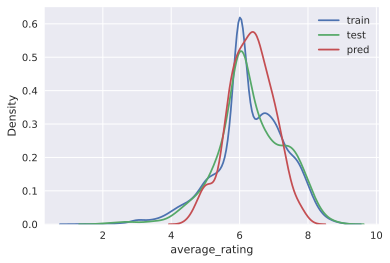

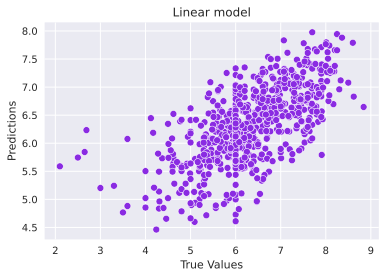

In [63]:
target_distr_linear(y_train, y_test, y_pred)

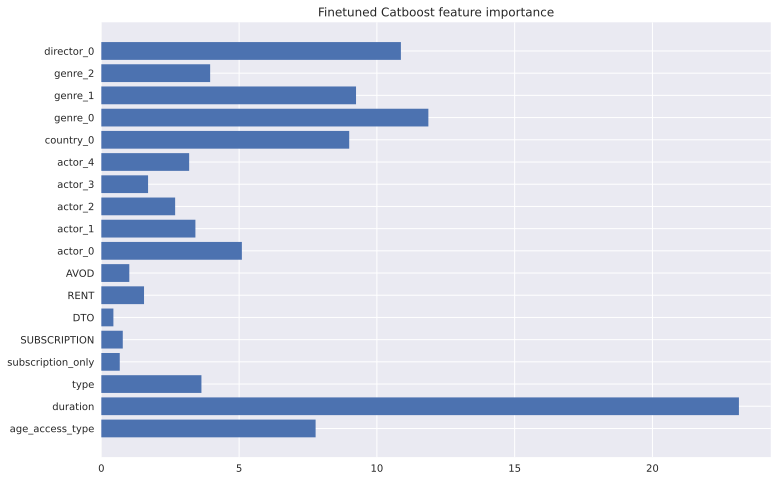

In [64]:
get_feature_imp(best_cat, train_dataset)

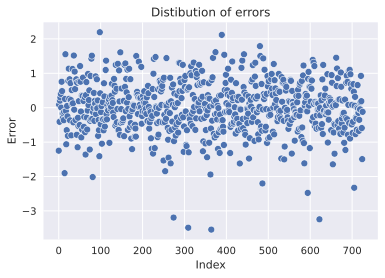

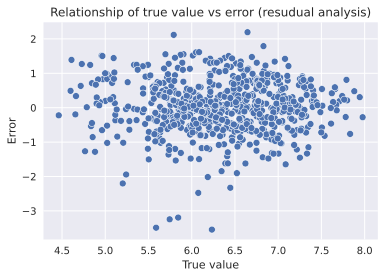

In [66]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

In [65]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.5580929084712013
RMSE:  0.747056161524153
R2:    0.4229798107597187
MAE:   0.5685008956816056
MedAE: 0.4619357934388604
------------------------------
